# Analysis General of WarpX output for single beam
## Import important packages and set up plotting
If any plots are needing to be saved, go to end of file and edit those commands

In [1]:
import  matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq
import os
import shutil
import scipy as sp
import scipy.constants as sc
import sys
from matplotlib import gridspec
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import SymLogNorm
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit


from openpmd_viewer import OpenPMDTimeSeries
from openpmd_viewer.addons import LpaDiagnostics

FontSize=25
FontSizeLabelAxis=25
rc('legend',fontsize=FontSize)
rc('xtick',labelsize=FontSize)
rc('ytick',labelsize=FontSize)
font = {'family' : 'normal',
        'size'   : FontSize}

rc('font', **font)
rc('text', usetex=True)

# scaling factors
mm=1e3
MV=1e-6
kV=1e-3

cms = sp.constants.speed_of_light

time = 3.36678*10**-11
zloc = time*cms
print(zloc)

0.010093352517452399


## Define where the files are and what timestep we want to look at

In [2]:
base = '/lstr/sahara/aard/cphillips/'
# 1 nC cases
#direc = '1nC/1beam/3warpx/circ/17018_circ_AAC/' # 12
direc = '1nC/1beam/3warpx/rect/21129_newdist_short/' # 13
#direc = '1nC/1beam/3warpx/rect/21140_newdist_1dprobe/' # 13
direc = '1nC/1beam/3warpx/squa/21139_newdist_1dprobe/'
direc = '1nC/1beam/3warpx/squa/22097_newdist_1dprobe/'
direc = '1nC/1beam/3warpx/squa/22169_newdist_1dprobe/'
direc = '1nC/1beam/3warpx/squa/22304_newdist_1dprobe/' # 128 128 8192
direc = '1nC/1beam/3warpx/squa/22338_newdist_1dprobe/' # 64 64 4096
direc = '1nC/1beam/3warpx/squa/22500_newdist_1dprobe/' # 64 64 4096 # ncell pml 10 instead of 3
direc = '1nC/1beam/3warpx/squa/pmltest/22986_pml_inside/' # pml inside sim domain
direc = '1nC/1beam/3warpx/squa/pmltest/22987_pml_inside/' # NO pml inside domain, but ncell = 20
direc = '1nC/1beam/3warpx/squa/23235_pml30/' # NO pml inside domain, but ncell = 30
direc = '1nC/1beam/3warpx/squa/24252_pml30/' # NO pml inside domain, but ncell = 30
direc = '1nC/1beam/3warpx/squa/26026_pml30/' # correct epsilon r
#direc = '1nC/1beam/3warpx/squa/warpxtest/26028_newwarpx/' # NO pml inside domain, but ncell = 30





#direc = '1nC/2beam/3warpx/squa/drive/27202_AAC/'
#direc = '1nC/2beam/3warpx/squa/scan/drive/28083_long/'
#direc = '1nC/2beam/3warpx/squa/scan/drive/28251_long/'



#direc = '1nC/1beam/3warpx/rect/25806_quicklambda/'
#direc = '1nC/1beam/3warpx/circ/25805_longtest/'
#direc = '1nC/1beam/3warpx/erika/27257_erika_longlambda/'

direc = '1nC/1beam/3warpx/erika/28084_erika_longlambda/'
#direc = '1nC/1beam/3warpx/erika/ang39/28330_erika_39/'
#direc = '1nC/1beam/3warpx/erika/ang42/28116_erika_39/'
#direc = '1nC/1beam/3warpx/erika/ang48/28281_erika_39/'
#direc = '1nC/1beam/3warpx/erika/ang48/30085_erika_48_shortstruct/'

# 2 nC cases
#direc = '2nC/1beam/3warpx/circ/14966_circ/' # 12
#direc = '2nC/1beam/3warpx/rect/14967_1ncrect/' # 13    
#direc = '2nC/1beam/3warpx/squa/14965_1ncsqua/'

# 5 nC cases
#direc = '5nC/1beam/3warpx/circ/17186_circ/'
#direc = '5nC/1beam/3warpx/rect/17189_1ncrect/'
#direc = '5nC/1beam/3warpx/squa/17188_1ncsqua/'
#direc = '5nC/1beam/3warpx/nostruct/17408_1ncsqua/'
#direc = '5nC/1beam/3warpx/erika/17187_5_1_nomw/'
#direc = '5nC/1beam/3warpx/erika/17698_5_1_nomw_huge_long/'
#direc = '5nC/1beam/3warpx/erika/17698_5_1_nomw_huge_long/'


#direc = 'injection_plane/17996_zneg15/'
#direc = 'injection_plane/17997_zneg1/'
#direc = 'injection_plane/17995_z0/'
#direc = 'gaussian/w_structure/18016_wstru_nozdep/'
#direc = 'gaussian/w_structure/18017_wstru_nostruct/'
#direc = 'gaussian/notphilippe/wstru/18215_w_structure/'
#direc = 'gaussian/notphilippe/wostru/18216_wo_structure/'

#direc = 'gaussian/wo_structure/17934_w_structure_diffz0/'
#direc = 'gaussian/w_structure/18003_wstru_moveinjpln/'
#direc = 'gaussian/notphilippe/wstru/17931_w_structure_diffz0/'
#direc = 'gaussian/notphilippe/wostru/17929_w_structure_diffz0/'
#direc = 'gaussian/notphilippe/wstru/18235_w_structure_long/'
#direc = 'gaussian/notphilippe/wostru/18236_wo_structure_long/'
#direc = 'gaussian/notphilippe/wcutoff/notpoynt/18293_longer/'
#direc = 'gaussian/notphilippe/wcutoff/notpoynt/18296_longer/'
#direc = 'gaussian/notphilippe/wcutoff/18294_poynt/'
#direc = 'gaussian/notphilippe/wcutoff/18360_poynt_n0/'
#direc = 'gaussian/notphilippe/wcutoff/18298_poynt_nomw/'
#direc = 'gaussian/notphilippe/notpoynt/oldcutoff/18296_longer/'
#direc = 'gaussian/notphilippe/notpoynt/oldcutoff/18293_longer/'
#direc = 'gaussian/notphilippe/notpoynt/19271_many_vdiff/'
#direc = 'gaussian/notphilippe/notpoynt/19374_angle45/'

#direc = 'gaussian/notphilippe/wcutoff/18486_poynt_line/'
#direc = 'gaussian/notphilippe/wcutoff/18777_poynt_in_yes/'
#direc = 'gaussian/notphilippe/notpoynt/18901_longer/'
#direc = 'gaussian/notphilippe/notpoynt/19956_angle45_Moredom/' # ---------------------------------------

# 1 nC ideal gaussian beam
#direc = '1nC/philippe_dist/3warpx/circ/15332_circ/'
#direc = '1nC/philippe_dist/3warpx/rect/15331_1ncrect/'
#direc = '1nC/philippe_dist/3warpx/squa/15330_1ncsqua/'

#direc = 'swing_test/warpx_20240822-130510/'



if direc[4] == '2':
    print('two bunch')
    txtfile = base+direc+'diags/reducedfiles/reduced_diags_drive.txt' # _drive
    spec = 'drive'
else:
    print('one bunch')
    txtfile = base+direc+'diags/reducedfiles/reduced_diags.txt' # _drive
    spec = 'myparticle'

probetxtfile = base+direc+'diags/reducedfiles/probe.txt'

filedir = '/lstr/sahara/aard/cphillips/'+direc+'diags/slabmovingwarpx/'
ts = LpaDiagnostics(filedir)

N_iterations = len(ts.iterations)
print(N_iterations)

Nitera = -1


if Nitera==-1:
   it = ts.iterations[N_iterations-1]
else:
   it = ts.iterations[Nitera]

one bunch
7


## Now, import all data

In [32]:

f = open(txtfile)

dat = f.read().split("\n")

header = dat[0]
print('Available info in reduced diagnostics: ',header)

ar = []
[ ar.append(list(map(lambda x: float(x), row.split(" ")))) for row in dat[1:-1]]
ar = np.array(ar)

step = ar[:, 0]
time = ar[:, 1] # s
xmean = ar[:, 2] # m
ymean = ar[:, 3] # m 
zmean = ar[:, 4] # m
xrms = ar[:, 9] # m
yrms = ar[:, 10] # m
zrms = ar[:, 11] # m
emitx = ar[:,16] # m
emity = ar[:,17] # m
emitz = ar[:,18] # m
print('z mean according to txt: ',zmean)
print('emittances (x,y,z):')
print(emitx[0],emity[0],emitz[0])
print('rms 0 (x,y,z): ')
print(xrms[0],yrms[0],zrms[0])


zstructure = time*cms # m
zstructure = zstructure-0.01
lastpart = [zmean[i]-zrms[i] for i in np.arange(len(zmean))]
for i in np.arange(len(lastpart)):
    if lastpart[i] > 0.1:
        indlast = i
        break
    else:
        indlast = -1
#indlast = lastpart.index(0.1)

t_particles_end = time[indlast]

print('"last" is at z= ',t_particles_end*cms*mm,' mm')
print('length 0/last (ps): ')
print(zrms[0]/cms*1e12,zrms[indlast]/cms*1e12)
print('length 0/last (mm): ')
print(zrms[0]*mm,zrms[indlast]*mm)

# -------------------------------------------------------------------------
# retrieve the data from the hdf5 file for the electric and magnetic fields
# -------------------------------------------------------------------------
Ez, info_Ez = ts.get_field( iteration=it,  field='E', coord='z',
                            slicing_dir='x', plot=False)
Ex, info_Ex = ts.get_field( iteration=it,  field='E', coord='x',
                            slicing_dir='x', plot=False)
Ey, info_Ey = ts.get_field( iteration=it,  field='E', coord='y',
                            slicing_dir='x', plot=False)
Bx, info_Bx = ts.get_field( iteration=it,  field='B', coord='x',
                            slicing_dir='x', plot=False)
By, info_By = ts.get_field( iteration=it,  field='B', coord='y',
                            slicing_dir='x', plot=False)

xf, yf, zf, px, py, pz = ts.get_particle( ['x','y','z','ux','uy','uz'],  species=spec, iteration=it) # ******************************************** myparticle


print('Num Particles: ',len(xf),len(yf),len(zf),len(px),len(py),len(pz))
shapeEz= np.shape(Ez)

print('z, y, x grid size: ',shapeEz)

absmax=MV*max(np.max(np.max(np.abs(Ez))),np.abs(np.min(np.min(np.abs(Ez)))))

xsc=np.linspace(info_Ez.xmin*1e3, info_Ez.xmax*1e3, shapeEz[2])
ysc=np.linspace(info_Ez.ymin*1e3, info_Ez.ymax*1e3, shapeEz[1])
zsc=np.linspace(info_Ez.zmin*1e3, info_Ez.zmax*1e3, shapeEz[0])

# Are there particles that should be "lost"?
print('boundary in x is [-2,2]')
print('boundary in y is [-1,1]')
print('xmax: ',max(xf),' xmin: ',min(xf))
print('ymax: ',max(yf),' ymin: ',min(yf))
n = 0
zf = zf[n:]
xf = xf[n:]
yf = yf[n:]
px = px[n:]
py = py[n:]
pz = pz[n:]
print('zmax: ',max(zf),' zmin: ',min(zf))
print('xmean: ',np.mean(xf))
print('ymean: ',np.mean(yf))
print('zmean: ',np.mean(zf))
print('xp: ',np.mean(px))
print('yp: ',np.mean(py))
print('zp: ',np.mean(pz))

print('Domain:')
print('zmin/max: ',info_Ez.zmin*mm, info_Ez.zmax*mm)
print('ymin/max: ',info_Ez.ymin*mm, info_Ez.ymax*mm)


print('Num Particles: ',len(xf),len(yf),len(zf),len(px),len(py),len(pz))
xfin = [x for x in xf if x<=2e-3 and x>=-2e-3]
print(len(xfin))
yfin = [y for y in yf if y<=1e-3 and y>=-1e-3]
print(len(yfin))


Available info in reduced diagnostics:  #[0]step() [1]time(s) [2]x_mean(m) [3]y_mean(m) [4]z_mean(m) [5]px_mean(kg*m/s) [6]py_mean(kg*m/s) [7]pz_mean(kg*m/s) [8]gamma_mean() [9]x_rms(m) [10]y_rms(m) [11]z_rms(m) [12]px_rms(kg*m/s) [13]py_rms(kg*m/s) [14]pz_rms(kg*m/s) [15]gamma_rms() [16]emittance_x(m) [17]emittance_y(m) [18]emittance_z(m) [19]charge(C)
z mean according to txt:  [-0.01        0.00562725  0.02125451  0.03688176  0.05250902  0.06813627
  0.08376353  0.09939078  0.11501804  0.13064529  0.14627254  0.
  0.          0.        ]
emittances (x,y,z):
2.8494637315837e-06 2.81613934694993e-06 6.15525041004184e-05
rms 0 (x,y,z): 
0.00014480883049509 0.000131784641672017 0.000984395146808586
"last" is at z=  125.02462500000283  mm
length 0/last (ps): 
3.2835887646265807 3.283361201097334
length 0/last (mm): 
0.984395146808586 0.9843269249788021
Num Particles:  30000 30000 30000 30000 30000 30000
z, y, x grid size:  (2048, 256, 64)
boundary in x is [-2,2]
boundary in y is [-1,1]
xm

## Plotting rms values, emittances, and phase spaces

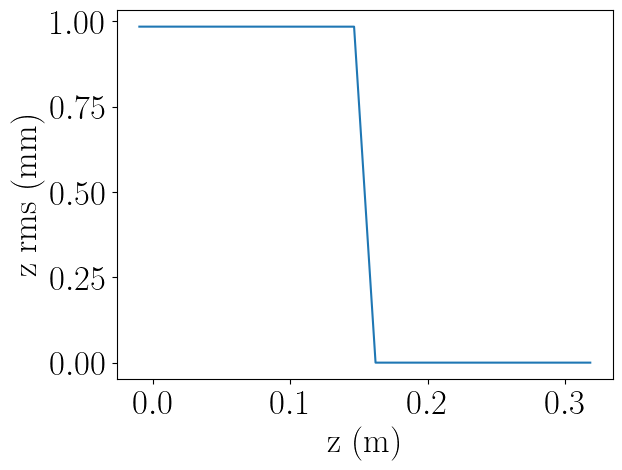

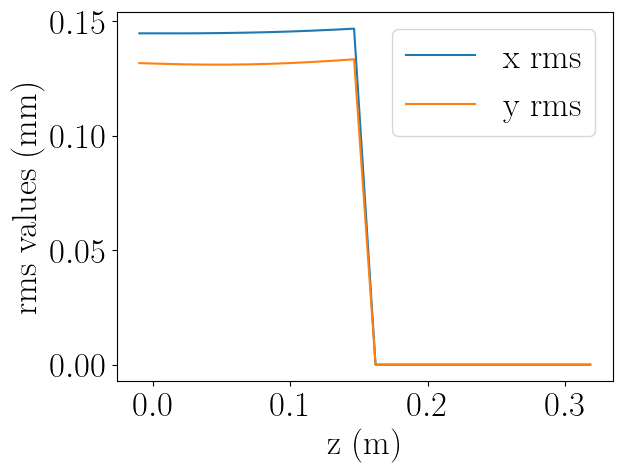

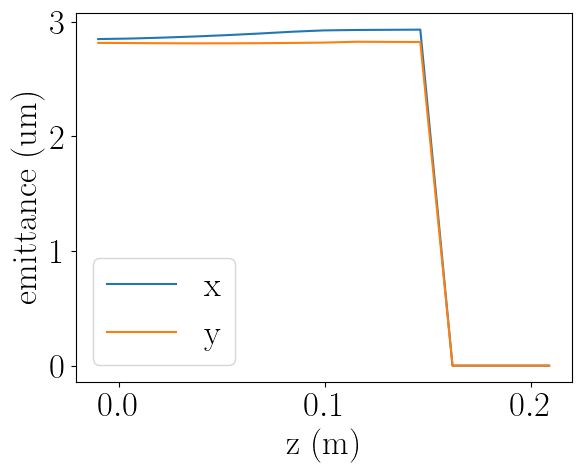

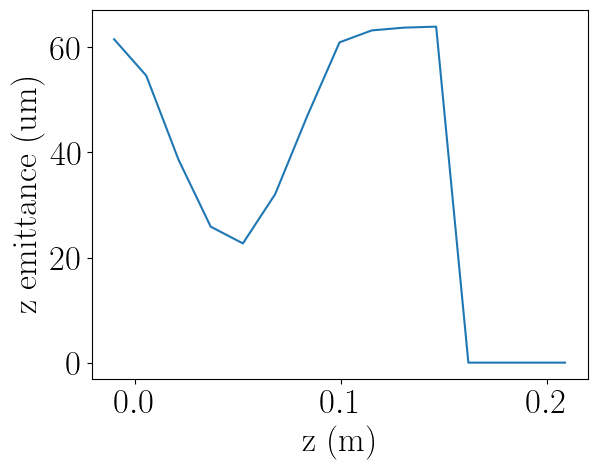

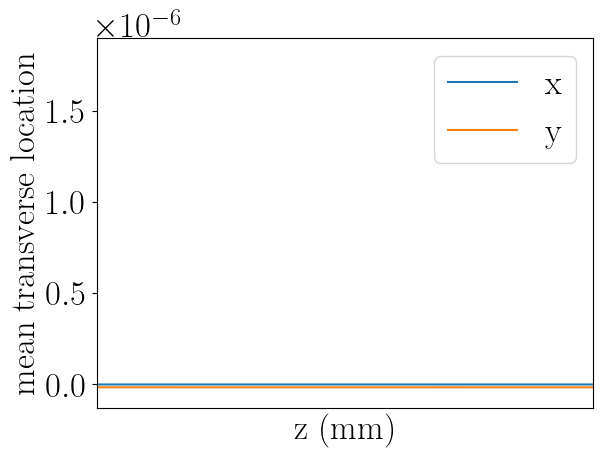

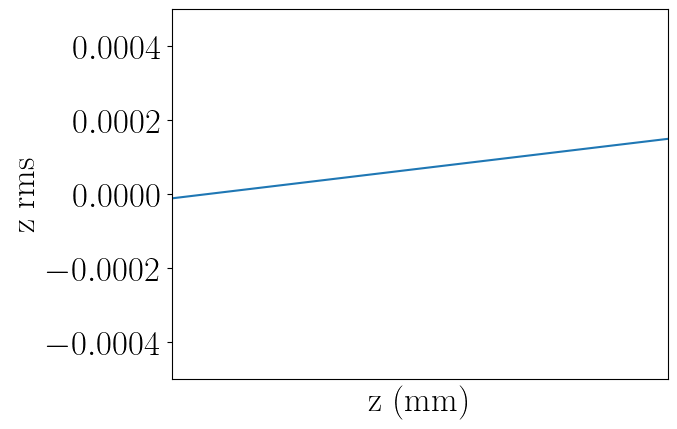

number of macroparticles:  30000


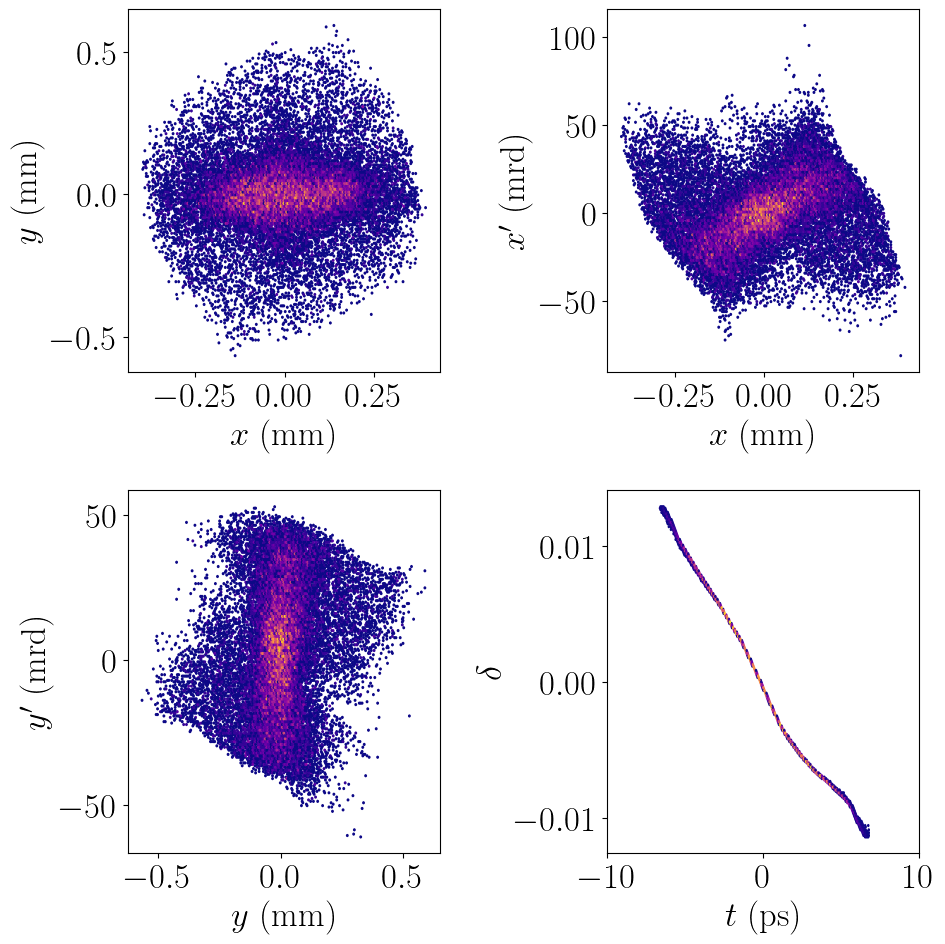

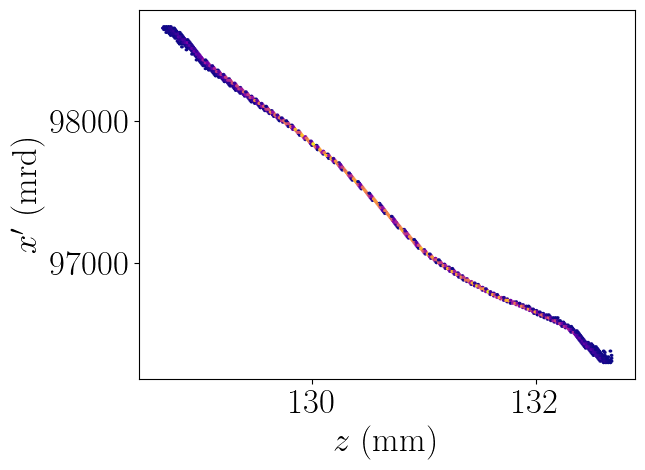

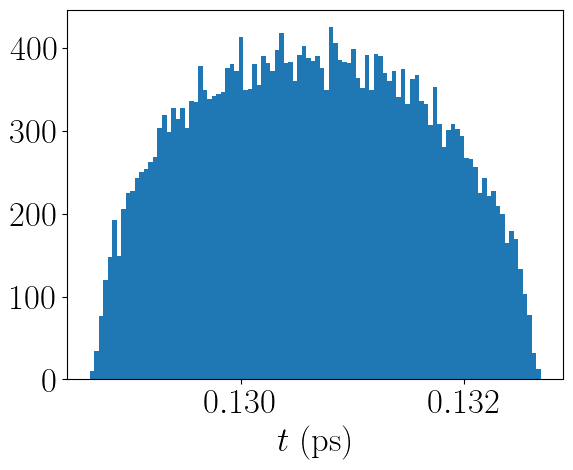

In [5]:
# First three are the rms and emittance throughout the structure, so we use zstructure for its location in the structure
#print('emitx = ',emitx[0], 'm')
#print('emity = ',emity[0], 'm')
#print('emitz = ',emitz[0], 'm')

#print(max(yf), min(yf), max(xf),min(xf))
#print('z rms end: ',zrms[-1]*1e3)

plt.plot(zstructure, zrms*1e3)
plt.xlabel('z (m)')
plt.ylabel('z rms (mm)')
plt.show()

plt.plot(zstructure,xrms*1e3,label='x rms')
plt.plot(zstructure,yrms*1e3,label='y rms')
plt.legend()
plt.xlabel('z (m)')
plt.ylabel('rms values (mm)')
plt.show()

emitxu = emitx*1e6
emityu = emity*1e6
emitzu = emitz*1e6

af = 15

plt.plot(zstructure[:af],emitxu[:af],label='x')
plt.plot(zstructure[:af],emityu[:af],label='y')
#plt.plot(z,emitz,label='z')
plt.legend()
plt.xlabel('z (m)')
plt.ylabel('emittance (um)')
plt.show()

plt.plot(zstructure[:af],emitzu[:af])
plt.xlabel('z (m)')
plt.ylabel('z emittance (um)')
plt.show()

plt.plot(zstructure*1000,xmean,label='x')
plt.plot(zstructure*1000,ymean,label='y')
plt.xlabel('z (mm)')
plt.ylabel('mean transverse location')
plt.xticks(np.arange(min(zstructure*1000), max(zstructure*1000)+1, 75))
plt.legend()
plt.xlim([-0.011,0.150])
plt.show()

plt.plot(zstructure*1000,zmean)
plt.xlabel('z (mm)')
plt.ylabel('z rms')
plt.xticks(np.arange(min(zstructure*1000), max(zstructure*1000)+1, 75))
plt.xlim([-0.011,0.150])
plt.ylim([-0.0005,0.0005])
plt.show()


# --------------------------------------------------------------
# we want to plot four phase spaces: x-y, x-x', y-y' and t-delta
t = (zf-np.mean(zf))/cms
frac=100
MinCnt = 1+int(len(t)-frac/100*len(t))
nBins = 201
print('number of macroparticles: ',len(t))

ptot = np.sqrt(px**2+py**2 + pz**2)
ptot = ptot/ptot.mean()-1

fig, axlist = plt.subplots(2,2,figsize=(10,10))
ax = axlist[0,0]
ax.hexbin(xf*1e3,yf*1e3,gridsize=nBins,mincnt=MinCnt, cmap='plasma')
ax.set_xlabel('$x$ (mm)')
ax.set_ylabel('$y$ (mm)')
ax = axlist[0, 1]
ax.set_xlabel('$x$ (mm)')
ax.set_ylabel('$x\'$ (mrd)')
ax.hexbin(xf*1e3, px*1e3, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax = axlist[1,0]
ax.set_xlabel('$y$ (mm)')
ax.set_ylabel('$y\'$ (mrd)')
ax.hexbin(yf*1e3, py*1e3, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax = axlist[1,1]
ax.hexbin(t*1e12, ptot, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax.set_xlabel('$t$ (ps)')
ax.set_ylabel(r'$\delta$')
ax.set_xlim([-10,10])
plt.tight_layout()
#plt.savefig('/lstr/sahara/aard/cphillips/ipynbfiles/AAC24/paper/1bunchWXphasespace.png')
plt.figure()

#zof = zf - np.mean(zf)
plt.hexbin(zf*1e3,pz*1e3,gridsize = nBins, mincnt=MinCnt, cmap='plasma')
plt.xlabel('$z$ (mm)')
plt.ylabel('$x\'$ (mrd)')
plt.show()

plt.hist(zf,bins=100)
plt.xlabel('$t$ (ps)')
plt.show()

## Plotting Ez wake in (z,y) and (z,x) with lineout of Ez

In [33]:
# Getting the ranges we want for plotting in x, y, and z 
xlow = -1.55
xhigh = 1.55
xlow = info_Ez.xmin*mm # 60 50
xhigh = info_Ez.xmax*mm # 80
lenx = xhigh-xlow
xticklist = np.arange(xlow,xhigh+lenx/2,lenx/4)
xticklist = [round(i,1) for i in xticklist]
xindexmin = (np.abs(xsc - xlow)).argmin()
xindexmax = (np.abs(xsc - xhigh)).argmin()
print('x desired: ', xlow, xhigh, ' mm')
print('x acheived: ', xsc[xindexmin],xsc[xindexmax], ' mm')
print('xindexmin: ',xindexmin,' xindexmax: ',xindexmax)

# where is the slice for x=0?
xindex0 = (np.abs(xsc - 0)).argmin()
print('x = 0 acheived: ',xsc[xindex0], ' mm')
xindex0 = xindex0-xindexmin

ylow = -5
yhigh = 1.55
#ylow = info_Ez.ymin*mm # 60 50
#yhigh = info_Ez.ymax*mm # 80
leny = yhigh-ylow
yticklist = np.arange(ylow,yhigh+leny/2,leny/4)
yticklist = [round(i,1) for i in yticklist]
yindexmin = (np.abs(ysc - ylow)).argmin()
yindexmax = (np.abs(ysc - yhigh)).argmin()
print('y desired: ', ylow, yhigh, ' mm')
print('y acheived: ', ysc[yindexmin],ysc[yindexmax], ' mm')
print('y indexmin: ',yindexmin,' y indexmax: ',yindexmax)

# where is the slice for y=0?
yindex0 = (np.abs(ysc - 0)).argmin()
print('y = 0 acheived: ',ysc[yindex0], ' mm')
print('y = 0 index: ',yindex0)


wavelength = 4.04/mm
dist = wavelength*1.5
print(np.mean(zf),dist)
#zlow = (np.mean(zf) - dist)*mm

zlow = 94
zhigh = 100
#zlow = info_Ez.zmin*mm
#zhigh = info_Ez.zmax*mm
lenz = zhigh-zlow-2
zticklist = np.arange(zlow+1,zhigh-1+lenz/2,lenz/4)
zticklist = [round(i,1) for i in zticklist]
print(zticklist)
zindexmin = (np.abs(zsc - zlow)).argmin()
zindexmax = (np.abs(zsc - zhigh)).argmin()
if zindexmin == 0:
    zindexmax = zindexmax-1
print('z desired: ', zlow, zhigh, ' mm')
print('z acheived: ', zsc[zindexmin],zsc[zindexmax], ' mm')
print('z indexmin: ',zindexmin,' z indexmax: ',zindexmax)

mult = 1


x desired:  -2.9752734375 2.9752734375  mm
x acheived:  -2.9752734375 2.9752734375  mm
xindexmin:  0  xindexmax:  63
x = 0 acheived:  -0.04722656249999968  mm
y desired:  -5 1.55  mm
y acheived:  -5.01371484375 1.5374492187500017  mm
y indexmin:  159  y indexmax:  242
y = 0 acheived:  0.03778515625000267  mm
y = 0 index:  223
0.0915771543059096 0.00606
[95.0, 96.0, 97.0, 98.0, 99.0, 100.0]
z desired:  94 100  mm
z acheived:  93.98000370719366 99.98785051339208  mm
z indexmin:  1367  z indexmax:  1434


(2048, 256, 64)
(2048, 256, 64)


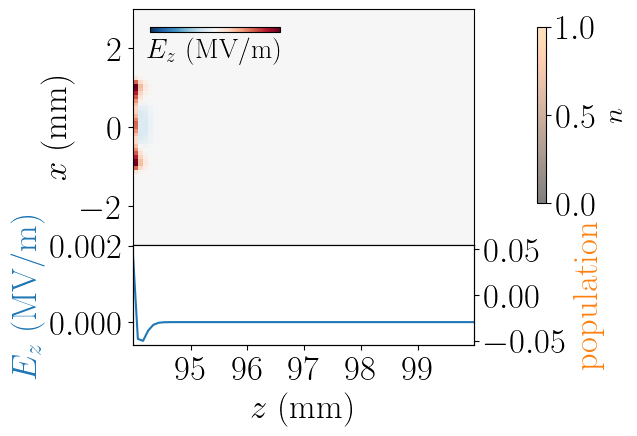

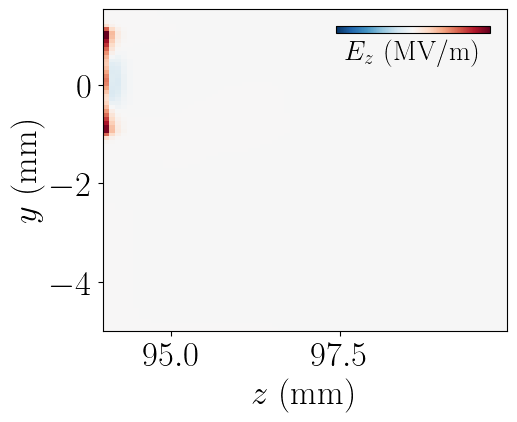

In [34]:
params = {"ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}
plt.rcParams.update(params)

# generate a plot of the Ez wake in (z,y) with lineout of Ez
fig=plt.figure(9999)
gs1 = gridspec.GridSpec(11, 13)
ax1 = fig.add_subplot(gs1[0:7,1:10])
ax2 = fig.add_subplot(gs1[7:10,1:10], sharex =ax1)
ax3 = fig.add_subplot(gs1[0:7,11:12])

Etot = np.sqrt(Ex**2+Ey**2+Ez**2)
print(np.shape(Etot))
print(np.shape(Ez))
# record Ez in the (z,x) plane for y=0
#yEzslice=Etot[zindexmin:zindexmax,yindex0,xindexmin:xindexmax].transpose()*MV # gets the y=0 slice
yEzslice=Ez[zindexmin:zindexmax,yindex0,xindexmin:xindexmax].transpose()*MV # gets the y=0 slice
yEzslice = np.flipud(yEzslice)
shapeyEzslice = np.shape(yEzslice)

yEabsmax = max(np.max(np.max(np.abs(yEzslice))),np.abs(np.min(np.min(np.abs(yEzslice)))))

# plot slice (upper plot with red and blue lines)
imField=ax1.imshow(yEzslice,extent=[zsc[zindexmin],zsc[zindexmax], xsc[xindexmin],xsc[xindexmax]],
                   cmap='RdBu_r', vmin=-yEabsmax/mult, vmax=yEabsmax/mult, aspect='auto')
cbaxes = inset_axes(ax1, width="38%", height="2%", loc=2)
cbar1  = fig.colorbar(imField, cax=cbaxes, orientation='horizontal',ticks=[-2,2]).set_label(label=r'$E_z$ (MV/m)',size=20)
ax1.set_ylabel(r'$x$ (mm)', fontsize=FontSizeLabelAxis)


# record particle and plot a histogram on top of 3d of Ez - NEED TO ADJUST AXES FOR THIS
particles=ax1.hexbin(zf*mm, xf*mm, gridsize=200,extent=[zsc[zindexmin],zsc[zindexmax], xsc[xindexmin],xsc[xindexmax]], cmap='copper', alpha=0.5,  mincnt=5)
ax3.axis('off')
cbaxes2 = inset_axes(ax3, width="30%", height="75%", loc=2)
cbar2 = fig.colorbar(particles, cax=cbaxes2).set_label(label=r'$n$ ',size=20)

# Line plot of Ez plus histogram of the population on lower plot
zsca=np.linspace(zsc[zindexmin],zsc[zindexmax], zindexmax-zindexmin)
ax2.plot (zsca,yEzslice[xindex0,:]) # gets the x=0 slice
ax2.set_xlabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
ax2.set_ylabel(r'$E_z$ (MV/m) ', fontsize=FontSizeLabelAxis, color="C0")
ax2.set_xticks(zticklist)
ax22 = ax2.twinx()
ax22.hist(zf*mm,shapeEz[0], range=(zsc[zindexmin],zsc[zindexmax]),alpha=0.3, color='C1')
ax22.set_ylabel(r'population', fontsize=FontSizeLabelAxis, color="C1")

# Set up the plots
plt.setp(ax1.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax2.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
#plt.subplots_adjust(hspace=.0)

# Save the plot to be viewed
#plt.savefig(save_dir+fig9999)
#plt.savefig(save_dir+fig9999p,dpi=600)
#plt.savefig(plotnms[pn]+'x.png')
#plt.tight_layout()
#plt.savefig('/lstr/sahara/aard/cphillips/ipynbfiles/AAC24/paper/1bunchWXEx.png')
plt.show()



#-------------------------------------------------------------------------
# record Ez in the (z,y) plane for x=0
fig=plt.figure(9998)
gs1 = gridspec.GridSpec(8, 11)
ax1 = fig.add_subplot(gs1[0:7,1:10])
#ax2 = fig.add_subplot(gs1[7:10,1:10], sharex =ax1)
#ax3 = fig.add_subplot(gs1[0:7,11:12])

# record Ez in the (z,y) plane for x=0
#xEzslice=Etot[zindexmin:zindexmax,yindexmin:yindexmax,xindex0].transpose()*MV # gets the x=0 sliceplt.gca().invert_yaxis()
xEzslice=Ez[zindexmin:zindexmax,yindexmin:yindexmax,xindex0].transpose()*MV # gets the x=0 sliceplt.gca().invert_yaxis()
xEzslice = np.flipud(xEzslice)
shapexEzslice = np.shape(xEzslice)
xEabsmax = max(np.max(np.max(np.abs(xEzslice))),np.abs(np.min(np.min(np.abs(xEzslice)))))

# plot slice (upper plot with red and blue lines)
imField=ax1.imshow(xEzslice,extent=[zsc[zindexmin],zsc[zindexmax], ysc[yindexmin],ysc[yindexmax]],
                   cmap='RdBu_r', vmin=-xEabsmax/mult,vmax=xEabsmax/mult, aspect='auto')
cbaxes = inset_axes(ax1, width="38%", height="2%", loc=1)
cbar1  = fig.colorbar(imField, cax=cbaxes, orientation='horizontal',ticks=[-1,1]).set_label(label=r'$E_z$ (MV/m)',size=20)
ax1.set_ylabel(r'$y$ (mm)', fontsize=FontSizeLabelAxis)
ax1.set_xlabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
plt.gca().invert_yaxis()

#plt.savefig('/lstr/sahara/aard/cphillips/ipynbfiles/AAC24/paper/1bunchWXEyerika.png')
plt.show()



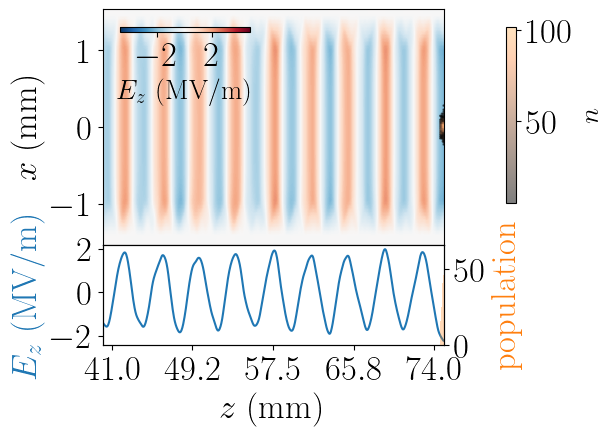

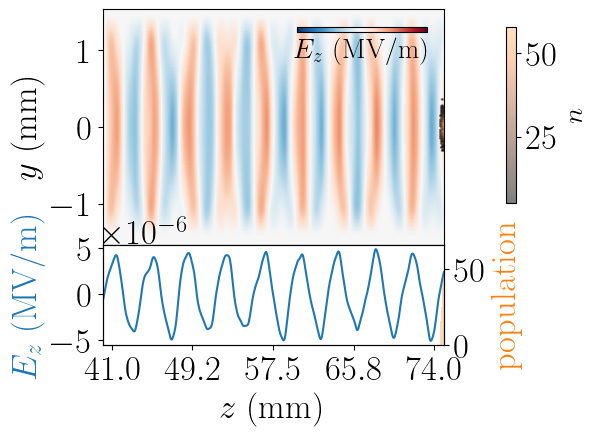

In [24]:
params = {"ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}
plt.rcParams.update(params)

# generate a plot of the Ez wake in (z,y) with lineout of Ez
fig=plt.figure(9999)
gs1 = gridspec.GridSpec(11, 13)
ax1 = fig.add_subplot(gs1[0:7,1:10])
ax2 = fig.add_subplot(gs1[7:10,1:10], sharex =ax1)
ax3 = fig.add_subplot(gs1[0:7,11:12])



# record Ez in the (z,x) plane for y=0
yEzslice=Ez[zindexmin:zindexmax,yindex0,xindexmin:xindexmax].transpose()*MV # gets the y=0 slice
yEzslice = np.flipud(yEzslice)
shapeyEzslice = np.shape(yEzslice)

yEabsmax = max(np.max(np.max(np.abs(yEzslice))),np.abs(np.min(np.min(np.abs(yEzslice)))))

# plot slice (upper plot with red and blue lines)
imField=ax1.imshow(yEzslice,extent=[zsc[zindexmin],zsc[zindexmax], xsc[xindexmin],xsc[xindexmax]],
                   cmap='RdBu_r', vmin=-yEabsmax/mult, vmax=yEabsmax/mult, aspect='auto')
cbaxes = inset_axes(ax1, width="38%", height="2%", loc=2)
cbar1  = fig.colorbar(imField, cax=cbaxes, orientation='horizontal',ticks=[-2,2]).set_label(label=r'$E_z$ (MV/m)',size=20)
ax1.set_ylabel(r'$x$ (mm)', fontsize=FontSizeLabelAxis)


# record particle and plot a histogram on top of 3d of Ez - NEED TO ADJUST AXES FOR THIS
particles=ax1.hexbin(zf*mm, xf*mm, gridsize=200,extent=[zsc[zindexmin],zsc[zindexmax], xsc[xindexmin],xsc[xindexmax]], cmap='copper', alpha=0.5,  mincnt=5)
ax3.axis('off')
cbaxes2 = inset_axes(ax3, width="30%", height="75%", loc=2)
cbar2 = fig.colorbar(particles, cax=cbaxes2).set_label(label=r'$n$ ',size=20)

# Line plot of Ez plus histogram of the population on lower plot
zsca=np.linspace(zsc[zindexmin],zsc[zindexmax], zindexmax-zindexmin)
ax2.plot (zsca,yEzslice[xindex0,:]) # gets the x=0 slice
ax2.set_xlabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
ax2.set_ylabel(r'$E_z$ (MV/m) ', fontsize=FontSizeLabelAxis, color="C0")
ax2.set_xticks(zticklist)
ax22 = ax2.twinx()
ax22.hist(zf*mm,shapeEz[0], range=(zsc[zindexmin],zsc[zindexmax]),alpha=0.3, color='C1')
ax22.set_ylabel(r'population', fontsize=FontSizeLabelAxis, color="C1")

# Set up the plots
plt.setp(ax1.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax2.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
#plt.subplots_adjust(hspace=.0)

# Save the plot to be viewed
#plt.savefig(save_dir+fig9999)
#plt.savefig(save_dir+fig9999p,dpi=600)
#plt.savefig(plotnms[pn]+'x.png')
#plt.tight_layout()
#plt.savefig('/lstr/sahara/aard/cphillips/ipynbfiles/AAC24/paper/1bunchWXEx.png')
plt.show()



#-------------------------------------------------------------------------
# record Ez in the (z,y) plane for x=0
fig=plt.figure(9998)
gs1 = gridspec.GridSpec(11, 13)
ax1 = fig.add_subplot(gs1[0:7,1:10])
ax2 = fig.add_subplot(gs1[7:10,1:10], sharex =ax1)
ax3 = fig.add_subplot(gs1[0:7,11:12])

# record Ez in the (z,y) plane for x=0
xEzslice=Ez[zindexmin:zindexmax,yindexmin:yindexmax,xindex0].transpose()*MV # gets the x=0 sliceplt.gca().invert_yaxis()
xEzslice = np.flipud(xEzslice)
shapexEzslice = np.shape(xEzslice)
xEabsmax = max(np.max(np.max(np.abs(xEzslice))),np.abs(np.min(np.min(np.abs(xEzslice)))))

# plot slice (upper plot with red and blue lines)
imField=ax1.imshow(xEzslice,extent=[zsc[zindexmin],zsc[zindexmax], ysc[yindexmin],ysc[yindexmax]],
                   cmap='RdBu_r', vmin=-xEabsmax/mult, vmax=xEabsmax/mult, aspect='auto')
cbaxes = inset_axes(ax1, width="38%", height="2%", loc=1)
cbar1  = fig.colorbar(imField, cax=cbaxes, orientation='horizontal',ticks=[-1,1]).set_label(label=r'$E_z$ (MV/m)',size=20)
ax1.set_ylabel(r'$y$ (mm)', fontsize=FontSizeLabelAxis)
plt.gca().invert_yaxis()

# record particle and plot a histogram on top of 3d of Ez
particles=ax1.hexbin(zf*mm, yf*mm, gridsize=200,extent=[zsc[zindexmin],zsc[zindexmax], ysc[yindexmin],ysc[yindexmax]], cmap='copper', alpha=0.5,  mincnt=5)
ax3.axis('off')
cbaxes2 = inset_axes(ax3, width="30%", height="75%", loc=2)
cbar2 = fig.colorbar(particles, cax=cbaxes2).set_label(label=r'$n$ ',size=20)

# Line plot of Ez plus histogram of the population on lower plot
zscb=np.linspace(zsc[zindexmin],zsc[zindexmax], zindexmax-zindexmin)
nyindex0 = yindex0-yindexmin
ax2.plot (zscb,xEzslice[shapexEzslice[0]-nyindex0,:]) # Ez slice has shape (ylen,zlen)
#ax2.plot (zscb,Ey[16,48,:]*1e-6)
#ax2.plot (zscb,Ex[16,48,:]*1e-6)
ax2.set_xlabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
ax2.set_ylabel(r'$E_z$ (MV/m) ', fontsize=FontSizeLabelAxis, color="C0")
ax2.set_xticks(zticklist)
ax22 = ax2.twinx()
ax22.hist(zf*mm,shapeEz[0], range=(zsc[zindexmin],zsc[zindexmax]),alpha=0.3, color='C1')
ax22.set_ylabel(r'population', fontsize=FontSizeLabelAxis, color="C1")

# Set up the plots
plt.setp(ax1.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax2.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
#plt.subplots_adjust(hspace=.0)

# Save the plot to be viewed
#plt.savefig(save_dir+fig9998)
#plt.savefig(save_dir+fig9998p,dpi=600)
#plt.savefig(plotnms[pn]+'y.png')
#plt.tight_layout()
#plt.savefig('/lstr/sahara/aard/cphillips/ipynbfiles/AAC24/paper/1bunchWXEyerika.png')
plt.show()



## Calculating fourier to get modes and wavelength

(128, 780)
max freq  644.6244355339925  located at  77153309.15335372
wavelength =  3.88567206371042  mm
separation =  5.82850809556563  mm
copper skin depth:  237.9188520693572  nm
aluminum skin depth:  304.6238749617673  nm


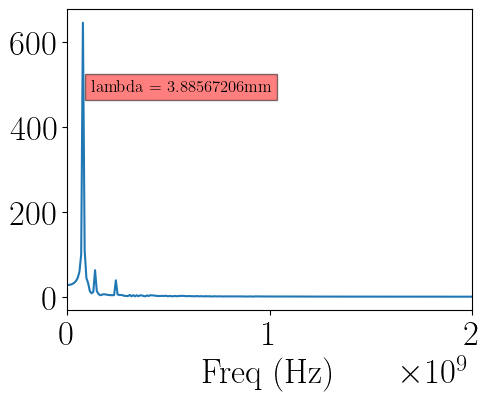

'\n1nCcir\nmax freq  856.6672612354065  located at  137970478.72164446\nwavelength =  2.1728739421483887  mm\n1nCsqu\nmax freq  533.8267127946382  located at  80482779.2542926\nwavelength =  3.7249267579686665  mm\n1nCrec\nmax freq  578.3506363818602  located at  68985239.36082228\nwavelength =  4.345747884296775  mm\n\n2nCcir\nmax freq  522.938543104238  located at  137970478.72164446\nwavelength =  2.1728739421483887  mm\n2nCsqu\nmax freq  532.0948179238094  located at  80482779.2542926\nwavelength =  3.7249267579686665  mm\n2nCrec\nmax freq  284.45979826046624  located at  80482779.25429265\nwavelength =  3.7249267579686642  mm\n\n5nCcir\nmax freq  108.17923547183929  located at  137970478.72164446\nwavelength =  2.1728739421483887  mm\n*5nCsqu\nmax freq  317.5372432746304  located at  80482779.2542926\nwavelength =  3.7249267579686665  mm\n5nCrec\nmax freq  122.97998089559448  located at  80482779.25429265\nwavelength =  3.7249267579686642  mm\n\n'

In [25]:
# Doing FFT to get the wavelength of the accelerated bunch for (y,z) slice
aEzslice =Ez[:,:,int(shapeEz[2]/2)].transpose()*MV # takes the x=0 slice
aEzslice = aEzslice[:,zindexmin:zindexmax]
zint = zsc/cms # convert z axis to a time axis
print(np.shape(aEzslice))
aEzslicelen = len(aEzslice[int(shapeEz[1]/2),:]) # get length of aEzslice for N (with x=0 above and y=0 (transposed above))

#samplerate = aEzslicelen/((info_Ez.zmax*1e3-info_Ez.zmin*1e3)/cms) # N/(t_f - t_i) = N/((zmax(mm) - zmin(mm))/cms) so that end wavelength is mm
samplerate = aEzslicelen/((zsc[zindexmax]-zsc[zindexmin])/cms) # N/(t_f - t_i) = N/((zmax(mm) - zmin(mm))/cms) so that end wavelength is mm

Fy = fft(aEzslice[int(shapeEz[1]/2)]) # do fft
Fx = fftfreq(aEzslicelen,1 / samplerate) # get the fft frequencies

# get the maximum of Fy
freqmax = np.amax(np.abs(Fy))
# which frequency does the max of Fy correspond to?
indexfreq = np.where(np.abs(Fy) == freqmax)
flatind = indexfreq[0]
print('max freq ',freqmax, ' located at ',Fx[flatind[0]])
# convert the frequency to wavelength using f = c/lambda
wavelength = cms/np.abs(Fx[flatind[0]])
print('wavelength = ', wavelength, ' mm')
print('separation = ', wavelength*1.5, ' mm')
wavem = wavelength*1e-3

#wavem = .003636
freqs = wavem/cms
freq = 1/freqs
skindepth_cu = 1/np.sqrt(sc.pi*sc.mu_0*freq*5.8e7)
skindepth_al = 1/np.sqrt(sc.pi*sc.mu_0*freq*3.538e7)
print('copper skin depth: ',skindepth_cu*1e9,' nm')
print('aluminum skin depth: ',skindepth_al*1e9,' nm')

# Plotting to see the frequencies to check with wavelength on plot
figfreq = plt.figure(9997)
gs1 = gridspec.GridSpec(11, 11)
ax1 = figfreq.add_subplot(gs1[1:10,1:10])
ax1.text(Fx[flatind[0]]*2+Fx[flatind[1]]/2,freqmax*3/4,'lambda = '+str(round(wavelength,8))+'mm',bbox=dict(facecolor='red',alpha = 0.5),fontsize=12)
imFreqs = ax1.plot(Fx[:len(Fx) //2],np.abs(Fy[:len(Fx)//2]))
plt.xlim(0,2e9) # 0,(np.amax(Fx)/Fx[flatind[1]])*(3/5)*Fx[flatind[1]])
ax1.set_xlabel("Freq (Hz)")
#plt.savefig(save_dir+fig9997)
#plt.savefig(save_dir+fig9997p,dpi=600)
plt.show()

'''
1nCcir
max freq  856.6672612354065  located at  137970478.72164446
wavelength =  2.1728739421483887  mm
1nCsqu
max freq  533.8267127946382  located at  80482779.2542926
wavelength =  3.7249267579686665  mm
1nCrec
max freq  578.3506363818602  located at  68985239.36082228
wavelength =  4.345747884296775  mm

2nCcir
max freq  522.938543104238  located at  137970478.72164446
wavelength =  2.1728739421483887  mm
2nCsqu
max freq  532.0948179238094  located at  80482779.2542926
wavelength =  3.7249267579686665  mm
2nCrec
max freq  284.45979826046624  located at  80482779.25429265
wavelength =  3.7249267579686642  mm

5nCcir
max freq  108.17923547183929  located at  137970478.72164446
wavelength =  2.1728739421483887  mm
*5nCsqu
max freq  317.5372432746304  located at  80482779.2542926
wavelength =  3.7249267579686665  mm
5nCrec
max freq  122.97998089559448  located at  80482779.25429265
wavelength =  3.7249267579686642  mm

'''

Available info in reduced diagnostics:  [0]step() [1]time(s) [2]part_x_lev0-(m) [3]part_y_lev0-(m) [4]part_z_lev0-(m) [5]part_Ex_lev0-(V/m) [6]part_Ey_lev0-(V/m) [7]part_Ez_lev0-(V/m) [8]part_Bx_lev0-(T) [9]part_By_lev0-(T) [10]part_Bz_lev0-(T) [11]part_S_lev0-(W/m^2)
2601
number of points:  8641
(2100,)


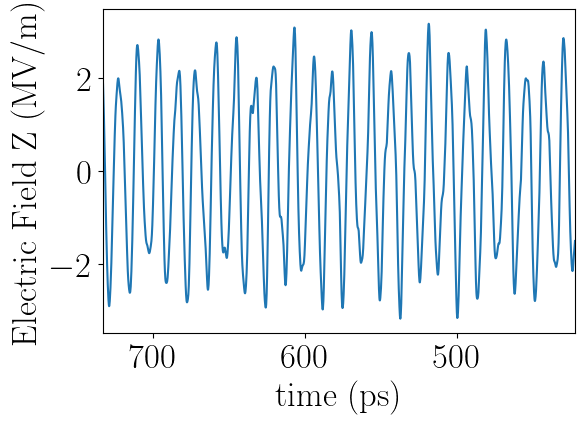

"\nplt.plot(time,Bx,label='x')\nplt.plot(time,By,label='y')\nplt.xlabel('time (ps)')\nplt.ylabel('Magnetic Field (T)')\nplt.xlim([max(time),min(time)])\nplt.legend()\nplt.show()\n\n\nplt.plot(time,Bz,label='z')\nplt.xlabel('time (ps)')\nplt.ylabel('Magnetic Field Z (T)')\nplt.xlim([max(time),min(time)])\nplt.show()\n\nplt.plot(time,PV)\nplt.xlabel('time (ps)')\nplt.ylabel('Poynting Vector')\nplt.xlim([max(time),min(time)])\nplt.show()\n"

In [26]:
f = open(probetxtfile)

#num = int(f.readline())
#ar = []
#for _ in range(1,num):
#    row = f.readline()
#    ar.append(list(map(lambda x: float(x), row.split(" "))))
#ar = np.array(ar)

dat = f.read().split("\n")

header = dat[0]
print('Available info in reduced diagnostics: ',header)

ar = []
[ ar.append(list(map(lambda x: float(x), row.split(" ")))) for row in dat[1:-1]]
ar = np.array(ar)

step = ar[:, 0]
time = ar[:, 1] # s
for i in np.arange(len(time)):
    if time[i] > t_particles_end:
        indlast = i
        break
print(indlast)
#indlast = 0
indlast = indlast+250
time = ar[:, 1][indlast:]*1e12 # ps
loc_x = ar[:, 2][indlast:] # m
loc_y = ar[:, 3][indlast:] #m 
loc_z = ar[:, 4][indlast:] # m
Ex = ar[:, 5][indlast:] # V/m
Ey = ar[:, 6][indlast:] # V/m
gEz = ar[:,7] [indlast:] # V/m
Bx = ar[:,8][indlast:] # T
By = ar[:,9][indlast:] # T
Bz = ar[:,10][indlast:] # T
PV = ar[:,11][indlast:] # W/m^2
print('number of points: ',len(time))
'''
plt.plot(time,Ex*kV,label='x')
plt.plot(time,Ey*kV,label='y')
plt.xlabel('time (ps)')
plt.ylabel('Electric Field (kV/m)')
plt.xlim([max(time),min(time)])
plt.legend()
plt.show()
'''
maxtime = 2100
print(np.shape(gEz[:maxtime]))
plt.plot(time[:maxtime],gEz[:maxtime]*MV,label='z')
plt.xlabel('time (ps)')
plt.ylabel('Electric Field Z (MV/m)')
plt.xlim([max(time[:maxtime]),min(time[:maxtime])])

plt.tight_layout()
#plt.savefig('/lstr/sahara/aard/cphillips/ipynbfiles/AAC24/paper/1bunchWXdecay.png')
plt.show()
'''
plt.plot(time,Bx,label='x')
plt.plot(time,By,label='y')
plt.xlabel('time (ps)')
plt.ylabel('Magnetic Field (T)')
plt.xlim([max(time),min(time)])
plt.legend()
plt.show()


plt.plot(time,Bz,label='z')
plt.xlabel('time (ps)')
plt.ylabel('Magnetic Field Z (T)')
plt.xlim([max(time),min(time)])
plt.show()

plt.plot(time,PV)
plt.xlabel('time (ps)')
plt.ylabel('Poynting Vector')
plt.xlim([max(time),min(time)])
plt.show()
'''

A:  -4726.711278205454
B:  -1902.6763328200618
C:  4728.009981442306
-1902.6762828200617
6.411653243751724e-19


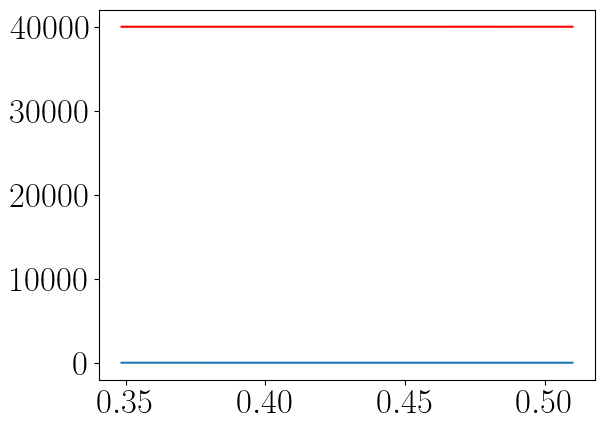

In [27]:
import scipy.constants as const
pnt = 5000
top = -1 # 4100
dectim = time[pnt:top]
deczs = dectim/1e12*cms
decayE = np.sqrt(gEz[pnt:top]**2)*MV # also the magnitude


def expon(x,A,B,C):
    return A*np.exp(-x/B)+C


popt, pcov = curve_fit(expon, deczs,decayE) 
print('A: ',popt[0])
print('B: ',popt[1]+.00075)
print('C: ',popt[2]+.05)

decaytime = popt[1]+.0008
#decaytime = popt[1]
zlen = decaytime
print(zlen)

dielperm = 4.2
conduct = 5.8e7
eps0 = const.epsilon_0
decayt = eps0*dielperm/conduct
print(decayt)

xs = np.arange(deczs[0],deczs[-1],.000001)

plt.plot(deczs,decayE)
plt.plot(xs,expon(xs,popt[0]+40000,popt[1]+.0008,popt[2]+.065),'r')
plt.show()

(2100,)
1050.0
max freq  1806525411.0684319  located at  77227194786.8252
wavelength =  3.8819545216880518  mm
copper skin depth:  139.72700840651171  nm
aluminum skin depth:  107.84759070593657  nm


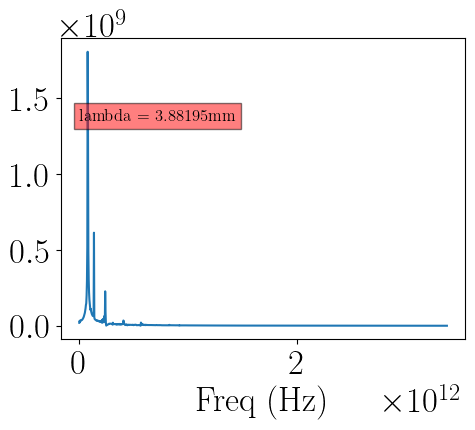

In [28]:

# Doing FFT to get the wavelength of the accelerated bunch from the 1D probe
#aEzslice =gEz[:maxtime]*MV # takes the x=0 slice
#zint = time[:maxtime]/1e12 # convert z axis to a time axis


aEzslice = gEz[:maxtime]
zint = time[:maxtime]/1e12

#print(aEzslice.tolist())
#print(zint.tolist())
print(np.shape(aEzslice))
aEzslicelen = len(aEzslice) # get length of aEzslice for N (with x=0 above and y=0 (transposed above))
print(aEzslicelen/2)
#samplerate = aEzslicelen/((info_Ez.zmax*1e3-info_Ez.zmin*1e3)/cms) # N/(t_f - t_i) = N/((zmax(mm) - zmin(mm))/cms) so that end wavelength is mm
samplerate = aEzslicelen/(zint[-1]-zint[0]) #(zhigh-zlow)/cms) # N/(t_f - t_i) = N/((zmax(mm) - zmin(mm))/cms) so that end wavelength is mm

Fy = fft(aEzslice) # do fft
Fx = fftfreq(aEzslicelen,1 / samplerate) # get the fft frequencies

# get the maximum of Fy
freqmax = np.amax(np.abs(Fy))
# which frequency does the max of Fy correspond to?
indexfreq = np.where(np.abs(Fy) == freqmax)
flatind = indexfreq[0]
print('max freq ',freqmax, ' located at ',Fx[flatind[0]])
# convert the frequency to wavelength using f = c/lambda
wavelength = cms/np.abs(Fx[flatind[0]])
print('wavelength = ', wavelength*mm, ' mm')
wavem = wavelength
freqs = wavem/cms
freq = 1/freqs
skindepth_cu = 1/np.sqrt(sc.pi*sc.mu_0*freq*1.68e8)
skindepth_al = 1/np.sqrt(sc.pi*sc.mu_0*freq*2.82e8)
print('copper skin depth: ',skindepth_cu*1e9,' nm')
print('aluminum skin depth: ',skindepth_al*1e9,' nm')

# Plotting to see the frequencies to check with wavelength on plot
figfreq = plt.figure(9997)
gs1 = gridspec.GridSpec(11, 11)
ax1 = figfreq.add_subplot(gs1[1:10,1:10])
ax1.text(0,freqmax*3/4,'lambda = '+str(round(wavelength,8)*1e3)+'mm',bbox=dict(facecolor='red',alpha = 0.5),fontsize=12)
#Fx[flatind[0]]*2+Fx[flatind[1]]/2
imFreqs = ax1.plot(Fx[:len(Fx) //2],np.abs(Fy[:len(Fx)//2]))
#plt.xlim(0,2e9) # 0,(np.amax(Fx)/Fx[flatind[1]])*(3/5)*Fx[flatind[1]])
ax1.set_xlabel("Freq (Hz)")
#plt.savefig(save_dir+fig9997)
#plt.savefig(save_dir+fig9997p,dpi=600)
plt.show()

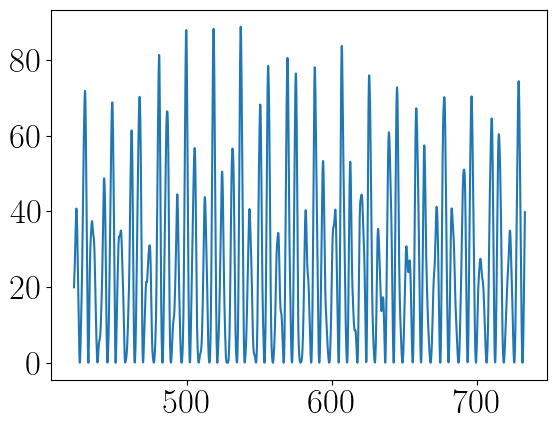

In [29]:
# calculating the energy from the 1D probe
# energy density = epsilon_0 * E^2

u_e = [sc.epsilon_0*gEz[i]*gEz[i] for i in np.arange(len(gEz))]
plt.plot(time[:maxtime],u_e[:maxtime])
plt.show()

t desired:  3.86924551984554e-10 1.03405586517884e-09  s
t acheived:  3.86872583010956e-10 1.03402913117043e-09  s
tindexmin:  112  tindexmax:  4483
2185.5
2007.5


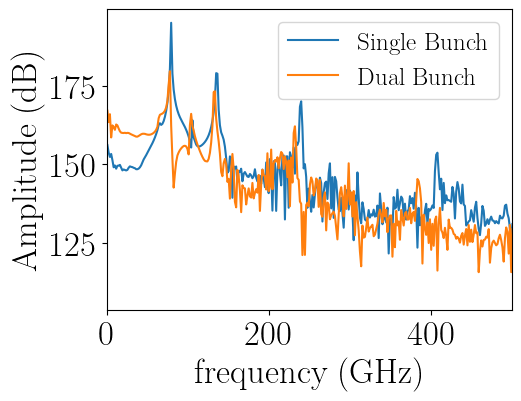

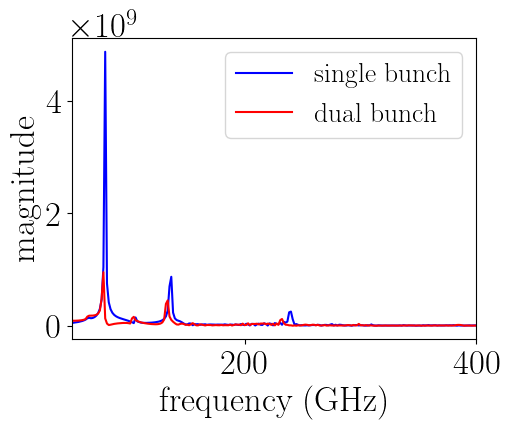

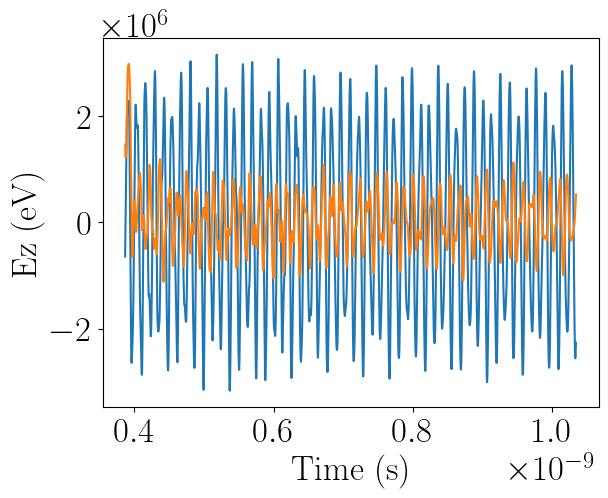

In [30]:
# compare 1 bunch to 2 bunch FT
b1Ez = [1355424.95969518, 1468957.78050232, 1551371.83857038, 1606990.7441448, 1641646.37517422, 1659939.98470623, 1665432.10683045, 1662439.91299333, 1656190.7786199, 1650434.77966414, 1645427.94700362, 1638911.24602526, 1629121.54482821, 1617251.72728269, 1608108.80592365, 1608723.19810126, 1624817.16240183, 1656716.9448992, 1698416.26203971, 1741719.95582445, 1782041.34028434, 1820298.54935083, 1859976.84337387, 1903697.10938454, 1952774.59648112, 2008892.43357751, 2075397.3605822, 2156838.19462734, 2256427.41337182, 2372715.98580046, 2498523.74882185, 2623471.5447107, 2737320.68809459, 2830952.15015123, 2895800.29151634, 2924386.15992841, 2912085.26874275, 2858331.80368406, 2766577.96852178, 2643592.13342115, 2498468.50100933, 2341488.76307309, 2183170.06208996, 2033525.30060194, 1900974.53969663, 1790606.02579566, 1702691.79952761, 1633039.49256924, 1575518.92427293, 1525047.94658405, 1479103.63072694, 1437553.63606993, 1401693.61474923, 1372995.71417004, 1351880.97202088, 1337123.53724785, 1325996.65859654, 1314524.98115876, 1297715.63009745, 1270428.41179791, 1228921.94320479, 1172070.8066858, 1101366.94319282, 1019560.92697511, 928450.925843635, 827031.882192201, 711253.313262929, 575420.995469662, 414209.406647137, 224465.897895864, 6547.5908745494, -234970.2428748, -491342.957981947, -750615.794348803, -999850.120380588, -1228463.84301531, -1431127.69504916, -1608177.1390473, -1763124.90622048, -1899094.94872834, -2016746.95004787, -2115002.43982377, -2193476.70174065, -2253844.90750438, -2298351.48765422, -2326748.32042634, -2334910.06795895, -2317004.32355787, -2269698.69304707, -2194898.48542293, -2099056.78375354, -1990475.096323, -1877281.21509002, -1766861.06532996, -1665570.56312055, -1577941.03722013, -1505863.31872728, -1448445.0939232, -1402747.36873613, -1365157.5087664, -1332637.59952613, -1303038.47590335, -1274659.27526242, -1245978.26171456, -1215782.99211442, -1183067.26912549, -1146446.7336061, -1103559.85314629, -1050809.62032225, -983418.848360728, -895890.460288914, -783212.520587837, -642805.561008718, -476349.670215616, -290248.065889942, -94274.9260565407, 100918.472878028, 286505.496974201, 457715.607224555, 614814.107086848, 762159.610256704, 905755.765100512, 1050742.39950057, 1199909.05948828, 1353163.39773798, 1507424.25526056, 1656871.22922765, 1793942.80261608, 1911152.80807975, 2002955.1251311, 2066695.26049314, 2102615.21465377, 2113684.72249548, 2105579.09903119, 2086240.61419886, 2064542.17924276, 2048461.94122296, 2043674.78588521, 2053028.07626214, 2076595.46515225, 2111834.44205921, 2153914.81395026, 2196652.70734688, 2234102.9254698, 2262196.83994746, 2279509.85979563, 2286534.58946622, 2283710.86576567, 2269367.58464094, 2238768.5440594, 2184699.0419434, 2099375.83999472, 1977010.18561287, 1815816.96238575, 1618373.77015719, 1390440.41174845, 1139361.21328159, 872896.233944223, 598530.168407676, 322983.397398731, 51720.6558968001, -211586.25300641, -465543.85961279, -711313.109130845, -952324.808886446, -1192832.5845152, -1435215.56221428, -1677254.52080236, -1911214.57706656, -2125580.78376418, -2308658.86616883, -2452226.45156799, -2553521.027071, -2615015.10946432, -2642720.30414987, -2644057.04981625, -2625952.61334168, -2593758.20558883, -2551403.93316303, -2502272.9334518, -2449600.96565473, -2395879.2876136, -2341869.05120758, -2286160.62004423, -2225820.1670659, -2157963.87907548, -2081257.56345258, -1996161.51587703, -1903808.91825557, -1804610.1124827, -1697593.55493015, -1580508.93914928, -1450207.44843675, -1303144.71327084, -1136246.81134138, -948155.692593937, -740272.881736729, -516909.948806163, -284498.670911668, -50413.6715703067, 178129.924785694, 395030.568138873, 596201.874052982, 780476.258826111, 950263.957508751, 1111207.05979523, 1270144.25508399, 1431856.39032261, 1596251.96248994, 1757600.98396569, 1906267.91439257, 2032026.14114604, 2127161.75954212, 2187848.07679616, 2213754.19412535, 2207207.91698956, 2173039.36832146, 2118867.80487384, 2054687.76636969, 1991046.8504594, 1936340.22989256, 1894610.82052148, 1865064.88440211, 1843581.97817247, 1825499.21511372, 1808280.15688663, 1792645.83155507, 1781633.81529269, 1778379.86594005, 1784049.7986441, 1796900.72999128, 1812635.12236557, 1825634.76047245, 1830362.11809556, 1822259.9162222, 1797910.07057739, 1754699.75097992, 1690489.50498151, 1603762.44854189, 1494375.65047496, 1364431.38402522, 1218510.2757342, 1062868.17999772, 903739.673287009, 745233.499137151, 587615.167405704, 426982.275537241, 256923.567666039, 71660.7121681174, -130827.964323502, -347290.019654649, -569914.360442227, -788602.412829121, -993521.763151838, -1177088.73919822, -1335182.41526176, -1467571.43046281, -1577481.40000524, -1670461.29829716, -1753096.56736501, -1832087.04019334, -1913585.18058706, -2002186.33655201, -2099460.30934512, -2203044.51748093, -2307530.01107755, -2407022.54835579, -2497738.68689167, -2578946.13007048, -2651886.22460271, -2717681.49669643, -2775663.90538428, -2823001.93565388, -2855471.86833844, -2868465.98579869, -2857420.74082058, -2817675.01676623, -2744563.63565913, -2634477.30567322, -2486593.77517033, -2303992.12861125, -2093060.43495379, -1861434.41441335, -1615831.2588375, -1360985.31652808, -1099776.92068725, -833792.347366903, -563679.31016754, -289331.967297729, -10281.0867293603, 273564.237236591, 561039.092891715, 849041.553812419, 1132262.6481367, 1403359.61522711, 1653532.58074407, 1873608.9633158, 2055870.84505077, 2196494.8789999, 2297609.98439919, 2367475.58251478, 2418003.02471877, 2460494.22678792, 2501741.94246099, 2542491.56457885, 2578862.92409413, 2605669.92093564, 2619614.04660809, 2620585.21637211, 2610711.22841272, 2592400.33805681, 2567043.33370808, 2534971.04552931, 2495973.46067551, 2449497.78333624, 2394409.2618362, 2328797.51291808, 2250146.46752701, 2155721.14251559, 2042971.29499796, 1910087.36701984, 1756887.59865748, 1585684.78765532, 1401337.94373399, 1210084.79973464, 1017723.87530507, 828246.901940017, 643537.051360349, 463785.390911684, 287879.553144884, 113541.626884474, -62288.0865700358, -242311.268005178, -427176.702483625, -614100.072216435, -796663.506426867, -966030.496290533, -1113091.94730732, -1230724.4840036, -1315421.41980919, -1367823.41094758, -1392094.00556041, -1394669.97555998, -1383243.87109941, -1366360.86603659, -1353037.79376755, -1351488.85260957, -1366963.93976693, -1399989.00345047, -1446531.40451334, -1500410.7369992, -1556608.25963271, -1613416.20378639, -1672260.39792648, -1735735.39717694, -1805374.45359579, -1880271.34665132, -1956699.24613502, -2028472.74940069, -2088048.04833755, -2128382.20726405, -2144927.12111683, -2136581.89513163, -2104968.25193297, -2052740.35906247, -1982370.78020331, -1896141.66065377, -1796684.87780384, -1686823.62004236, -1568267.63931439, -1440068.02298712, -1298262.94017938, -1137346.54340399, -952886.436886767, -743920.826828997, -514035.359544757, -270840.833166358, -24324.958295963, 215189.210227869, 438929.884740659, 641080.047277731, 819437.695396696, 975215.836021201, 1112191.25519851, 1235621.25166839, 1351224.97574122, 1464307.86418093, 1579073.46936375, 1698192.65625005, 1822578.24694391, 1951222.13055846, 2081153.78808165, 2207856.73199453, 2326365.41892008, 2432753.61705063, 2525321.4159481, 2604853.38948096, 2673728.60360174, 2734140.67637013, 2786116.01805667, 2826273.87958044, 2848102.39285351, 2843848.29735758, 2807249.85925452, 2735810.40494799, 2631498.36105659, 2499617.98316322, 2346572.30924839, 2177677.16972953, 1995887.42561225, 1801627.10762982, 1593385.18481718, 1368625.99671846, 1124783.05308655, 860319.11155897, 575796.422371428, 274712.579478059, -36202.4837786552, -347385.854955701, -647518.013399361, -925170.363751156, -1170774.1210198, -1378339.19092325, -1546180.53356742, -1676355.18210714, -1773361.69058348, -1843031.82639034, -1892010.71459949, -1927392.92030701, -1955872.50183262, -1982327.08465183, -2008463.53666892, -2032400.80114909, -2049736.24071634, -2055915.02744142, -2048897.13907733, -2030695.44081734, -2006815.03677583, -1983819.54995483, -1966359.88031765, -1955232.93146603, -1947303.56727754, -1937010.18460752, -1918426.03953554, -1886845.78570278, -1839439.38031101, -1775166.36689856, -1694457.35511736, -1599048.98724662, -1491970.37688571, -1377305.40155791, -1259304.68646499, -1140854.15348332, -1021966.10857948, -899255.871178153, -766972.56464435, -619357.454944656, -453447.198537678, -271199.53030747, -79997.2277224647, 108859.652820272, 283232.345061659, 433564.175032226, 555144.866695774, 648262.016369828, 716458.422178174, 764235.631568775, 795768.57386797, 815232.392516686, 827933.255461635, 840804.674988024, 861458.821964364, 896162.327496671, 947831.913400799, 1015097.04639127, 1092965.89164544, 1174967.72740083, 1255958.06058143, 1334301.79044181, 1412301.39415697, 1494645.15623903, 1585791.67315059, 1687712.46624831, 1798920.43320194, 1914777.57882154, 2028550.6053551, 2132756.65853997, 2220530.82728688, 2286742.51888226, 2328608.03775666, 2345761.54479727, 2339898.62700379, 2313993.49417544, 2271003.01391303, 2212277.7806327, 2136422.12084452, 2039457.57074237, 1916487.9525394, 1764036.18125171, 1581727.71593365, 1372561.36787609, 1142106.27897047, 897492.726418582, 646647.119323963, 397615.631458962, 157790.261059227, -66843.438687873, -272325.287802341, -457345.241814912, -623885.797622646, -777331.254348595, -925262.434720528, -1074851.13479901, -1229961.32217924, -1389663.41291232, -1549200.3996285, -1702895.21129953, -1847188.80889256, -1981928.79096834, -2109258.00260678, -2231083.89155013, -2346988.12003341, -2454010.60939926, -2548343.19214841, -2627520.86637713, -2691259.41985225, -2740170.19470005, -2773463.25271262, -2787763.08799488, -2778260.9144519, -2741404.19381586, -2677062.64502526, -2588649.46828759, -2481282.56023559, -2359233.1483758, -2223932.82042365, -2073199.79938435, -1901850.04088901, -1703584.15662955, -1473658.0332371, -1211355.44461875, -921182.345372546, -612319.791382669, -296800.073143317, 12655.4897758605, 304441.915433585, 569328.774908016, 801239.568479353, 997633.231652679, 1159566.61751487, 1291474.45522984, 1400495.78619365, 1495014.78942814, 1582376.44832973, 1666483.71600654, 1746552.10234715, 1817972.72272138, 1875024.7799463, 1913988.75571944, 1935029.41178411, 1942125.68108443, 1941476.9398382, 1939377.33685412, 1940434.70920487, 1946629.61479752, 1957325.07838733, 1969965.90886889, 1980967.17114228, 1986404.79271316, 1982515.69609388, 1966271.10763968, 1936121.87710359, 1892625.84621471, 1838479.06727628, 1777692.89631756, 1714147.3991701, 1650160.52144449, 1585715.37463405, 1518543.73607488, 1444724.73495519, 1359304.27698374, 1256817.88098167, 1132111.48293128, 981897.960396711, 806869.114981784, 613375.225579657, 413409.72409766, 222243.135571428, 54250.8253923524, -81442.0081870622, -183595.989634172, -258607.174645629, -317575.494429008, -372152.857410913, -431072.809294556, -498680.975754975, -575593.651414065, -660524.101586173, -751896.119272832, -848305.261223368, -947929.935239383, -1047928.63956833, -1144911.18282814, -1236606.30484331, -1323652.98018047, -1410074.74373313, -1501801.30035147, -1603927.90340953, -1718231.30708831, -1842263.16786834, -1970380.80177655, -2096017.20607415, -2213899.08940335, -2321057.77522932, -2416250.69728979, -2498356.71632021, -2564860.98556011, -2611424.42650074, -2632832.27945853, -2624699.49023305, -2584748.28201262, -2512766.28259699, -2409398.25892642, -2274888.34048072, -2108918.39387689, -1911757.74570778, -1685881.3588861, -1436900.63497846, -1173213.5650487, -904609.561400232, -640505.348771367, -388417.114349768, -152982.478514207, 64397.5319562633, 265345.805616195, 453795.988144578, 634836.438260892, 813225.636104573, 991888.951213344, 1170936.04881044, 1347722.17892213, 1518046.81284772, 1677954.41063872, 1825231.69708883, 1959872.85945874, 2083408.41941074, 2197668.67866546, 2303823.67363025, 2402191.20040934, 2492606.35277466, 2574734.69980713, 2647958.21434364, 2711029.8749583, 2761935.77274535, 2798140.49281017, 2817017.01602586, 2816181.40892356, 2793654.80077423, 2747964.5428451, 2678262.14341373, 2584344.88920289, 2466378.4177821, 2324320.48666082, 2157424.76964867, 1964366.83617718, 1744221.69799051, 1497938.97629144, 1229574.4556188, 946602.097506931, 659058.209614403, 377809.71802513, 112621.124548072, -129284.783282595, -343804.164055986, -529731.157990578, -688108.396337473, -821607.863973907, -934223.427219304, -1031134.09085949, -1118218.91927985, -1200797.583109, -1281817.04758331, -1360427.15889111, -1432030.91339158, -1490215.91263623, -1529868.50525087, -1549981.99093983, -1554735.64620716, -1552301.77295611, -1551971.1556356, -1560937.62743871, -1582152.22493599, -1614100.434026, -1652401.95546812, -1692198.94106053, -1729975.8005293, -1764042.02744392, -1793934.61039753, -1819568.76933877, -1840737.68000079, -1857007.05356542, -1867739.12384518, -1871988.53588973, -1868160.72843633, -1853557.2710022, -1824195.03766419, -1775323.6276323, -1702700.61209416, -1604156.83029183, -1480750.7934391, -1337041.91075037, -1180459.30009066, -1020061.81463029, -865035.872572011, -723162.654438399, -599413.491828935, -494909.973092502, -406592.120889278, -327871.916832999, -250288.09573828, -165844.543925949, -69378.5253273482, 39932.4155736571, 158674.662532974, 280978.268203504, 401149.816691442, 515895.098981417, 625204.535101422, 731820.16069858, 839963.539883884, 954191.066882406, 1078775.63466946, 1217309.98386889, 1371949.55864056, 1542180.68049127, 1723797.86569528, 1909093.644403, 2088705.7741325, 2254517.25916907, 2402225.80190059, 2532209.05820491, 2648133.82248207, 2753948.39314485, 2850741.59622651, 2934931.89897798, 2998474.58661546, 3030827.18509014, 3021805.02847828, 2964324.30617619, 2856233.86181141, 2700809.09855704, 2505915.772247, 2282252.77065421, 2041320.78413545, 1793735.73280203, 1548213.33211652, 1311115.61020078, 1086123.50148045, 873692.916217099, 670525.47081751, 469872.063675966, 263394.857912656, 44368.7907502792, -189130.178213032, -432767.14639635, -677120.737371544, -910907.673853864, -1124599.24488739, -1312815.82016024, -1474885.97975941, -1614044.11950686, -1736124.31822874, -1848224.60499075, -1957291.74462202, -2068521.36138211, -2183848.10523475, -2301123.17311941, -2414521.53118335, -2516323.7528266, -2599611.33141493, -2660806.59473608, -2700800.08279926, -2723988.27443909, -2735663.14383624, -2739098.54190354, -2733741.28828207, -2715162.4187239, -2676453.06721942, -2610206.37087852, -2510316.94986626, -2373261.37870296, -2198876.14304253, -1990736.03881815, -1756126.05879998, -1505447.76569496, -1250856.98845088, -1004130.76959137, -774219.785377199, -565387.362560548, -376830.89762243, -204057.802537604, -41410.6191409532, 115399.69484513, 267787.97659552, 414258.125323835, 551559.097821313, 676258.877265158, 785904.993728116, 879334.900655093, 956297.62443801, 1016981.44142892, 1062047.60343356, 1093322.84284094, 1114664.63041006, 1132159.57497121, 1153109.36347098, 1184057.55186972, 1228815.55031107, 1287529.8717694, 1357270.1383219, 1433809.30050928, 1513675.56014068, 1595457.41841768, 1679767.05598041, 1767976.2614932, 1860433.78056862, 1955049.85711408, 2046869.71344883, 2128756.00715958, 2192829.97833785, 2232091.32866323, 2241711.05695681, 2219754.58429586, 2167339.53058364, 2088344.31437799, 1988795.28649166, 1876029.86907632, 1757655.26193542, 1640260.65481835, 1527986.48840515, 1421433.92079435, 1317633.41642964, 1211435.71235816, 1097831.19465229, 974033.087857773, 840301.418868085, 699340.931158686, 554937.547785042, 410675.726910298, 269172.185675627, 131805.343134656, -1251.61427563078, -130862.231954968, -258744.256261622, -387327.850863354, -519591.147000025, -658735.385330862, -807651.248742276, -968330.700597026, -1141480.96977272, -1326456.36228847, -1521368.49314001, -1723159.14665235, -1927627.49666216, -2129645.89555602, -2323749.81175936, -2504948.31475424, -2669323.71292927, -2814078.91686361, -2937052.01001846, -3035974.06350258, -3107739.31954036, -3147936.88392128, -3151048.6805502, -3111728.15246093, -3027013.90936439, -2898455.66016593, -2732797.54848365, -2540570.54888853, -2333191.01742689, -2119961.52213162, -1906232.81369816, -1693234.24869508, -1479315.44549295, -1261874.47255613, -1039092.14417743, -810753.826913919, -577958.167150615, -342223.358959371, -104937.01521486, 132201.491803884, 366041.827507214, 591272.590686311, 801160.170684873, 989683.968484204, 1153867.96228904, 1294873.22171725, 1417255.0662982, 1526962.53010997, 1629278.84766592, 1727677.65321134, 1823848.72509059, 1918446.59155769, 2011780.25186941, 2103842.88518593, 2193706.90506415, 2278971.41806364, 2356038.75540889, 2421288.23519586, 2472298.24627547, 2508087.53085891, 2528153.34959127, 2531086.14330503, 2513799.44305765, 2471857.94313579, 2400691.67224207, 2297179.58186962, 2161115.0974765, 1996128.40674188, 1809652.44639732, 1611686.80364094, 1412615.07126847, 1220934.62668836, 1041883.61183379, 877331.393035595, 726464.361201093, 586569.60836151, 453732.239181541, 323802.485927302, 193861.533975836, 63743.9595812697, -63288.9253829385, -181346.054197803, -283956.841426048, -366442.53086218, -427571.633588605, -469893.32380962, -498739.399232862, -520426.258666138, -540576.439803108, -563447.789197431, -592466.250245128, -631174.061053317, -683428.303629769, -752377.929493454, -838911.409356627, -940840.902263459, -1053604.95800071, -1172174.94513695, -1292992.23328899, -1414744.55565299, -1537586.49870155, -1661414.0971604, -1784305.4480314, -1901989.69081982, -2008526.05402584, -2097749.8921791, -2164756.76574925, -2206802.2046874, -2223399.737235, -2215866.09911019, -2186792.09072454, -2139760.43427767, -2079220.72881399, -2010112.55383459, -1936919.82619028, -1862330.49132595, -1786146.93633833, -1705104.17153063, -1613821.83016961, -1506637.98887987, -1379794.55169716, -1233287.93558026, -1071632.02510259, -903007.241044402, -736889.257232222, -580977.386058576, -438649.367617811, -308033.46385248, -183115.547555766, -56310.55090947, 78836.2875452165, 226102.823699601, 386613.843410295, 559869.623806743, 744832.754967633, 940428.073429528, 1145376.37568882, 1357706.78770239, 1574419.8602415, 1791624.57526162, 2005140.92308271, 2211202.67892163, 2406742.90153821, 2588982.36091793, 2754571.85774828, 2898945.15614173, 3016445.22859106, 3101265.24373318, 3148740.59814252, 3156392.00475962, 3124341.71892041, 3055080.35388931, 2952843.3163479, 2822920.09014449, 2671027.25206985, 2502627.51518711, 2322094.06912073, 2131922.60513902, 1932413.77441067, 1722114.73031451, 1498967.54003113, 1261835.46847905, 1011931.75008108, 753637.015460583, 494325.552153958, 243161.800400322, 9237.79631100731, -200323.833570122, -381710.888929657, -534905.754294785, -663381.308622617, -773297.23478932, -872430.751486764, -968870.411168206, -1069454.69042181, -1178207.15509797, -1295362.46912769, -1417578.77009948, -1539469.89540704, -1655927.57049892, -1764217.61081367, -1864811.79401111, -1960453.67960306, -2053853.20162273, -2145200.19854109, -2230895.46929903, -2304288.06667319, -2358023.11783567, -2386586.081468, -2387564.93596799, -2361153.35838013, -2308708.00576899, -2231728.89294975, -2132065.24087694, -2013001.47311153, -1880112.17111717, -1740932.6567044, -1603309.58826666, -1473106.17406901, -1352294.77466032, -1238334.94591182, -1125259.93639813, -1006236.43218666, -876685.800166887, -736644.534478766, -591257.605423274, -449203.212486513, -319909.778310675, -210888.463687522, -126118.611631914, -65648.518340152, -26041.9615316273, -1238.83026732337, 16422.2445611409, 35149.0747620858, 62718.1513343494, 105639.330031016, 168459.313913802, 253240.042035728, 359397.493332474, 484139.761664503, 623535.913078246, 773857.597035837, 932545.47836623, 1098253.75868095, 1269954.00868483, 1445686.49764612, 1621765.19324536, 1792917.28605432, 1953239.11149737, 2097404.98310434, 2221543.50264653, 2323545.07400924, 2402957.881064, 2460745.78572569, 2499003.64823872, 2520526.74907818, 2528147.89842163, 2523940.47813132, 2508519.61433904, 2480663.47345114, 2437418.36384652, 2374791.40011428, 2288953.93680726, 2177561.6686853, 2040636.74872836, 1880729.55588938, 1702582.19503259, 1512716.86516853, 1319036.71331505, 1130043.33653545, 953255.737404954, 793030.131380316, 648737.072288629, 514446.127295975, 380627.702013009, 237299.607799257, 77244.9013461599, -102087.813326608, -298663.956229162, -507615.170637692, -723685.070960826, -943241.220031035, -1165021.48881622, -1389376.56181815, -1616511.09060085, -1844797.35085494, -2070205.2419528, -2287135.83203626, -2489944.52602148, -2673977.87144966, -2835423.66026773, -2970316.07159238, -3073796.00377787, -3140581.71290517, -3166683.14695685, -3151431.3289839, -3098576.32396631, -3015651.83707989, -2911660.65187124, -2793981.66845305, -2665896.17221019, -2525974.68781818, -2369664.11231659, -2192198.51427899, -1991252.46599203, -1768097.95158881, -1527121.13506581, -1274537.78553274, -1017341.79542031, -762933.088715939, -519064.099138657, -293382.219319947, -92209.2194487131, 81048.2197420633, 226994.8303543, 350190.682042116, 457923.259669286, 558330.695354882, 658535.92329499, 763263.863339969, 874159.866179824, 989877.450751283, 1106925.32683923, 1221113.69532707, 1329177.42788064, 1429956.39707792, 1524619.158248, 1615843.25442403, 1706339.07216519, 1797317.66555333, 1887421.61878137, 1972460.35618216, 2046130.87601824, 2101662.86760847, 2133930.80315525, 2141208.77025029, 2125736.26400993, 2092768.05128209, 2048567.80506749, 1998359.38759652, 1945159.90851094, 1889755.07713741, 1831365.39916166, 1768311.52201245, 1698301.57729709, 1618491.01918869, 1525788.89157932, 1417795.93782403, 1294309.08906539, 1158762.44142487, 1018669.43866741, 884398.967346133, 766439.038599955, 672215.792789832, 603919.261406048, 558327.424645272, 528566.87118474, 506742.504424384, 486018.421226257, 461246.032233514, 428284.227856624, 383030.531219361, 321254.423972507, 239557.462700869, 136797.17056475, 14852.0997220882, -122040.767552766, -269263.16150445, -424128.615635039, -587198.510949276, -761682.037304837, -951034.909241616, -1155945.82812149, -1372329.60719808, -1591441.87634571, -1802111.48810218, -1994026.69330849, -2160578.54373918, -2300112.69818244, -2415282.84074893, -2511029.41035604, -2592126.13700572, -2661172.79904608, -2717571.86067241, -2757639.28546697, -2775663.70001459, -2765491.46992722, -2722161.66905298, -2643250.2415232, -2529747.35496126, -2386334.51854919, -2220910.35243553, -2043323.89696128, -1863560.70171787, -1689906.15583273, -1527646.32094878, -1378605.99025357, -1241441.37990009, -1112340.5288603, -985775.249236068, -855175.835836637, -713694.896392907, -555328.794162703, -376400.349891717, -176895.402332655, 39188.2821476574, 265054.034313636, 493589.314509324, 719929.653827519, 942714.556945511, 1163390.05959744, 1384103.9364586, 1605521.34054223, 1825731.08160486, 2040530.25792681, 2244507.8150043, 2432096.54717598, 2598127.7745575, 2737966.30955413, 2847623.83221681, 2924204.75319516, 2966687.535863, 2976599.26077662, 2957944.07019315, 2916043.47713976, 2855601.82122421, 2778861.48992656, 2684780.61042598, 2569734.4448528, 2429557.10493718, 2262102.40640325, 2069195.71565037, 1857080.0427484, 1635181.63892907, 1413838.01894189, 1202035.42557118, 1005981.97909225, 828750.341276498, 670708.077262383, 530263.854731421, 404545.157546089, 289839.237060186, 181874.35247718, 76200.8877060531, -31085.4995599523, -142325.901148218, -257441.565436479, -373884.892170486, -487755.640234569, -595753.061828761, -696992.67245129, -793645.338851488, -890014.786072311, -990605.309989877, -1098219.33607806, -1212866.88748609, -1331661.88609719, -1449490.58024075, -1560182.48866186, -1657924.27110446, -1738585.51655472, -1800610.90100021, -1845276.27787982, -1876274.73572257, -1898669.79782593, -1917340.8565988, -1935290.11123512, -1952429.93781528, -1965410.78561403, -1968620.9273037, -1955980.22375649, -1922878.77052657, -1867650.11636521, -1792196.28048243, -1701674.1647756, -1603448.77102673, -1505735.90240359, -1416356.40171699, -1341758.25115782, -1286143.55180593, -1250516.83562835, -1231863.41690018, -1223115.75651245, -1214505.29385138, -1196145.87703048, -1160776.27149367, -1105306.90205458, -1030454.77638607, -938814.063982741, -832469.533545756, -711377.277978175, -573291.802063089, -415213.826724526, -235456.655347335, -34983.1152913127, 182877.233140586, 414012.345470762, 655061.855713115, 903620.534163667, 1156979.21664372, 1410502.94835512, 1657064.24317052, 1888211.30625729, 2096600.61290651, 2278418.79324358, 2434445.84802752, 2569056.42585645, 2687521.78154376, 2792924.73932003, 2884240.11726507, 2956454.85114597, 3002449.42826623, 3015517.52108969, 2991357.53389171, 2928997.72662068, 2830842.16907006, 2702314.46581957, 2551352.32860307, 2387642.87596742, 2221380.4964257, 2061531.12549214, 1913912.4242062, 1779688.22237542, 1654998.18008842, 1532198.25225333, 1402484.53030744, 1258853.16624804, 1098066.67273502, 920885.217694054, 730848.117662784, 532529.459646539, 330055.163582948, 126138.868350244, -78406.1094461067, -284641.900916798, -494847.894481479, -711322.117604639, -935055.195615765, -1164760.40971709, -1396567.15845962, -1624518.49286941, -1841866.5308707, -2042822.68901381, -2223991.52235969, -2384679.88492491, -2525882.72260857, -2648605.44385793, -2752583.38743028, -2836067.1505991, -2896497.91218132, -2931302.00746161, -2938141.73271644, -2914593.6529925, -2857785.23719765, -2764568.73810267, -2632436.52889785, -2460968.50618362, -2253359.02044918, -2017439.4980716, -1765581.0495568, -1513104.48624849, -1275410.61966415, -1064683.44771307, -887301.7797461, -742877.209279845, -625278.948687271, -525325.554321746, -434180.588770169, -346118.526877943, -259557.039951316, -176151.629140829, -98792.7388823469, -29738.7046868351, 30385.995327908, 82800.8643464647, 130408.972424732, 177475.233953408, 229066.60573497, 290188.623372321, 364760.837849129, 454709.628858274, 559451.857286666, 675983.234128323, 799682.318575388, 925721.264762329, 1050648.49120649, 1173443.23829302, 1295385.16484652, 1418596.24304689, 1543926.81592377, 1669395.23242053, 1790112.6091345, 1899661.14757076, 1992013.36797645, 2062921.58847827, 2110229.06667364, 2133270.84521912, 2132041.49147413, 2106922.06753595, 2059379.44548541, 1993262.07593348, 1915606.88377152, 1835913.14158817, 1763795.93746578, 1706104.18269348, 1664985.49604797, 1637704.47015844, 1617937.15944488, 1597665.42048422, 1568946.0476196, 1525308.35073036, 1462820.32578113, 1380803.48471041, 1281947.04618408, 1171458.51260841, 1055135.64989842, 936874.396196682, 816745.132063455, 690779.090790942, 552796.189785534, 397438.915610135, 222817.129290263, 31316.5536883466, -171839.122602899, -381312.446716458, -593907.730892688, -809034.964033758, -1027418.49700445, -1249251.12469726, -1473076.41210023, -1695843.94988635, -1913689.06293815, -2122676.67841219, -2319011.82057894, -2498701.39965849, -2657044.33113835, -2788474.7540117, -2887137.28324503, -2948182.23190719, -2969311.18791746, -2951853.56425618, -2900808.98087264, -2823769.66137353, -2729128.41767455, -2624223.71982679, -2514040.29800052, -2400829.65810218, -2284588.94464249, -2163918.56978987, -2036688.59557798, -1900290.51123723, -1751723.02251245, -1587955.45524198, -1406832.31891589, -1208365.8059608, -995790.269983015, -775527.26323779, -555599.913722167, -342982.749883745, -141177.150463428, 50738.1934060139, 237168.430375856, 423721.881053801, 614655.911473917, 811100.618757671, 1010696.96631227, 1208640.07262397, 1399479.71778631, 1578730.30564613, 1743592.66251765, 1892733.42050462, 2025622.67101724, 2141984.82083977, 2241528.26160335, 2323758.80229341, 2387715.5156082, 2431751.34076715, 2453597.41681562, 2450778.80805227, 2421260.5053528, 2364189.02620822, 2280621.41674868, 2174050.47065846, 2050446.09484566, 1917613.57735398, 1783936.61629872, 1656897.87184633, 1541936.82350168, 1442003.23156927, 1357672.7908317, 1287382.87258754, 1227590.41762425, 1173158.66354112, 1118371.95896958, 1058464.553575, 990972.590956321, 916182.666532796, 836458.384843887, 754814.984726538, 673418.511928756, 592664.818542823, 511204.13986468, 426776.089132134, 337231.483383366, 241034.879167908, 137041.082267712, 24056.7262070577, -99036.1702578825, -232340.865010562, -373839.204978813, -519197.547639277, -663051.918872415, -801260.955409645, -932820.506592472, -1060186.87985526, -1187611.7799875, -1318252.52783367, -1451605.77975131, -1582703.99287049, -1703548.31054409, -1806050.14747914, -1885025.6541762, -1939848.14192566, -1974109.61390042, -1993709.89771459, -2004610.29190462, -2011494.26945255, -2017722.35581404, -2025942.5565017, -2038377.8633183, -2056339.26480232, -2079304.51226019, -2104283.56644317, -2126011.87940961, -2138047.40133327, -2134395.66593498, -2111029.40727531, -2066702.85173026, -2002767.74547885, -1922127.63654, -1827826.25793667, -1721885.99708518, -1604802.0946313, -1475676.0769876, -1332659.64266573, -1173397.65883577, -995390.083396675, -796366.708977132, -574771.309861023, -330349.901173656, -64711.7051102073, 218375.192398746, 513207.569514562, 812987.386975322, 1111059.11268973, 1402011.61804756, 1682052.65171636, 1948415.78588458, 2198176.09866743, 2427269.12671266, 2630333.10929506, 2801365.18592533, 2934699.73278937, 3025896.16862028, 3072520.75654613, 3074949.4060852, 3037027.940531, 2966109.69491973, 2872098.61494412, 2765622.44526093, 2655917.91189251, 2549105.29740361, 2447322.37817811, 2348931.32776188, 2249794.1791633, 2145292.74591853, 2032330.46644843, 1910359.23321301, 1780926.92362392, 1646179.62834563, 1507434.06687812, 1364764.21971451, 1217687.37930166, 1066206.768607, 911253.871684892, 754040.609955102, 594637.544024535, 430743.931221986, 257682.686569651, 70013.1230393514, -135865.742301475, -359495.788379259, -595818.325550906, -836678.057314375, -1073548.26994489, -1299967.59475521, -1512430.91547876, -1709495.22367539, -1889970.82919992, -2051512.02063986, -2190426.09643626, -2302545.6153859, -2384345.16918642, -2433557.23462669, -2449130.83371727, -2430936.15148091, -2379771.36578009, -2297955.26050313, -2190289.26254507, -2064711.79622312, -1931850.36450602, -1803123.87505839, -1687920.36932591, -1591103.90511514, -1512100.7697287, -1446016.05656935, -1386179.32827556, -1326899.69342818, -1265329.81068471, -1201967.57676316, -1139978.85717213, -1083863.65314609, -1037990.82252047, -1005359.76803042, -986765.553706344, -980423.05200513, -982052.38237752, -985390.804437561, -983034.86746944, -967462.325718536, -932072.118911637, -872074.420736368, -785029.190583177, -670852.995237332, -531297.531071832, -369182.104396088, -187787.774220219, 9368.47242579615, 218507.935428705, 435610.163392718, 656625.694511138, 877743.32786166, 1095429.1766794, 1306067.60496806, 1505335.3185675, 1687752.30777495, 1846955.92424008, 1976977.2870622, 2074210.88910477, 2139173.64382178, 2176993.075537, 2196102.33454907, 2205615.50392444, 2212630.75422213, 2220674.14662424, 2229721.36964989, 2237373.53684834, 2240393.47626269, 2235957.40460932, 2222323.48306852, 2198937.35950483, 2166231.30987586, 2125454.49235483, 2078695.6508646, 2028901.30339248, 1979450.83851704, 1932997.09551287, 1889795.30065349, 1846301.20426613, 1795005.64662866, 1726033.11505824, 1630078.36991294, 1501327.81462466, 1338813.35706889, 1145482.57216341, 925669.153014769, 682634.835603193, 417714.787703305, 131453.279430891, -174207.348207701, -494240.50637613, -820486.232655915, -1143265.05921665, -1453626.14764819, -1744856.4340437, -2012446.71786519, -2252812.97697013, -2461943.62727774, -2635155.38097518, -2768289.35287264, -2859606.24633412, -2911110.82320869, -2928368.2302685, -2918785.91358983, -2889224.54398874, -2844143.64517503, -2785101.84311216, -2711579.09584371, -2622349.89582339, -2516535.50529848, -2394021.43010891, -2255586.10073993, -2103218.61386036, -1940644.06543112, -1773561.09386844, -1609053.03442862, -1454083.41478071, -1313573.37792739, -1188927.5800811, -1077806.46022061, -975364.858009579, -876322.454945915, -776686.789573531, -674224.925937172, -567725.347736075, -455926.841907257, -337045.869790986, -209174.058014083, -71083.8310191013, 77260.6489716115, 234862.752835116, 400343.136272143, 572540.149497341, 750567.263418438, 933198.466691414, 1117881.85445432, 1299950.84705817, 1472600.98632739, 1627910.61415565, 1758678.72584993, 1860343.24329593, 1932048.48965817, 1976280.42311681, 1997269.98126135, 1999102.60503677, 1984631.23951052, 1955701.35550008, 1914249.56060538, 1863235.16177757, 1806561.86958342, 1747955.85920705, 1689545.45289637, 1631126.07582951, 1570737.28448491, 1506467.58945167, 1438651.5585025, 1371212.33894913, 1311190.91874543, 1266476.25058205, 1242826.09381797, 1241688.43881168, 1259813.47837053, 1290597.86688349, 1326241.38768396, 1359587.67035968, 1384945.9380904, 1397882.04290166, 1394502.70260777, 1370898.95333074, 1323175.36306166, 1248047.80393598, 1143585.62104863, 1009549.47951166, 847064.374661958, 657907.39205394, 444054.033558265, 207966.381585941, -46498.9011255362, -313263.19089436, -584064.676547707, -849651.211939244, -1101671.2787035, -1334326.8504106, -1544975.05261977, -1733518.91967722, -1901142.61074616, -2049203.8677605, -2178766.34231969, -2290688.5081734, -2385845.8253768, -2465113.4482877, -2529027.52717197, -2577354.82902744, -2608977.27205323, -2622417.10755126, -2616944.94887471, -2593712.35157573, -2556134.15216611, -2509101.587061, -2457365.22263477, -2404016.02949629, -2349913.58766258, -2294186.68149207, -2235132.91263587, -2170637.03183489, -2097805.32389578, -2012387.92552204, -1908949.36841787, -1782252.74223132, -1629306.49798279, -1450812.54525822, -1250941.44959635, -1035339.99220597, -808392.663694802, -571305.221064992, -322202.216361597, -58296.2499702743, 221071.201389521, 512308.568912199, 807653.2869561, 1097397.12035918, 1372902.53862686, 1628658.36069418, 1862391.79279836, 2073612.02172814, 2261898.64132675, 2426120.58859528, 2564817.74850348, 2677060.68393973, 2762904.2206722, 2823035.92781727, 2857869.53275988, 2866706.05581348, 2847571.38253323, 2798014.67936046, 2716649.82111666, 2604756.73887758, 2467108.534016, 2311516.15071498, 2147251.74209106, 1983113.81555613, 1826014.67868718, 1680517.59976271, 1549079.20534877, 1432392.83634037, 1329444.99450404, 1237434.46725209, 1152013.18854609, 1068093.53863981, 980980.422999604, 887317.809413595, 785482.82596735, 675396.194823598, 557955.246958403, 434364.037846066, 305610.171660569, 172248.078733907, 34484.0087614452, -107592.682421611, -253781.797043053, -403552.445993136, -555754.38958814, -708303.329942574, -858081.59979712, -1001326.60657461, -1134532.31813131, -1255505.6898952, -1363996.15939743, -1461467.47939031, -1550043.91116213, -1631132.89381088, -1704405.01589428, -1767614.95054319, -1817322.73425382, -1850177.50780205, -1864243.9804576, -1859905.06587201, -1840055.01774777, -1809510.11806969, -1773808.99272482, -1737863.7727232, -1705107.82395351, -1677589.73692662, -1656836.25238103, -1644676.54822301, -1643176.00101364, -1653500.04047405, -1674405.50728038, -1701443.1500135, -1727567.6031541, -1744997.99333083, -1747438.41774691, -1731566.72876598, -1697085.35322966, -1645381.78173437, -1577601.42966488, -1493275.18203357, -1390312.74238365, -1266309.71164235, -1120252.92581588, -953452.357933397, -769103.039238537, -570880.142968675, -361629.6240776, -143049.765077713, 83548.5152614357, 316116.253990914, 551314.140069761, 785009.628203622, 1013522.56801157, 1234775.15878954, 1448532.19481746, 1655469.90392459, 1855539.55753982, 2046565.46891643, 2223937.76535977, 2381642.13531268, 2514075.94977963, 2617651.53980905, 2691401.04362404, 2736517.73722896, 2755445.38330288, 2751251.48006028, 2727545.01781734, 2688563.79428445, 2638832.08268926, 2582203.67391088, 2520782.24003339, 2454471.11002685, 2381466.93215098, 2299309.70979781, 2205790.93378632, 2099303.0704249, 1978741.19643946, 1843373.62158976, 1692993.5709601, 1528307.26728324, 1351207.59523279, 1164533.83537595, 971162.969637525, 772717.20062923, 568576.201579212, 355944.415256659, 131268.988914892, -107492.64834199, -358899.083703169, -617483.472525536, -875042.429803895, -1123123.62995095, -1355423.42568452, -1568917.25560157, -1763319.99627571, -1939413.73841633, -2097317.30614804, -2235624.07946886, -2351676.77606141, -2442545.92002694, -2505967.05030517, -2540719.49691964, -2546466.30339049, -2523480.08411848, -2472690.120895, -2396198.67769905, -2298051.96562495, -2184745.35209037, -2064842.16128225, -1947402.63521724, -1839633.9471172, -1744830.46019286, -1661714.63907135, -1585593.05975144, -1510772.93895293, -1433074.10365855, -1351315.60367049, -1267223.04954524, -1183972.59560533, -1104225.12456039, -1028702.64674328, -955978.991995474, -883400.193808497, -808390.255393993, -729265.820086893, -645153.17515745, -555311.981740106, -458586.067604598, -353539.149575872, -239259.836323945, -116276.228196596, 13104.6138008313, 145341.295363006, 276813.369378191, 404960.124577609, 528855.727803274, 649047.563620966, 766862.345913251, 883543.586954102, 999495.364079507, 1113753.80092218, 1223786.41748672, 1325782.16379044, 1415518.40144761, 1489620.51183237, 1546782.62813242, 1588507.48413302, 1619115.44710587, 1644982.01754332, 1673114.711254, 1709369.64399417, 1756861.7577847, 1815214.86276704, 1880979.01543612, 1948931.4392251, 2013540.90725362, 2069963.10442092, 2114415.61414974, 2144197.91956194, 2157664.37103854, 2154233.04097648, 2134324.27481327, 2099103.28465238, 2049986.60799377, 1988000.07627554, 1913211.06264067, 1824508.63128947, 1719898.92072272, 1597262.79817529, 1455283.79295233, 1294095.26158383, 1115253.81011747, 920995.269414252, 713199.291907891, 492734.339009922, 259658.302368539, 14205.15285549, -242057.494203601, -505669.492737185, -771693.797463523, -1034800.02472015, -1290267.69252635, -1534312.27739569, -1763715.15978632, -1975221.69196949, -2165223.68111362, -2329993.62308921, -2466477.30213918, -2573430.66986035, -2652419.45265843, -2708012.51926561, -2746706.16070092, -2774790.86750526, -2796102.10907785, -2810782.81366648, -2815627.65900263, -2805705.40736661, -2776394.63793788, -2724968.94146177, -2651234.57959217, -2557181.39117788, -2445997.73897321, -2320999.64681429, -2184936.47442044, -2039812.09664236, -1887013.64182286, -1727399.3819762, -1561154.69692317, -1387552.78286358, -1204975.82485449, -1011457.02466648, -805653.127837714, -587819.677743326, -360280.246742532, -127106.07893062, 106876.484714592, 337271.590953517, 560909.264583953, 775928.396660978, 981292.47530961, 1176174.43496396, 1359525.94789251, 1529825.73142471, 1684894.01811796, 1821843.20101778, 1937375.17689608, 2028482.85406392, 2093330.51937883, 2131986.30769134, 2146792.74254709, 2142265.88657461, 2124420.11414096, 2099520.45345605, 2072610.17930061, 2046481.42560573, 2021603.53404018, 1996876.01142809, 1970492.6073838, 1940264.36896652, 1903419.48400344, 1856561.85573834, 1796500.38996713, 1721954.14140419, 1635221.56182821, 1542539.07820882, 1452431.10985773, 1372539.821689, 1306421.9226331, 1251956.99220233, 1202236.99137091, 1148542.7624896, 1083933.7527198, 1005668.25164072, 915346.786720799, 816971.53387204, 714243.509125074, 608685.95395617, 499497.663614829, 384899.988275761, 263839.075637899, 136779.763160241, 5097.4157993792, -130265.352857197, -269576.274533554, -413701.165379041, -562496.153075888, -713503.939916515, -862071.874150877, -1002947.77912911, -1132393.15908066, -1249621.30868117, -1356893.05154446, -1458353.54539471, -1558235.03435439, -1659250.09787434, -1761841.74809974, -1864470.70233465, -1964531.14455808, -2059198.33560949, -2145766.68110605, -2221616.52170712, -2284321.9364689, -2332232.3922154, -2365292.29180134, -2385431.26280738, -2395992.71305505, -2400314.01994088, -2400194.37823453, -2395037.91790003, -2381934.4985987, -2356379.2723022, -2313198.31444503, -2247457.24805255, -2155308.35084851, -2034722.9641382, -1885975.65549968, -1711708.13761336, -1516432.06565119, -1305466.79156309, -1083560.11642032, -853681.73703305, -616522.40729145, -371010.230912293, -115763.054971395, 149027.474191473, 420105.858262091, 690912.730017968, 952991.306831567, 1198548.68455027, 1422876.22726704, 1625282.33898251, 1808080.58370496, 1974409.25932685, 2126310.22361802, 2264118.95143997, 2387190.29224032, 2495099.50362265, 2588275.84327473, 2667559.16794315, 2732995.75537493, 2782758.07342442, 2813043.84677782, 2819249.85374191, 2797991.47486587, 2749019.84595745, 2676004.37982418, 2585607.57232458, 2485160.32694202, 2380058.75517736, 2272154.58677168, 2159779.38933913, 2039131.77977009, 1906183.65134122, 1758235.90430626, 1594607.61238748, 1416430.82992701, 1225939.72584197, 1025797.93328655, 818820.784502461, 608062.429873778, 396939.311891088, 189055.113445853, -12346.3792041691, -205048.070274817, -388222.428552781, -562160.706779761, -727372.146715024, -883478.078159203, -1028568.01362449, -1159497.939914, -1273036.59798974, -1367224.69314912, -1442239.92245991, -1500449.6953996, -1545782.01263793, -1582739.43748735, -1615356.34248076, -1646336.07606612, -1676569.68929, -1705180.40027803, -1730098.08980997, -1748947.94686751, -1759858.94249018, -1761863.20063677, -1754897.65546058, -1739718.00452497, -1717937.98235661, -1692031.55121089, -1664987.50462632, -1639603.13836244, -1617772.61896812, -1600121.50310748, -1586011.98860062, -1573700.0469316, -1560498.05420348, -1543033.8397605, -1517798.78480531, -1482008.63106242, -1434490.39036083, -1376113.20163207, -1309380.51841484, -1237198.57841522, -1161349.61929536, -1081499.64494384, -995360.852696331, -899943.22828781, -793132.123950891, -674648.762957535, -545906.206627858, -409004.994545556, -265625.732447619, -116572.111059946, 37784.3053960777, 196587.758958707, 357926.818678001, 519197.024384881, 678279.471414805, 834754.300258035, 990239.438928835, 1147434.37922244, 1308246.97108371, 1472015.81739477, 1634893.09256538, 1790817.76542045, 1933591.88375054, 2059022.25238956, 2166198.0719162, 2257478.56696775, 2337277.88300442, 2410134.02334805, 2478836.10173815, 2543418.28762128, 2601427.46928376, 2649151.93033654, 2682943.34079313, 2699827.68225609, 2697240.11725046, 2672402.12681947, 2622068.86845721, 2543046.10420624, 2433326.38403836, 2293263.99033062, 2126087.58736489, 1937315.55483539, 1733219.2376522, 1519058.49137788, 1297973.25052839, 1071001.3856774, 838011.895511744, 598898.176866291, 354419.306752585, 106445.634328315, -142272.565939439, -388543.566882367, -629171.818922194, -861325.827783123, -1082832.05619688, -1292355.20647691, -1489390.78708156, -1674020.79300945, -1846432.05264202, -2006280.59967184, -2152152.65137092, -2281501.12495138, -2391273.71696834, -2478987.64433332, -2543635.30321979, -2585912.55863439, -2607771.65810343, -2611738.60710568, -2600433.59165339, -2576385.65993713, -2541926.37004022, -2498932.87467693, -2448390.96221523, -2389947.98595412, -2321723.81394906, -2240643.88594489, -2143400.58218215, -2027794.15510505, -1893836.53167326, -1743987.72185856, -1582380.77859206, -1413530.96958674, -1241276.11163096, -1068386.82420546, -896763.124402597, -727830.691121361, -562777.854028078, -402485.229154042, -247246.012172679, -96562.4290510882, 50669.5668893269, 195476.904525429, 337880.996115246, 476282.113679936, 607679.926086296, 728785.688916254, 837467.027867335, 933702.958887821, 1019540.8462925, 1098155.40929489, 1172540.44232177, 1244418.89564136, 1313770.90002062, 1379124.1265708, 1438464.12972247, 1490340.66830154, 1534637.97203664, 1572694.05972061, 1606875.3810244, 1639978.1235787, 1674713.57467032, 1713237.04726739, 1756593.14062047, 1804177.39071555, 1853538.7486858, 1900748.36547659, 1941216.53840087, 1970603.25112396, 1985523.97826099, 1983955.70274384, 1965382.51223228, 1930754.43366605, 1882332.67354062, 1823438.27879079, 1757987.61208364, 1689641.41112433, 1620615.20213422, 1550620.47523034, 1476636.73969156, 1393913.01490419, 1297857.57776231, 1185832.10285921, 1057868.91956006, 916029.285780093, 762985.720882402, 600796.717397964, 430537.946734296, 252786.71836105, 68427.9224216189, -120855.241051571, -312755.872990945, -505068.268446645, -696460.273913669, -886712.306700701, -1076176.45573029, -1264775.88888189, -1451230.68526727, -1633028.18571898, -1807097.25234537, -1970709.92559264, -2122151.29631934, -2260986.06510782, -2387919.2820072, -2504215.87717086, -2610679.39442365, -2706481.80165814, -2788460.36946381, -2851447.02406653, -2889681.45150939, -2898741.07732316, -2877120.46502965, -2826735.29104938, -2752094.17490199, -2658497.01017656, -2550133.63433499, -2429040.79404649, -2295355.26419993, -2148454.0792265, -1988031.10689477, -1814368.93846376, -1627829.03280767, -1428231.23624137, -1214825.03131571, -987041.960415617, -745622.412879075, -493437.606278563, -235485.793127471, 22028.7974179627, 273178.370057311, 513723.031201693, 741806.650500027, 957596.203807405, 1162086.1820474, 1355791.99549602, 1538078.83243694, 1707356.36386089, 1861750.36647019, 1999645.91777393, 2119797.42443782, 2221175.87164721, 2302923.0637093, 2364599.93411788, 2406618.55318836, 2430581.08145713, 2439242.90683543, 2435933.42830611, 2423505.45227131, 2403213.01318614, 2374134.00201456, 2333553.93162306, 2278153.3217445, 2205392.16520239, 2114515.46763322, 2006949.80519052, 1886153.8943769, 1757056.00640646, 1625165.22456558, 1495449.45984718, 1371180.70914815, 1253114.06605432, 1139410.95977977, 1026462.64753318, 910361.457689929, 788446.26889567, 660232.156078178, 527314.180074826, 392455.554245174, 258506.922206709, 127757.018325424, 1932.20431982911, -117427.716960261, -228738.917163841, -330594.453288048, -422337.352165177, -504611.981790456, -579480.787464098, -649974.138447544, -719279.499315232, -789814.335438073, -862460.277815128, -936389.938737085, -1009712.15562514, -1080704.45281829, -1149062.01592693, -1216408.53764331, -1285669.44970955, -1359674.34095001, -1439719.83865953, -1524772.02415095, -1611693.24479441, -1696338.11347914, -1775001.03293144, -1845536.56545051, -1907544.57614055, -1961636.32594492, -2008387.46695964, -2047645.09125742, -2078596.58595804, -2100386.27683042, -2112546.66996233, -2114780.37501578, -2106230.36028868, -2084747.03454482, -2046838.0745179, -1988661.51175162, -1907589.75050482, -1803498.11379593, -1679181.05566246, -1539589.84156731, -1390142.50979614, -1234964.63123848, -1075894.79869032, -912649.431215941, -743895.434057451, -568461.089741066, -386051.769996831, -197254.914483326, -3051.96230546905, 195574.118124681, 397631.57579395, 601995.988910846, 807375.150702006, 1012338.92791395, 1215561.9384215, 1416166.22220108, 1613715.46620228, 1807763.28141918, 1997113.96526906, 2179217.87307042, 2350265.07322112, 2505892.21861464, 2642060.53245027, 2755642.69337194, 2844395.79172606, 2906746.31508448, 2941840.05585043, 2949859.33006544, 2932492.19364231, 2892984.04722729, 2835302.13040368, 2762669.51968677, 2676135.14706439, 2574035.42323129, 2452860.52124122, 2309235.00828004, 2141971.54430915, 1953093.26503432, 1747390.08634068, 1530760.747293, 1308442.47025965, 1084241.32878375, 860778.223311601, 640271.690488768, 425079.832456242, 217388.561879392, 18465.3329090646, -171933.106427328, -355558.761706938, -534824.57318276, -711552.362547841, -885799.674843388, -1055471.5223882, -1217250.5922222, -1368010.00321519, -1506023.77206233, -1631492.45222988, -1745695.49553322, -1849731.04969972, -1943648.73612356, -2025971.8005635, -2094249.28635353, -2146067.23942668, -2179965.03069211, -2196123.4081577, -2195949.41844234, -2181360.95220866, -2154263.03655738, -2116055.8333373, -2068037.34197339, -2011808.90050374, -1949227.25146499, -1882283.68778847, -1812426.81049179, -1740216.52002625, -1665358.13087762, -1586885.37723446, -1503965.38404089, -1416316.0179357, -1324546.00418739, -1230532.03176805, -1136803.81292571, -1045752.55889118, -958842.866571943, -876024.352870578, -796078.72595357, -717099.677681449, -637005.439133453, -553976.928597031, -466315.64029123, -372516.635101578, -271444.451712412, -162312.036317909, -44990.1988373437, 79889.9332202917, 211079.55739686, 346855.258875631, 485427.348731249, 624984.31197775, 763680.209858842, 899745.169294635, 1031411.11211213, 1157556.24946616, 1278100.96659586, 1393665.40888732, 1505300.33893711, 1613594.36221397, 1718257.7355085, 1818728.71121404, 1914844.56349323, 2007591.80964416, 2098743.97715092, 2189451.54271357, 2278794.09654238, 2362803.9286447, 2435300.17054385, 2489979.58150404, 2522676.0352527, 2532801.62092949, 2522544.32279915, 2494710.5771492, 2450592.19261701, 2389101.6087307, 2308046.82072985, 2206088.05616837, 2084035.97992232, 1944915.20065951, 1792484.71535875, 1629453.11015674, 1456490.1243839, 1272264.50803098, 1074762.21681961, 863068.694667923, 638460.875649251, 404416.186079085, 165473.225668586, -74219.4442530361, -311744.454760879, -545425.785290954, -774246.043102077, -997298.62873249, -1213484.24627431, -1421561.05449164, -1620352.5348339, -1808756.30072001, -1985854.29253398, -2150876.95136701, -2302958.0913395, -2441174.88339821, -2564559.77175838, -2672166.49997748, -2763319.24751106, -2837346.90302974, -2893068.09020072, -2928428.84637994, -2940429.49551624, -2925949.03847586, -2882793.06477872, -2810461.88246015, -2710555.79717221, -2586367.91565061, -2442354.23641376, -2283335.22993036, -2113663.03582906, -1936978.32232204, -1756020.38963725, -1572845.76096601, -1388757.20594965, -1203971.70708691, -1017796.37733785, -828897.260310041, -636313.939587135, -440231.614562231, -242008.863747501, -43983.2973315907, 151312.571099315, 341390.472213647, 523848.274332514, 696449.925617327, 857019.922421015, 1003913.51004696, 1136357.28113194, 1254846.91893207, 1361283.59949414, 1458268.97007289, 1548136.4923366, 1631734.04237946, 1707947.18757847, 1774357.68605164, 1828572.76548586, 1869719.31366106, 1899074.4317787, 1919484.18278389, 1933921.61234638, 1943973.58844147, 1948932.17824972, 1946174.5728334, 1932512.25776424, 1905860.86236881, 1866650.39791716, 1817667.14462612, 1762993.74687237, 1706450.73363019, 1650273.38428684, 1595274.01206151, 1541267.27893184, 1487916.39124541, 1435193.70799138, 1382899.0679939, 1330370.50026576, 1275763.52067974, 1216241.92170066, 1148969.70083931, 1072179.57612368, 986457.062135271, 894373.641056201, 799273.563263105, 703648.298355345, 607922.98641842, 510937.760589026, 410805.920210326, 306086.387055019, 196089.854010905, 80426.7769134795, -41340.1294071388, -170076.100245791, -306506.908816282, -450728.934867546, -601763.704187895, -757688.80414557, -916571.724526023, -1077018.5133495, -1238667.6418515, -1401382.28756135, -1564147.71367076, -1724252.3051345, -1877118.46840955, -2017846.8312628, -2142488.13207542, -2249248.04572804, -2338334.3455759, -2410757.09250205, -2467672.50282302, -2509601.77092748, -2537080.49429412, -2551061.03077634, -2552925.19764337, -2544091.9577751, -2524347.40592633, -2491264.76694906, -2440232.74704869, -2366202.38130317, -2266283.1270956, -2141097.74304173, -1994972.35567807, -1833832.54784873, -1662932.47405907, -1485302.44128942, -1301484.3733591, -1110683.50310486, -911843.686299032, -704762.773752123, -490066.489093688, -268758.530079739, -41598.6570475805, 191390.499114764, 430216.631793875, 674089.807218444, 920355.196877458, 1164372.46110779, 1400472.22385909, 1623252.74144024, 1829009.10560717, 2015920.61596374, 2183553.16684837, 2331703.88474486, 2459356.4302134, 2564625.99339422, 2645164.36082022, 2699451.31514343, 2727707.86283704, 2731981.75565054, 2715578.27521331, 2681680.26136888, 2632690.11729577, 2570229.06750281, 2495708.78958865, 2411018.98157743, 2318150.7056443, 2218502.13063668, 2111855.97760143, 1996076.10613452, 1868085.20358665, 1725317.14993475, 1567681.05268395, 1398257.70992514, 1222663.20889799, 1047265.96321782, 876800.155311736, 713398.568224598, 556697.244058673, 405245.091104936, 257807.404923734, 113738.187863279, -27104.1779614878, -165027.198409348, -300352.246292325, -433198.550178573, -563047.375392552, -688562.459237441, -808220.460688213, -920702.392089686, -1025593.30676394, -1123172.38096089, -1213849.6079508, -1297612.94071476, -1373518.82690619, -1440231.78555935, -1496578.66401642, -1542368.24449165, -1578577.30856149, -1606867.19725723, -1628946.9450233, -1645825.69692268, -1658118.71524615, -1666686.34313332, -1673558.53004793, -1682150.11646932, -1696157.46129502, -1717910.56261124, -1746520.20200362, -1777541.57299491, -1804281.75845842, -1820369.10696575, -1822392.64964308, -1810774.49383412, -1788789.46058911, -1759953.80734504, -1725716.35441163, -1684776.1802652, -1634014.83235198, -1570632.46715343, -1493516.97663985, -1403418.14531171, -1301916.75810614, -1189877.29977103, -1066990.18112453, -932243.567822906, -785465.04304405, -628553.514484068, -465341.152855244, -300280.056048629, -136204.697540834, 26880.9935894026, 191745.307073132, 362286.579655462, 541392.168178813, 729789.658491377, 925889.157404976, 1127031.39133922, 1330378.59849551, 1533358.97713335, 1733269.85051681, 1926633.90186237, 2109332.37868346, 2276878.253159, 2425658.92314191, 2553551.29983131, 2660309.10227436, 2747086.25785203, 2815027.05098134, 2864466.76161372, 2894219.67644248, 2902621.94850266, 2888667.06515908, 2852953.30710146, 2797700.82069409, 2725436.88189055, 2638100.48122308, 2535970.10228785, 2418221.05162916, 2283618.34760273, 2131400.47241428, 1961739.18129799, 1774897.34271677, 1570908.1211051, 1349011.82909259, 1108775.40685029, 851396.998123752, 580804.260484619, 303774.70140406, 28199.9809124783, -238457.52240273, -491120.294911401, -727095.12578848, -945476.316684347, -1146143.42221851, -1328861.42579067, -1493812.25884995, -1641641.89410948, -1774203.95558338, -1894078.06508021, -2003876.37413014, -2105383.09249908, -2198574.53813995, -2282097.67795526, -2353818.44989627, -2412450.62514201, -2458070.61523985, -2491739.64306789, -2514246.10855351, -2524529.4905064, -2519693.35640728, -2495654.074579, -2449277.14761731, -2379730.65027128, -2289023.34763257, -2181196.1681753, -2060379.16423311, -1929684.09307845, -1790537.63782548, -1643926.02147376, -1491601.62746414, -1336805.75683947, -1183737.42318589, -1035599.0354771, -893199.331556227, -754172.817990703, -614327.897301984, -469789.918906795, -319272.881892123, -165153.531020894, -12548.4820210241, 132485.605929078, 265317.959516831, 383642.882539937, 487364.281716566, 577470.693357199, 655018.444916461, 721086.685087092, 777077.81097659, 825498.767888084, 869656.917639642, 913030.276633528, 958356.562327241, 1007253.28164379, 1060863.95852449, 1120285.87601617, 1187012.43400058, 1262411.66532517, 1347092.36872442, 1440368.07078697, 1540033.3784832, 1642809.31057713, 1744833.48829998, 1842600.89474527, 1933297.51139368, 2014833.74442283, 2085344.17778416, 2142639.48172977, 2184474.28588625, 2209004.00439306, 2215718.36120203, 2205470.36821108, 2179845.90816102, 2140045.66690246, 2085847.4002572, 2015738.08578204, 1927646.31163393, 1820578.00539496, 1695664.46146109, 1556346.83866443, 1407404.25368153, 1253201.3747012, 1096577.34974915, 938398.142828375, 778495.658619941, 616560.491477881, 452617.38363003, 286630.343333466, 117604.099093429, -56485.8249128696, -238111.144033426, -428546.380429531, -626809.153556583, -829319.124252503, -1030748.67705603, -1225669.71077288, -1409951.24684222, -1581955.75557739, -1742175.15318336, -1892291.28093014, -2033606.31280669, -2166176.5305568, -2289063.31080015, -2400946.97242124, -2501028.7017964, -2588749.63399668, -2663466.77373054, -2723794.23733434, -2767543.50292215, -2792254.65860059, -2795699.21301562, -2776703.05373214, -2735172.09373936, -2672092.52025761, -2588766.39640089, -2486151.51533363, -2364472.86801666, -2223306.27615641, -2062518.71971667, -1882896.41138712, -1686860.31726628, -1478094.34465977, -1260829.50031152, -1038769.79827387, -814268.849126709, -588355.387285375, -361102.705349062, -132678.284111391, 96298.0777406692, 324490.878446857, 550258.351217637, 771922.831843554, 987553.180252823, 1194672.87689213, 1389691.47662967, 1568423.07588364, 1726755.95613664, 1861791.82337293, 1972262.22683442, 2058388.59754012, 2121660.81317511, 2164282.77072202, 2189214.6415282, 2199605.34848517, 2198535.39786042, 2188459.34120809, 2170812.05833975, 2145915.1918867, 2112864.00716305, 2070282.26682198, 2017032.92639981, 1953507.07267705, 1881998.2518121, 1806185.00184085, 1729770.58903101, 1654786.37637176, 1581202.3774048, 1507373.72553303, 1431728.47230944, 1353970.59288392, 1275487.92057155, 1198594.01935681, 1125002.52555933, 1054856.24681968, 986318.320220141, 916623.345346493, 843316.094706282, 765287.058731979, 682709.760788765, 595899.004414667, 504185.356401909, 405307.180749746, 296407.22980431, 175620.1449512, 43619.7246849822, -96125.3953903101, -238600.276262575, -379090.497198132, -514885.329288001, -645658.549177006, -772746.199647113, -897700.705375699, -1021180.23630959, -1142729.15306884, -1261502.2788308, -1377157.96282265, -1489989.09696744, -1600214.88576534, -1706779.44778533, -1806995.73071684, -1897309.88644579, -1974973.2515606, -2039398.14282454, -2092259.10728124, -2136469.92586176, -2174595.22418987, -2207883.3884223, -2236008.17565279, -2257537.99788091, -2270608.723458, -2273514.12912913, -2265087.21648553, -2244686.74991024, -2211925.64033912, -2166212.80457242, -2106602.81514807, -2031824.26918686, -1940682.79650213, -1832319.25543548, -1706225.98843861, -1562160.45351566, -1399906.64179919, -1219567.73141861, -1021918.73322488, -808960.781949108, -584022.072523704, -351227.104737486, -114629.043550274, 122886.188456862, 359880.052800973, 596015.154180601, 830938.95744064, 1063370.72764543, 1290987.69700098, 1511063.22097182, 1721473.68044922, 1920934.42086823, 2108609.69710039, 2283056.70610454, 2441704.26545071, 2581129.81049951, 2698122.92304453, 2791049.9350166, 2860349.56708427, 2908243.98922394, 2937214.72362228, 2948506.15058646, 2941292.77052081, 2913225.40058691, 2862236.15444223, 2788168.14376022, 2693502.43287468, 2582219.25011282, 2458036.52993136, 2322866.99221862, 2176596.28475512, 2018069.84699797, 1846268.18231463, 1661193.86738558, 1463612.79316959, 1254559.88991036, 1034737.89659694, 804776.337925024, 566176.067361926, 322265.876223347, 78811.1330205562, -156825.572196314, -377198.348342132, -576845.988675753, -753726.488772049, -909379.913841955, -1047941.5396174, -1174278.5142316, -1292395.60402286, -1404470.07133915, -1510917.42000263, -1610929.91074575, -1703171.32588705, -1786086.55620295, -1857896.30839712, -1916641.8706069, -1960415.30324363, -1988101.5789093, -1999912.24110829, -1997639.12813027, -1984159.71704767, -1962563.8990011, -1935516.0692128, -1904957.40858242, -1872399.18503796, -1839054.24333402, -1805672.18405038, -1772153.89835823, -1737282.65720133, -1699001.40867725, -1655088.89081713, -1603890.69582007, -1544771.09638933, -1478066.79534049, -1404688.73945217, -1325670.03904876, -1241847.65218242, -1153979.22721948, -1063097.45346398, -970913.874121326, -879827.849939709, -792289.888807521, -709715.751410265, -631372.940591257, -554025.256567856, -472668.261351969, -382167.091392203, -278982.9303202, -162151.880346527, -33032.420814185, 105736.242341365, 251376.537945931, 401581.586228381, 554375.266559299, 707797.456574455, 859695.292219164, 1008046.21446689, 1151583.67547287, 1290321.63075374, 1425546.46035582, 1559018.24207925, 1691776.29661348, 1823102.84023743, 1950433.36576441, 2070214.34027133, 2179291.22362288, 2276017.90612066, 2360476.77283871, 2433727.72198993, 2496505.03565279, 2548114.95623561, 2586121.9829592, 2607113.46166704, 2607930.50523702, 2586750.87974355, 2543281.7932072, 2478135.89383335, 2392076.3678104, 2285675.02139989, 2159797.30798511, 2016338.37863156, 1858633.48249858, 1690923.78458744, 1516933.17584288, 1338320.60623488, 1153801.55802701, 959635.0543294, 751289.879046575, 525595.356703178, 282462.503536995, 25446.7537680598, -238985.394251006, -503051.568143304, -759324.239876766, -1001819.71721026, -1226353.05696229, -1430527.15898309, -1613802.98822657, -1777644.28546471, -1925373.93869614, -2061239.14161924, -2188838.83578421, -2309645.86564804, -2422407.90767189, -2523851.99825048, -2610126.54395119, -2678249.60197844, -2726664.42676526, -2754849.81959696, -2762430.17850821, -2748530.58489479, -2712020.56081853, -2652233.45147918, -2569807.90651439, -2466711.65611081, -2345553.36585926, -2208646.91754492, -2057519.0407323, -1893364.84487949, -1717923.90686782, -1534331.99280433, -1346990.68364489, -1160680.36175129, -979086.631331812, -803692.746854774, -633683.878803123, -466757.533693871, -300726.878116303, -134781.095085607, 29824.2974897228, 190220.242150794, 342962.324482258, 485191.799238474, 615237.021555785, 732294.138553939, 835965.359348248, 925826.575134216, 1001928.45712571, 1065577.09060081, 1119939.10417617, 1169846.77755239, 1220648.89321146, 1276690.04345047, 1339816.97646976, 1408810.0722666, 1479691.03565427, 1547215.47712219, 1606694.34121727, 1655459.49696666, 1693291.93011131, 1721593.45045878, 1742115.24837445, 1755864.9420039, 1762996.07286229, 1763354.42684451, 1757292.98004583, 1745985.60978336, 1731188.90634815, 1714614.74492221, 1697405.24498012, 1680049.30995712, 1662574.68242607, 1644931.85392909, 1626849.60205776, 1607458.80214832, 1584640.82148692, 1554818.30347347, 1513547.74677046, 1456753.17193139, 1382208.31901384, 1290280.73070778, 1183715.12738061, 1066381.75753209, 941878.405483057, 812408.799022015, 678487.502750212, 539255.840987561, 393132.038208533, 238519.583045593, 74136.3085727896, -100770.968226996, -286532.262446544, -482809.091725996, -688212.054342232, -899806.427329905, -1113006.12682935, -1322294.46495666, -1522331.47128934, -1709078.1443133, -1880151.06133493, -2034577.99612051, -2172200.46696407, -2293380.73498417, -2398930.12764258, -2490159.91053234, -2568606.13294, -2635373.39989589, -2690573.9822367, -2732928.55207335, -2760183.99294038, -2769907.55949142, -2760565.18538795, -2732126.6590821, -2685735.96189708, -2622585.10020397, -2542548.84489136, -2443597.02465553, -2322368.23276168, -2175846.22789604, -2003044.38105871, -1806057.96963475, -1589699.25156944, -1360209.55578197, -1123600.71994585, -884449.702897766, -645671.018890189, -408880.720500268, -175246.020655265, 54217.0229887271, 278691.302445244, 498105.058568329, 713378.339131729, 925874.763800021, 1136235.31828131, 1343041.92972549, 1542495.34139942, 1729161.93914591, 1897721.69934927, 2044441.16117197, 2168029.26100202, 2269417.55003097, 2350898.61057982, 2415195.66222286, 2464632.14735632, 2500968.53382108, 2525350.28378581, 2538568.4458631, 2540991.07221643, 2532385.73046505, 2511639.5949982, 2476759.3138128, 2425485.921533, 2356113.27087858, 2268329.73926266, 2163285.78387047, 2043193.16164739, 1910488.96220358, 1767421.66391651, 1616044.46565278, 1458653.50409704, 1298268.27897446, 1138512.7943621, 983151.636423989, 835033.014757765, 695391.091389876, 563538.311460488, 437368.235457535, 314254.215675518, 191908.337447885, 68870.6672915226, -55633.1097496287, -181865.030952818, -309770.864025103, -438686.140601058, -567149.734317495, -692890.435320186, -813333.053927734, -926306.544107091, -1030576.45341685, -1126103.56657875, -1213696.80978462, -1294554.51646879, -1369576.99438763, -1439144.70451503, -1503297.89875914, -1562350.34086018, -1617384.61632487, -1670114.09103388, -1722025.36025766, -1773130.09062064, -1821430.87218216, -1863440.41284952, -1895904.15575428, -1917428.19024214, -1929186.2006734, -1934038.40530363, -1934753.94459441, -1932455.71699444, -1926195.71643234, -1914043.609746, -1894589.61729396, -1868125.14601993, -1836300.03307922, -1800747.01228052, -1761352.01546701, -1715454.99941114, -1658524.97136329, -1585919.28828882, -1494785.03675012, -1384725.55912205, -1257253.92368488, -1114139.23766121, -956338.971403133, -783930.575947297, -597311.377809405, -398652.55428555, -192349.805006337, 15797.5132234287, 220668.637873411, 419500.305291554, 612555.955644011, 801977.149398578, 989947.146499654, 1177155.22589567, 1362499.55806701, 1543989.12139794, 1719746.42671519, 1888626.85789002, 2049717.77090294, 2201750.0255313, 2342583.2851291, 2469573.8791233, 2580249.91880466, 2672794.98849492, 2746148.79113366, 2799568.07633139, 2832504.73038587, 2844574.23325429, 2835992.38221651, 2807744.17742654, 2761570.52015387, 2699443.20625415, 2622791.6875887, 2531828.88511097, 2425166.49582694, 2300237.44483312, 2154087.50951783, 1984635.47492108, 1791513.56675099, 1576544.44874493, 1343377.69791729, 1096749.55910785, 841678.70873832, 582908.313508073, 324965.545809565, 72150.0577929258, -171421.282618635, -402389.50151871, -618659.014000553, -819777.231122379, -1006675.72406402, -1180929.65540296, -1343941.83251344, -1496319.8630164, -1637977.68357747, -1768374.79258462, -1887052.41088983, -1993625.53279136, -2087676.71116596, -2168357.91738601, -2234200.30690019, -2283405.62893407, -2314381.94094855, -2326679.42245775, -2321353.51775296, -2300944.29469295, -2268614.17900504, -2227133.19941203, -2178003.39043286, -2121291.07884049, -2056193.519996, -1981953.06412847, -1898660.42108884, -1807167.59218208, -1708597.24253663, -1603420.98021937, -1491314.05907371, -1371635.72328607, -1244531.49511366, -1111877.18233024, -977318.198271314, -845530.050917221, -720765.235092772, -605768.563624998, -501212.821830631, -406183.609578396, -319010.599140055, -238216.155097578, -162787.159174223, -91776.293653939, -23614.3051527841, 44426.1984330206, 115684.647763134, 193155.009712874, 278205.430987287, 370300.949206217, 467588.787876063, 568112.792286554, 670755.667591928, 775212.4463361, 881332.459192439, 988221.715042153, 1094254.06312476, 1197677.48190035, 1297761.25368557, 1395214.07545723, 1491827.66213148, 1589343.21701146, 1688273.6131326, 1787513.79006058, 1884632.02839325, 1976893.78902404, 2061799.61002123, 2137207.8555136, 2200768.15532172, 2249668.121007, 2280991.44740662, 2292740.14798553, 2284948.82463787, 2259968.05428372, 2221815.98970576, 2174467.26174727, 2120336.82677171, 2059268.54938031, 1988994.79893025, 1906407.19739288, 1809141.45001987, 1696486.1392139, 1569002.53828754, 1427473.81954279, 1271652.18955954, 1100253.64821433, 911829.067603577, 706322.252188132, 485784.409909897, 253960.962086041, 14924.247730513, -228253.771062146, -473723.36217778, -720205.902607382, -965619.018314092, -1206570.74091791, -1438650.51791275, -1657861.46407011, -1861920.33311385, -2050777.01652685, -2226016.99491609, -2389301.19911984, -2540911.66524902, -2678703.14847504, -2798450.09664213, -2894892.29186731, -2963463.24336898, -3001395.35030279, -3008151.60815868, -2985088.26820397, -2934724.27386445, -2860310.79519524, -2765375.10654357, -2653813.5527336, -2529582.00697757, -2396426.29543109, -2257111.44556245, -2112782.9161894, -1962774.0915188, -1805073.8077501, -1637529.97118732, -1458879.54095247, -1269449.20858633, -1070728.32338916, -864713.049088074, -653034.341169191, -436906.728314203, -217610.738654315, 2800.06912258972, 221023.719695934, 432946.108387327, 634340.877874233, 821973.293718998, 994045.186614928, 1150325.44081103, 1291572.44078216, 1418883.34259224, 1533175.12075815, 1635039.98315515, 1725091.62746465, 1804103.68991402, 1872976.31579795, 1931909.62346361, 1979804.34284898, 2014073.84027136, 2031749.77522254, 2031142.98271031, 2013171.3004616, 1981522.56510089, 1941389.22097033, 1897950.58866703, 1855049.70352966, 1815066.15285336, 1779152.53816634, 1747745.95445357, 1720436.80642308, 1695540.40418619, 1669753.59038119, 1638423.83254852, 1596909.32581482, 1542165.39136188, 1474214.91412, 1396032.58291652, 1312378.16767249, 1227635.30660023, 1144209.78602935, 1062002.56949015, 979013.79541689, 892723.903451121, 800995.002445676, 702664.826845175, 597210.595089341, 484566.355507973, 364837.121658951, 238519.026633253, 106782.157724743, -28427.433710331, -164637.882413091, -299843.868872992, -433338.653166619, -566349.500599104, -701363.121687743, -840915.405879674, -985963.70660615, -1135153.47973341, -1285221.29385539, -1432247.86926526, -1573182.33969384, -1706392.94992291, -1831666.80471694, -1949385.56663657, -2060020.48675396, -2163669.7665646, -2260072.73247572, -2348681.94883683, -2428740.87337214, -2499294.81131231, -2558860.90228403, -2605315.83869542, -2635739.65904982, -2646992.56489595, -2636272.71758327, -2601871.93941879, -2543259.9394997, -2460792.87558782, -2355265.3655358, -2227573.21051696, -2079032.78957128, -1911625.42134039, -1728374.62822915, -1532901.44082402, -1328798.04729554, -1118653.12387479, -903652.874360641, -683743.393722427, -458347.305783143, -227392.122502352, 8309.81258714484, 246929.226882268, 486281.091988202, 724018.404562862, 957680.491498564, 1184247.30223553, 1399944.88517267, 1600638.90284348, 1782698.72893274, 1944252.2382613, 2085767.15573952, 2210071.19684748, 2321154.27606878, 2422807.04963891, 2517062.00323614, 2603427.77765554, 2678878.16028048, 2738716.21189667, 2778176.78184137, 2793674.33788988, 2783642.9214625, 2748090.24625858, 2687980.80897014, 2604598.04264739, 2499753.00036722, 2376197.7959866, 2237758.63958567, 2088681.17656197, 1932276.45713337, 1770057.83444617, 1601564.35504968, 1425724.30226115, 1242347.47496409, 1053377.34017245, 862679.351231278, 674772.333105795, 493236.892262468, 319631.592560112, 153720.380605727, -5643.8519044748, -159147.404641232, -306547.961809041, -446811.85636734, -579103.797244393, -703392.428563744, -820477.298236966, -931304.110822374, -1036027.09423759, -1133823.3106989, -1223206.28549337, -1303276.53591822, -1374481.97938041, -1438890.74909752, -1499290.4264172, -1557911.30302825, -1615313.90579067, -1670120.64835944, -1719811.83888432, -1761821.28640079, -1794654.2962417, -1817824.11405043, -1831500.61398581, -1835779.90418762, -1830783.83678755, -1817108.61061544, -1796219.42699135, -1770277.95414805, -1741153.23082021, -1709752.94992585, -1675721.80041841, -1638319.83298655, -1597253.83451242, -1553382.40677058, -1508447.6433675, -1464317.71199571, -1421980.69226506, -1380716.75144602, -1337979.56309428, -1289595.13977726, -1230900.60189847, -1157772.47031255, -1067938.52789351, -961410.536232404, -840276.834129957, -707799.400281143, -567323.512660024, -421676.86108229, -272798.487771723, -121916.775578313, 30697.4888284137, 185817.797775616, 345555.766730932, 512760.311602035, 689751.424721573, 876577.941613491, 1069871.04540932, 1263290.0827519, 1449187.55418706, 1621225.70336364, 1775930.10640859, 1913133.2507097, 2034662.92035162, 2142734.3164379, 2238755.39268435, 2323192.99371366, 2396298.68021419, 2458693.68316077, 2511592.13796184, 2556015.94454085, 2592070.59732364, 2618149.92665496, 2631153.85761476, 2627182.80814907, 2602806.75907364, 2556107.72036598, 2486854.21817971, 2395946.50950969, 2284140.87275861, 2151564.50007574, 1997853.39461647, 1823459.6228721, 1630619.91242229, 1423604.6038587, 1207627.31983761, 987211.590798437, 765098.355686126, 542085.43423048, 318099.748533492, 93058.6799496832, -132364.42755954, -357121.829342657, -580175.122460582, -800863.753961657, -1018538.27200961, -1231690.47262174, -1437437.99552565, -1631510.55726134, -1809418.73340922, -1967545.5147809, -2104288.67770296, -2220010.97571628, -2316488.71938454, -2395719.85352735, -2458964.68202041, -2506555.34387342, -2538306.24974152, -2554620.86815397, -2556814.38711716, -2546934.09417279, -2526385.90013605, -2494911.48444813, -2450243.31113425, -2389142.43135366, -2309197.06832595, -2210197.34525328, -2094490.53025208, -1965724.30953691, -1827470.81450505, -1682142.9849671, -1531465.44267498, -1377304.46916709, -1222380.8893251, -1069845.38990274, -922028.674689747, -779389.508681218, -640234.700816307, -501865.429289574, -361898.779060027, -219497.512856216, -75270.1896337914, 69253.7464668825, 212518.799933476, 353282.078970177, 490452.704709169, 622721.601076219, 748074.723922675, 864048.439853011, 968180.177940553, 1059233.65865974, 1137900.84266228, 1207180.32686125, 1271495.13514991, 1335112.24409243, 1400470.31297987, 1467263.01481796, 1533210.41514131, 1595570.44791563, 1653048.54489899, 1706163.29503465, 1756649.89875192, 1805810.51373252, 1853430.21971941, 1897629.67856666, 1935605.86528947, 1964897.18973259, 1984031.05689973, 1992882.16326946, 1992106.59592753, 1982869.03193321, 1966316.5265294, 1943484.13536369, 1914962.52315224, 1880517.14703066, 1838880.42238363, 1787625.06277112, 1723742.82699413, 1644180.28631362, 1546878.378096, 1431320.25564059, 1299091.8335036, 1153686.5663697, 999895.198017671, 842600.545463913, 685305.787610483, 529253.055374257, 373220.268870693, 214663.11752577, 50860.761705499, -119872.106063525, -298056.944388074, -483169.481637294, -673999.440339488, -868793.463954343, -1065187.84324588, -1260515.45142139, -1452166.28435864, -1638408.81368646, -1818458.60606265, -1992243.78869978, -2159223.80955149, -2317542.51686288, -2463618.44403072, -2592616.85426043, -2699678.43870572, -2781084.20603323, -2835477.98413727, -2863985.06009621, -2869766.58836989, -2856401.45767728, -2826481.59409307, -2780703.09477196, -2718278.18515943, -2638121.23988023, -2539833.33739041, -2424011.47000525, -2291285.19124959, -2141530.11875653, -1973432.58038116, -1785698.82000498, -1578631.86914758, -1355509.65235243, -1122423.40400201, -886616.928500662, -654374.622344893, -429336.904110336, -212513.052875705, -3101.8637844744, 200115.117675217, 398474.450366541, 593515.322959026, 787357.860139807, 982166.939058932, 1178869.47358291, 1375993.68932684, 1569127.96807733, 1752016.46719011, 1918201.5806785, 2063179.37032788, 2185338.50231121, 2285890.33426506, 2367391.21652438, 2431988.87577044, 2480132.99473821, 2510230.53483754, 2519669.49275881, 2506214.321758, 2469749.33475592, 2412703.17032835, 2339653.16028207, 2255677.04753483, 2165011.11160633, 2070432.27969193, 1973475.68646757, 1875039.85473131, 1775300.95142133, 1673550.85073193, 1567787.53055077, 1455481.7120786, 1334701.07267005, 1205657.94782608, 1071156.59811775, 935851.570082041, 804549.056064688, 680270.543983343, 563428.556089442, 451860.576318396, 342309.818980468, 231807.028061093, 119020.618439239, 4369.59488785354, -110467.546158271, -223456.246325178, -332968.061481234, -437988.321440181, -538314.23637225, -634287.034913059, -726916.431518219, -817576.698584975, -907959.573291285, -999407.961348943, -1092258.60128407, -1185218.60312797, -1275403.96484945, -1359472.15676564, -1435065.32755711, -1502360.96891281, -1564053.97712136, -1624291.67853227, -1686241.29546778, -1750281.28625746, -1813495.4872025, -1871191.01420517, -1919474.74759127, -1957065.57417643, -1985623.44445364, -2008035.22759522, -2026604.21032306, -2041558.82632048, -2051276.22349534, -2053096.00532649, -2044534.61146714, -2023909.85528128, -1990276.01716161, -1943125.2586573, -1881745.75004016, -1805218.31754536, -1712327.42315148, -1602165.61824118, -1474351.74748477, -1329320.64368803, -1168023.00797451, -991600.435984515, -801343.537617887, -598925.258087947, -387101.357979585, -169706.560802819, 48573.2364232291, 263511.423326814, 472351.539635446, 674625.590781683, 871703.121478304, 1065487.64914336, 1256976.48301741, 1445373.01221612, 1628658.75093009, 1804543.1613815, 1971724.21953052, 2129872.97851091, 2279140.17521708, 2418916.37069734, 2547197.93133481, 2660653.74710773, 2755362.04455603, 2827933.79556077, 2875945.90540109, 2898293.61079664, 2894816.80591275, 2866394.76742969, 2814679.67199536, 2742025.10697562, 2651004.77687452, 2543954.71034288, 2422702.48222461, 2288344.22343355, 2141473.47109469, 1982100.68417775, 1810143.6119423, 1625556.82756694, 1428865.4095774, 1221126.64213702, 1003767.01739558, 778249.879576702, 545922.363860312, 308550.630120612, 68835.3622508835, -168990.442882956, -399637.090614579, -617492.755158221, -817986.953636197, -998336.702903274, -1157937.09842052, -1297959.50533722, -1420554.22684694, -1528256.4124408, -1623467.5973989, -1708655.82465316, -1786138.56122953, -1858071.53467608, -1925782.99005868, -1989434.8892538, -2047706.79451307, -2098065.11437974, -2137525.38186256, -2163552.77357189, -2175020.47368769, -2172139.11996401, -2156041.25239035, -2127496.61219704, -2086416.4283974, -2031797.48173436, -1962773.08236137, -1879765.11293487, -1785076.66210158, -1682688.56139588, -1576893.89324924, -1471202.59468573, -1367475.94005429, -1266549.75200417, -1169023.9036089, -1076092.20297324, -989134.143816584, -908640.339054102, -833246.398104356, -759603.737713419, -683730.919678718, -602411.00074821, -514453.974813128, -420331.035370654, -321380.713804955, -218588.795929693, -112148.830407321, -1598.31869893283, 113636.512249841, 233476.551551099, 356981.437943803, 482262.449052864, 607209.125134158, 729926.161586587, 849440.329115236, 965696.348935202, 1079447.68237277, 1191690.29585318, 1303094.36652644, 1413829.91764506, 1523513.60388176, 1631694.92154342, 1737760.69981978, 1841031.68785785, 1940320.44586932, 2034098.6563445, 2120685.02921985, 2198720.56199359, 2267391.52448429, 2326127.2320724, 2374252.82095345, 2410307.39593893, 2432206.02384775, 2437484.19459361, 2424360.63612453, 2392212.58555931, 2341692.1931522, 2273993.42790147, 2189974.26893671, 2089854.099005, 1973342.30794522, 1840516.98059641, 1692099.21935766, 1529618.10916177, 1354579.8543574, 1167923.60885135, 969482.132070634, 758204.866669575, 532872.31696326, 293050.405494562, 40298.3988688581, -221498.938677262, -486284.710116499, -747357.474668684, -998716.047812141, -1236278.3488198, -1457822.64116727, -1662367.4124457, -1849388.07796011, -2018364.49781114, -2169052.82821527, -2301551.55127005, -2416467.79951883, -2514223.30569703, -2594787.49346636, -2657437.05154334, -2701514.08594611, -2727234.35902411, -2736165.67578465, -2730897.52095632, -2713718.42924013, -2685546.03422343, -2645102.04126627, -2589600.58882118, -2515791.98639518, -2421593.20606187, -2306777.08322377, -2172917.07276138, -2022448.15176198, -1857529.63107241, -1679604.54930688, -1489401.8441922, -1287949.11903954, -1077191.33839379, -860673.88951562, -643009.236375418, -429050.618338658, -222645.243156196, -25874.0294186215, 160858.32370973, 338227.179112868, 506814.41840907, 666652.01898897, 816945.153513383, 956718.205039555, 1085023.13322679, 1201266.40686287, 1305108.54730552, 1396605.18531927, 1476534.19928482, 1546404.27151526, 1608311.31800715, 1663897.24360858, 1713672.43556438, 1756369.73173989, 1789620.65807563, 1810972.94294042, 1819270.83783963, 1815268.48279853, 1801327.35885455, 1780605.01604787, 1755915.53256961, 1729397.81283999, 1702229.0474534, 1675110.17327773, 1648285.23920462, 1621900.43354091, 1595939.75569669, 1570174.06574595, 1543981.09754467, 1516055.53061924, 1484714.49629838, 1448190.75811621, 1405513.40762034, 1356643.13746824, 1302507.79663158, 1244152.53191758, 1182157.3721093, 1116279.58285117, 1045733.9001685, 969881.851086478, 888483.21088333, 801849.086987147, 710115.27143541, 613000.862628027, 509474.15477871, 398389.471434167, 279073.086330496, 151771.886314606, 17357.5811305525, -123576.782220211, -271223.45681828, -426637.425901709, -590615.093246802, -762867.981033752, -941249.939445863, -1122327.51541909, -1302260.59507521, -1477976.16542662, -1647748.17709231, -1810941.06903517, -1967412.94195986, -2116484.77688598, -2256659.72389623, -2385363.12523721, -2499553.40738184, -2596041.27291107, -2672134.29235353, -2725815.17652076, -2755776.2713979, -2761365.60497782, -2742484.4766064, -2700102.02658996, -2636389.34303981, -2554915.94830389, -2459662.58264074, -2354052.5668251, -2239747.26713059, -2116353.16068877, -1981807.11271693, -1833320.490781, -1668626.98431706, -1486690.30473944, -1288334.05690295, -1075861.80820535, -852686.557455674, -622156.784933781, -386833.469676109, -147916.710592315, 94529.1367533998, 340845.550437983, 591020.065418015, 843790.591349217, 1096471.50651195, 1344769.7646165, 1583543.721131, 1807374.77432767, 2011633.24592343, 2193031.75486244, 2350056.53267482, 2482949.50578981, 2593136.93075506, 2682564.02613134, 2752568.50785411, 2803603.39649597, 2835120.42734157, 2846496.89991945, 2837549.92226601, 2808916.90430327, 2761652.226447, 2696658.88446945, 2614527.2734754, 2515775.16108414, 2401900.44084308, 2275773.06440804, 2141677.82335687, 2003904.34176817, 1865465.61173803, 1726986.61961647, 1586843.43299854, 1442123.33617389, 1289893.49259074, 1128491.11342633, 957923.155876748, 780092.694051618, 598035.803980535, 415369.20525901, 235210.773216655, 59709.0100511565, -110149.460685336, -274101.562895182, -431909.653384444, -583044.510804237, -726453.68010631, -860960.905560152, -985250.554410751, -1098311.80166136, -1199448.26821164, -1288779.05201389, -1367394.48372115, -1437454.49959656, -1501855.25474004, -1563356.42330763, -1623861.55996097, -1683629.58495477, -1741669.09895408, -1796277.41499432, -1846243.91488026, -1891174.17864069, -1931436.96410206, -1967420.66320619, -1998857.10485465, -2024722.44821002, -2043499.46844809, -2054213.03565579, -2056815.55324289, -2052426.08344301, -2042271.82534941, -2026738.40339557, -2004398.20024152, -1972054.05965476, -1925622.24007383, -1861512.1891514, -1778230.3960547, -1676943.56926038, -1561372.39951844, -1436187.93251151, -1305610.17928821, -1172023.87032408, -1035953.42311799, -896604.75054709, -752733.291825644, -603239.910702526, -447135.126676961, -283840.643463508, -113348.093168893, 63025.7042265481, 242916.497117933, 423578.113130454, 603366.217774473, 782475.930539099, 962700.055591676, 1146198.60407172, 1333838.76990815, 1524428.139679, 1714575.91096918, 1899991.4779717, 2076580.83673495, 2241569.49852101, 2393328.60221875, 2530787.62111089, 2652582.49274857, 2756679.55870289, 2840697.48701455, 2902323.15359087, 2940112.48454215, 2953527.79540882, 2943074.2080984, 2909564.54537595, 2853799.86434798, 2776225.10190634, 2677276.15037572, 2557950.17554729, 2420157.83874137, 2266868.21732239, 2101318.44025147, 1926378.71782124, 1743565.55671237, 1553210.98092185, 1354908.47469992, 1148624.66352564, 935218.284644352, 716314.397200842, 493677.887370233, 268447.319015228, 41296.0208406147, -187226.018840195, -415709.537932613, -641931.89162204, -863088.449140609, -1076740.31582047, -1281220.53479869, -1475630.49066825, -1659478.22179969, -1832028.70742972, -1992046.66629534, -2137313.18337307, -2264980.88305941, -2371850.13507573, -2455396.52180679, -2514215.47983895, -2548359.74705437, -2559072.37392056, -2548383.96801268, -2518889.04027819, -2473285.11050809, -2414345.42347459, -2344343.36922482, -2264985.5327696, -2176986.19153774, -2080425.32105493, -1975227.22244549, -1862075.56105782, -1742947.02468519, -1620826.72485979, -1498932.48852128, -1379336.29819528, -1262509.62494342, -1147140.5967058, -1031217.72818595, -912887.060990433, -791319.792955023, -666691.67431, -539750.380727873, -411410.917936861, -282498.738679669, -154155.323927459, -27823.5260344547, 94602.4420786796, 211579.292014272, 322350.371420054, 427486.555326351, 528524.691043457, 627274.747236394, 725083.720729166, 822205.053022023, 917842.673691781, 1010061.23023351, 1096464.74879542, 1174644.62123569, 1243224.77796818, 1302212.32870795, 1353196.95606042, 1398896.25541264, 1442562.0158481, 1487473.00496971, 1536123.00566352, 1589854.80860684, 1648193.79861733, 1709173.00671363, 1769736.09066553, 1827039.6905974, 1879426.53347927, 1927078.71267971, 1971586.7420491, 2014555.29528981, 2056196.36583928, 2094180.48638703, 2124112.99603102, 2140456.32052459, 2138389.61826979, 2114898.97681861, 2069513.37635505, 2003885.1581062, 1920819.18302979, 1823179.37416927, 1712943.93596809, 1591182.61240372, 1458067.68498914, 1313558.82448868, 1157427.62383009, 989566.205250585, 809756.229537591, 617856.680821315, 414021.789205919, 199037.838751439, -25249.5592825052, -256045.751171309, -489621.464347326, -722172.548011679, -950392.800988485, -1172409.83918074, -1387699.37008782, -1596721.29981606, -1800074.1709764, -1997974.04844091, -2190186.57175768, -2375733.65131627, -2552778.30441909, -2717962.84429907, -2866676.069282, -2993511.77031859, -3093767.8956546, -3164563.12815236, -3205568.51348362, -3218547.08781292, -3205936.49000456, -3169443.60422599, -3108947.28078614, -3023014.03525804, -2909807.11171849, -2768773.47257419, -2601350.24199956, -2411249.18737746, -2203619.03277511, -1983889.98739448, -1756690.51195221, -1525095.85511753, -1290848.09474628, -1054559.76280732, -816421.542899433, -576162.632484733, -333415.490983619, -87828.7247584595, 160105.597993328, 408348.263259042, 653045.264333028, 889074.259277518, 1111692.23530674, 1317895.39906109, 1507499.71817158, 1682446.76584155, 1845599.47791401, 1998791.96707829, 2141938.96571775, 2273106.63758689, 2389686.90554283, 2489724.19228515, 2572141.17354206, 2636260.78176539, 2680553.36080488, 2702628.92595495, 2699850.48088279, 2671104.95496887, 2617780.98445043, 2543932.92546377, 2455105.42193642, 2356572.18309922, 2252058.88699441, 2143055.09264768, 2029561.71655986, 1910895.86429708, 1786985.15823992, 1658667.99817112, 1527881.62359302, 1397117.81871341, 1268939.41371538, 1145471.15201347, 1027890.05772141, 916336.286835258, 809574.352668882, 705330.749522787, 600355.422860972, 491402.269004141, 376021.762935111, 253667.849205099, 125960.728610441, -3899.96886418848, -132403.974371259, -257289.96761947, -378072.921534592, -496016.514890831, -612892.791480888, -730289.648222068, -848866.238034144, -968539.069518648, -1088562.30076082, -1207728.19450264, -1324539.84055577, -1437204.81997152, -1544004.29835134, -1643302.75612151, -1734112.91076314, -1816097.48406984, -1889950.28557145, -1957062.45151341, -2019307.95433801, -2078411.43059761, -2135295.12351874, -2189671.10127048, -2239713.89466732, -2282659.0090703, -2315267.42232286, -2334863.51544002, -2339465.63564979, -2327931.88501626, -2299497.19332748, -2253692.15360937, -2190431.84121746, -2110100.54584086, -2013576.46127544, -1901500.54034083, -1773914.70249107, -1629798.51773929, -1467974.45280488, -1288099.9640414, -1091946.36095137, -883427.1772821, -667597.248734763, -449058.72971421, -230527.354513384, -12712.8419505106, 205225.986594437, 424249.211840282, 644720.554088795, 865691.767195959, 1085152.25109024, 1300167.82048073, 1507350.95599003, 1703357.75252311, 1885312.47315391, 2051369.2695861, 2200561.30924428, 2332892.95264697, 2448787.64875095, 2549095.83032712, 2634574.64845564, 2705649.47509641, 2761899.12832913, 2801879.05449879, 2823425.65178476, 2824177.58250886, 2802582.35962126, 2758173.01840583, 2691843.78002649, 2605058.69485141, 2499433.4407439, 2376160.71551707, 2236290.77401884, 2081207.07406028, 1912984.40909661, 1734402.65149326, 1548190.10968484, 1356648.31958117, 1161178.48237762, 962918.44515067, 763147.276701538, 564000.948574488, 368229.922751525, 178603.780397586, -2950.33152396097, -175944.33868624, -340989.955201744, -499314.716639905, -651658.244829698, -798027.248818076, -937404.138444045, -1068359.29788205, -1189346.51870967, -1299120.08907716, -1396811.93529086, -1481926.75102708, -1554611.50900734, -1615657.28420232, -1666901.49887606, -1710802.97368518, -1750123.14302563, -1786656.226633, -1820450.82283288, -1849405.17241961, -1870169.3464229, -1879829.40201182, -1877314.62419756, -1864040.27653192, -1842840.15579515, -1816733.70082748, -1787418.73484519, -1755243.68001879, -1719552.64023503, -1679726.51881042, -1635674.68245053, -1587834.87112176, -1536816.24404502, -1482737.12073331, -1425235.74552291, -1363386.77417714, -1296382.04721567, -1223633.66723439, -1145177.11224575, -1061338.03347707, -972411.219069679, -878046.924623834, -776844.060762324, -666696.688380618, -545481.915555837, -412482.071805885, -268897.483962921, -117991.773305634, 36261.0773684161, 190454.742135692, 342981.143266878, 494069.604164038, 645005.448587317, 797159.324615963, 951092.0007797, 1106691.79623411, 1263228.77523255, 1419919.75744944, 1575519.7091573, 1728085.0416678, 1874501.56597874, 2011005.98384422, 2134264.98615041, 2242450.32183666, 2335742.38045267, 2415436.98542797, 2482999.18740147, 2538813.24157171, 2582238.49737079, 2611714.37682953, 2625476.67127771, 2621768.02585476, 2599014.97108039, 2555914.94811419, 2491427.53401703, 2405203.45661018, 2297663.52446136, 2170449.23652785, 2025847.08901349, 1866243.55413533, 1692921.31115592, 1505743.0512986, 1303554.61508682, 1085545.96093686, 852893.897406648, 609411.330789085, 361277.229009204, 115134.391206733, -123533.408900001, -351828.333125249, -569114.811093267, -776180.243398222, -973901.684887759, -1162603.17913989, -1342168.37998312, -1512393.36335695, -1673489.73693724, -1825524.45031673, -1967906.95190671, -2098367.32788942, -2213141.38061802, -2307606.2289367, -2377922.46118247, -2422416.73090268, -2442209.31875471, -2440722.12252954, -2421989.61037684, -2389305.51806756, -2344186.05033797, -2286953.26130693, -2217289.75319313, -2135107.15140786, -2040412.48837157, -1933154.63614931, -1813133.49492015, -1680303.39923207, -1535561.80852971, -1381025.01079127, -1220245.11592359, -1057226.2835701, -895600.628041067, -737434.842741019, -583271.117192824, -432709.570849991, -285616.017892486, -142981.449846462, -6810.73305084465, 120439.875794425, 237096.816786111, 342631.097260424, 437943.23598121, 524629.176815098, 604711.75622186, 680204.632814949, 753069.720016846, 824911.704385184, 896375.363043461, 966815.935548838, 1034025.07880876, 1095061.67854106, 1146993.14715809, 1188235.74510188, 1218906.37998794, 1240946.49058262, 1257360.57897135, 1271425.14421019, 1285981.89935898, 1302804.97268035, 1322583.81061025, 1344804.37936729, 1368415.00860398, 1391918.48207718, 1413831.94985802, 1432488.53878698, 1446330.78110075, 1454185.08602231, 1455689.19157829, 1451609.02306536, 1443532.25313306, 1433631.26116204, 1423680.17795843, 1414512.55343977, 1405050.59210533, 1392483.73278689, 1372907.5500113, 1342916.4823618, 1300919.96256442, 1247533.07465118, 1185009.14110383, 1115581.99220696, 1040330.37058334, 958295.141338416, 867239.888794404, 764553.691769033, 648629.191557602, 519297.206460426, 377814.078872483, 226413.197708951, 67701.0552040185, -95493.7116485174, -260502.500582621, -424640.733527822, -585749.654352787, -742350.106735427, -894267.965822124, -1042458.58210873, -1188550.92949475, -1333840.847145, -1478257.79878018, -1620019.58436336, -1755718.20200264, -1881520.79210988, -1993934.54870501, -2090721.44237381, -2170625.57944208, -2233240.32032677, -2278591.27337515, -2307125.78438586, -2319684.90173225, -2317143.95418119, -2300150.06961627, -2268457.89041108, -2221035.28939588, -2155962.26736335, -2071310.15711774, -1965760.00389194, -1839534.87474334, -1694450.31561642, -1533270.66807797, -1358674.46977317, -1172267.2188814, -974814.468808409, -766785.423991711, -549715.992053227, -326560.249964692, -101778.980188216, 119686.87091207, 333230.832143161, 535205.623598042, 723020.967276606, 894891.732390935, 1050054.01890155, 1188767.76583748, 1312810.13109477, 1424926.23932842, 1528230.59377455, 1624750.57666361, 1714643.69987031, 1796028.41357793, 1865909.36638146, 1921673.85515736, 1962049.28327958, 1987602.54034445, 1999906.96254782, 2000909.80760045, 1991919.54031235, 1973656.57116841, 1946314.12862951, 1910055.000061, 1865048.55240484, 1811189.34483163, 1747974.72606278, 1674435.13833227, 1589934.42608552, 1494460.42168368, 1389110.22011503, 1275539.7900146, 1155702.20361695, 1031303.6161775, 903759.095317226, 774266.427190247, 643946.71783072, 514290.305716717, 387132.892587276, 264937.0020686, 150249.994292368, 45560.7056429375, -47461.229799907, -128207.331272875, -197464.565323827, -257223.040771661, -310131.805954705, -358971.656467008, -405903.025072512, -452456.565140823, -499296.201534324, -546720.846987179, -594522.522045867, -642176.957844081, -688595.49424028, -732425.689942909, -772697.536257609, -809496.2600848, -844479.985404177, -880178.717462204, -919165.976396078, -962609.935987142, -1009982.60031104, -1059111.17407941, -1107331.65271571, -1152338.93531845, -1192659.99873924, -1227495.0893282, -1256184.40422705, -1278381.24697818, -1294177.81402539]
b1t = [3.702902143553e-10, 3.70438271218297e-10, 3.70586328081294e-10, 3.70734384944291e-10, 3.70882441807288e-10, 3.71030498670285e-10, 3.71178555533282e-10, 3.71326612396279e-10, 3.71474669259276e-10, 3.71622726122273e-10, 3.7177078298527e-10, 3.71918839848266e-10, 3.72066896711263e-10, 3.7221495357426e-10, 3.72363010437257e-10, 3.72511067300254e-10, 3.72659124163251e-10, 3.72807181026248e-10, 3.72955237889245e-10, 3.73103294752242e-10, 3.73251351615239e-10, 3.73399408478236e-10, 3.73547465341233e-10, 3.7369552220422903e-10, 3.73843579067226e-10, 3.73991635930223e-10, 3.7413969279321995e-10, 3.74287749656217e-10, 3.74435806519214e-10, 3.7458386338221093e-10, 3.74731920245208e-10, 3.74879977108205e-10, 3.75028033971202e-10, 3.75176090834199e-10, 3.75324147697196e-10, 3.754722045601929e-10, 3.7562026142318897e-10, 3.75768318286186e-10, 3.75916375149183e-10, 3.7606443201218004e-10, 3.76212488875177e-10, 3.76360545738174e-10, 3.7650860260117097e-10, 3.76656659464168e-10, 3.76804716327165e-10, 3.7695277319016194e-10, 3.77100830053159e-10, 3.77248886916156e-10, 3.77396943779153e-10, 3.7754500064214906e-10, 3.77693057505146e-10, 3.77841114368143e-10, 3.7798917123114e-10, 3.78137228094137e-10, 3.78285284957134e-10, 3.7843334182013106e-10, 3.78581398683128e-10, 3.78729455546125e-10, 3.78877512409122e-10, 3.79025569272119e-10, 3.79173626135116e-10, 3.7932168299811295e-10, 3.79469739861109e-10, 3.79617796724106e-10, 3.79765853587103e-10, 3.7991391045010007e-10, 3.80061967313097e-10, 3.80210024176094e-10, 3.80358081039091e-10, 3.80506137902088e-10, 3.80654194765085e-10, 3.8080225162808207e-10, 3.80950308491079e-10, 3.81098365354076e-10, 3.81246422217073e-10, 3.81394479080069e-10, 3.81542535943066e-10, 3.81690592806063e-10, 3.8183864966906e-10, 3.81986706532057e-10, 3.82134763395054e-10, 3.82282820258051e-10, 3.82430877121048e-10, 3.82578933984045e-10, 3.82726990847042e-10, 3.82875047710039e-10, 3.83023104573036e-10, 3.83171161436033e-10, 3.83319218299029e-10, 3.83467275162026e-10, 3.83615332025023e-10, 3.8376338888802e-10, 3.83911445751017e-10, 3.84059502614014e-10, 3.84207559477011e-10, 3.84355616340008e-10, 3.84503673203005e-10, 3.84651730066002e-10, 3.84799786928999e-10, 3.84947843791996e-10, 3.85095900654993e-10, 3.85243957517989e-10, 3.85392014380986e-10, 3.85540071243983e-10, 3.8568812810698e-10, 3.85836184969977e-10, 3.85984241832974e-10, 3.86132298695971e-10, 3.86280355558968e-10, 3.86428412421965e-10, 3.86576469284962e-10, 3.86724526147959e-10, 3.86872583010956e-10, 3.87020639873952e-10, 3.87168696736949e-10, 3.87316753599946e-10, 3.87464810462943e-10, 3.8761286732594e-10, 3.87760924188937e-10, 3.87908981051934e-10, 3.88057037914931e-10, 3.88205094777928e-10, 3.88353151640925e-10, 3.88501208503922e-10, 3.88649265366919e-10, 3.88797322229916e-10, 3.88945379092912e-10, 3.89093435955909e-10, 3.89241492818906e-10, 3.89389549681903e-10, 3.895376065449e-10, 3.89685663407897e-10, 3.89833720270894e-10, 3.89981777133891e-10, 3.90129833996888e-10, 3.90277890859885e-10, 3.90425947722882e-10, 3.90574004585879e-10, 3.90722061448876e-10, 3.9087011831187195e-10, 3.91018175174869e-10, 3.91166232037866e-10, 3.9131428890086303e-10, 3.9146234576386e-10, 3.91610402626857e-10, 3.91758459489854e-10, 3.91906516352851e-10, 3.92054573215848e-10, 3.922026300788449e-10, 3.92350686941842e-10, 3.92498743804839e-10, 3.92646800667836e-10, 3.9279485753083204e-10, 3.92942914393829e-10, 3.93090971256826e-10, 3.9323902811982297e-10, 3.9338708498282e-10, 3.93535141845817e-10, 3.9368319870881404e-10, 3.93831255571811e-10, 3.93979312434808e-10, 3.94127369297805e-10, 3.94275426160802e-10, 3.94423483023799e-10, 3.9457153988679594e-10, 3.94719596749792e-10, 3.94867653612789e-10, 3.95015710475786e-10, 3.9516376733878306e-10, 3.9531182420178e-10, 3.95459881064777e-10, 3.95607937927774e-10, 3.95755994790771e-10, 3.95904051653768e-10, 3.9605210851676506e-10, 3.96200165379762e-10, 3.96348222242759e-10, 3.9649627910575603e-10, 3.96644335968752e-10, 3.96792392831749e-10, 3.96940449694746e-10, 3.97088506557743e-10, 3.9723656342074e-10, 3.97384620283737e-10, 3.9753267714673407e-10, 3.97680734009731e-10, 3.97828790872728e-10, 3.97976847735725e-10, 3.98124904598722e-10, 3.98272961461719e-10, 3.98421018324715e-10, 3.98569075187712e-10, 3.98717132050709e-10, 3.98865188913706e-10, 3.99013245776703e-10, 3.991613026397e-10, 3.99309359502697e-10, 3.99457416365694e-10, 3.99605473228691e-10, 3.99753530091688e-10, 3.99901586954685e-10, 4.00049643817682e-10, 4.00197700680679e-10, 4.00345757543675e-10, 4.00493814406672e-10, 4.00641871269669e-10, 4.00789928132666e-10, 4.00937984995663e-10, 4.0108604185866e-10, 4.01234098721657e-10, 4.01382155584654e-10, 4.01530212447651e-10, 4.01678269310648e-10, 4.01826326173645e-10, 4.01974383036642e-10, 4.02122439899639e-10, 4.02270496762635e-10, 4.02418553625632e-10, 4.02566610488629e-10, 4.02714667351626e-10, 4.02862724214623e-10, 4.0301078107762e-10, 4.03158837940617e-10, 4.03306894803614e-10, 4.03454951666611e-10, 4.03603008529608e-10, 4.03751065392605e-10, 4.03899122255602e-10, 4.04047179118599e-10, 4.04195235981595e-10, 4.04343292844592e-10, 4.04491349707589e-10, 4.04639406570586e-10, 4.04787463433583e-10, 4.0493552029658e-10, 4.05083577159577e-10, 4.05231634022574e-10, 4.05379690885571e-10, 4.05527747748568e-10, 4.05675804611565e-10, 4.05823861474562e-10, 4.05971918337559e-10, 4.0611997520055494e-10, 4.06268032063552e-10, 4.06416088926549e-10, 4.06564145789546e-10, 4.06712202652543e-10, 4.0686025951554e-10, 4.07008316378537e-10, 4.07156373241534e-10, 4.07304430104531e-10, 4.07452486967528e-10, 4.07600543830525e-10, 4.07748600693522e-10, 4.07896657556519e-10, 4.0804471441951503e-10, 4.08192771282512e-10, 4.08340828145509e-10, 4.0848888500850595e-10, 4.08636941871503e-10, 4.087849987345e-10, 4.08933055597497e-10, 4.09081112460494e-10, 4.09229169323491e-10, 4.09377226186488e-10, 4.09525283049485e-10, 4.09673339912482e-10, 4.09821396775479e-10, 4.0996945363847496e-10, 4.10117510501472e-10, 4.10265567364469e-10, 4.1041362422746604e-10, 4.10561681090463e-10, 4.1070973795346e-10, 4.1085779481645696e-10, 4.11005851679454e-10, 4.11153908542451e-10, 4.1130196540544794e-10, 4.11450022268445e-10, 4.11598079131442e-10, 4.11746135994438e-10, 4.1189419285743506e-10, 4.12042249720432e-10, 4.12190306583429e-10, 4.12338363446426e-10, 4.12486420309423e-10, 4.1263447717242e-10, 4.1278253403541705e-10, 4.12930590898414e-10, 4.13078647761411e-10, 4.13226704624408e-10, 4.13374761487405e-10, 4.13522818350402e-10, 4.13670875213398e-10, 4.13818932076395e-10, 4.13966988939392e-10, 4.14115045802389e-10, 4.1426310266538607e-10, 4.14411159528383e-10, 4.1455921639138e-10, 4.14707273254377e-10, 4.14855330117374e-10, 4.15003386980371e-10, 4.1515144384336807e-10, 4.15299500706365e-10, 4.15447557569362e-10, 4.15595614432358e-10, 4.15743671295355e-10, 4.15891728158352e-10, 4.16039785021349e-10, 4.16187841884346e-10, 4.16335898747343e-10, 4.1648395561034e-10, 4.16632012473337e-10, 4.16780069336334e-10, 4.16928126199331e-10, 4.17076183062328e-10, 4.17224239925325e-10, 4.17372296788322e-10, 4.17520353651318e-10, 4.17668410514315e-10, 4.17816467377312e-10, 4.17964524240309e-10, 4.18112581103306e-10, 4.18260637966303e-10, 4.184086948293e-10, 4.18556751692297e-10, 4.18704808555294e-10, 4.18852865418291e-10, 4.19000922281288e-10, 4.19148979144285e-10, 4.19297036007282e-10, 4.19445092870278e-10, 4.19593149733275e-10, 4.19741206596272e-10, 4.19889263459269e-10, 4.20037320322266e-10, 4.20185377185263e-10, 4.2033343404826e-10, 4.20481490911257e-10, 4.20629547774254e-10, 4.20777604637251e-10, 4.20925661500248e-10, 4.21073718363245e-10, 4.21221775226242e-10, 4.21369832089238e-10, 4.21517888952235e-10, 4.21665945815232e-10, 4.21814002678229e-10, 4.21962059541226e-10, 4.22110116404223e-10, 4.2225817326722e-10, 4.22406230130217e-10, 4.22554286993214e-10, 4.22702343856211e-10, 4.22850400719208e-10, 4.22998457582205e-10, 4.23146514445202e-10, 4.23294571308198e-10, 4.23442628171195e-10, 4.23590685034192e-10, 4.23738741897189e-10, 4.23886798760186e-10, 4.24034855623183e-10, 4.2418291248618e-10, 4.24330969349177e-10, 4.24479026212174e-10, 4.24627083075171e-10, 4.24775139938168e-10, 4.24923196801165e-10, 4.25071253664161e-10, 4.2521931052715795e-10, 4.25367367390155e-10, 4.25515424253152e-10, 4.25663481116149e-10, 4.25811537979146e-10, 4.25959594842143e-10, 4.2610765170514e-10, 4.26255708568137e-10, 4.26403765431134e-10, 4.26551822294131e-10, 4.26699879157128e-10, 4.26847936020125e-10, 4.26995992883121e-10, 4.2714404974611804e-10, 4.27292106609115e-10, 4.27440163472112e-10, 4.2758822033510896e-10, 4.27736277198106e-10, 4.27884334061103e-10, 4.2803239092410004e-10, 4.28180447787097e-10, 4.28328504650094e-10, 4.2847656151309096e-10, 4.28624618376088e-10, 4.28772675239085e-10, 4.28920732102081e-10, 4.29068788965078e-10, 4.29216845828075e-10, 4.29364902691072e-10, 4.2951295955406905e-10, 4.29661016417066e-10, 4.29809073280063e-10, 4.2995713014306e-10, 4.30105187006057e-10, 4.30253243869054e-10, 4.3040130073205105e-10, 4.30549357595048e-10, 4.30697414458045e-10, 4.30845471321041e-10, 4.30993528184038e-10, 4.31141585047035e-10, 4.31289641910032e-10, 4.31437698773029e-10, 4.31585755636026e-10, 4.31733812499023e-10, 4.3188186936202007e-10, 4.32029926225017e-10, 4.32177983088014e-10, 4.32326039951011e-10, 4.32474096814008e-10, 4.32622153677005e-10, 4.32770210540001e-10, 4.32918267402998e-10, 4.33066324265995e-10, 4.33214381128992e-10, 4.33362437991989e-10, 4.33510494854986e-10, 4.33658551717983e-10, 4.3380660858098e-10, 4.33954665443977e-10, 4.34102722306974e-10, 4.34250779169971e-10, 4.34398836032968e-10, 4.34546892895965e-10, 4.34694949758961e-10, 4.34843006621958e-10, 4.34991063484955e-10, 4.35139120347952e-10, 4.35287177210949e-10, 4.35435234073946e-10, 4.35583290936943e-10, 4.3573134779994e-10, 4.35879404662937e-10, 4.36027461525934e-10, 4.36175518388931e-10, 4.36323575251928e-10, 4.36471632114924e-10, 4.36619688977921e-10, 4.36767745840918e-10, 4.36915802703915e-10, 4.37063859566912e-10, 4.37211916429909e-10, 4.37359973292906e-10, 4.37508030155903e-10, 4.376560870189e-10, 4.37804143881897e-10, 4.37952200744894e-10, 4.38100257607891e-10, 4.38248314470888e-10, 4.38396371333884e-10, 4.38544428196881e-10, 4.38692485059878e-10, 4.38840541922875e-10, 4.38988598785872e-10, 4.39136655648869e-10, 4.39284712511866e-10, 4.39432769374863e-10, 4.3958082623786e-10, 4.39728883100857e-10, 4.39876939963854e-10, 4.40024996826851e-10, 4.40173053689848e-10, 4.40321110552844e-10, 4.4046916741584093e-10, 4.40617224278838e-10, 4.40765281141835e-10, 4.40913338004832e-10, 4.41061394867829e-10, 4.41209451730826e-10, 4.41357508593823e-10, 4.4150556545682e-10, 4.41653622319817e-10, 4.41801679182814e-10, 4.41949736045811e-10, 4.42097792908808e-10, 4.42245849771804e-10, 4.42393906634801e-10, 4.42541963497798e-10, 4.42690020360795e-10, 4.4283807722379194e-10, 4.42986134086789e-10, 4.43134190949786e-10, 4.43282247812783e-10, 4.4343030467578e-10, 4.43578361538777e-10, 4.43726418401774e-10, 4.43874475264771e-10, 4.44022532127768e-10, 4.44170588990764e-10, 4.4431864585376096e-10, 4.44466702716758e-10, 4.44614759579755e-10, 4.4476281644275204e-10, 4.44910873305749e-10, 4.45058930168746e-10, 4.4520698703174296e-10, 4.4535504389474e-10, 4.45503100757737e-10, 4.4565115762073403e-10, 4.45799214483731e-10, 4.45947271346728e-10, 4.46095328209724e-10, 4.4624338507272105e-10, 4.46391441935718e-10, 4.46539498798715e-10, 4.4668755566171197e-10, 4.46835612524709e-10, 4.46983669387706e-10, 4.4713172625070305e-10, 4.472797831137e-10, 4.47427839976697e-10, 4.4757589683969397e-10, 4.47723953702691e-10, 4.47872010565688e-10, 4.48020067428684e-10, 4.48168124291681e-10, 4.48316181154678e-10, 4.48464238017675e-10, 4.4861229488067206e-10, 4.48760351743669e-10, 4.48908408606666e-10, 4.49056465469663e-10, 4.4920452233266e-10, 4.49352579195657e-10, 4.4950063605865406e-10, 4.49648692921651e-10, 4.49796749784647e-10, 4.49944806647644e-10, 4.50092863510641e-10, 4.50240920373638e-10, 4.50388977236635e-10, 4.50537034099632e-10, 4.50685090962629e-10, 4.50833147825626e-10, 4.50981204688623e-10, 4.5112926155162e-10, 4.51277318414617e-10, 4.51425375277614e-10, 4.51573432140611e-10, 4.51721489003607e-10, 4.51869545866604e-10, 4.52017602729601e-10, 4.52165659592598e-10, 4.52313716455595e-10, 4.52461773318592e-10, 4.52609830181589e-10, 4.52757887044586e-10, 4.52905943907583e-10, 4.5305400077058e-10, 4.53202057633577e-10, 4.53350114496574e-10, 4.53498171359571e-10, 4.53646228222567e-10, 4.53794285085564e-10, 4.53942341948561e-10, 4.54090398811558e-10, 4.54238455674555e-10, 4.54386512537552e-10, 4.54534569400549e-10, 4.54682626263546e-10, 4.54830683126543e-10, 4.5497873998954e-10, 4.55126796852537e-10, 4.55274853715534e-10, 4.55422910578531e-10, 4.55570967441527e-10, 4.55719024304524e-10, 4.55867081167521e-10, 4.56015138030518e-10, 4.56163194893515e-10, 4.56311251756512e-10, 4.56459308619509e-10, 4.56607365482506e-10, 4.56755422345503e-10, 4.569034792085e-10, 4.57051536071497e-10, 4.57199592934494e-10, 4.57347649797491e-10, 4.57495706660487e-10, 4.57643763523484e-10, 4.57791820386481e-10, 4.57939877249478e-10, 4.58087934112475e-10, 4.58235990975472e-10, 4.58384047838469e-10, 4.58532104701466e-10, 4.58680161564463e-10, 4.5882821842746e-10, 4.58976275290457e-10, 4.59124332153454e-10, 4.59272389016451e-10, 4.59420445879447e-10, 4.5956850274244394e-10, 4.59716559605441e-10, 4.59864616468438e-10, 4.60012673331435e-10, 4.60160730194432e-10, 4.60308787057429e-10, 4.6045684392042594e-10, 4.60604900783423e-10, 4.6075295764642e-10, 4.60901014509417e-10, 4.61049071372414e-10, 4.61197128235411e-10, 4.61345185098407e-10, 4.6149324196140404e-10, 4.61641298824401e-10, 4.61789355687398e-10, 4.6193741255039496e-10, 4.62085469413392e-10, 4.62233526276389e-10, 4.6238158313938603e-10, 4.62529640002383e-10, 4.6267769686538e-10, 4.6282575372837696e-10, 4.62973810591374e-10, 4.6312186745437e-10, 4.63269924317367e-10, 4.6341798118036397e-10, 4.63566038043361e-10, 4.63714094906358e-10, 4.6386215176935505e-10, 4.64010208632352e-10, 4.64158265495349e-10, 4.6430632235834597e-10, 4.64454379221343e-10, 4.6460243608434e-10, 4.6475049294733705e-10, 4.64898549810334e-10, 4.6504660667333e-10, 4.65194663536327e-10, 4.65342720399324e-10, 4.65490777262321e-10, 4.65638834125318e-10, 4.65786890988315e-10, 4.65934947851312e-10, 4.66083004714309e-10, 4.66231061577306e-10, 4.66379118440303e-10, 4.665271753033e-10, 4.66675232166297e-10, 4.66823289029294e-10, 4.6697134589229e-10, 4.67119402755287e-10, 4.67267459618284e-10, 4.67415516481281e-10, 4.67563573344278e-10, 4.67711630207275e-10, 4.67859687070272e-10, 4.68007743933269e-10, 4.68155800796266e-10, 4.68303857659263e-10, 4.6845191452226e-10, 4.68599971385257e-10, 4.68748028248254e-10, 4.6889608511125e-10, 4.69044141974247e-10, 4.69192198837244e-10, 4.69340255700241e-10, 4.69488312563238e-10, 4.69636369426235e-10, 4.69784426289232e-10, 4.69932483152229e-10, 4.70080540015226e-10, 4.70228596878223e-10, 4.7037665374122e-10, 4.70524710604217e-10, 4.70672767467214e-10, 4.7082082433021e-10, 4.70968881193207e-10, 4.71116938056204e-10, 4.71264994919201e-10, 4.71413051782198e-10, 4.71561108645195e-10, 4.71709165508192e-10, 4.71857222371189e-10, 4.72005279234186e-10, 4.72153336097183e-10, 4.7230139296018e-10, 4.72449449823177e-10, 4.72597506686174e-10, 4.7274556354917e-10, 4.72893620412167e-10, 4.73041677275164e-10, 4.73189734138161e-10, 4.73337791001158e-10, 4.73485847864155e-10, 4.73633904727152e-10, 4.73781961590149e-10, 4.73930018453146e-10, 4.74078075316143e-10, 4.7422613217914e-10, 4.74374189042137e-10, 4.74522245905133e-10, 4.7467030276813e-10, 4.74818359631127e-10, 4.74966416494124e-10, 4.75114473357121e-10, 4.75262530220118e-10, 4.75410587083115e-10, 4.75558643946112e-10, 4.75706700809109e-10, 4.75854757672106e-10, 4.76002814535103e-10, 4.761508713981e-10, 4.76298928261097e-10, 4.76446985124093e-10, 4.7659504198709e-10, 4.76743098850087e-10, 4.76891155713084e-10, 4.77039212576081e-10, 4.77187269439078e-10, 4.77335326302075e-10, 4.77483383165072e-10, 4.77631440028069e-10, 4.77779496891066e-10, 4.77927553754063e-10, 4.7807561061706e-10, 4.78223667480057e-10, 4.78371724343053e-10, 4.7851978120605e-10, 4.78667838069047e-10, 4.78815894932044e-10, 4.78963951795041e-10, 4.79112008658038e-10, 4.79260065521035e-10, 4.79408122384032e-10, 4.79556179247029e-10, 4.79704236110026e-10, 4.79852292973023e-10, 4.8000034983602e-10, 4.80148406699017e-10, 4.80296463562013e-10, 4.8044452042501e-10, 4.80592577288007e-10, 4.80740634151004e-10, 4.80888691014001e-10, 4.81036747876998e-10, 4.81184804739995e-10, 4.81332861602992e-10, 4.81480918465989e-10, 4.81628975328986e-10, 4.81777032191983e-10, 4.8192508905498e-10, 4.82073145917977e-10, 4.82221202780973e-10, 4.8236925964397e-10, 4.82517316506967e-10, 4.82665373369964e-10, 4.82813430232961e-10, 4.82961487095958e-10, 4.83109543958955e-10, 4.83257600821952e-10, 4.83405657684949e-10, 4.83553714547946e-10, 4.83701771410943e-10, 4.8384982827394e-10, 4.83997885136937e-10, 4.84145941999933e-10, 4.8429399886293e-10, 4.84442055725927e-10, 4.84590112588924e-10, 4.84738169451921e-10, 4.84886226314918e-10, 4.85034283177915e-10, 4.85182340040912e-10, 4.85330396903909e-10, 4.85478453766906e-10, 4.85626510629903e-10, 4.857745674929e-10, 4.85922624355897e-10, 4.86070681218893e-10, 4.8621873808189e-10, 4.86366794944887e-10, 4.86514851807884e-10, 4.86662908670881e-10, 4.86810965533878e-10, 4.86959022396875e-10, 4.87107079259872e-10, 4.87255136122869e-10, 4.87403192985866e-10, 4.87551249848863e-10, 4.8769930671186e-10, 4.87847363574856e-10, 4.87995420437853e-10, 4.8814347730085e-10, 4.88291534163847e-10, 4.88439591026844e-10, 4.88587647889841e-10, 4.88735704752838e-10, 4.88883761615835e-10, 4.89031818478832e-10, 4.89179875341829e-10, 4.89327932204826e-10, 4.89475989067823e-10, 4.8962404593082e-10, 4.89772102793816e-10, 4.89920159656813e-10, 4.9006821651981e-10, 4.90216273382807e-10, 4.90364330245804e-10, 4.90512387108801e-10, 4.90660443971798e-10, 4.90808500834795e-10, 4.90956557697792e-10, 4.91104614560789e-10, 4.91252671423786e-10, 4.91400728286783e-10, 4.9154878514978e-10, 4.91696842012776e-10, 4.91844898875773e-10, 4.9199295573877e-10, 4.92141012601767e-10, 4.92289069464764e-10, 4.92437126327761e-10, 4.92585183190758e-10, 4.92733240053755e-10, 4.92881296916752e-10, 4.93029353779749e-10, 4.93177410642746e-10, 4.93325467505743e-10, 4.9347352436874e-10, 4.93621581231736e-10, 4.93769638094733e-10, 4.9391769495773e-10, 4.94065751820727e-10, 4.94213808683724e-10, 4.94361865546721e-10, 4.94509922409718e-10, 4.94657979272715e-10, 4.94806036135712e-10, 4.94954092998709e-10, 4.95102149861706e-10, 4.95250206724703e-10, 4.953982635877e-10, 4.95546320450696e-10, 4.95694377313693e-10, 4.9584243417669e-10, 4.95990491039687e-10, 4.96138547902684e-10, 4.96286604765681e-10, 4.96434661628678e-10, 4.96582718491675e-10, 4.96730775354672e-10, 4.96878832217669e-10, 4.97026889080666e-10, 4.97174945943663e-10, 4.9732300280666e-10, 4.97471059669656e-10, 4.97619116532653e-10, 4.9776717339565e-10, 4.97915230258647e-10, 4.98063287121644e-10, 4.98211343984641e-10, 4.98359400847638e-10, 4.98507457710635e-10, 4.98655514573632e-10, 4.98803571436629e-10, 4.98951628299626e-10, 4.99099685162623e-10, 4.99247742025619e-10, 4.99395798888616e-10, 4.99543855751613e-10, 4.9969191261461e-10, 4.99839969477607e-10, 4.99988026340604e-10, 5.00136083203601e-10, 5.00284140066598e-10, 5.00432196929595e-10, 5.00580253792592e-10, 5.00728310655589e-10, 5.00876367518586e-10, 5.01024424381583e-10, 5.01172481244579e-10, 5.01320538107576e-10, 5.01468594970573e-10, 5.0161665183357e-10, 5.01764708696567e-10, 5.01912765559564e-10, 5.02060822422561e-10, 5.02208879285558e-10, 5.02356936148555e-10, 5.02504993011552e-10, 5.02653049874549e-10, 5.02801106737546e-10, 5.02949163600543e-10, 5.03097220463539e-10, 5.03245277326536e-10, 5.03393334189533e-10, 5.0354139105253e-10, 5.03689447915527e-10, 5.03837504778524e-10, 5.03985561641521e-10, 5.04133618504518e-10, 5.04281675367515e-10, 5.04429732230512e-10, 5.04577789093509e-10, 5.04725845956506e-10, 5.04873902819503e-10, 5.05021959682499e-10, 5.05170016545496e-10, 5.05318073408493e-10, 5.0546613027149e-10, 5.05614187134487e-10, 5.05762243997484e-10, 5.05910300860481e-10, 5.06058357723478e-10, 5.06206414586475e-10, 5.06354471449472e-10, 5.06502528312469e-10, 5.06650585175466e-10, 5.06798642038463e-10, 5.06946698901459e-10, 5.07094755764456e-10, 5.07242812627453e-10, 5.0739086949045e-10, 5.07538926353447e-10, 5.07686983216444e-10, 5.07835040079441e-10, 5.07983096942438e-10, 5.08131153805435e-10, 5.08279210668432e-10, 5.08427267531429e-10, 5.08575324394426e-10, 5.08723381257423e-10, 5.08871438120419e-10, 5.09019494983416e-10, 5.09167551846413e-10, 5.0931560870941e-10, 5.09463665572407e-10, 5.09611722435404e-10, 5.09759779298401e-10, 5.09907836161398e-10, 5.10055893024395e-10, 5.10203949887392e-10, 5.10352006750389e-10, 5.10500063613386e-10, 5.10648120476383e-10, 5.10796177339379e-10, 5.10944234202376e-10, 5.11092291065373e-10, 5.1124034792837e-10, 5.11388404791367e-10, 5.11536461654364e-10, 5.11684518517361e-10, 5.11832575380358e-10, 5.11980632243355e-10, 5.12128689106352e-10, 5.12276745969349e-10, 5.12424802832346e-10, 5.12572859695342e-10, 5.12720916558339e-10, 5.12868973421336e-10, 5.13017030284333e-10, 5.1316508714733e-10, 5.13313144010327e-10, 5.13461200873324e-10, 5.13609257736321e-10, 5.13757314599318e-10, 5.13905371462315e-10, 5.14053428325312e-10, 5.14201485188309e-10, 5.14349542051306e-10, 5.14497598914302e-10, 5.14645655777299e-10, 5.14793712640296e-10, 5.14941769503293e-10, 5.150898263662899e-10, 5.15237883229287e-10, 5.15385940092284e-10, 5.15533996955281e-10, 5.15682053818278e-10, 5.15830110681275e-10, 5.15978167544272e-10, 5.16126224407269e-10, 5.16274281270266e-10, 5.16422338133262e-10, 5.16570394996259e-10, 5.16718451859256e-10, 5.16866508722253e-10, 5.170145655852499e-10, 5.17162622448247e-10, 5.17310679311244e-10, 5.17458736174241e-10, 5.17606793037238e-10, 5.17754849900235e-10, 5.17902906763232e-10, 5.18050963626229e-10, 5.18199020489226e-10, 5.18347077352222e-10, 5.18495134215219e-10, 5.18643191078216e-10, 5.18791247941213e-10, 5.1893930480421e-10, 5.19087361667207e-10, 5.19235418530204e-10, 5.19383475393201e-10, 5.19531532256198e-10, 5.19679589119195e-10, 5.198276459821919e-10, 5.19975702845189e-10, 5.20123759708186e-10, 5.20271816571182e-10, 5.20419873434179e-10, 5.20567930297176e-10, 5.20715987160173e-10, 5.208640440231699e-10, 5.21012100886167e-10, 5.21160157749164e-10, 5.21308214612161e-10, 5.21456271475158e-10, 5.21604328338155e-10, 5.217523852011519e-10, 5.21900442064149e-10, 5.22048498927146e-10, 5.22196555790142e-10, 5.22344612653139e-10, 5.22492669516136e-10, 5.22640726379133e-10, 5.227887832421299e-10, 5.22936840105127e-10, 5.23084896968124e-10, 5.23232953831121e-10, 5.23381010694118e-10, 5.23529067557115e-10, 5.236771244201121e-10, 5.23825181283109e-10, 5.23973238146106e-10, 5.24121295009102e-10, 5.24269351872099e-10, 5.24417408735096e-10, 5.24565465598093e-10, 5.247135224610901e-10, 5.24861579324087e-10, 5.25009636187084e-10, 5.25157693050081e-10, 5.25305749913078e-10, 5.25453806776075e-10, 5.25601863639072e-10, 5.25749920502069e-10, 5.25897977365065e-10, 5.26046034228062e-10, 5.26194091091059e-10, 5.26342147954056e-10, 5.26490204817053e-10, 5.266382616800501e-10, 5.26786318543047e-10, 5.26934375406044e-10, 5.27082432269041e-10, 5.27230489132038e-10, 5.27378545995035e-10, 5.275266028580319e-10, 5.27674659721029e-10, 5.27822716584025e-10, 5.27970773447022e-10, 5.28118830310019e-10, 5.28266887173016e-10, 5.28414944036013e-10, 5.2856300089901e-10, 5.28711057762007e-10, 5.28859114625004e-10, 5.29007171488001e-10, 5.29155228350998e-10, 5.29303285213995e-10, 5.294513420769921e-10, 5.29599398939989e-10, 5.29747455802985e-10, 5.29895512665982e-10, 5.30043569528979e-10, 5.30191626391976e-10, 5.303396832549728e-10, 5.3048774011797e-10, 5.30635796980967e-10, 5.30783853843964e-10, 5.30931910706961e-10, 5.31079967569958e-10, 5.31228024432955e-10, 5.313760812959521e-10, 5.31524138158949e-10, 5.31672195021945e-10, 5.31820251884942e-10, 5.31968308747939e-10, 5.32116365610936e-10, 5.32264422473933e-10, 5.3241247933693e-10, 5.32560536199927e-10, 5.32708593062924e-10, 5.32856649925921e-10, 5.33004706788918e-10, 5.33152763651915e-10, 5.33300820514912e-10, 5.33448877377909e-10, 5.33596934240905e-10, 5.33744991103902e-10, 5.33893047966899e-10, 5.34041104829896e-10, 5.34189161692893e-10, 5.3433721855589e-10, 5.34485275418887e-10, 5.34633332281884e-10, 5.34781389144881e-10, 5.34929446007878e-10, 5.350775028708749e-10, 5.35225559733872e-10, 5.35373616596869e-10, 5.35521673459865e-10, 5.35669730322862e-10, 5.35817787185859e-10, 5.35965844048856e-10, 5.36113900911853e-10, 5.3626195777485e-10, 5.36410014637847e-10, 5.36558071500844e-10, 5.36706128363841e-10, 5.36854185226838e-10, 5.370022420898349e-10, 5.37150298952832e-10, 5.37298355815828e-10, 5.37446412678825e-10, 5.37594469541822e-10, 5.37742526404819e-10, 5.37890583267816e-10, 5.380386401308129e-10, 5.3818669699381e-10, 5.38334753856807e-10, 5.38482810719804e-10, 5.38630867582801e-10, 5.38778924445798e-10, 5.389269813087951e-10, 5.39075038171792e-10, 5.39223095034788e-10, 5.39371151897785e-10, 5.39519208760782e-10, 5.39667265623779e-10, 5.39815322486776e-10, 5.399633793497731e-10, 5.4011143621277e-10, 5.40259493075767e-10, 5.40407549938764e-10, 5.40555606801761e-10, 5.40703663664758e-10, 5.40851720527755e-10, 5.40999777390752e-10, 5.41147834253748e-10, 5.41295891116745e-10, 5.41443947979742e-10, 5.41592004842739e-10, 5.41740061705736e-10, 5.418881185687331e-10, 5.4203617543173e-10, 5.42184232294727e-10, 5.42332289157724e-10, 5.42480346020721e-10, 5.42628402883718e-10, 5.427764597467149e-10, 5.42924516609712e-10, 5.43072573472708e-10, 5.43220630335705e-10, 5.43368687198702e-10, 5.43516744061699e-10, 5.43664800924696e-10, 5.43812857787693e-10, 5.4396091465069e-10, 5.44108971513687e-10, 5.44257028376684e-10, 5.44405085239681e-10, 5.44553142102678e-10, 5.447011989656751e-10, 5.44849255828672e-10, 5.44997312691668e-10, 5.45145369554665e-10, 5.45293426417662e-10, 5.45441483280659e-10, 5.45589540143656e-10, 5.45737597006653e-10, 5.4588565386965e-10, 5.46033710732647e-10, 5.46181767595644e-10, 5.46329824458641e-10, 5.46477881321638e-10, 5.466259381846351e-10, 5.46773995047632e-10, 5.46922051910628e-10, 5.47070108773625e-10, 5.47218165636622e-10, 5.47366222499619e-10, 5.47514279362616e-10, 5.476623362256132e-10, 5.4781039308861e-10, 5.47958449951607e-10, 5.48106506814604e-10, 5.48254563677601e-10, 5.48402620540598e-10, 5.48550677403595e-10, 5.48698734266592e-10, 5.48846791129588e-10, 5.48994847992585e-10, 5.49142904855582e-10, 5.49290961718579e-10, 5.49439018581576e-10, 5.49587075444573e-10, 5.4973513230757e-10, 5.49883189170567e-10, 5.50031246033564e-10, 5.50179302896561e-10, 5.50327359759558e-10, 5.50475416622555e-10, 5.50623473485551e-10, 5.50771530348548e-10, 5.50919587211545e-10, 5.51067644074542e-10, 5.51215700937539e-10, 5.51363757800536e-10, 5.51511814663533e-10, 5.5165987152653e-10, 5.51807928389527e-10, 5.51955985252524e-10, 5.52104042115521e-10, 5.52252098978518e-10, 5.52400155841515e-10, 5.52548212704511e-10, 5.52696269567508e-10, 5.52844326430505e-10, 5.52992383293502e-10, 5.53140440156499e-10, 5.532884970194959e-10, 5.53436553882493e-10, 5.5358461074549e-10, 5.53732667608487e-10, 5.53880724471484e-10, 5.54028781334481e-10, 5.54176838197478e-10, 5.54324895060475e-10, 5.54472951923471e-10, 5.54621008786468e-10, 5.54769065649465e-10, 5.54917122512462e-10, 5.55065179375459e-10, 5.552132362384561e-10, 5.55361293101453e-10, 5.5550934996445e-10, 5.55657406827447e-10, 5.55805463690444e-10, 5.55953520553441e-10, 5.56101577416438e-10, 5.56249634279435e-10, 5.56397691142431e-10, 5.56545748005428e-10, 5.56693804868425e-10, 5.56841861731422e-10, 5.56989918594419e-10, 5.571379754574161e-10, 5.57286032320413e-10, 5.5743408918341e-10, 5.57582146046407e-10, 5.57730202909404e-10, 5.57878259772401e-10, 5.580263166353979e-10, 5.58174373498395e-10, 5.58322430361391e-10, 5.58470487224388e-10, 5.58618544087385e-10, 5.58766600950382e-10, 5.58914657813379e-10, 5.59062714676376e-10, 5.59210771539373e-10, 5.5935882840237e-10, 5.59506885265367e-10, 5.59654942128364e-10, 5.59802998991361e-10, 5.599510558543581e-10, 5.60099112717355e-10, 5.60247169580351e-10, 5.60395226443348e-10, 5.60543283306345e-10, 5.60691340169342e-10, 5.60839397032339e-10, 5.609874538953359e-10, 5.61135510758333e-10, 5.6128356762133e-10, 5.61431624484327e-10, 5.61579681347324e-10, 5.61727738210321e-10, 5.618757950733181e-10, 5.62023851936315e-10, 5.62171908799311e-10, 5.62319965662308e-10, 5.62468022525305e-10, 5.62616079388302e-10, 5.62764136251299e-10, 5.629121931142961e-10, 5.63060249977293e-10, 5.6320830684029e-10, 5.63356363703287e-10, 5.63504420566284e-10, 5.63652477429281e-10, 5.63800534292278e-10, 5.63948591155274e-10, 5.64096648018271e-10, 5.64244704881268e-10, 5.64392761744265e-10, 5.64540818607262e-10, 5.64688875470259e-10, 5.64836932333256e-10, 5.64984989196253e-10, 5.6513304605925e-10, 5.65281102922247e-10, 5.65429159785244e-10, 5.65577216648241e-10, 5.65725273511238e-10, 5.65873330374234e-10, 5.66021387237231e-10, 5.66169444100228e-10, 5.66317500963225e-10, 5.66465557826222e-10, 5.66613614689219e-10, 5.66761671552216e-10, 5.66909728415213e-10, 5.6705778527821e-10, 5.67205842141207e-10, 5.67353899004204e-10, 5.67501955867201e-10, 5.67650012730198e-10, 5.67798069593194e-10, 5.67946126456191e-10, 5.68094183319188e-10, 5.68242240182185e-10, 5.68390297045182e-10, 5.685383539081789e-10, 5.68686410771176e-10, 5.68834467634173e-10, 5.6898252449717e-10, 5.69130581360167e-10, 5.69278638223164e-10, 5.69426695086161e-10, 5.69574751949158e-10, 5.69722808812154e-10, 5.69870865675151e-10, 5.70018922538148e-10, 5.70166979401145e-10, 5.70315036264142e-10, 5.704630931271389e-10, 5.70611149990136e-10, 5.70759206853133e-10, 5.7090726371613e-10, 5.71055320579127e-10, 5.71203377442124e-10, 5.71351434305121e-10, 5.71499491168118e-10, 5.71647548031114e-10, 5.71795604894111e-10, 5.71943661757108e-10, 5.72091718620105e-10, 5.72239775483102e-10, 5.723878323460991e-10, 5.72535889209096e-10, 5.72683946072093e-10, 5.7283200293509e-10, 5.72980059798087e-10, 5.73128116661084e-10, 5.732761735240809e-10, 5.73424230387078e-10, 5.73572287250074e-10, 5.73720344113071e-10, 5.73868400976068e-10, 5.74016457839065e-10, 5.74164514702062e-10, 5.743125715650589e-10, 5.74460628428056e-10, 5.74608685291053e-10, 5.7475674215405e-10, 5.74904799017047e-10, 5.75052855880044e-10, 5.752009127430411e-10, 5.75348969606037e-10, 5.75497026469034e-10, 5.75645083332031e-10, 5.75793140195028e-10, 5.75941197058025e-10, 5.76089253921022e-10, 5.762373107840189e-10, 5.76385367647016e-10, 5.76533424510013e-10, 5.7668148137301e-10, 5.76829538236007e-10, 5.76977595099004e-10, 5.771256519620011e-10, 5.77273708824997e-10, 5.77421765687994e-10, 5.77569822550991e-10, 5.77717879413988e-10, 5.77865936276985e-10, 5.78013993139982e-10, 5.781620500029791e-10, 5.78310106865976e-10, 5.78458163728973e-10, 5.7860622059197e-10, 5.78754277454967e-10, 5.78902334317964e-10, 5.79050391180961e-10, 5.79198448043957e-10, 5.79346504906954e-10, 5.79494561769951e-10, 5.79642618632948e-10, 5.79790675495945e-10, 5.79938732358942e-10, 5.80086789221939e-10, 5.80234846084936e-10, 5.80382902947933e-10, 5.8053095981093e-10, 5.80679016673927e-10, 5.80827073536924e-10, 5.80975130399921e-10, 5.811231872629172e-10, 5.81271244125914e-10, 5.81419300988911e-10, 5.81567357851908e-10, 5.81715414714905e-10, 5.81863471577902e-10, 5.82011528440899e-10, 5.82159585303896e-10, 5.82307642166893e-10, 5.8245569902989e-10, 5.82603755892887e-10, 5.82751812755884e-10, 5.828998696188811e-10, 5.83047926481877e-10, 5.83195983344874e-10, 5.83344040207871e-10, 5.83492097070868e-10, 5.83640153933865e-10, 5.837882107968619e-10, 5.83936267659859e-10, 5.84084324522856e-10, 5.84232381385853e-10, 5.8438043824885e-10, 5.84528495111847e-10, 5.84676551974844e-10, 5.84824608837841e-10, 5.84972665700837e-10, 5.85120722563834e-10, 5.85268779426831e-10, 5.85416836289828e-10, 5.85564893152825e-10, 5.85712950015822e-10, 5.85861006878819e-10, 5.86009063741816e-10, 5.86157120604813e-10, 5.8630517746781e-10, 5.86453234330807e-10, 5.86601291193804e-10, 5.86749348056801e-10, 5.86897404919797e-10, 5.87045461782794e-10, 5.87193518645791e-10, 5.87341575508788e-10, 5.87489632371785e-10, 5.87637689234782e-10, 5.87785746097779e-10, 5.87933802960776e-10, 5.88081859823773e-10, 5.8822991668677e-10, 5.88377973549767e-10, 5.885260304127639e-10, 5.886740872757601e-10, 5.88822144138757e-10, 5.88970201001754e-10, 5.89118257864751e-10, 5.89266314727748e-10, 5.89414371590745e-10, 5.895624284537419e-10, 5.89710485316739e-10, 5.89858542179736e-10, 5.90006599042733e-10, 5.9015465590573e-10, 5.90302712768727e-10, 5.904507696317239e-10, 5.905988264947201e-10, 5.90746883357717e-10, 5.90894940220714e-10, 5.91042997083711e-10, 5.91191053946708e-10, 5.91339110809705e-10, 5.914871676727019e-10, 5.91635224535699e-10, 5.91783281398696e-10, 5.91931338261693e-10, 5.9207939512469e-10, 5.92227451987687e-10, 5.923755088506841e-10, 5.9252356571368e-10, 5.92671622576677e-10, 5.92819679439674e-10, 5.92967736302671e-10, 5.93115793165668e-10, 5.93263850028665e-10, 5.934119068916621e-10, 5.93559963754659e-10, 5.93708020617656e-10, 5.93856077480653e-10, 5.9400413434365e-10, 5.94152191206647e-10, 5.943002480696439e-10, 5.944483049326401e-10, 5.94596361795637e-10, 5.94744418658634e-10, 5.94892475521631e-10, 5.95040532384628e-10, 5.95188589247625e-10, 5.95336646110622e-10, 5.95484702973619e-10, 5.95632759836616e-10, 5.95780816699613e-10, 5.9592887356261e-10, 5.96076930425607e-10, 5.962249872886039e-10, 5.963730441516001e-10, 5.96521101014597e-10, 5.96669157877594e-10, 5.96817214740591e-10, 5.96965271603588e-10, 5.97113328466585e-10, 5.97261385329582e-10, 5.97409442192579e-10, 5.97557499055576e-10, 5.97705555918573e-10, 5.9785361278157e-10, 5.98001669644567e-10, 5.981497265075641e-10, 5.9829778337056e-10, 5.98445840233557e-10, 5.98593897096554e-10, 5.98741953959551e-10, 5.98890010822548e-10, 5.99038067685545e-10, 5.99186124548542e-10, 5.99334181411539e-10, 5.99482238274536e-10, 5.99630295137533e-10, 5.9977835200053e-10, 5.99926408863527e-10, 6.00074465726523e-10, 6.0022252258952e-10, 6.00370579452517e-10, 6.00518636315514e-10, 6.00666693178511e-10, 6.00814750041508e-10, 6.00962806904505e-10, 6.01110863767502e-10, 6.01258920630499e-10, 6.01406977493496e-10, 6.01555034356493e-10, 6.0170309121949e-10, 6.01851148082487e-10, 6.019992049454829e-10, 6.0214726180848e-10, 6.02295318671477e-10, 6.02443375534474e-10, 6.02591432397471e-10, 6.02739489260468e-10, 6.02887546123465e-10, 6.03035602986462e-10, 6.03183659849459e-10, 6.03331716712456e-10, 6.03479773575453e-10, 6.0362783043845e-10, 6.037758873014469e-10, 6.039239441644431e-10, 6.0407200102744e-10, 6.04220057890437e-10, 6.04368114753434e-10, 6.04516171616431e-10, 6.04664228479428e-10, 6.048122853424249e-10, 6.04960342205422e-10, 6.05108399068419e-10, 6.05256455931416e-10, 6.05404512794413e-10, 6.0555256965741e-10, 6.057006265204069e-10, 6.05848683383403e-10, 6.059967402464e-10, 6.06144797109397e-10, 6.06292853972394e-10, 6.06440910835391e-10, 6.06588967698388e-10, 6.067370245613849e-10, 6.06885081424382e-10, 6.07033138287379e-10, 6.07181195150376e-10, 6.07329252013373e-10, 6.0747730887637e-10, 6.07625365739367e-10, 6.077734226023629e-10, 6.0792147946536e-10, 6.08069536328357e-10, 6.08217593191354e-10, 6.08365650054351e-10, 6.08513706917348e-10, 6.086617637803451e-10, 6.08809820643342e-10, 6.08957877506339e-10, 6.09105934369336e-10, 6.09253991232333e-10, 6.0940204809533e-10, 6.095501049583269e-10, 6.096981618213231e-10, 6.0984621868432e-10, 6.09994275547317e-10, 6.10142332410314e-10, 6.10290389273311e-10, 6.10438446136308e-10, 6.105865029993051e-10, 6.10734559862302e-10, 6.10882616725299e-10, 6.11030673588296e-10, 6.11178730451293e-10, 6.1132678731429e-10, 6.114748441772869e-10, 6.116229010402831e-10, 6.1177095790328e-10, 6.11919014766277e-10, 6.12067071629274e-10, 6.12215128492271e-10, 6.12363185355268e-10, 6.12511242218265e-10, 6.12659299081262e-10, 6.12807355944259e-10, 6.12955412807256e-10, 6.13103469670253e-10, 6.1325152653325e-10, 6.13399583396246e-10, 6.13547640259243e-10, 6.1369569712224e-10, 6.13843753985237e-10, 6.13991810848234e-10, 6.14139867711231e-10, 6.14287924574228e-10, 6.14435981437225e-10, 6.14584038300222e-10, 6.14732095163219e-10, 6.14880152026216e-10, 6.15028208889213e-10, 6.1517626575221e-10, 6.15324322615206e-10, 6.15472379478203e-10, 6.156204363412e-10, 6.15768493204197e-10, 6.15916550067194e-10, 6.16064606930191e-10, 6.16212663793188e-10, 6.163607206561851e-10, 6.16508777519182e-10, 6.16656834382179e-10, 6.16804891245176e-10, 6.16952948108173e-10, 6.1710100497117e-10, 6.172490618341659e-10, 6.17397118697163e-10, 6.1754517556016e-10, 6.17693232423157e-10, 6.17841289286154e-10, 6.17989346149151e-10, 6.18137403012148e-10, 6.18285459875145e-10, 6.18433516738142e-10, 6.18581573601139e-10, 6.18729630464136e-10, 6.18877687327133e-10, 6.190257441901298e-10, 6.19173801053126e-10, 6.19321857916123e-10, 6.1946991477912e-10, 6.19617971642117e-10, 6.19766028505114e-10, 6.19914085368111e-10, 6.20062142231108e-10, 6.20210199094105e-10, 6.20358255957102e-10, 6.20506312820099e-10, 6.20654369683096e-10, 6.20802426546093e-10, 6.2095048340909e-10, 6.21098540272086e-10, 6.21246597135083e-10, 6.2139465399808e-10, 6.21542710861077e-10, 6.21690767724074e-10, 6.21838824587071e-10, 6.219868814500679e-10, 6.22134938313065e-10, 6.22282995176062e-10, 6.22431052039059e-10, 6.22579108902056e-10, 6.22727165765053e-10, 6.2287522262805e-10, 6.230232794910459e-10, 6.23171336354043e-10, 6.2331939321704e-10, 6.23467450080037e-10, 6.23615506943034e-10, 6.23763563806031e-10, 6.239116206690281e-10, 6.24059677532025e-10, 6.24207734395022e-10, 6.24355791258019e-10, 6.24503848121016e-10, 6.24651904984013e-10, 6.2479996184701e-10, 6.249480187100061e-10, 6.25096075573003e-10, 6.25244132436e-10, 6.25392189298997e-10, 6.25540246161994e-10, 6.25688303024991e-10, 6.258363598879881e-10, 6.25984416750985e-10, 6.26132473613982e-10, 6.26280530476979e-10, 6.26428587339976e-10, 6.26576644202973e-10, 6.26724701065969e-10, 6.268727579289661e-10, 6.27020814791963e-10, 6.2716887165496e-10, 6.27316928517957e-10, 6.27464985380954e-10, 6.27613042243951e-10, 6.277610991069479e-10, 6.27909155969945e-10, 6.28057212832942e-10, 6.28205269695939e-10, 6.28353326558936e-10, 6.28501383421933e-10, 6.28649440284929e-10, 6.28797497147926e-10, 6.28945554010923e-10, 6.2909361087392e-10, 6.29241667736917e-10, 6.29389724599914e-10, 6.29537781462911e-10, 6.296858383259081e-10, 6.29833895188905e-10, 6.29981952051902e-10, 6.30130008914899e-10, 6.30278065777896e-10, 6.30426122640893e-10, 6.30574179503889e-10, 6.30722236366886e-10, 6.30870293229883e-10, 6.3101835009288e-10, 6.31166406955877e-10, 6.31314463818874e-10, 6.31462520681871e-10, 6.316105775448681e-10, 6.31758634407865e-10, 6.31906691270862e-10, 6.32054748133859e-10, 6.32202804996856e-10, 6.32350861859853e-10, 6.32498918722849e-10, 6.32646975585846e-10, 6.32795032448843e-10, 6.3294308931184e-10, 6.33091146174837e-10, 6.33239203037834e-10, 6.33387259900831e-10, 6.33535316763828e-10, 6.33683373626825e-10, 6.33831430489822e-10, 6.33979487352819e-10, 6.34127544215816e-10, 6.34275601078813e-10, 6.34423657941809e-10, 6.34571714804806e-10, 6.34719771667803e-10, 6.348678285308e-10, 6.35015885393797e-10, 6.35163942256794e-10, 6.35311999119791e-10, 6.35460055982788e-10, 6.35608112845785e-10, 6.35756169708782e-10, 6.35904226571779e-10, 6.36052283434776e-10, 6.36200340297773e-10, 6.36348397160769e-10, 6.36496454023766e-10, 6.36644510886763e-10, 6.3679256774976e-10, 6.36940624612757e-10, 6.37088681475754e-10, 6.372367383387509e-10, 6.37384795201748e-10, 6.37532852064745e-10, 6.37680908927742e-10, 6.37828965790739e-10, 6.37977022653736e-10, 6.38125079516732e-10, 6.382731363797289e-10, 6.38421193242726e-10, 6.38569250105723e-10, 6.3871730696872e-10, 6.38865363831717e-10, 6.39013420694714e-10, 6.391614775577111e-10, 6.39309534420708e-10, 6.39457591283705e-10, 6.39605648146702e-10, 6.39753705009699e-10, 6.39901761872696e-10, 6.40049818735692e-10, 6.401978755986889e-10, 6.40345932461686e-10, 6.40493989324683e-10, 6.4064204618768e-10, 6.40790103050677e-10, 6.40938159913674e-10, 6.41086216776671e-10, 6.41234273639668e-10, 6.41382330502665e-10, 6.41530387365662e-10, 6.41678444228659e-10, 6.41826501091656e-10, 6.41974557954652e-10, 6.421226148176491e-10, 6.42270671680646e-10, 6.42418728543643e-10, 6.4256678540664e-10, 6.42714842269637e-10, 6.42862899132634e-10, 6.430109559956309e-10, 6.43159012858628e-10, 6.43307069721625e-10, 6.43455126584622e-10, 6.43603183447619e-10, 6.43751240310616e-10, 6.43899297173612e-10, 6.44047354036609e-10, 6.44195410899606e-10, 6.44343467762603e-10, 6.444915246256e-10, 6.44639581488597e-10, 6.44787638351594e-10, 6.449356952145909e-10, 6.45083752077588e-10, 6.45231808940585e-10, 6.45379865803582e-10, 6.45527922666579e-10, 6.45675979529576e-10, 6.45824036392572e-10, 6.45972093255569e-10, 6.46120150118566e-10, 6.46268206981563e-10, 6.4641626384456e-10, 6.46564320707557e-10, 6.46712377570554e-10, 6.468604344335511e-10, 6.47008491296548e-10, 6.47156548159545e-10, 6.47304605022542e-10, 6.47452661885539e-10, 6.47600718748536e-10, 6.47748775611532e-10, 6.478968324745292e-10, 6.48044889337526e-10, 6.48192946200523e-10, 6.4834100306352e-10, 6.48489059926517e-10, 6.48637116789514e-10, 6.48785173652511e-10, 6.48933230515508e-10, 6.49081287378505e-10, 6.49229344241502e-10, 6.49377401104499e-10, 6.49525457967496e-10, 6.49673514830492e-10, 6.49821571693489e-10, 6.49969628556486e-10, 6.50117685419483e-10, 6.5026574228248e-10, 6.50413799145477e-10, 6.50561856008474e-10, 6.50709912871471e-10, 6.50857969734468e-10, 6.51006026597465e-10, 6.51154083460462e-10, 6.51302140323459e-10, 6.51450197186455e-10, 6.51598254049452e-10, 6.51746310912449e-10, 6.51894367775446e-10, 6.52042424638443e-10, 6.5219048150144e-10, 6.52338538364437e-10, 6.524865952274338e-10, 6.52634652090431e-10, 6.52782708953428e-10, 6.52930765816425e-10, 6.53078822679422e-10, 6.53226879542419e-10, 6.53374936405415e-10, 6.535229932684119e-10, 6.53671050131409e-10, 6.53819106994406e-10, 6.53967163857403e-10, 6.541152207204e-10, 6.54263277583397e-10, 6.54411334446394e-10, 6.54559391309391e-10, 6.54707448172388e-10, 6.54855505035385e-10, 6.55003561898382e-10, 6.55151618761379e-10, 6.55299675624375e-10, 6.554477324873719e-10, 6.55595789350369e-10, 6.55743846213366e-10, 6.55891903076363e-10, 6.5603995993936e-10, 6.56188016802357e-10, 6.56336073665354e-10, 6.56484130528351e-10, 6.56632187391348e-10, 6.56780244254345e-10, 6.56928301117342e-10, 6.57076357980339e-10, 6.57224414843335e-10, 6.573724717063321e-10, 6.57520528569329e-10, 6.57668585432326e-10, 6.57816642295323e-10, 6.5796469915832e-10, 6.58112756021317e-10, 6.582608128843139e-10, 6.58408869747311e-10, 6.58556926610308e-10, 6.58704983473305e-10, 6.58853040336302e-10, 6.59001097199299e-10, 6.59149154062295e-10, 6.59297210925292e-10, 6.59445267788289e-10, 6.59593324651286e-10, 6.59741381514283e-10, 6.5988943837728e-10, 6.60037495240277e-10, 6.601855521032739e-10, 6.60333608966271e-10, 6.60481665829268e-10, 6.60629722692265e-10, 6.60777779555262e-10, 6.60925836418259e-10, 6.61073893281255e-10, 6.612219501442519e-10, 6.61370007007249e-10, 6.61518063870246e-10, 6.61666120733243e-10, 6.6181417759624e-10, 6.61962234459237e-10, 6.621102913222341e-10, 6.62258348185231e-10, 6.62406405048228e-10, 6.62554461911225e-10, 6.62702518774222e-10, 6.62850575637219e-10, 6.62998632500215e-10, 6.631466893632121e-10, 6.63294746226209e-10, 6.63442803089206e-10, 6.63590859952203e-10, 6.637389168152e-10, 6.63886973678197e-10, 6.64035030541194e-10, 6.64183087404191e-10, 6.64331144267188e-10, 6.64479201130185e-10, 6.64627257993182e-10, 6.64775314856178e-10, 6.64923371719175e-10, 6.650714285821721e-10, 6.65219485445169e-10, 6.65367542308166e-10, 6.65515599171163e-10, 6.6566365603416e-10, 6.65811712897157e-10, 6.65959769760154e-10, 6.66107826623151e-10, 6.66255883486148e-10, 6.66403940349145e-10, 6.66551997212142e-10, 6.66700054075138e-10, 6.66848110938135e-10, 6.66996167801132e-10, 6.67144224664129e-10, 6.67292281527126e-10, 6.67440338390123e-10, 6.6758839525312e-10, 6.67736452116117e-10, 6.67884508979114e-10, 6.68032565842111e-10, 6.68180622705108e-10, 6.68328679568105e-10, 6.68476736431102e-10, 6.68624793294098e-10, 6.687728501570949e-10, 6.68920907020092e-10, 6.69068963883089e-10, 6.69217020746086e-10, 6.69365077609083e-10, 6.6951313447208e-10, 6.69661191335077e-10, 6.698092481980742e-10, 6.69957305061071e-10, 6.70105361924068e-10, 6.70253418787065e-10, 6.70401475650062e-10, 6.70549532513058e-10, 6.706975893760549e-10, 6.70845646239052e-10, 6.70993703102049e-10, 6.71141759965046e-10, 6.71289816828043e-10, 6.7143787369104e-10, 6.71585930554037e-10, 6.71733987417034e-10, 6.71882044280031e-10, 6.72030101143028e-10, 6.72178158006025e-10, 6.72326214869022e-10, 6.72474271732018e-10, 6.726223285950151e-10, 6.72770385458012e-10, 6.72918442321009e-10, 6.73066499184006e-10, 6.73214556047003e-10, 6.7336261291e-10, 6.735106697729969e-10, 6.73658726635994e-10, 6.73806783498991e-10, 6.73954840361988e-10, 6.74102897224985e-10, 6.74250954087982e-10, 6.74399010950978e-10, 6.74547067813975e-10, 6.74695124676972e-10, 6.74843181539969e-10, 6.74991238402966e-10, 6.75139295265963e-10, 6.7528735212896e-10, 6.754354089919569e-10, 6.75583465854954e-10, 6.75731522717951e-10, 6.75879579580948e-10, 6.76027636443945e-10, 6.76175693306941e-10, 6.76323750169938e-10, 6.764718070329349e-10, 6.76619863895932e-10, 6.76767920758929e-10, 6.76915977621926e-10, 6.77064034484923e-10, 6.7721209134792e-10, 6.773601482109171e-10, 6.77508205073914e-10, 6.77656261936911e-10, 6.77804318799908e-10, 6.77952375662905e-10, 6.78100432525901e-10, 6.78248489388898e-10, 6.783965462518951e-10, 6.78544603114892e-10, 6.78692659977889e-10, 6.78840716840886e-10, 6.78988773703883e-10, 6.7913683056688e-10, 6.792848874298771e-10, 6.79432944292874e-10, 6.79581001155871e-10, 6.79729058018868e-10, 6.79877114881865e-10, 6.80025171744861e-10, 6.80173228607858e-10, 6.803212854708551e-10, 6.80469342333852e-10, 6.80617399196849e-10, 6.80765456059846e-10, 6.80913512922843e-10, 6.8106156978584e-10, 6.81209626648837e-10, 6.81357683511834e-10, 6.81505740374831e-10, 6.81653797237828e-10, 6.81801854100825e-10, 6.81949910963821e-10, 6.82097967826818e-10, 6.82246024689815e-10, 6.82394081552812e-10, 6.82542138415809e-10, 6.82690195278806e-10, 6.82838252141803e-10, 6.829863090048e-10, 6.831343658677971e-10, 6.83282422730794e-10, 6.83430479593791e-10, 6.83578536456788e-10, 6.83726593319785e-10, 6.83874650182781e-10, 6.84022707045778e-10, 6.84170763908775e-10, 6.84318820771772e-10, 6.84466877634769e-10, 6.84614934497766e-10, 6.84762991360763e-10, 6.8491104822376e-10, 6.850591050867571e-10, 6.85207161949754e-10, 6.85355218812751e-10, 6.85503275675748e-10, 6.85651332538745e-10, 6.85799389401741e-10, 6.85947446264738e-10, 6.86095503127735e-10, 6.86243559990732e-10, 6.86391616853729e-10, 6.86539673716726e-10, 6.86687730579723e-10, 6.8683578744272e-10, 6.86983844305717e-10, 6.87131901168714e-10, 6.87279958031711e-10, 6.87428014894708e-10, 6.87576071757705e-10, 6.87724128620701e-10, 6.87872185483698e-10, 6.88020242346695e-10, 6.88168299209692e-10, 6.88316356072689e-10, 6.88464412935686e-10, 6.88612469798683e-10, 6.8876052666168e-10, 6.88908583524677e-10, 6.89056640387674e-10, 6.89204697250671e-10, 6.89352754113668e-10, 6.89500810976664e-10, 6.89648867839661e-10, 6.89796924702658e-10, 6.89944981565655e-10, 6.90093038428652e-10, 6.90241095291649e-10, 6.90389152154646e-10, 6.90537209017643e-10, 6.906852658806399e-10, 6.90833322743637e-10, 6.90981379606634e-10, 6.91129436469631e-10, 6.91277493332628e-10, 6.91425550195624e-10, 6.91573607058621e-10, 6.917216639216179e-10, 6.91869720784615e-10, 6.92017777647612e-10, 6.92165834510609e-10, 6.92313891373606e-10, 6.92461948236603e-10, 6.926100050996001e-10, 6.92758061962597e-10, 6.92906118825594e-10, 6.93054175688591e-10, 6.93202232551588e-10, 6.93350289414584e-10, 6.93498346277581e-10, 6.936464031405781e-10, 6.93794460003575e-10, 6.93942516866572e-10, 6.94090573729569e-10, 6.94238630592566e-10, 6.94386687455563e-10, 6.945347443185601e-10, 6.94682801181557e-10, 6.94830858044554e-10, 6.94978914907551e-10, 6.95126971770548e-10, 6.95275028633544e-10, 6.95423085496541e-10, 6.955711423595381e-10, 6.95719199222535e-10, 6.95867256085532e-10, 6.96015312948529e-10, 6.96163369811526e-10, 6.96311426674523e-10, 6.964594835375199e-10, 6.96607540400517e-10, 6.96755597263514e-10, 6.96903654126511e-10, 6.97051710989508e-10, 6.97199767852504e-10, 6.97347824715501e-10, 6.97495881578498e-10, 6.97643938441495e-10, 6.97791995304492e-10, 6.97940052167489e-10, 6.98088109030486e-10, 6.98236165893483e-10, 6.983842227564801e-10, 6.98532279619477e-10, 6.98680336482474e-10, 6.98828393345471e-10, 6.98976450208468e-10, 6.99124507071464e-10, 6.99272563934461e-10, 6.99420620797458e-10, 6.99568677660455e-10, 6.99716734523452e-10, 6.99864791386449e-10, 7.00012848249446e-10, 7.00160905112443e-10, 7.003089619754401e-10, 7.00457018838437e-10, 7.00605075701434e-10, 7.00753132564431e-10, 7.00901189427427e-10, 7.01049246290424e-10, 7.01197303153421e-10, 7.01345360016418e-10, 7.01493416879415e-10, 7.01641473742412e-10, 7.01789530605409e-10, 7.01937587468406e-10, 7.02085644331403e-10, 7.022337011944e-10, 7.02381758057397e-10, 7.02529814920394e-10, 7.02677871783391e-10, 7.02825928646387e-10, 7.02973985509384e-10, 7.03122042372381e-10, 7.03270099235378e-10, 7.03418156098375e-10, 7.03566212961372e-10, 7.03714269824369e-10, 7.03862326687366e-10, 7.04010383550363e-10, 7.0415844041336e-10, 7.04306497276357e-10, 7.04454554139354e-10, 7.04602611002351e-10, 7.04750667865347e-10, 7.04898724728344e-10, 7.05046781591341e-10, 7.05194838454338e-10, 7.05342895317335e-10, 7.05490952180332e-10, 7.05639009043329e-10, 7.05787065906326e-10, 7.059351227693229e-10, 7.0608317963232e-10, 7.06231236495317e-10, 7.06379293358314e-10, 7.06527350221311e-10, 7.06675407084307e-10, 7.06823463947304e-10, 7.069715208103009e-10, 7.07119577673298e-10, 7.07267634536295e-10, 7.07415691399292e-10, 7.07563748262289e-10, 7.07711805125286e-10, 7.07859861988283e-10, 7.0800791885128e-10, 7.08155975714277e-10, 7.08304032577274e-10, 7.08452089440271e-10, 7.08600146303267e-10, 7.08748203166264e-10, 7.088962600292609e-10, 7.09044316892258e-10, 7.09192373755255e-10, 7.09340430618252e-10, 7.09488487481249e-10, 7.09636544344246e-10, 7.09784601207243e-10, 7.0993265807024e-10, 7.10080714933237e-10, 7.10228771796234e-10, 7.10376828659231e-10, 7.10524885522227e-10, 7.10672942385224e-10, 7.108209992482211e-10, 7.10969056111218e-10, 7.11117112974215e-10, 7.11265169837212e-10, 7.11413226700209e-10, 7.11561283563206e-10, 7.117093404262029e-10, 7.118573972892e-10, 7.12005454152197e-10, 7.12153511015194e-10, 7.12301567878191e-10, 7.12449624741187e-10, 7.12597681604184e-10, 7.12745738467181e-10, 7.12893795330178e-10, 7.13041852193175e-10, 7.13189909056172e-10, 7.13337965919169e-10, 7.13486022782166e-10, 7.136340796451631e-10, 7.1378213650816e-10, 7.13930193371157e-10, 7.14078250234154e-10, 7.1422630709715e-10, 7.14374363960147e-10, 7.14522420823144e-10, 7.14670477686141e-10, 7.14818534549138e-10, 7.14966591412135e-10, 7.15114648275132e-10, 7.15262705138129e-10, 7.15410762001126e-10, 7.155588188641231e-10, 7.1570687572712e-10, 7.15854932590117e-10, 7.16002989453114e-10, 7.1615104631611e-10, 7.16299103179107e-10, 7.16447160042104e-10, 7.165952169051011e-10, 7.16743273768098e-10, 7.16891330631095e-10, 7.17039387494092e-10, 7.17187444357089e-10, 7.17335501220086e-10, 7.17483558083083e-10, 7.1763161494608e-10, 7.17779671809077e-10, 7.17927728672074e-10, 7.1807578553507e-10, 7.18223842398067e-10, 7.18371899261064e-10, 7.18519956124061e-10, 7.18668012987058e-10, 7.18816069850055e-10, 7.18964126713052e-10, 7.19112183576049e-10, 7.19260240439046e-10, 7.19408297302043e-10, 7.1955635416504e-10, 7.19704411028037e-10, 7.19852467891034e-10, 7.2000052475403e-10, 7.20148581617027e-10, 7.20296638480024e-10, 7.20444695343021e-10, 7.20592752206018e-10, 7.20740809069015e-10, 7.20888865932012e-10, 7.21036922795009e-10, 7.21184979658006e-10, 7.21333036521003e-10, 7.21481093384e-10, 7.21629150246997e-10, 7.21777207109994e-10, 7.2192526397299e-10, 7.22073320835987e-10, 7.222213776989839e-10, 7.22369434561981e-10, 7.22517491424978e-10, 7.22665548287975e-10, 7.22813605150972e-10, 7.22961662013969e-10, 7.23109718876966e-10, 7.23257775739963e-10, 7.2340583260296e-10, 7.23553889465957e-10, 7.23701946328954e-10, 7.2385000319195e-10, 7.23998060054947e-10, 7.241461169179439e-10, 7.24294173780941e-10, 7.24442230643938e-10, 7.24590287506935e-10, 7.24738344369932e-10, 7.24886401232929e-10, 7.25034458095926e-10, 7.25182514958923e-10, 7.2533057182192e-10, 7.25478628684917e-10, 7.25626685547914e-10, 7.2577474241091e-10, 7.25922799273907e-10, 7.260708561369041e-10, 7.26218912999901e-10, 7.26366969862898e-10, 7.26515026725895e-10, 7.26663083588892e-10, 7.26811140451889e-10, 7.269591973148859e-10, 7.27107254177883e-10, 7.2725531104088e-10, 7.27403367903877e-10, 7.27551424766873e-10, 7.2769948162987e-10, 7.27847538492867e-10, 7.279955953558639e-10, 7.28143652218861e-10, 7.28291709081858e-10, 7.28439765944855e-10, 7.28587822807852e-10, 7.28735879670849e-10, 7.288839365338459e-10, 7.29031993396843e-10, 7.2918005025984e-10, 7.29328107122837e-10, 7.29476163985833e-10, 7.2962422084883e-10, 7.29772277711827e-10, 7.299203345748239e-10, 7.30068391437821e-10, 7.30216448300818e-10, 7.30364505163815e-10, 7.30512562026812e-10, 7.30660618889809e-10, 7.308086757528061e-10, 7.30956732615803e-10, 7.311047894788e-10, 7.31252846341797e-10, 7.31400903204793e-10, 7.3154896006779e-10, 7.31697016930787e-10, 7.318450737937841e-10, 7.31993130656781e-10, 7.32141187519778e-10, 7.32289244382775e-10, 7.32437301245772e-10, 7.32585358108769e-10, 7.32733414971766e-10, 7.32881471834763e-10, 7.3302952869776e-10, 7.33177585560757e-10, 7.33325642423753e-10, 7.3347369928675e-10, 7.33621756149747e-10, 7.33769813012744e-10, 7.33917869875741e-10, 7.34065926738738e-10, 7.34213983601735e-10, 7.34362040464732e-10, 7.34510097327729e-10, 7.34658154190726e-10, 7.34806211053723e-10, 7.3495426791672e-10, 7.35102324779717e-10, 7.35250381642713e-10, 7.3539843850571e-10, 7.35546495368707e-10, 7.35694552231704e-10, 7.35842609094701e-10, 7.35990665957698e-10, 7.36138722820695e-10, 7.36286779683692e-10, 7.36434836546689e-10, 7.36582893409686e-10, 7.36730950272683e-10, 7.3687900713568e-10, 7.37027063998677e-10, 7.37175120861673e-10, 7.3732317772467e-10, 7.374712345876669e-10, 7.37619291450664e-10, 7.37767348313661e-10, 7.37915405176658e-10, 7.38063462039655e-10, 7.38211518902652e-10, 7.38359575765649e-10, 7.38507632628646e-10, 7.38655689491643e-10, 7.3880374635464e-10, 7.38951803217636e-10, 7.39099860080633e-10, 7.3924791694363e-10, 7.393959738066269e-10, 7.39544030669624e-10, 7.39692087532621e-10, 7.39840144395618e-10, 7.39988201258615e-10, 7.40136258121612e-10, 7.40284314984609e-10, 7.40432371847606e-10, 7.40580428710603e-10, 7.407284855736e-10, 7.40876542436596e-10, 7.41024599299593e-10, 7.4117265616259e-10, 7.41320713025587e-10, 7.41468769888584e-10, 7.41616826751581e-10, 7.41764883614578e-10, 7.41912940477575e-10, 7.42060997340572e-10, 7.422090542035689e-10, 7.42357111066566e-10, 7.42505167929563e-10, 7.4265322479256e-10, 7.42801281655556e-10, 7.42949338518553e-10, 7.4309739538155e-10, 7.432454522445469e-10, 7.43393509107544e-10, 7.43541565970541e-10, 7.43689622833538e-10, 7.43837679696535e-10, 7.43985736559532e-10, 7.441337934225289e-10, 7.44281850285526e-10, 7.44429907148523e-10, 7.4457796401152e-10, 7.44726020874516e-10, 7.44874077737513e-10, 7.4502213460051e-10, 7.451701914635069e-10, 7.45318248326504e-10, 7.45466305189501e-10, 7.45614362052498e-10, 7.45762418915495e-10, 7.45910475778492e-10, 7.460585326414891e-10, 7.46206589504486e-10, 7.46354646367483e-10, 7.4650270323048e-10, 7.46650760093476e-10, 7.46798816956473e-10, 7.4694687381947e-10, 7.470949306824671e-10, 7.47242987545464e-10, 7.47391044408461e-10, 7.47539101271458e-10, 7.47687158134455e-10, 7.47835214997452e-10, 7.47983271860449e-10, 7.48131328723446e-10, 7.48279385586443e-10, 7.4842744244944e-10, 7.48575499312436e-10, 7.48723556175433e-10, 7.4887161303843e-10, 7.490196699014271e-10, 7.49167726764424e-10, 7.49315783627421e-10, 7.49463840490418e-10, 7.49611897353415e-10, 7.49759954216412e-10, 7.499080110794089e-10, 7.50056067942406e-10, 7.50204124805403e-10, 7.503521816684e-10, 7.50500238531396e-10, 7.50648295394393e-10, 7.5079635225739e-10, 7.50944409120387e-10, 7.51092465983384e-10, 7.51240522846381e-10, 7.51388579709378e-10, 7.51536636572375e-10, 7.51684693435372e-10, 7.518327502983691e-10, 7.51980807161366e-10, 7.52128864024363e-10, 7.52276920887359e-10, 7.52424977750356e-10, 7.52573034613353e-10, 7.527210914763498e-10, 7.52869148339347e-10, 7.53017205202344e-10, 7.53165262065341e-10, 7.53313318928338e-10, 7.53461375791335e-10, 7.53609432654332e-10, 7.537574895173291e-10, 7.53905546380326e-10, 7.54053603243323e-10, 7.54201660106319e-10, 7.54349716969316e-10, 7.54497773832313e-10, 7.5464583069531e-10, 7.54793887558307e-10, 7.54941944421304e-10, 7.55090001284301e-10, 7.55238058147298e-10, 7.55386115010295e-10, 7.55534171873292e-10, 7.55682228736289e-10, 7.55830285599286e-10, 7.55978342462283e-10, 7.56126399325279e-10, 7.56274456188276e-10, 7.56422513051273e-10, 7.5657056991427e-10, 7.56718626777267e-10, 7.56866683640264e-10, 7.57014740503261e-10, 7.57162797366258e-10, 7.57310854229255e-10, 7.574589110922519e-10, 7.57606967955249e-10, 7.57755024818246e-10, 7.57903081681243e-10, 7.58051138544239e-10, 7.58199195407236e-10, 7.58347252270233e-10, 7.5849530913323e-10, 7.58643365996227e-10, 7.58791422859224e-10, 7.58939479722221e-10, 7.59087536585218e-10, 7.59235593448215e-10, 7.593836503112119e-10, 7.59531707174209e-10, 7.59679764037206e-10, 7.59827820900203e-10, 7.59975877763199e-10, 7.60123934626196e-10, 7.60271991489193e-10, 7.604200483521899e-10, 7.60568105215187e-10, 7.60716162078184e-10, 7.60864218941181e-10, 7.61012275804178e-10, 7.61160332667175e-10, 7.613083895301721e-10, 7.61456446393169e-10, 7.61604503256166e-10, 7.61752560119163e-10, 7.61900616982159e-10, 7.62048673845156e-10, 7.62196730708153e-10, 7.623447875711501e-10, 7.62492844434147e-10, 7.62640901297144e-10, 7.62788958160141e-10, 7.62937015023138e-10, 7.63085071886135e-10, 7.63233128749132e-10, 7.63381185612129e-10, 7.63529242475126e-10, 7.63677299338123e-10, 7.63825356201119e-10, 7.63973413064116e-10, 7.64121469927113e-10, 7.642695267901101e-10, 7.64417583653107e-10, 7.64565640516104e-10, 7.64713697379101e-10, 7.64861754242098e-10, 7.65009811105095e-10, 7.651578679680919e-10, 7.65305924831089e-10, 7.65453981694086e-10, 7.65602038557082e-10, 7.65750095420079e-10, 7.65898152283076e-10, 7.66046209146073e-10, 7.6619426600907e-10, 7.66342322872067e-10, 7.66490379735064e-10, 7.66638436598061e-10, 7.66786493461058e-10, 7.66934550324055e-10, 7.670826071870521e-10, 7.67230664050049e-10, 7.67378720913046e-10, 7.67526777776042e-10, 7.67674834639039e-10, 7.67822891502036e-10, 7.67970948365033e-10, 7.6811900522803e-10, 7.68267062091027e-10, 7.68415118954024e-10, 7.68563175817021e-10, 7.68711232680018e-10, 7.68859289543015e-10, 7.690073464060121e-10, 7.69155403269009e-10, 7.69303460132006e-10, 7.69451516995002e-10, 7.69599573857999e-10, 7.69747630720996e-10, 7.69895687583993e-10, 7.700437444469902e-10, 7.70191801309987e-10, 7.70339858172984e-10, 7.70487915035981e-10, 7.70635971898978e-10, 7.70784028761975e-10, 7.70932085624972e-10, 7.71080142487969e-10, 7.71228199350966e-10, 7.71376256213962e-10, 7.71524313076959e-10, 7.71672369939956e-10, 7.71820426802953e-10, 7.7196848366595e-10, 7.72116540528947e-10, 7.72264597391944e-10, 7.72412654254941e-10, 7.72560711117938e-10, 7.72708767980935e-10, 7.72856824843932e-10, 7.73004881706929e-10, 7.73152938569926e-10, 7.73300995432922e-10, 7.73449052295919e-10, 7.73597109158916e-10, 7.73745166021913e-10, 7.7389322288491e-10, 7.74041279747907e-10, 7.74189336610904e-10, 7.74337393473901e-10, 7.74485450336898e-10, 7.74633507199895e-10, 7.74781564062892e-10, 7.74929620925889e-10, 7.75077677788886e-10, 7.75225734651882e-10, 7.75373791514879e-10, 7.75521848377876e-10, 7.756699052408729e-10, 7.7581796210387e-10, 7.75966018966867e-10, 7.76114075829864e-10, 7.76262132692861e-10, 7.76410189555858e-10, 7.76558246418855e-10, 7.76706303281852e-10, 7.76854360144849e-10, 7.77002417007845e-10, 7.77150473870842e-10, 7.77298530733839e-10, 7.77446587596836e-10, 7.775946444598331e-10, 7.7774270132283e-10, 7.77890758185827e-10, 7.78038815048824e-10, 7.78186871911821e-10, 7.78334928774818e-10, 7.78482985637815e-10, 7.78631042500812e-10, 7.78779099363809e-10, 7.78927156226805e-10, 7.79075213089802e-10, 7.79223269952799e-10, 7.79371326815796e-10, 7.795193836787931e-10, 7.7966744054179e-10, 7.79815497404787e-10, 7.79963554267784e-10, 7.80111611130781e-10, 7.80259667993778e-10, 7.804077248567749e-10, 7.80555781719772e-10, 7.80703838582769e-10, 7.80851895445765e-10, 7.80999952308762e-10, 7.81148009171759e-10, 7.81296066034756e-10, 7.81444122897753e-10, 7.8159217976075e-10, 7.81740236623747e-10, 7.81888293486744e-10, 7.82036350349741e-10, 7.82184407212738e-10, 7.823324640757351e-10, 7.82480520938732e-10, 7.82628577801729e-10, 7.82776634664725e-10, 7.82924691527722e-10, 7.83072748390719e-10, 7.83220805253716e-10, 7.833688621167129e-10, 7.8351691897971e-10, 7.83664975842707e-10, 7.83813032705704e-10, 7.83961089568701e-10, 7.84109146431698e-10, 7.842572032946951e-10, 7.84405260157692e-10, 7.84553317020689e-10, 7.84701373883685e-10, 7.84849430746682e-10, 7.84997487609679e-10, 7.85145544472676e-10, 7.852936013356731e-10, 7.8544165819867e-10, 7.85589715061667e-10, 7.85737771924664e-10, 7.85885828787661e-10, 7.86033885650658e-10, 7.86181942513655e-10, 7.86329999376652e-10, 7.86478056239649e-10, 7.86626113102645e-10, 7.86774169965642e-10, 7.86922226828639e-10, 7.87070283691636e-10, 7.87218340554633e-10, 7.8736639741763e-10, 7.87514454280627e-10, 7.87662511143624e-10, 7.87810568006621e-10, 7.87958624869618e-10, 7.88106681732615e-10, 7.88254738595612e-10, 7.88402795458609e-10, 7.88550852321605e-10, 7.88698909184602e-10, 7.88846966047599e-10, 7.88995022910596e-10, 7.89143079773593e-10, 7.8929113663659e-10, 7.89439193499587e-10, 7.89587250362584e-10, 7.89735307225581e-10, 7.89883364088578e-10, 7.90031420951575e-10, 7.90179477814572e-10, 7.90327534677568e-10, 7.90475591540565e-10, 7.90623648403562e-10, 7.90771705266559e-10, 7.909197621295559e-10, 7.91067818992553e-10, 7.9121587585555e-10, 7.91363932718547e-10, 7.91511989581544e-10, 7.91660046444541e-10, 7.91808103307538e-10, 7.91956160170535e-10, 7.92104217033532e-10, 7.92252273896528e-10, 7.92400330759525e-10, 7.92548387622522e-10, 7.92696444485519e-10, 7.928445013485159e-10, 7.92992558211513e-10, 7.9314061507451e-10, 7.93288671937507e-10, 7.93436728800504e-10, 7.93584785663501e-10, 7.93732842526498e-10, 7.93880899389495e-10, 7.94028956252492e-10, 7.94177013115488e-10, 7.94325069978485e-10, 7.94473126841482e-10, 7.94621183704479e-10, 7.947692405674761e-10, 7.94917297430473e-10, 7.9506535429347e-10, 7.95213411156467e-10, 7.95361468019464e-10, 7.95509524882461e-10, 7.956575817454579e-10, 7.95805638608455e-10, 7.95953695471452e-10, 7.96101752334448e-10, 7.96249809197445e-10, 7.96397866060442e-10, 7.96545922923439e-10, 7.966939797864359e-10, 7.96842036649433e-10, 7.9699009351243e-10, 7.97138150375427e-10, 7.97286207238424e-10, 7.97434264101421e-10, 7.975823209644179e-10, 7.97730377827415e-10, 7.97878434690412e-10, 7.98026491553408e-10, 7.98174548416405e-10, 7.98322605279402e-10, 7.98470662142399e-10, 7.986187190053959e-10, 7.98766775868393e-10, 7.9891483273139e-10, 7.99062889594387e-10, 7.99210946457384e-10, 7.99359003320381e-10, 7.995070601833781e-10, 7.99655117046375e-10, 7.99803173909372e-10, 7.99951230772368e-10, 8.00099287635365e-10, 8.00247344498362e-10, 8.00395401361359e-10, 8.005434582243561e-10, 8.00691515087353e-10, 8.0083957195035e-10, 8.00987628813347e-10, 8.01135685676344e-10, 8.01283742539341e-10, 8.01431799402338e-10, 8.01579856265335e-10, 8.01727913128331e-10, 8.01875969991328e-10, 8.02024026854325e-10, 8.02172083717322e-10, 8.02320140580319e-10, 8.02468197443316e-10, 8.02616254306313e-10, 8.0276431116931e-10, 8.02912368032307e-10, 8.03060424895304e-10, 8.03208481758301e-10, 8.03356538621298e-10, 8.03504595484295e-10, 8.03652652347291e-10, 8.03800709210288e-10, 8.03948766073285e-10, 8.04096822936282e-10, 8.04244879799279e-10, 8.04392936662276e-10, 8.04540993525273e-10, 8.0468905038827e-10, 8.04837107251267e-10, 8.04985164114264e-10, 8.05133220977261e-10, 8.052812778402581e-10, 8.05429334703255e-10, 8.05577391566251e-10, 8.05725448429248e-10, 8.05873505292245e-10, 8.06021562155242e-10, 8.061696190182389e-10, 8.06317675881236e-10, 8.06465732744233e-10, 8.0661378960723e-10, 8.06761846470227e-10, 8.06909903333224e-10, 8.07057960196221e-10, 8.07206017059218e-10, 8.07354073922215e-10, 8.07502130785211e-10, 8.07650187648208e-10, 8.07798244511205e-10, 8.07946301374202e-10, 8.08094358237199e-10, 8.08242415100196e-10, 8.08390471963193e-10, 8.0853852882619e-10, 8.08686585689187e-10, 8.08834642552184e-10, 8.08982699415181e-10, 8.09130756278178e-10, 8.09278813141175e-10, 8.09426870004171e-10, 8.09574926867168e-10, 8.09722983730165e-10, 8.09871040593162e-10, 8.10019097456159e-10, 8.10167154319156e-10, 8.10315211182153e-10, 8.1046326804515e-10, 8.10611324908147e-10, 8.10759381771144e-10, 8.109074386341409e-10, 8.11055495497138e-10, 8.11203552360135e-10, 8.11351609223131e-10, 8.11499666086128e-10, 8.11647722949125e-10, 8.11795779812122e-10, 8.119438366751189e-10, 8.12091893538116e-10, 8.12239950401113e-10, 8.1238800726411e-10, 8.12536064127107e-10, 8.12684120990104e-10, 8.128321778531009e-10, 8.12980234716098e-10, 8.13128291579095e-10, 8.13276348442091e-10, 8.13424405305088e-10, 8.13572462168085e-10, 8.13720519031082e-10, 8.138685758940789e-10, 8.14016632757076e-10, 8.14164689620073e-10, 8.1431274648307e-10, 8.14460803346067e-10, 8.14608860209064e-10, 8.147569170720611e-10, 8.14904973935058e-10, 8.15053030798054e-10, 8.15201087661051e-10, 8.15349144524048e-10, 8.15497201387045e-10, 8.15645258250042e-10, 8.157933151130391e-10, 8.15941371976036e-10, 8.16089428839033e-10, 8.1623748570203e-10, 8.16385542565027e-10, 8.16533599428024e-10, 8.16681656291021e-10, 8.16829713154018e-10, 8.16977770017014e-10, 8.17125826880011e-10, 8.17273883743008e-10, 8.17421940606005e-10, 8.17569997469002e-10, 8.177180543319991e-10, 8.17866111194996e-10, 8.18014168057993e-10, 8.1816222492099e-10, 8.18310281783987e-10, 8.18458338646984e-10, 8.186063955099809e-10, 8.18754452372978e-10, 8.18902509235974e-10, 8.19050566098971e-10, 8.19198622961968e-10, 8.19346679824965e-10, 8.19494736687962e-10, 8.19642793550959e-10, 8.19790850413956e-10, 8.19938907276953e-10, 8.2008696413995e-10, 8.20235021002947e-10, 8.20383077865944e-10, 8.205311347289411e-10, 8.20679191591938e-10, 8.20827248454934e-10, 8.20975305317931e-10, 8.21123362180928e-10, 8.21271419043925e-10, 8.21419475906922e-10, 8.21567532769919e-10, 8.21715589632916e-10, 8.21863646495913e-10, 8.2201170335891e-10, 8.22159760221907e-10, 8.22307817084904e-10, 8.22455873947901e-10, 8.22603930810898e-10, 8.22751987673894e-10, 8.22900044536891e-10, 8.23048101399888e-10, 8.23196158262885e-10, 8.23344215125882e-10, 8.23492271988879e-10, 8.23640328851876e-10, 8.23788385714873e-10, 8.2393644257787e-10, 8.24084499440867e-10, 8.24232556303864e-10, 8.24380613166861e-10, 8.24528670029858e-10, 8.24676726892854e-10, 8.24824783755851e-10, 8.24972840618848e-10, 8.25120897481845e-10, 8.25268954344842e-10, 8.25417011207839e-10, 8.25565068070836e-10, 8.25713124933833e-10, 8.2586118179683e-10, 8.26009238659827e-10, 8.261572955228239e-10, 8.26305352385821e-10, 8.26453409248818e-10, 8.26601466111814e-10, 8.26749522974811e-10, 8.26897579837808e-10, 8.27045636700805e-10, 8.27193693563802e-10, 8.27341750426799e-10, 8.27489807289796e-10, 8.27637864152793e-10, 8.2778592101579e-10, 8.27933977878787e-10, 8.280820347417839e-10, 8.28230091604781e-10, 8.28378148467777e-10, 8.28526205330774e-10, 8.28674262193771e-10, 8.28822319056768e-10, 8.28970375919765e-10, 8.291184327827619e-10, 8.29266489645759e-10, 8.29414546508756e-10, 8.29562603371753e-10, 8.2971066023475e-10, 8.29858717097747e-10, 8.30006773960744e-10, 8.30154830823741e-10, 8.30302887686737e-10, 8.30450944549734e-10, 8.30599001412731e-10, 8.30747058275728e-10, 8.30895115138725e-10, 8.310431720017221e-10, 8.31191228864719e-10, 8.31339285727716e-10, 8.31487342590713e-10, 8.3163539945371e-10, 8.31783456316707e-10, 8.319315131797039e-10, 8.32079570042701e-10, 8.32227626905697e-10, 8.32375683768694e-10, 8.32523740631691e-10, 8.32671797494688e-10, 8.32819854357685e-10, 8.329679112206821e-10, 8.33115968083679e-10, 8.33264024946676e-10, 8.33412081809673e-10, 8.3356013867267e-10, 8.33708195535667e-10, 8.338562523986639e-10, 8.34004309261661e-10, 8.34152366124657e-10, 8.34300422987654e-10, 8.34448479850651e-10, 8.34596536713648e-10, 8.34744593576645e-10, 8.34892650439642e-10, 8.35040707302639e-10, 8.35188764165636e-10, 8.35336821028633e-10, 8.3548487789163e-10, 8.35632934754627e-10, 8.357809916176241e-10, 8.35929048480621e-10, 8.36077105343617e-10, 8.36225162206614e-10, 8.36373219069611e-10, 8.36521275932608e-10, 8.36669332795605e-10, 8.36817389658602e-10, 8.36965446521599e-10, 8.37113503384596e-10, 8.37261560247593e-10, 8.3740961711059e-10, 8.37557673973587e-10, 8.377057308365841e-10, 8.37853787699581e-10, 8.38001844562577e-10, 8.38149901425574e-10, 8.38297958288571e-10, 8.38446015151568e-10, 8.38594072014565e-10, 8.387421288775621e-10, 8.38890185740559e-10, 8.39038242603556e-10, 8.39186299466553e-10, 8.3933435632955e-10, 8.39482413192547e-10, 8.39630470055544e-10, 8.3977852691854e-10, 8.39926583781537e-10, 8.40074640644534e-10, 8.40222697507531e-10, 8.40370754370528e-10, 8.40518811233525e-10, 8.40666868096522e-10, 8.40814924959519e-10, 8.40962981822516e-10, 8.41111038685513e-10, 8.4125909554851e-10, 8.414071524115068e-10, 8.41555209274504e-10, 8.417032661375e-10, 8.41851323000497e-10, 8.41999379863494e-10, 8.42147436726491e-10, 8.42295493589488e-10, 8.42443550452485e-10, 8.42591607315482e-10, 8.42739664178479e-10, 8.42887721041476e-10, 8.43035777904473e-10, 8.4318383476747e-10, 8.43331891630467e-10, 8.43479948493464e-10, 8.4362800535646e-10, 8.43776062219457e-10, 8.43924119082454e-10, 8.44072175945451e-10, 8.44220232808448e-10, 8.443682896714449e-10, 8.44516346534442e-10, 8.44664403397439e-10, 8.44812460260436e-10, 8.44960517123433e-10, 8.4510857398643e-10, 8.45256630849427e-10, 8.45404687712424e-10, 8.4555274457542e-10, 8.45700801438417e-10, 8.45848858301414e-10, 8.45996915164411e-10, 8.46144972027408e-10, 8.462930288904051e-10, 8.46441085753402e-10, 8.46589142616399e-10, 8.46737199479396e-10, 8.46885256342393e-10, 8.4703331320539e-10, 8.47181370068387e-10, 8.47329426931384e-10, 8.4747748379438e-10, 8.47625540657377e-10, 8.47773597520374e-10, 8.47921654383371e-10, 8.48069711246368e-10, 8.482177681093651e-10, 8.48365824972362e-10, 8.48513881835359e-10, 8.48661938698356e-10, 8.48809995561353e-10, 8.4895805242435e-10, 8.491061092873469e-10, 8.49254166150344e-10, 8.4940222301334e-10, 8.49550279876337e-10, 8.49698336739334e-10, 8.49846393602331e-10, 8.49994450465328e-10, 8.501425073283249e-10, 8.50290564191322e-10, 8.50438621054319e-10, 8.50586677917316e-10, 8.50734734780313e-10, 8.5088279164331e-10, 8.510308485063071e-10, 8.51178905369304e-10, 8.513269622323e-10, 8.51475019095297e-10, 8.51623075958294e-10, 8.51771132821291e-10, 8.51919189684288e-10, 8.520672465472851e-10, 8.52215303410282e-10, 8.52363360273279e-10, 8.52511417136276e-10, 8.52659473999273e-10, 8.5280753086227e-10, 8.529555877252671e-10, 8.53103644588263e-10, 8.5325170145126e-10, 8.53399758314257e-10, 8.53547815177254e-10, 8.53695872040251e-10, 8.53843928903248e-10, 8.539919857662451e-10, 8.54140042629242e-10, 8.54288099492239e-10, 8.54436156355236e-10, 8.54584213218233e-10, 8.5473227008123e-10, 8.54880326944227e-10, 8.55028383807223e-10, 8.5517644067022e-10, 8.55324497533217e-10, 8.55472554396214e-10, 8.55620611259211e-10, 8.55768668122208e-10, 8.55916724985205e-10, 8.56064781848202e-10, 8.56212838711199e-10, 8.56360895574196e-10, 8.56508952437193e-10, 8.5665700930019e-10, 8.56805066163187e-10, 8.56953123026183e-10, 8.5710117988918e-10, 8.57249236752177e-10, 8.57397293615174e-10, 8.57545350478171e-10, 8.57693407341168e-10, 8.57841464204165e-10, 8.57989521067162e-10, 8.58137577930159e-10, 8.58285634793156e-10, 8.58433691656153e-10, 8.5858174851915e-10, 8.58729805382147e-10, 8.58877862245143e-10, 8.5902591910814e-10, 8.59173975971137e-10, 8.59322032834134e-10, 8.59470089697131e-10, 8.596181465601279e-10, 8.59766203423125e-10, 8.59914260286122e-10, 8.60062317149119e-10, 8.60210374012116e-10, 8.60358430875113e-10, 8.6050648773811e-10, 8.60654544601107e-10, 8.60802601464103e-10, 8.609506583271e-10, 8.61098715190097e-10, 8.61246772053094e-10, 8.61394828916091e-10, 8.615428857790881e-10, 8.61690942642085e-10, 8.61838999505082e-10, 8.61987056368079e-10, 8.62135113231076e-10, 8.62283170094073e-10, 8.6243122695707e-10, 8.62579283820067e-10, 8.62727340683063e-10, 8.6287539754606e-10, 8.63023454409057e-10, 8.63171511272054e-10, 8.63319568135051e-10, 8.63467624998048e-10, 8.63615681861045e-10, 8.63763738724042e-10, 8.63911795587039e-10, 8.64059852450036e-10, 8.64207909313033e-10, 8.643559661760299e-10, 8.64504023039027e-10, 8.64652079902023e-10, 8.6480013676502e-10, 8.64948193628017e-10, 8.65096250491014e-10, 8.65244307354011e-10, 8.653923642170079e-10, 8.65540421080005e-10, 8.65688477943002e-10, 8.65836534805999e-10, 8.65984591668996e-10, 8.66132648531993e-10, 8.662807053949901e-10, 8.66428762257986e-10, 8.66576819120983e-10, 8.6672487598398e-10, 8.66872932846977e-10, 8.67020989709974e-10, 8.67169046572971e-10, 8.673171034359679e-10, 8.67465160298965e-10, 8.67613217161962e-10, 8.67761274024959e-10, 8.67909330887956e-10, 8.68057387750953e-10, 8.682054446139501e-10, 8.68353501476946e-10, 8.68501558339943e-10, 8.6864961520294e-10, 8.68797672065937e-10, 8.68945728928934e-10, 8.69093785791931e-10, 8.692418426549281e-10, 8.69389899517925e-10, 8.69537956380922e-10, 8.69686013243919e-10, 8.69834070106916e-10, 8.69982126969913e-10, 8.7013018383291e-10, 8.702782406959062e-10, 8.70426297558903e-10, 8.705743544219e-10, 8.70722411284897e-10, 8.70870468147894e-10, 8.71018525010891e-10, 8.71166581873888e-10, 8.71314638736885e-10, 8.71462695599882e-10, 8.71610752462879e-10, 8.71758809325876e-10, 8.71906866188873e-10, 8.720549230518699e-10, 8.72202979914866e-10, 8.72351036777863e-10, 8.7249909364086e-10, 8.72647150503857e-10, 8.72795207366854e-10, 8.72943264229851e-10, 8.73091321092848e-10, 8.73239377955845e-10, 8.73387434818842e-10, 8.73535491681839e-10, 8.73683548544836e-10, 8.73831605407833e-10, 8.739796622708301e-10, 8.74127719133826e-10, 8.74275775996823e-10, 8.7442383285982e-10, 8.74571889722817e-10, 8.74719946585814e-10, 8.748680034488108e-10, 8.75016060311808e-10, 8.75164117174805e-10, 8.75312174037802e-10, 8.75460230900799e-10, 8.75608287763796e-10, 8.75756344626793e-10, 8.7590440148979e-10, 8.76052458352786e-10, 8.76200515215783e-10, 8.7634857207878e-10, 8.76496628941777e-10, 8.76644685804774e-10, 8.76792742667771e-10, 8.76940799530768e-10, 8.77088856393765e-10, 8.77236913256762e-10, 8.77384970119759e-10, 8.77533026982756e-10, 8.77681083845753e-10, 8.778291407087489e-10, 8.77977197571746e-10, 8.78125254434743e-10, 8.7827331129774e-10, 8.78421368160737e-10, 8.78569425023734e-10, 8.78717481886731e-10, 8.78865538749728e-10, 8.79013595612725e-10, 8.79161652475722e-10, 8.79309709338719e-10, 8.79457766201716e-10, 8.796058230647129e-10, 8.797538799277091e-10, 8.79901936790706e-10, 8.80049993653703e-10, 8.801980505167e-10, 8.80346107379697e-10, 8.80494164242694e-10, 8.806422211056909e-10, 8.80790277968688e-10, 8.80938334831685e-10, 8.81086391694682e-10, 8.81234448557679e-10, 8.81382505420676e-10, 8.815305622836729e-10, 8.81678619146669e-10, 8.81826676009666e-10, 8.81974732872663e-10, 8.8212278973566e-10, 8.82270846598657e-10, 8.82418903461654e-10, 8.825669603246509e-10, 8.82715017187648e-10, 8.82863074050645e-10, 8.83011130913642e-10, 8.83159187776639e-10, 8.83307244639636e-10, 8.834553015026331e-10, 8.836033583656289e-10, 8.83751415228626e-10, 8.83899472091623e-10, 8.8404752895462e-10, 8.84195585817617e-10, 8.84343642680614e-10, 8.844916995436111e-10, 8.84639756406608e-10, 8.84787813269605e-10, 8.84935870132602e-10, 8.85083926995599e-10, 8.85231983858596e-10, 8.853800407215929e-10, 8.855280975845891e-10, 8.85676154447586e-10, 8.85824211310583e-10, 8.8597226817358e-10, 8.86120325036577e-10, 8.86268381899574e-10, 8.86416438762571e-10, 8.86564495625568e-10, 8.86712552488565e-10, 8.86860609351562e-10, 8.87008666214559e-10, 8.87156723077556e-10, 8.873047799405529e-10, 8.874528368035491e-10, 8.87600893666546e-10, 8.87748950529543e-10, 8.8789700739254e-10, 8.88045064255537e-10, 8.88193121118534e-10, 8.88341177981531e-10, 8.88489234844528e-10, 8.88637291707525e-10, 8.88785348570522e-10, 8.88933405433519e-10, 8.89081462296516e-10, 8.892295191595131e-10, 8.89377576022509e-10, 8.89525632885506e-10, 8.89673689748503e-10, 8.898217466115e-10, 8.89969803474497e-10, 8.90117860337494e-10, 8.90265917200491e-10, 8.90413974063488e-10, 8.90562030926485e-10, 8.90710087789482e-10, 8.90858144652479e-10, 8.91006201515476e-10, 8.911542583784719e-10, 8.91302315241469e-10, 8.91450372104466e-10, 8.91598428967463e-10, 8.9174648583046e-10, 8.91894542693457e-10, 8.92042599556454e-10, 8.921906564194512e-10, 8.92338713282448e-10, 8.92486770145445e-10, 8.92634827008442e-10, 8.92782883871439e-10, 8.92930940734436e-10, 8.930789975974319e-10, 8.93227054460429e-10, 8.93375111323426e-10, 8.93523168186423e-10, 8.9367122504942e-10, 8.93819281912417e-10, 8.93967338775414e-10, 8.94115395638411e-10, 8.94263452501408e-10, 8.94411509364405e-10, 8.94559566227402e-10, 8.94707623090399e-10, 8.948556799533959e-10, 8.950037368163921e-10, 8.95151793679389e-10, 8.95299850542386e-10, 8.95447907405383e-10, 8.9559596426838e-10, 8.95744021131377e-10, 8.958920779943739e-10, 8.96040134857371e-10, 8.96188191720368e-10, 8.96336248583365e-10, 8.96484305446362e-10, 8.96632362309359e-10, 8.96780419172356e-10, 8.96928476035352e-10, 8.97076532898349e-10, 8.97224589761346e-10, 8.97372646624343e-10, 8.9752070348734e-10, 8.97668760350337e-10, 8.978168172133339e-10, 8.97964874076331e-10, 8.98112930939328e-10, 8.98260987802325e-10, 8.98409044665322e-10, 8.98557101528319e-10, 8.98705158391316e-10, 8.988532152543119e-10, 8.99001272117309e-10, 8.99149328980306e-10, 8.99297385843303e-10, 8.994454427063e-10, 8.99593499569297e-10, 8.997415564322941e-10, 8.99889613295291e-10, 9.00037670158288e-10, 9.00185727021285e-10, 9.00333783884282e-10, 9.00481840747279e-10, 9.006298976102759e-10, 9.007779544732721e-10, 9.00926011336269e-10, 9.01074068199266e-10, 9.01222125062263e-10, 9.0137018192526e-10, 9.01518238788257e-10, 9.016662956512541e-10, 9.01814352514251e-10, 9.01962409377248e-10, 9.02110466240245e-10, 9.02258523103242e-10, 9.02406579966239e-10, 9.02554636829235e-10, 9.027026936922321e-10, 9.02850750555229e-10, 9.02998807418226e-10, 9.03146864281223e-10, 9.0329492114422e-10, 9.03442978007217e-10, 9.03591034870214e-10, 9.03739091733211e-10, 9.03887148596208e-10, 9.04035205459205e-10, 9.04183262322202e-10, 9.04331319185199e-10, 9.04479376048195e-10, 9.04627432911192e-10, 9.04775489774189e-10, 9.04923546637186e-10, 9.05071603500183e-10, 9.0521966036318e-10, 9.05367717226177e-10, 9.055157740891741e-10, 9.05663830952171e-10, 9.05811887815168e-10, 9.05959944678165e-10, 9.06108001541162e-10, 9.06256058404159e-10, 9.06404115267155e-10, 9.06552172130152e-10, 9.06700228993149e-10, 9.06848285856146e-10, 9.06996342719143e-10, 9.0714439958214e-10, 9.07292456445137e-10, 9.074405133081341e-10, 9.07588570171131e-10, 9.07736627034128e-10, 9.07884683897125e-10, 9.08032740760122e-10, 9.08180797623119e-10, 9.08328854486115e-10, 9.08476911349112e-10, 9.08624968212109e-10, 9.08773025075106e-10, 9.08921081938103e-10, 9.090691388011e-10, 9.09217195664097e-10, 9.09365252527094e-10, 9.09513309390091e-10, 9.09661366253088e-10, 9.09809423116085e-10, 9.09957479979082e-10, 9.10105536842079e-10, 9.10253593705075e-10, 9.10401650568072e-10, 9.10549707431069e-10, 9.10697764294066e-10, 9.10845821157063e-10, 9.1099387802006e-10, 9.11141934883057e-10, 9.11289991746054e-10, 9.11438048609051e-10, 9.11586105472048e-10, 9.11734162335045e-10, 9.11882219198042e-10, 9.12030276061039e-10, 9.12178332924035e-10, 9.12326389787032e-10, 9.12474446650029e-10, 9.12622503513026e-10, 9.12770560376023e-10, 9.1291861723902e-10, 9.130666741020169e-10, 9.13214730965014e-10, 9.13362787828011e-10, 9.13510844691008e-10, 9.13658901554005e-10, 9.13806958417002e-10, 9.13955015279999e-10, 9.141030721429949e-10, 9.14251129005992e-10, 9.14399185868989e-10, 9.14547242731986e-10, 9.14695299594983e-10, 9.1484335645798e-10, 9.149914133209771e-10, 9.15139470183974e-10, 9.15287527046971e-10, 9.15435583909968e-10, 9.15583640772965e-10, 9.15731697635962e-10, 9.15879754498958e-10, 9.160278113619551e-10, 9.16175868224952e-10, 9.16323925087949e-10, 9.16471981950946e-10, 9.16620038813943e-10, 9.1676809567694e-10, 9.169161525399371e-10, 9.17064209402934e-10, 9.17212266265931e-10, 9.17360323128928e-10, 9.17508379991925e-10, 9.17656436854922e-10, 9.17804493717918e-10, 9.179525505809151e-10, 9.18100607443912e-10, 9.18248664306909e-10, 9.18396721169906e-10, 9.18544778032903e-10, 9.186928348959e-10, 9.188408917588969e-10, 9.18988948621894e-10, 9.19137005484891e-10, 9.19285062347888e-10, 9.19433119210885e-10, 9.19581176073882e-10, 9.19729232936878e-10, 9.19877289799875e-10, 9.20025346662872e-10, 9.20173403525869e-10, 9.20321460388866e-10, 9.20469517251863e-10, 9.2061757411486e-10, 9.207656309778571e-10, 9.20913687840854e-10, 9.21061744703851e-10, 9.21209801566848e-10, 9.21357858429845e-10, 9.21505915292842e-10, 9.21653972155838e-10, 9.21802029018835e-10, 9.21950085881832e-10, 9.22098142744829e-10, 9.22246199607826e-10, 9.22394256470823e-10, 9.2254231333382e-10, 9.226903701968171e-10, 9.22838427059814e-10, 9.22986483922811e-10, 9.23134540785808e-10, 9.23282597648805e-10, 9.23430654511802e-10, 9.23578711374798e-10, 9.23726768237795e-10, 9.23874825100792e-10, 9.24022881963789e-10, 9.24170938826786e-10, 9.24318995689783e-10, 9.2446705255278e-10, 9.24615109415777e-10, 9.24763166278774e-10, 9.24911223141771e-10, 9.25059280004768e-10, 9.25207336867765e-10, 9.25355393730762e-10, 9.25503450593758e-10, 9.25651507456755e-10, 9.25799564319752e-10, 9.25947621182749e-10, 9.26095678045746e-10, 9.26243734908743e-10, 9.2639179177174e-10, 9.26539848634737e-10, 9.26687905497734e-10, 9.26835962360731e-10, 9.26984019223728e-10, 9.27132076086725e-10, 9.27280132949722e-10, 9.27428189812718e-10, 9.27576246675715e-10, 9.27724303538712e-10, 9.27872360401709e-10, 9.28020417264706e-10, 9.28168474127703e-10, 9.283165309906999e-10, 9.28464587853697e-10, 9.28612644716694e-10, 9.28760701579691e-10, 9.28908758442688e-10, 9.29056815305685e-10, 9.29204872168681e-10, 9.293529290316779e-10, 9.29500985894675e-10, 9.29649042757672e-10, 9.29797099620669e-10, 9.29945156483666e-10, 9.30093213346663e-10, 9.3024127020966e-10, 9.30389327072657e-10, 9.30537383935654e-10, 9.30685440798651e-10, 9.30833497661648e-10, 9.30981554524645e-10, 9.31129611387641e-10, 9.312776682506379e-10, 9.31425725113635e-10, 9.31573781976632e-10, 9.31721838839629e-10, 9.31869895702626e-10, 9.32017952565622e-10, 9.32166009428619e-10, 9.32314066291616e-10, 9.32462123154613e-10, 9.3261018001761e-10, 9.32758236880607e-10, 9.32906293743603e-10, 9.330543506066e-10, 9.33202407469597e-10, 9.33350464332594e-10, 9.33498521195591e-10, 9.33646578058588e-10, 9.33794634921584e-10, 9.33942691784581e-10, 9.34090748647578e-10, 9.34238805510575e-10, 9.34386862373572e-10, 9.34534919236568e-10, 9.34682976099565e-10, 9.34831032962562e-10, 9.34979089825559e-10, 9.35127146688556e-10, 9.35275203551553e-10, 9.35423260414549e-10, 9.35571317277546e-10, 9.35719374140543e-10, 9.3586743100354e-10, 9.36015487866537e-10, 9.36163544729533e-10, 9.3631160159253e-10, 9.36459658455527e-10, 9.36607715318524e-10, 9.36755772181521e-10, 9.36903829044518e-10, 9.37051885907514e-10, 9.37199942770511e-10, 9.37347999633508e-10, 9.37496056496505e-10, 9.37644113359502e-10, 9.37792170222498e-10, 9.37940227085495e-10, 9.38088283948492e-10, 9.38236340811489e-10, 9.38384397674486e-10, 9.38532454537483e-10, 9.38680511400479e-10, 9.38828568263476e-10, 9.38976625126473e-10, 9.3912468198947e-10, 9.39272738852467e-10, 9.39420795715463e-10, 9.3956885257846e-10, 9.39716909441457e-10, 9.39864966304454e-10, 9.40013023167451e-10, 9.40161080030448e-10, 9.40309136893444e-10, 9.40457193756441e-10, 9.40605250619438e-10, 9.40753307482435e-10, 9.40901364345432e-10, 9.41049421208428e-10, 9.41197478071425e-10, 9.41345534934422e-10, 9.41493591797419e-10, 9.41641648660416e-10, 9.41789705523413e-10, 9.41937762386409e-10, 9.42085819249406e-10, 9.42233876112403e-10, 9.423819329754e-10, 9.42529989838397e-10, 9.42678046701393e-10, 9.4282610356439e-10, 9.42974160427387e-10, 9.43122217290384e-10, 9.43270274153381e-10, 9.43418331016378e-10, 9.43566387879374e-10, 9.43714444742371e-10, 9.43862501605368e-10, 9.44010558468365e-10, 9.44158615331362e-10, 9.44306672194358e-10, 9.44454729057355e-10, 9.44602785920352e-10, 9.44750842783349e-10, 9.44898899646346e-10, 9.45046956509343e-10, 9.45195013372339e-10, 9.45343070235336e-10, 9.45491127098333e-10, 9.4563918396133e-10, 9.45787240824327e-10, 9.45935297687323e-10, 9.4608335455032e-10, 9.46231411413317e-10, 9.46379468276314e-10, 9.46527525139311e-10, 9.46675582002308e-10, 9.46823638865304e-10, 9.46971695728301e-10, 9.47119752591298e-10, 9.47267809454295e-10, 9.47415866317292e-10, 9.47563923180288e-10, 9.47711980043285e-10, 9.47860036906282e-10, 9.48008093769279e-10, 9.48156150632276e-10, 9.48304207495273e-10, 9.48452264358269e-10, 9.48600321221266e-10, 9.48748378084263e-10, 9.4889643494726e-10, 9.49044491810257e-10, 9.49192548673253e-10, 9.4934060553625e-10, 9.49488662399247e-10, 9.49636719262244e-10, 9.49784776125241e-10, 9.49932832988238e-10, 9.50080889851234e-10, 9.50228946714231e-10, 9.50377003577228e-10, 9.50525060440225e-10, 9.50673117303222e-10, 9.50821174166218e-10, 9.50969231029215e-10, 9.51117287892212e-10, 9.51265344755209e-10, 9.51413401618206e-10, 9.51561458481203e-10, 9.51709515344199e-10, 9.51857572207196e-10, 9.52005629070193e-10, 9.5215368593319e-10, 9.52301742796187e-10, 9.52449799659183e-10, 9.5259785652218e-10, 9.52745913385177e-10, 9.52893970248174e-10, 9.53042027111171e-10, 9.53190083974168e-10, 9.53338140837164e-10, 9.53486197700161e-10, 9.53634254563158e-10, 9.53782311426155e-10, 9.53930368289152e-10, 9.54078425152148e-10, 9.54226482015145e-10, 9.54374538878142e-10, 9.54522595741139e-10, 9.54670652604136e-10, 9.54818709467133e-10, 9.54966766330129e-10, 9.55114823193126e-10, 9.55262880056123e-10, 9.5541093691912e-10, 9.55558993782117e-10, 9.55707050645113e-10, 9.5585510750811e-10, 9.56003164371107e-10, 9.56151221234104e-10, 9.56299278097101e-10, 9.56447334960098e-10, 9.56595391823094e-10, 9.56743448686091e-10, 9.56891505549088e-10, 9.57039562412085e-10, 9.57187619275082e-10, 9.57335676138079e-10, 9.57483733001075e-10, 9.57631789864072e-10, 9.57779846727069e-10, 9.57927903590066e-10, 9.58075960453063e-10, 9.58224017316059e-10, 9.58372074179056e-10, 9.58520131042053e-10, 9.5866818790505e-10, 9.58816244768047e-10, 9.58964301631044e-10, 9.5911235849404e-10, 9.59260415357037e-10, 9.59408472220034e-10, 9.59556529083031e-10, 9.59704585946028e-10, 9.59852642809024e-10, 9.60000699672021e-10, 9.60148756535018e-10, 9.60296813398015e-10, 9.60444870261012e-10, 9.60592927124009e-10, 9.60740983987005e-10, 9.60889040850002e-10, 9.61037097712999e-10, 9.61185154575996e-10, 9.61333211438993e-10, 9.61481268301989e-10, 9.61629325164986e-10, 9.61777382027983e-10, 9.6192543889098e-10, 9.62073495753977e-10, 9.62221552616974e-10, 9.6236960947997e-10, 9.62517666342967e-10, 9.62665723205964e-10, 9.62813780068961e-10, 9.62961836931958e-10, 9.63109893794954e-10, 9.63257950657951e-10, 9.63406007520948e-10, 9.63554064383945e-10, 9.63702121246942e-10, 9.63850178109939e-10, 9.63998234972935e-10, 9.64146291835932e-10, 9.64294348698929e-10, 9.64442405561926e-10, 9.64590462424923e-10, 9.64738519287919e-10, 9.64886576150916e-10, 9.65034633013913e-10, 9.6518268987691e-10, 9.65330746739907e-10, 9.65478803602904e-10, 9.656268604659e-10, 9.65774917328897e-10, 9.65922974191894e-10, 9.66071031054891e-10, 9.66219087917888e-10, 9.66367144780884e-10, 9.66515201643881e-10, 9.66663258506878e-10, 9.66811315369875e-10, 9.66959372232872e-10, 9.67107429095869e-10, 9.67255485958865e-10, 9.67403542821862e-10, 9.67551599684859e-10, 9.67699656547856e-10, 9.67847713410853e-10, 9.67995770273849e-10, 9.68143827136846e-10, 9.68291883999843e-10, 9.6843994086284e-10, 9.68587997725837e-10, 9.68736054588834e-10, 9.6888411145183e-10, 9.69032168314827e-10, 9.69180225177824e-10, 9.69328282040821e-10, 9.69476338903818e-10, 9.69624395766814e-10, 9.69772452629811e-10, 9.69920509492808e-10, 9.70068566355805e-10, 9.70216623218802e-10, 9.70364680081799e-10, 9.70512736944795e-10, 9.70660793807792e-10, 9.70808850670789e-10, 9.70956907533786e-10, 9.71104964396783e-10, 9.71253021259779e-10, 9.71401078122776e-10, 9.71549134985773e-10, 9.7169719184877e-10, 9.71845248711767e-10, 9.71993305574764e-10, 9.7214136243776e-10, 9.72289419300757e-10, 9.72437476163754e-10, 9.72585533026751e-10, 9.72733589889748e-10, 9.72881646752744e-10, 9.73029703615741e-10, 9.73177760478738e-10, 9.73325817341735e-10, 9.73473874204732e-10, 9.73621931067729e-10, 9.73769987930725e-10, 9.73918044793722e-10, 9.74066101656719e-10, 9.74214158519716e-10, 9.74362215382713e-10, 9.74510272245709e-10, 9.74658329108706e-10, 9.74806385971703e-10, 9.749544428347e-10, 9.75102499697697e-10, 9.75250556560694e-10, 9.7539861342369e-10, 9.75546670286687e-10, 9.75694727149684e-10, 9.75842784012681e-10, 9.75990840875678e-10, 9.76138897738674e-10, 9.76286954601671e-10, 9.76435011464668e-10, 9.76583068327665e-10, 9.76731125190662e-10, 9.76879182053659e-10, 9.77027238916655e-10, 9.77175295779652e-10, 9.77323352642649e-10, 9.77471409505646e-10, 9.77619466368643e-10, 9.77767523231639e-10, 9.77915580094636e-10, 9.78063636957633e-10, 9.7821169382063e-10, 9.78359750683627e-10, 9.78507807546624e-10, 9.7865586440962e-10, 9.78803921272617e-10, 9.78951978135614e-10, 9.79100034998611e-10, 9.79248091861608e-10, 9.79396148724605e-10, 9.79544205587601e-10, 9.79692262450598e-10, 9.79840319313595e-10, 9.79988376176592e-10, 9.80136433039589e-10, 9.80284489902585e-10, 9.80432546765582e-10, 9.80580603628579e-10, 9.80728660491576e-10, 9.80876717354573e-10, 9.8102477421757e-10, 9.81172831080566e-10, 9.81320887943563e-10, 9.8146894480656e-10, 9.81617001669557e-10, 9.81765058532554e-10, 9.8191311539555e-10, 9.82061172258547e-10, 9.82209229121544e-10, 9.82357285984541e-10, 9.82505342847538e-10, 9.82653399710535e-10, 9.82801456573531e-10, 9.82949513436528e-10, 9.83097570299525e-10, 9.83245627162522e-10, 9.83393684025519e-10, 9.83541740888515e-10, 9.83689797751512e-10, 9.83837854614509e-10, 9.83985911477506e-10, 9.84133968340503e-10, 9.842820252035e-10, 9.84430082066496e-10, 9.84578138929493e-10, 9.8472619579249e-10, 9.84874252655487e-10, 9.85022309518484e-10, 9.8517036638148e-10, 9.85318423244477e-10, 9.85466480107474e-10, 9.85614536970471e-10, 9.85762593833468e-10, 9.85910650696465e-10, 9.86058707559461e-10, 9.86206764422458e-10, 9.86354821285455e-10, 9.86502878148452e-10, 9.86650935011449e-10, 9.86798991874445e-10, 9.86947048737442e-10, 9.87095105600439e-10, 9.87243162463436e-10, 9.87391219326433e-10, 9.8753927618943e-10, 9.87687333052426e-10, 9.87835389915423e-10, 9.8798344677842e-10, 9.88131503641417e-10, 9.88279560504414e-10, 9.8842761736741e-10, 9.88575674230407e-10, 9.88723731093404e-10, 9.88871787956401e-10, 9.89019844819398e-10, 9.89167901682395e-10, 9.89315958545391e-10, 9.89464015408388e-10, 9.89612072271385e-10, 9.89760129134382e-10, 9.89908185997379e-10, 9.90056242860375e-10, 9.90204299723372e-10, 9.90352356586369e-10, 9.90500413449366e-10, 9.90648470312363e-10, 9.9079652717536e-10, 9.90944584038356e-10, 9.91092640901353e-10, 9.9124069776435e-10, 9.91388754627347e-10, 9.91536811490344e-10, 9.9168486835334e-10, 9.91832925216337e-10, 9.91980982079334e-10, 9.92129038942331e-10, 9.92277095805328e-10, 9.92425152668325e-10, 9.92573209531321e-10, 9.92721266394318e-10, 9.92869323257315e-10, 9.93017380120312e-10, 9.93165436983309e-10, 9.93313493846305e-10, 9.93461550709302e-10, 9.93609607572299e-10, 9.93757664435296e-10, 9.93905721298293e-10, 9.9405377816129e-10, 9.94201835024286e-10, 9.94349891887283e-10, 9.9449794875028e-10, 9.94646005613277e-10, 9.94794062476274e-10, 9.9494211933927e-10, 9.95090176202267e-10, 9.95238233065264e-10, 9.95386289928261e-10, 9.95534346791258e-10, 9.95682403654255e-10, 9.95830460517251e-10, 9.95978517380248e-10, 9.96126574243245e-10, 9.96274631106242e-10, 9.96422687969239e-10, 9.96570744832235e-10, 9.96718801695232e-10, 9.96866858558229e-10, 9.97014915421226e-10, 9.97162972284223e-10, 9.9731102914722e-10, 9.97459086010216e-10, 9.97607142873213e-10, 9.9775519973621e-10, 9.97903256599207e-10, 9.98051313462204e-10, 9.981993703252e-10, 9.98347427188197e-10, 9.98495484051194e-10, 9.98643540914191e-10, 9.98791597777188e-10, 9.98939654640185e-10, 9.99087711503181e-10, 9.99235768366178e-10, 9.99383825229175e-10, 9.99531882092172e-10, 9.99679938955169e-10, 9.99827995818165e-10, 9.99976052681162e-10, 1.00012410954416e-09, 1.00027216640716e-09, 1.00042022327015e-09, 1.00056828013315e-09, 1.00071633699615e-09, 1.00086439385914e-09, 1.00101245072214e-09, 1.00116050758514e-09, 1.00130856444813e-09, 1.00145662131113e-09, 1.00160467817413e-09, 1.00175273503712e-09, 1.00190079190012e-09, 1.00204884876312e-09, 1.00219690562611e-09, 1.00234496248911e-09, 1.00249301935211e-09, 1.00264107621511e-09, 1.0027891330781e-09, 1.0029371899411e-09, 1.0030852468041e-09, 1.00323330366709e-09, 1.00338136053009e-09, 1.00352941739309e-09, 1.00367747425608e-09, 1.00382553111908e-09, 1.00397358798208e-09, 1.00412164484507e-09, 1.00426970170807e-09, 1.00441775857107e-09, 1.00456581543406e-09, 1.00471387229706e-09, 1.00486192916006e-09, 1.00500998602305e-09, 1.00515804288605e-09, 1.00530609974905e-09, 1.00545415661204e-09, 1.00560221347504e-09, 1.00575027033804e-09, 1.00589832720104e-09, 1.00604638406403e-09, 1.00619444092703e-09, 1.00634249779003e-09, 1.00649055465302e-09, 1.00663861151602e-09, 1.00678666837902e-09, 1.00693472524201e-09, 1.00708278210501e-09, 1.00723083896801e-09, 1.007378895831e-09, 1.007526952694e-09, 1.007675009557e-09, 1.00782306641999e-09, 1.00797112328299e-09, 1.00811918014599e-09, 1.00826723700898e-09, 1.00841529387198e-09, 1.00856335073498e-09, 1.00871140759797e-09, 1.00885946446097e-09, 1.00900752132397e-09, 1.00915557818697e-09, 1.00930363504996e-09, 1.00945169191296e-09, 1.00959974877596e-09, 1.00974780563895e-09, 1.00989586250195e-09, 1.01004391936495e-09, 1.01019197622794e-09, 1.01034003309094e-09, 1.01048808995394e-09, 1.01063614681693e-09, 1.01078420367993e-09, 1.01093226054293e-09, 1.01108031740592e-09, 1.01122837426892e-09, 1.01137643113192e-09, 1.01152448799491e-09, 1.01167254485791e-09, 1.01182060172091e-09, 1.0119686585839e-09, 1.0121167154469e-09, 1.0122647723099e-09, 1.0124128291729e-09, 1.01256088603589e-09, 1.01270894289889e-09, 1.01285699976189e-09, 1.01300505662488e-09, 1.01315311348788e-09, 1.01330117035088e-09, 1.01344922721387e-09, 1.01359728407687e-09, 1.01374534093987e-09, 1.01389339780286e-09, 1.01404145466586e-09, 1.01418951152886e-09, 1.01433756839185e-09, 1.01448562525485e-09, 1.01463368211785e-09, 1.01478173898084e-09, 1.01492979584384e-09, 1.01507785270684e-09, 1.01522590956983e-09, 1.01537396643283e-09, 1.01552202329583e-09, 1.01567008015883e-09, 1.01581813702182e-09, 1.01596619388482e-09, 1.01611425074782e-09, 1.01626230761081e-09, 1.01641036447381e-09, 1.01655842133681e-09, 1.0167064781998e-09, 1.0168545350628e-09, 1.0170025919258e-09, 1.01715064878879e-09, 1.01729870565179e-09, 1.01744676251479e-09, 1.01759481937778e-09, 1.01774287624078e-09, 1.01789093310378e-09, 1.01803898996677e-09, 1.01818704682977e-09, 1.01833510369277e-09, 1.01848316055576e-09, 1.01863121741876e-09, 1.01877927428176e-09, 1.01892733114476e-09, 1.01907538800775e-09, 1.01922344487075e-09, 1.01937150173375e-09, 1.01951955859674e-09, 1.01966761545974e-09, 1.01981567232274e-09, 1.01996372918573e-09, 1.02011178604873e-09, 1.02025984291173e-09, 1.02040789977472e-09, 1.02055595663772e-09, 1.02070401350072e-09, 1.02085207036371e-09, 1.02100012722671e-09, 1.02114818408971e-09, 1.0212962409527e-09, 1.0214442978157e-09, 1.0215923546787e-09, 1.02174041154169e-09, 1.02188846840469e-09, 1.02203652526769e-09, 1.02218458213069e-09, 1.02233263899368e-09, 1.02248069585668e-09, 1.02262875271968e-09, 1.02277680958267e-09, 1.02292486644567e-09, 1.02307292330867e-09, 1.02322098017166e-09, 1.02336903703466e-09, 1.02351709389766e-09, 1.02366515076065e-09, 1.02381320762365e-09, 1.02396126448665e-09, 1.02410932134964e-09, 1.02425737821264e-09, 1.02440543507564e-09, 1.02455349193863e-09, 1.02470154880163e-09, 1.02484960566463e-09, 1.02499766252762e-09, 1.02514571939062e-09, 1.0252937762536202e-09, 1.02544183311662e-09, 1.02558988997961e-09, 1.02573794684261e-09, 1.02588600370561e-09, 1.0260340605686e-09, 1.0261821174316e-09, 1.0263301742946e-09, 1.02647823115759e-09, 1.02662628802059e-09, 1.02677434488359e-09, 1.0269224017465798e-09, 1.02707045860958e-09, 1.02721851547258e-09, 1.02736657233557e-09, 1.02751462919857e-09, 1.02766268606157e-09, 1.02781074292456e-09, 1.02795879978756e-09, 1.02810685665056e-09, 1.02825491351355e-09, 1.02840297037655e-09, 1.02855102723955e-09, 1.02869908410255e-09, 1.02884714096554e-09, 1.02899519782854e-09, 1.02914325469154e-09, 1.02929131155453e-09, 1.02943936841753e-09, 1.02958742528053e-09, 1.02973548214352e-09, 1.02988353900652e-09, 1.03003159586952e-09, 1.03017965273251e-09, 1.03032770959551e-09, 1.03047576645851e-09, 1.0306238233215e-09, 1.0307718801845002e-09, 1.0309199370475e-09, 1.0310679939104897e-09, 1.03121605077349e-09, 1.03136410763649e-09, 1.03151216449948e-09, 1.03166022136248e-09, 1.03180827822548e-09, 1.0319563350884797e-09, 1.03210439195147e-09, 1.03225244881447e-09, 1.03240050567747e-09, 1.03254856254046e-09, 1.03269661940346e-09, 1.03284467626646e-09, 1.03299273312945e-09, 1.03314078999245e-09, 1.0332888468554498e-09, 1.03343690371844e-09, 1.03358496058144e-09, 1.03373301744444e-09, 1.03388107430743e-09, 1.03402913117043e-09, 1.03417718803343e-09, 1.03432524489642e-09, 1.03447330175942e-09, 1.03462135862242e-09, 1.03476941548541e-09, 1.03491747234841e-09, 1.03506552921141e-09, 1.03521358607441e-09, 1.0353616429374e-09, 1.0355096998004e-09, 1.0356577566634e-09, 1.03580581352639e-09, 1.03595387038939e-09, 1.03610192725239e-09, 1.0362499841153802e-09, 1.03639804097838e-09, 1.03654609784138e-09, 1.03669415470437e-09, 1.03684221156737e-09, 1.03699026843037e-09, 1.03713832529336e-09, 1.03728638215636e-09, 1.03743443901936e-09, 1.03758249588235e-09, 1.03773055274535e-09, 1.03787860960835e-09, 1.03802666647134e-09, 1.03817472333434e-09, 1.03832278019734e-09, 1.03847083706034e-09, 1.03861889392333e-09, 1.03876695078633e-09, 1.03891500764933e-09, 1.03906306451232e-09, 1.03921112137532e-09, 1.03935917823832e-09, 1.03950723510131e-09, 1.03965529196431e-09, 1.03980334882731e-09, 1.0399514056903e-09, 1.0400994625533002e-09, 1.0402475194163e-09, 1.0403955762792897e-09, 1.04054363314229e-09, 1.04069169000529e-09, 1.04083974686828e-09, 1.04098780373128e-09, 1.04113586059428e-09, 1.04128391745727e-09, 1.04143197432027e-09, 1.04158003118327e-09, 1.04172808804627e-09, 1.04187614490926e-09, 1.04202420177226e-09, 1.04217225863526e-09, 1.04232031549825e-09, 1.04246837236125e-09, 1.0426164292242498e-09, 1.04276448608724e-09, 1.04291254295024e-09, 1.04306059981324e-09, 1.04320865667623e-09, 1.04335671353923e-09, 1.04350477040223e-09, 1.04365282726522e-09, 1.04380088412822e-09, 1.04394894099122e-09, 1.04409699785421e-09, 1.04424505471721e-09, 1.04439311158021e-09, 1.0445411684432e-09, 1.0446892253062e-09, 1.0448372821692e-09, 1.0449853390322e-09, 1.04513339589519e-09, 1.04528145275819e-09, 1.04542950962119e-09, 1.0455775664841802e-09, 1.04572562334718e-09, 1.04587368021018e-09, 1.04602173707317e-09, 1.04616979393617e-09, 1.04631785079917e-09, 1.04646590766216e-09, 1.04661396452516e-09, 1.04676202138816e-09, 1.04691007825115e-09, 1.04705813511415e-09, 1.04720619197715e-09, 1.04735424884014e-09, 1.04750230570314e-09, 1.04765036256614e-09, 1.04779841942913e-09, 1.04794647629213e-09, 1.04809453315513e-09, 1.04824259001813e-09, 1.04839064688112e-09, 1.04853870374412e-09, 1.04868676060712e-09, 1.04883481747011e-09, 1.04898287433311e-09, 1.04913093119611e-09, 1.0492789880591e-09, 1.0494270449221002e-09, 1.0495751017851e-09, 1.0497231586480897e-09, 1.04987121551109e-09, 1.05001927237409e-09, 1.05016732923708e-09, 1.05031538610008e-09, 1.05046344296308e-09, 1.05061149982607e-09, 1.05075955668907e-09, 1.05090761355207e-09, 1.0510556704150598e-09, 1.05120372727806e-09, 1.05135178414106e-09, 1.05149984100406e-09, 1.05164789786705e-09, 1.05179595473005e-09, 1.0519440115930498e-09, 1.05209206845604e-09, 1.05224012531904e-09, 1.05238818218204e-09, 1.05253623904503e-09, 1.05268429590803e-09, 1.05283235277103e-09, 1.05298040963402e-09, 1.05312846649702e-09, 1.05327652336002e-09, 1.05342458022301e-09, 1.05357263708601e-09, 1.05372069394901e-09, 1.053868750812e-09, 1.054016807675e-09, 1.054164864538e-09, 1.05431292140099e-09, 1.05446097826399e-09, 1.05460903512699e-09, 1.05475709198999e-09, 1.0549051488529802e-09, 1.05505320571598e-09, 1.05520126257898e-09, 1.05534931944197e-09, 1.05549737630497e-09, 1.05564543316797e-09, 1.05579349003096e-09, 1.05594154689396e-09, 1.0560896037569597e-09, 1.05623766061995e-09, 1.05638571748295e-09, 1.05653377434595e-09, 1.05668183120894e-09, 1.05682988807194e-09, 1.05697794493494e-09, 1.05712600179793e-09, 1.05727405866093e-09, 1.0574221155239299e-09, 1.05757017238692e-09, 1.05771822924992e-09, 1.05786628611292e-09, 1.05801434297592e-09, 1.05816239983891e-09, 1.05831045670191e-09, 1.05845851356491e-09, 1.0586065704279e-09, 1.0587546272909e-09, 1.0589026841539e-09, 1.0590507410168901e-09, 1.05919879787989e-09, 1.05934685474289e-09, 1.05949491160588e-09, 1.05964296846888e-09, 1.05979102533188e-09, 1.05993908219487e-09, 1.06008713905787e-09, 1.06023519592087e-09, 1.0603832527838598e-09, 1.06053130964686e-09, 1.06067936650986e-09, 1.06082742337285e-09, 1.06097548023585e-09, 1.06112353709885e-09, 1.0612715939618498e-09, 1.06141965082484e-09, 1.06156770768784e-09, 1.06171576455084e-09, 1.06186382141383e-09, 1.06201187827683e-09, 1.06215993513983e-09, 1.06230799200282e-09, 1.06245604886582e-09, 1.06260410572882e-09, 1.06275216259181e-09, 1.06290021945481e-09, 1.06304827631781e-09, 1.0631963331808e-09, 1.0633443900438e-09, 1.0634924469068e-09, 1.06364050376979e-09, 1.06378856063279e-09, 1.06393661749579e-09, 1.06408467435878e-09, 1.0642327312217802e-09, 1.06438078808478e-09, 1.06452884494778e-09, 1.06467690181077e-09, 1.06482495867377e-09, 1.06497301553677e-09, 1.06512107239976e-09, 1.06526912926276e-09, 1.0654171861257597e-09, 1.06556524298875e-09, 1.06571329985175e-09, 1.06586135671475e-09, 1.06600941357774e-09, 1.06615747044074e-09, 1.06630552730374e-09, 1.06645358416673e-09, 1.06660164102973e-09, 1.0667496978927299e-09, 1.06689775475572e-09, 1.06704581161872e-09, 1.06719386848172e-09, 1.06734192534471e-09, 1.06748998220771e-09, 1.06763803907071e-09, 1.06778609593371e-09, 1.0679341527967e-09, 1.0680822096597e-09, 1.0682302665227e-09, 1.0683783233856901e-09, 1.06852638024869e-09, 1.06867443711169e-09, 1.06882249397468e-09, 1.06897055083768e-09, 1.06911860770068e-09, 1.06926666456367e-09, 1.06941472142667e-09, 1.06956277828967e-09, 1.0697108351526602e-09, 1.06985889201566e-09, 1.07000694887866e-09, 1.07015500574165e-09, 1.07030306260465e-09, 1.07045111946765e-09, 1.07059917633064e-09, 1.07074723319364e-09, 1.07089529005664e-09, 1.07104334691964e-09, 1.07119140378263e-09, 1.07133946064563e-09, 1.07148751750863e-09, 1.07163557437162e-09, 1.07178363123462e-09, 1.07193168809762e-09, 1.07207974496061e-09, 1.07222780182361e-09, 1.07237585868661e-09, 1.0725239155496e-09, 1.0726719724126e-09, 1.0728200292756e-09, 1.07296808613859e-09, 1.07311614300159e-09, 1.07326419986459e-09, 1.07341225672758e-09, 1.0735603135905802e-09, 1.07370837045358e-09, 1.0738564273165697e-09, 1.07400448417957e-09, 1.07415254104257e-09, 1.07430059790557e-09, 1.07444865476856e-09, 1.07459671163156e-09, 1.0747447684945597e-09, 1.07489282535755e-09, 1.07504088222055e-09, 1.07518893908355e-09, 1.07533699594654e-09, 1.07548505280954e-09, 1.07563310967254e-09, 1.07578116653553e-09, 1.07592922339853e-09, 1.0760772802615299e-09, 1.07622533712452e-09, 1.07637339398752e-09, 1.07652145085052e-09, 1.07666950771351e-09, 1.07681756457651e-09, 1.07696562143951e-09, 1.0771136783025e-09, 1.0772617351655e-09, 1.0774097920285e-09, 1.0775578488915e-09, 1.07770590575449e-09, 1.07785396261749e-09, 1.07800201948049e-09, 1.07815007634348e-09, 1.07829813320648e-09, 1.07844619006948e-09, 1.07859424693247e-09, 1.07874230379547e-09, 1.07889036065847e-09, 1.0790384175214602e-09, 1.07918647438446e-09, 1.07933453124746e-09, 1.07948258811045e-09, 1.07963064497345e-09, 1.07977870183645e-09, 1.07992675869944e-09, 1.08007481556244e-09, 1.0802228724254397e-09, 1.08037092928843e-09, 1.08051898615143e-09, 1.08066704301443e-09, 1.08081509987743e-09, 1.08096315674042e-09, 1.08111121360342e-09, 1.08125927046642e-09, 1.08140732732941e-09, 1.0815553841924099e-09, 1.08170344105541e-09, 1.0818514979184e-09, 1.0819995547814e-09, 1.0821476116444e-09, 1.08229566850739e-09, 1.08244372537039e-09, 1.08259178223339e-09, 1.08273983909638e-09, 1.0828878959593802e-09, 1.08303595282238e-09, 1.0831840096853697e-09, 1.08333206654837e-09, 1.08348012341137e-09, 1.08362818027436e-09, 1.08377623713736e-09, 1.08392429400036e-09, 1.0840723508633597e-09, 1.08422040772635e-09, 1.08436846458935e-09, 1.08451652145235e-09, 1.08466457831534e-09, 1.08481263517834e-09, 1.08496069204134e-09, 1.08510874890433e-09, 1.08525680576733e-09, 1.0854048626303298e-09, 1.08555291949332e-09, 1.08570097635632e-09, 1.08584903321932e-09, 1.08599709008231e-09, 1.08614514694531e-09, 1.08629320380831e-09, 1.0864412606713e-09, 1.0865893175343e-09, 1.0867373743973e-09, 1.08688543126029e-09, 1.08703348812329e-09, 1.08718154498629e-09, 1.08732960184929e-09, 1.08747765871228e-09, 1.08762571557528e-09, 1.08777377243828e-09, 1.08792182930127e-09, 1.08806988616427e-09, 1.08821794302727e-09, 1.0883659998902602e-09, 1.08851405675326e-09, 1.08866211361626e-09, 1.08881017047925e-09, 1.08895822734225e-09, 1.08910628420525e-09, 1.08925434106824e-09, 1.08940239793124e-09, 1.0895504547942397e-09, 1.08969851165723e-09, 1.08984656852023e-09, 1.08999462538323e-09, 1.09014268224622e-09, 1.09029073910922e-09, 1.09043879597222e-09, 1.09058685283522e-09, 1.09073490969821e-09, 1.0908829665612099e-09, 1.09103102342421e-09, 1.0911790802872e-09, 1.0913271371502e-09, 1.0914751940132e-09, 1.09162325087619e-09, 1.09177130773919e-09, 1.09191936460219e-09, 1.09206742146518e-09, 1.09221547832818e-09, 1.09236353519118e-09, 1.0925115920541701e-09, 1.09265964891717e-09, 1.09280770578017e-09, 1.09295576264316e-09, 1.09310381950616e-09, 1.09325187636916e-09, 1.09339993323215e-09, 1.09354799009515e-09, 1.09369604695815e-09, 1.09384410382115e-09, 1.09399216068414e-09, 1.09414021754714e-09, 1.09428827441014e-09, 1.09443633127313e-09, 1.09458438813613e-09, 1.0947324449991298e-09, 1.09488050186212e-09, 1.09502855872512e-09, 1.09517661558812e-09, 1.09532467245111e-09, 1.09547272931411e-09, 1.09562078617711e-09, 1.0957688430401e-09, 1.0959168999031e-09, 1.0960649567661e-09, 1.09621301362909e-09, 1.09636107049209e-09, 1.09650912735509e-09, 1.09665718421808e-09, 1.09680524108108e-09, 1.09695329794408e-09, 1.09710135480708e-09, 1.09724941167007e-09, 1.09739746853307e-09, 1.09754552539607e-09, 1.0976935822590602e-09, 1.09784163912206e-09, 1.09798969598506e-09, 1.09813775284805e-09, 1.09828580971105e-09, 1.09843386657405e-09, 1.09858192343704e-09, 1.09872998030004e-09, 1.0988780371630397e-09, 1.09902609402603e-09, 1.09917415088903e-09, 1.09932220775203e-09, 1.09947026461502e-09, 1.09961832147802e-09, 1.09976637834102e-09, 1.09991443520401e-09, 1.10006249206701e-09, 1.1002105489300099e-09, 1.10035860579301e-09, 1.100506662656e-09, 1.100654719519e-09, 1.100802776382e-09, 1.10095083324499e-09, 1.10109889010799e-09, 1.10124694697099e-09, 1.10139500383398e-09, 1.10154306069698e-09, 1.10169111755998e-09, 1.1018391744229701e-09, 1.10198723128597e-09, 1.10213528814897e-09, 1.10228334501196e-09, 1.10243140187496e-09, 1.10257945873796e-09, 1.10272751560095e-09, 1.10287557246395e-09, 1.10302362932695e-09, 1.1031716861899402e-09, 1.10331974305294e-09, 1.10346779991594e-09, 1.10361585677894e-09, 1.10376391364193e-09, 1.10391197050493e-09, 1.1040600273679298e-09, 1.10420808423092e-09, 1.10435614109392e-09, 1.10450419795692e-09, 1.10465225481991e-09, 1.10480031168291e-09, 1.10494836854591e-09, 1.1050964254089e-09, 1.1052444822719e-09, 1.1053925391349e-09, 1.10554059599789e-09, 1.10568865286089e-09, 1.10583670972389e-09, 1.10598476658688e-09, 1.10613282344988e-09, 1.10628088031288e-09, 1.10642893717588e-09, 1.10657699403887e-09, 1.10672505090187e-09, 1.10687310776487e-09, 1.1070211646278602e-09, 1.10716922149086e-09, 1.10731727835386e-09, 1.10746533521685e-09, 1.10761339207985e-09, 1.10776144894285e-09, 1.10790950580584e-09, 1.10805756266884e-09, 1.1082056195318397e-09, 1.10835367639483e-09, 1.10850173325783e-09, 1.10864979012083e-09, 1.10879784698382e-09, 1.10894590384682e-09, 1.10909396070982e-09, 1.10924201757281e-09, 1.10939007443581e-09, 1.1095381312988099e-09, 1.10968618816181e-09, 1.1098342450248e-09, 1.1099823018878e-09, 1.1101303587508e-09, 1.11027841561379e-09, 1.11042647247679e-09]
b2Ez = [1464657.42176128, 1378165.25114879, 1305135.92861511, 1252616.4023253, 1223631.40271156, 1218556.45619628, 1234646.28284014, 1268366.57415656, 1316091.83584639, 1375301.4244206, 1445292.24637551, 1526246.36984729, 1619668.13065563, 1726191.52824648, 1846113.39433361, 1977542.8077391, 2117231.39892645, 2260054.14489834, 2399949.88393893, 2530662.53249862, 2646462.39187063, 2743306.98501565, 2819037.4478469, 2873974.88868583, 2910463.21402168, 2932471.61564933, 2944747.37584537, 2951849.15537618, 2957465.14899439, 2963724.61438078, 2971034.18080574, 2978220.96492925, 2982761.60098442, 2981719.80531228, 2972017.4545814, 2951640.23703462, 2919639.61039461, 2876770.83174784, 2825010.79370499, 2767013.16413454, 2705319.80613798, 2641063.85319676, 2573694.69374748, 2500283.41342024, 2416482.61232434, 2317183.17538086, 2198172.37975892, 2057243.44055651, 1895023.85087912, 1715065.55313379, 1523032.88621601, 1325556.06137814, 1128656.63052921, 936628.199109453, 751318.62227195, 572313.578864431, 397767.281689829, 225785.145905188, 55879.0157239373, -109900.912203258, -266555.475744408, -406626.519831663, -521534.608551246, -603445.355595327, -647180.194634958, -651631.82101948, -620273.196246573, -560581.105313982, -482505.737279183, -396387.079014637, -310869.925935101, -231377.646645171, -159527.011135823, -93612.9859033433, -29976.9965413781, 35162.0517143645, 103960.23394239, 175796.613277071, 247041.346884136, 311802.034862086, 363405.682961654, 396165.614943537, 406895.45738876, 395726.153916325, 366003.845379879, 323338.140653621, 274127.77035032, 224027.706405652, 176805.980163158, 133875.359829323, 94556.6154881995, 56906.7359661309, 18810.966671969, -20991.7250448901, -62210.4993790772, -102773.696320412, -139085.131513088, -166680.977757103, -181134.515790599, -179018.885287577, -158725.710757125, -120957.265397998, -68764.3592255436, -7094.72976952681, 58069.000202222, 120800.338887531, 176302.070146798, 221723.540647756, 256546.933396771, 282482.684566532, 302924.697311659, 322106.686681723, 344145.413139195, 372158.278982404, 407620.904908238, 450082.379953867, 497304.703073718, 545813.564127646, 591764.830645277, 631935.767842308, 664592.199802461, 689978.419058535, 710256.585719907, 728872.678290737, 749499.606041964, 774856.755509372, 805754.558666511, 840662.468222991, 875941.4123198, 906690.31666267, 927975.00480727, 936100.670279639, 929573.479557301, 909474.916966894, 879120.80015365, 843062.580780347, 805674.468984883, 769707.788259127, 735249.499748114, 699448.359871131, 657188.304497741, 602604.586792244, 531064.684343877, 441035.73315431, 335243.067085864, 220694.943002894, 107474.203911416, 6582.22037288581, -72584.5720789842, -124405.341711303, -148242.287573628, -148344.530690244, -132503.595136176, -109863.96419143, -88523.7277150502, -73595.3092126584, -66232.1440109972, -63846.0211134512, -61385.030311861, -53272.1543471363, -35421.7842077932, -6767.28129705049, 30126.1240150378, 69516.8033165882, 103862.173943286, 125714.802239578, 129584.508008564, 113247.091445589, 78132.0579661364, 28722.7609800949, -28814.8222823003, -88319.2958350063, -145111.21909892, -196832.292200542, -243443.027458031, -286474.517038154, -327848.468714349, -368708.075289131, -408639.657880076, -445512.141885652, -475932.902040093, -496132.82078121, -502992.298347576, -494913.000515655, -472331.841444077, -437779.35667508, -395510.825158233, -350808.725088652, -309107.946161463, -275101.296313761, -251973.943334053, -240887.762309413, -240790.243936988, -248575.584778397, -259565.976173893, -268243.063649283, -269123.543094041, -257659.744961923, -231030.191112787, -188678.233328509, -132460.675305839, -66305.7567787492, 4629.57418040641, 75179.2412366881, 141491.691374185, 202091.127915002, 258321.275319412, 313964.674044802, 374075.692375364, 443328.924150833, 524364.339223922, 616634.434102606, 716115.597200505, 815985.402139073, 908081.766721611, 984738.197381342, 1040490.70109719, 1073193.84759357, 1084242.33670529, 1077832.42470049, 1059457.72567076, 1034061.27063532, 1004395.96126129, 970126.863879174, 928021.500328758, 873245.808331845, 801410.938147935, 710719.605932298, 603468.803139102, 486326.531919038, 369186.155220136, 262878.092894894, 176421.493375, 114674.550784104, 77127.421876232, 58217.5951474339, 49059.3989416368, 40045.4814498774, 23524.8315437663, -4220.83778006898, -42240.1755606067, -85556.8416094461, -126939.800195073, -159240.355792663, -177612.608052438, -181007.874568267, -172554.710257778, -158764.906475866, -147814.509017542, -147403.088901682, -162782.898014427, -195489.876601218, -243088.382444566, -299939.691429225, -358717.424718917, -412187.823474067, -454751.106155547, -483349.778754195, -497600.267233297, -499245.006632506, -491217.36012593, -476669.410604335, -458248.156396578, -437768.381400197, -416260.401980929, -394272.12389127, -372247.819012919, -350848.809684224, -331131.029921992, -314568.71005584, -302949.463136482, -298177.11404115, -302015.784504159, -315788.197221662, -340052.972365997, -374287.007179138, -416637.161229542, -463815.96857045, -511229.650920265, -553395.948356181, -584651.839968775, -600067.194892533, -596384.849207647, -572750.718813601, -530985.524344919, -475237.006764921, -410998.615778418, -343685.234905703, -277125.575920878, -212420.181890742, -147558.042103946, -77990.3524308578, 1925.64980104163, 96990.7275646727, 209298.828987502, 337029.474214207, 474307.060501468, 612231.854810527, 740825.991583199, 851357.912847347, 938377.757285291, 1000876.09164806, 1042229.88915481, 1068956.44612971, 1088647.72218761, 1107693.50261387, 1129464.52720408, 1153476.53182208, 1175764.84188153, 1190324.42823801, 1191156.94771409, 1174281.27835921, 1139086.64941539, 1088614.90794458, 1028690.99101564, 966180.652255858, 906915.273903736, 853930.473257384, 806556.110998648, 760639.603444602, 709829.221838815, 647528.080166187, 568928.164278352, 472518.173090529, 360629.772450739, 238877.317546081, 114683.114133495, -4665.04885096275, -113850.035521645, -210740.657106015, -296666.384624331, -375714.814393923, -453288.98891367, -534351.112314565, -621841.525013431, -715679.195876528, -812570.576323113, -906621.872720532, -990548.411332737, -1057145.87097007, -1100666.30069994, -1117811.77884915, -1108188.31460625, -1074201.7106094, -1020489.51909429, -953046.280542539, -878220.721805809, -801755.327980045, -728018.894782699, -659554.685946876, -597020.968973247, -539536.288059093, -485350.266836304, -432677.826884679, -380474.182017003, -328936.260935974, -279584.330726926, -234899.267501385, -197619.357976747, -169893.844937391, -152528.684354659, -144526.703880465, -143055.30155218, -143871.50914526, -142138.61015646, -133471.525127592, -114977.897723831, -86024.9800138062, -48487.1251549755, -6334.62589257647, 35403.978843417, 72066.5905033721, 100772.482430125, 121378.009282494, 136629.65130127, 151402.752562345, 171209.000408133, 200402.990957026, 240634.376667686, 290033.904283651, 343409.98782052, 393438.753881634, 432542.096427278, 454950.720511889, 458386.419463354, 444890.737723143, 420541.858358445, 394097.974872712, 374895.989275007, 370555.422013963, 385105.79639083, 418054.680635737, 464651.614389165, 517259.830314305, 567429.252689653, 608064.319574982, 635078.035567405, 648091.665047393, 650046.134943878, 645902.288103969, 640859.256983402, 638619.71119722, 640183.11421344, 643475.215065969, 643875.903116635, 635474.399642313, 612684.362217912, 571775.677661092, 511895.327688444, 435299.996584337, 346735.099976033, 252144.119578738, 157093.316259559, 65384.0795381469, -21719.5061669419, -105421.175235354, -188509.087492267, -273958.221467781, -363467.72111046, -456402.53805256, -549464.057658291, -637180.250420625, -713059.664023865, -771065.308557847, -807008.215868902, -819503.929513386, -810288.047512171, -783850.155935698, -746511.999684106, -705176.603389592, -666024.998682597, -633425.980091168, -609264.837895572, -592811.833641133, -581134.081547634, -569949.696479121, -554720.232237459, -531732.875765355, -498922.062516901, -456252.493623293, -405592.965891833, -350138.821792706, -293546.3215409, -238998.16649866, -188423.572741933, -142041.953604307, -98328.070882017, -54402.3322169652, -6776.16417667912, 47695.1991359474, 110848.489524559, 182465.369104014, 259954.295220797, 338599.263754626, 412384.3782466, 475233.546946914, 522365.084408962, 551382.226233085, 562773.408416303, 559647.331018682, 546761.583488393, 529119.610197183, 510550.795837739, 492699.113866517, 474723.722479936, 453812.34701495, 426368.215040846, 389543.034910732, 342672.34885464, 288179.402317663, 231628.074213498, 180822.204044528, 144112.156077291, 128316.980397415, 136830.93537532, 168482.761595375, 217546.256158075, 274978.276096295, 330593.401344396, 375578.651804127, 404627.037131147, 417068.951175373, 416682.055549861, 410263.172644362, 405413.707359956, 408206.824096958, 421405.659574649, 443703.751500831, 470138.504242127, 493493.219868826, 506250.226166284, 502545.709431229, 479614.335666475, 438375.959370357, 383049.163264162, 319932.125223001, 255700.397851485, 195699.594987904, 142708.609378665, 96516.1218644497, 54411.5788437969, 12406.9295681392, -33221.7872876392, -84586.4187204216, -141460.771837519, -201385.622197256, -260516.75306045, -314888.968508541, -361655.522634214, -399914.381648676, -430910.755821541, -457619.624029486, -483896.084858577, -513458.900938169, -548969.418191489, -591386.006325981, -639686.819632088, -690969.391585548, -740881.43065252, -784299.709614522, -816142.559757435, -832184.944501951, -829732.075903563, -808029.620357119, -768322.457501117, -713540.371299052, -647652.452027048, -574801.786917448, -498383.733165041, -420265.593043369, -340348.203365661, -256624.432574165, -165796.619997619, -64369.2256715448, 50015.7402459411, 177354.906552231, 314545.74783955, 455421.090770329, 591635.66453016, 714234.762671846, 815510.412108786, 890638.325706142, 938632.420145852, 962337.722176936, 967464.233602505, 960935.20598979, 949026.522358228, 935821.168599364, 922412.693733013, 907064.630530733, 886256.251224726, 856281.761269111, 814899.389961384, 762506.390606656, 702441.556851821, 640284.651666372, 582325.736331385, 533660.610453799, 496503.843964801, 469278.175295039, 446815.254447883, 421666.264362887, 386173.628002223, 334700.272227084, 265354.250128115, 180678.333817486, 87089.7837591516, -6778.43475560185, -92348.1389104564, -163318.129285711, -217198.106030628, -255729.20813206, -284104.395538232, -309248.669784217, -337685.712607022, -373604.41082167, -417656.600290317, -466773.900547988, -514996.442719442, -555026.900425927, -580054.513398212, -585361.011999248, -569321.411682936, -533608.269228326, -482626.47908103, -422401.171169881, -359247.681172421, -298572.117858626, -244067.66327243, -197439.838066521, -158637.470310971, -126446.158090745, -99234.9734840363, -75648.5791695913, -55091.2341207464, -37922.207511675, -25360.3009904465, -19143.661848351, -21030.9539137722, -32242.2039217597, -52954.063567611, -81960.4144232212, -116596.162642621, -152979.400924138, -186559.178564055, -212879.944266506, -228399.443051512, -231167.799942301, -221182.846399875, -200308.237543831, -171737.033170892, -139104.291931328, -105452.888185403, -72321.4716888014, -39227.0668012312, -3739.7494718376, 37791.7872674871, 88997.6620570962, 152038.277554006, 226380.950945143, 308221.953525404, 390828.386286702, 465810.860184215, 525041.569506816, 562701.963664028, 576864.201664651, 570123.220719129, 549063.210330351, 522685.831832282, 500227.482871792, 488963.941852898, 492588.618199296, 510575.114183106, 538649.979794647, 570198.439510818, 598180.913921169, 617017.589174429, 623923.315538575, 619340.662114902, 606378.706438497, 589450.377070255, 572536.047143797, 557609.050488817, 543714.587374118, 526992.041879898, 501647.982098355, 461593.148967555, 402259.975208868, 322064.008867216, 223084.425423086, 110772.794472107, -7223.5744190635, -122788.414522704, -229141.871529926, -322237.701051171, -401392.334717263, -468991.018447113, -529367.750257172, -587172.83782254, -645680.596227043, -705510.350352214, -764121.318061391, -816236.153648354, -855083.241328591, -874124.902178904, -868797.83284972, -837802.081457236, -783606.822648838, -712067.007009015, -631279.588502294, -549985.14047262, -475902.599265642, -414355.801731451, -367457.877225321, -333979.605690343, -309900.230397952, -289512.662621202, -266860.36977028, -237205.318912466, -198198.624069844, -150462.611566288, -97411.0439596954, -44326.7223620654, 3078.59295947938, 40227.1683567803, 64921.7755157187, 77916.0152527362, 82658.0946838914, 84300.0406930338, 88278.5100175823, 98876.2985341355, 118150.839495115, 145491.005307989, 177877.314862949, 210748.99630401, 239236.646294544, 259453.654530745, 269521.95105493, 270070.146631246, 264051.590710661, 255895.004227697, 250182.320576523, 250199.525544014, 256785.662721123, 267850.130027534, 278766.674524953, 283590.882434646, 276800.515729249, 255076.591370566, 218614.5261925, 171573.008342789, 121501.540127879, 77866.5304035025, 50026.8087262687, 45154.4096611265, 66599.8253549944, 113099.125299287, 179014.179322177, 255558.842205983, 332724.838700618, 401446.876475355, 455476.647812716, 492493.217649619, 514168.473100613, 525175.267447413, 531420.093296466, 537997.112820549, 547446.964804745, 558813.185529854, 567759.732450152, 567702.580397446, 551619.027959615, 514013.592005218, 452490.360494467, 368513.110630328, 267171.666242933, 156050.647203873, 43524.0486214712, -63066.2611207754, -158886.967995157, -242386.694769571, -315198.747909177, -381224.938795371, -445160.604239855, -510866.965277662, -580042.8603021, -651577.935476106, -721781.134405843, -785428.995297951, -837322.763067981, -873883.630780139, -894292.733999495, -900826.801199374, -898291.097459937, -892729.135455595, -889795.512885719, -893248.068197876, -903949.706866428, -919597.21699184, -935200.102421794, -944157.640154001, -939678.31872748, -916237.373673071, -870776.41233237, -803395.16156753, -717372.339777438, -618483.025447494, -513735.771643646, -409809.937448836, -311570.954260988, -221048.272261921, -137148.754719334, -56186.8333461917, 26910.2596074666, 117038.737908038, 217396.094487696, 328372.35814295, 447110.085092375, 567824.813405784, 682806.678904213, 783882.659283008, 864018.335505602, 918703.245485935, 946793.030280711, 950595.705936817, 935161.794525653, 906948.067641831, 872201.422902613, 835501.671705563, 798865.688961257, 761653.213977793, 721281.745963199, 674516.814983108, 618946.833622284, 554201.305531835, 482557.006159098, 408744.214854073, 338985.554533667, 279504.759419852, 234893.66774602, 206787.602129676, 193241.487581533, 189038.826067885, 186909.210688001, 179367.514662784, 160673.003654707, 128343.240819316, 83761.4023000406, 31680.2015938069, -21237.4117148456, -68405.3030391126, -105230.990812558, -130403.350025769, -146192.397863582, -157714.150162224, -171407.535361348, -193180.808687284, -226740.83424628, -272535.396510569, -327549.618877768, -385965.792224874, -440488.910967851, -483991.609806964, -511083.261256553, -519241.277052156, -509266.143498195, -484984.865658926, -452313.105660514, -417933.942573881, -387936.155815405, -366745.633481396, -356583.544154085, -357526.811496768, -368069.142549901, -385954.137633737, -408994.643278121, -435639.035894569, -465148.976499801, -497395.587558099, -532393.156368663, -569754.391916891, -608250.247616618, -645604.636026752, -678583.159787373, -703354.414376947, -716051.643347604, -713418.683933064, -693416.198246268, -655660.059783488, -601589.508909291, -534300.928406478, -458044.257544008, -377455.749875015, -296668.899357232, -218502.734369847, -143927.759686863, -71972.6376485619, -131.107551156798, 74792.6755490938, 155591.837741379, 243593.099094592, 337913.048674867, 435263.108521595, 530392.031604926, 617089.632940708, 689509.772264246, 743476.583498519, 777423.362979171, 792707.24014156, 793205.834589924, 784299.987284394, 771517.925964868, 759208.256971913, 749600.001834326, 742489.034498279, 735610.260838638, 725554.191490311, 708939.138439714, 683486.031332722, 648688.418541173, 605899.950837695, 557840.056188055, 507689.184114638, 458060.322668874, 410163.63026287, 363416.403126461, 315616.007134553, 263622.077333879, 204344.315025437, 135739.684149341, 57525.8303288263, -28594.7701533276, -119251.173326866, -210150.258097316, -297017.985832845, -376457.113105537, -446488.180806907, -506651.439613885, -557687.828654396, -600930.416580987, -637604.778664006, -668232.574992987, -692286.600304484, -708167.286523114, -713497.24773564, -705667.135416802, -682521.431035801, -643046.858455588, -587914.031487919, -519740.816031925, -442985.208474358, -363452.034081855, -287481.447604151, -220971.784390358, -168435.739116445, -132291.874309072, -112545.689051238, -106931.638607131, -111493.139311075, -121484.654395407, -132413.169482936, -140992.873185369, -145791.562348348, -147394.413621938, -148018.852934017, -150655.939902736, -157964.484048031, -171243.403478277, -189811.587643731, -211013.487737864, -230865.245805476, -245139.150140428, -250525.716747139, -245493.147163507, -230575.289717036, -208033.188548641, -181047.738267152, -152744.681152337, -125371.979863915, -99858.463968537, -75833.7798431994, -52038.4444038248, -26959.708656034, 511.991275188601, 30587.2814492962, 62380.3113420852, 94071.6360168825, 123412.644163367, 148456.615014895, 168317.358589688, 183716.739199589, 197108.943373356, 212287.332519627, 233538.10169453, 264571.532714223, 307542.912282173, 362457.356801348, 427120.47310085, 497617.062815216, 569138.031061757, 636889.964987827, 696843.306267688, 746164.885146715, 783310.964272472, 807851.34691753, 820149.132703918, 821009.179594675, 811372.546704876, 792087.379975891, 763756.606259932, 726654.682073955, 680706.829579764, 625536.261752865, 560581.380716356, 485282.973077043, 399320.919286351, 302867.287726019, 196805.016923469, 82859.5718475001, -36401.0722847038, -157719.386058545, -277438.577492792, -391879.745005693, -497722.633107467, -592304.232618441, -673765.70673549, -741029.951358507, -793646.369388481, -831591.136180112, -855125.19670981, -864785.863012409, -861523.880402266, -846918.021378498, -823344.694056143, -793966.644681115, -762458.567845354, -732474.655449881, -706968.543595479, -687542.113688418, -674014.613018351, -664351.797299708, -655001.486806492, -641577.489750347, -619744.126413626, -586108.117839686, -538916.311580685, -478400.976701356, -406684.347327119, -327257.602996953, -244153.909248677, -161026.887693009, -80386.3322283751, -3211.17799425188, 70945.4285147139, 143401.73611475, 215534.043358526, 287986.623618357, 360170.658874856, 430209.304736555, 495315.722124904, 552438.884945002, 598931.244514624, 633016.101783073, 653940.063649805, 661832.422338829, 657401.324547435, 641628.794325279, 615589.746019634, 580434.787579286, 537499.552610628, 488456.873209826, 435431.396176825, 381023.603137034, 328224.207456966, 280219.988532702, 240101.356236392, 210495.332818944, 193170.298395539, 188693.997467139, 196242.954585239, 213649.243085159, 237709.044888291, 264697.05833222, 290956.744478974, 313413.380608132, 329892.681634131, 339206.659846885, 341052.258531632, 335811.98703671, 324341.782585565, 307782.421908627, 287385.654269366, 264323.911716227, 239477.262614252, 213234.035481591, 185377.852405535, 155129.81634039, 121367.304745377, 82973.7840041483, 39216.3180189815, -9963.52351589974, -63830.0761578949, -120924.347338242, -179287.328199162, -236760.549981772, -291290.27789126, -341181.186837188, -385271.152927289, -423015.346605881, -454474.122022218, -480210.845620547, -501120.61196872, -518239.233226435, -532592.143025109, -545135.527982797, -556794.525439246, -568547.638676479, -581461.839040288, -596587.441958683, -614682.409310178, -635826.046051725, -659066.738738118, -682266.994174659, -702261.338003486, -715325.796903409, -717842.457933542, -706963.203291304, -681081.064912412, -639990.220776263, -584723.638284815, -517157.436084072, -439519.004484537, -353940.43798966, -262153.946392415, -165378.73063389, -64394.6044414383, 40235.2093047306, 147858.427862711, 257426.17754292, 367265.843423118, 475002.880732116, 577660.761391884, 671926.924914585, 754524.370069581, 822609.823521855, 874115.010554764, 907972.949693643, 924199.394009552, 923829.976456639, 908736.279817657, 881357.529148756, 844398.264042316, 800542.708248159, 752235.376713726, 701553.039971715, 650167.24629368, 599362.634346787, 550064.169381031, 502834.288419342, 457832.675322701, 414769.220045564, 372900.70747435, 331117.807275985, 288131.035950241, 242724.328276054, 194009.446585791, 141616.215631757, 85776.4507611603, 27300.9863606167, -32521.9771811516, -92071.0730452482, -149554.869415997, -203191.824030862, -251409.204293209, -293053.147721326, -327570.048123051, -355101.097329843, -376430.622696763, -392767.422259876, -405394.263624456, -415277.366282064, -422755.381154768, -427409.351473053, -428162.09397148, -423578.320275898, -412277.65652734, -393339.728872818, -366596.718967939, -332751.591677954, -293319.630529446, -250436.730450209, -206598.891703756, -164392.799191407, -126253.930741183, -94269.5068190407, -70031.0254580665, -54546.6771135178, -48227.4554426398, -50959.1810048343, -62250.6225244402, -81417.7821241658, -107738.718195642, -140512.901359032, -178991.940363673, -222203.479661912, -268745.508119588, -316652.569769154, -363418.330558798, -406200.422775297, -442164.909952497, -468872.684631989, -484597.670437098, -488491.886384165, -480566.543365793, -461512.567763629, -432423.495103811, -394500.213154797, -348812.388666803, -296176.711428993, -237183.431677346, -172370.447726451, -102498.114345264, -28839.6627345129, 46624.6354076178, 121209.476607051, 191773.945300946, 255192.001067056, 308938.042315998, 351635.711746866, 383416.277031491, 405986.341970285, 422378.012663184, 436435.616455414, 452145.019876016, 472939.173765886, 501111.137115235, 537444.806807917, 581136.452152596, 630021.147158625, 681049.767280346, 730887.507961798, 776465.5417395, 815324.92166487, 845669.122611657, 866154.549969454, 875559.330989713, 872522.063793226, 855506.964269362, 823044.322969035, 774159.045223941, 708807.778696163, 628129.783870615, 534395.146778459, 430654.868765573, 320215.664603435, 206117.463108625, 90775.4643142199, -24127.0958407494, -137503.116725228, -248562.822802209, -356467.935435625, -460045.9255414, -557643.940531595, -647156.766524713, -726224.68613115, -792553.584599997, -844278.930664888, -880275.28003461, -900322.191515724, -905079.619598511, -895889.338837827, -874487.840028121, -842746.629739014, -802542.902879214, -755790.942546745, -704579.758216278, -651291.99986637, -598573.549701757, -549083.351990674, -505057.54721577, -467825.619158795, -437461.199048865, -412725.423201788, -391359.330488896, -370663.725810019, -348200.885200819, -322415.901737164, -293001.792548846, -260912.223918488, -228025.432773062, -196550.056512526, -168329.077330656, -144221.007789544, -123730.959215582, -105008.857100359, -85246.7234438336, -61390.7124843228, -30978.0611513645, 7151.98087290809, 52504.2144004657, 103051.078145423, 155791.201643362, 207537.640931699, 255648.687728368, 298441.591317453, 335171.175418383, 365641.409310562, 389676.197552677, 406729.406539665, 415844.381675201, 416011.327865122, 406787.740735999, 388925.88514614, 364734.005782691, 337994.268585902, 313416.012812707, 295763.791478188, 288898.622802025, 294990.138073789, 314095.953560158, 344197.957325312, 381667.931549486, 422035.299906904, 460869.278484329, 494566.255822886, 520862.382194221, 538957.808156835, 549244.315470129, 552739.334265065, 550422.482081444, 542703.970560092, 529209.837019581, 508953.621698604, 480813.090809305, 444108.295240595, 399029.223552827, 346721.576875399, 288978.002375268, 227651.464709595, 164027.894971831, 98419.7086023486, 30155.9673486911, -42013.8092857722, -119248.651009215, -201929.151886178, -289207.975679201, -378961.201673872, -468156.222326482, -553510.684826448, -632226.228647118, -702569.628226944, -764133.158026992, -817711.817817598, -864849.813009111, -907201.438053304, -945898.986227696, -981111.303411919, -1011915.08830659, -1036500.50752059, -1052626.60653298, -1058160.93328131, -1051519.14121472, -1031867.91274572, -999058.907962049, -953373.583398434, -895235.10696854, -825046.037375493, -743239.385676767, -650521.358530845, -548184.004588286, -438327.939858033, -323865.06605751, -208261.735469038, -95080.0242914664, 12551.740733948, 112390.735259656, 203334.770465351, 285420.177592391, 359567.654246522, 427133.641278629, 489369.423551332, 546912.174188748, 599440.376759852, 645595.695703838, 683212.465064876, 709804.625284072, 723173.774002871, 721956.76742798, 705950.552230086, 676140.256385911, 634468.22542927, 583477.622652543, 525986.828871436, 464903.885260804, 403189.180680427, 343882.013349984, 290064.721613407, 244669.158553623, 210117.718700132, 187884.568327458, 178123.883084797, 179503.458682895, 189322.505580822, 203898.990477998, 219134.836914015, 231122.864481771, 236663.018887439, 233592.485161784, 220888.146345381, 198556.994809795, 167373.442261557, 128554.700585603, 83469.5637905036, 33461.4630279127, -20178.5310100601, -76106.3822173888, -132758.328544025, -188218.646190435, -240205.649787339, -286213.823603233, -323785.104594064, -350834.23907233, -365931.564304887, -368470.811346762, -358692.512025097, -337585.999837297, -306722.280687098, -268075.771877027, -223876.312857426, -176507.364301526, -128449.084845932, -82251.8925574964, -40525.6254935298, -5922.48754318412, 18909.1388664078, 31426.664769599, 29366.6406875544, 10983.5918969353, -24681.3305724699, -77563.5432885637, -146435.855072359, -228916.172598649, -321629.597664653, -420491.814227154, -521048.253000353, -618801.047225511, -709475.120684158, -789209.512683124, -854690.306702419, -903253.271169561, -932976.300795586, -942757.34895139, -932353.572658071, -902349.132825376, -854034.711156433, -789209.019038833, -709943.424829652, -618366.156563754, -516518.471638021, -406311.776732409, -289583.359415028, -168221.389685024, -44313.6740548857, 79726.8402848381, 201100.905112066, 316653.829674425, 423012.573915326, 516824.038434723, 595070.234387956, 655414.314042733, 696517.76382354, 718266.435669934, 721856.100071539, 709714.19908467, 685264.206251561, 652568.078732938, 615899.680696459, 579312.492367644, 546261.780536731, 519332.462608054, 500102.786207204, 489146.877226277, 486147.857595588, 490068.160597658, 499317.051487864, 511870.36077343, 525335.49446108, 536994.798018039, 543888.872542037, 542995.29782429, 531521.154964406, 507268.849463234, 468983.855628083, 416574.064417393, 351116.759422157, 274634.969317643, 189701.858403459, 98991.7337046454, 4909.75030970624, -90600.2045370361, -186038.623563396, -280163.796059804, -371724.056411356, -459207.467785727, -540686.566270948, -613799.232378107, -675873.196653528, -724180.573960644, -756292.391595626, -770486.032804199, -766130.550841211, -743953.247179582, -706088.480196869, -655851.923570112, -597262.608850664, -534429.572156328, -470983.239459823, -409726.049337546, -352595.878749186, -300904.732342184, -255700.45133741, -218049.24246978, -189088.013797075, -169815.560413799, -160729.635036883, -161498.550868461, -170845.422414051, -186727.675321502, -206760.41137592, -228729.505105522, -251005.089699009, -272715.960668832, -293639.392987191, -313864.484372628, -333353.284657368, -351544.717457487, -367123.881723068, -378029.933013511, -381716.269188297, -375609.631826965, -357657.538753281, -326810.951623957, -283292.177315355, -228550.025599245, -164907.495970646, -95021.4703150299, -21353.2497087242, 54150.5313863538, 130056.962947004, 205158.712216454, 278068.915781994, 346928.204172834, 409410.907086748, 463083.189880336, 506008.22936423, 537376.417463296, 557916.069106191, 569913.906925867, 576808.378344695, 582459.196443716, 590289.79232487, 602530.027169935, 619749.123984316, 640792.580968667, 663134.294678765, 683554.207356395, 698963.484502722, 707148.915240976, 707216.071313354, 699587.341551831, 685550.086308851, 666504.990583495, 643185.673012842, 615143.765957946, 580707.812582501, 537446.675402953, 482973.574176075, 415791.542426637, 335864.36086794, 244708.514490287, 144990.66988342, 39809.0716738361, -68050.8121081286, -176600.032861951, -284704.20664738, -391728.392308419, -496947.504533268, -598988.561569606, -695551.337331493, -783542.221888951, -859595.270374618, -920811.239507042, -965463.685296068, -993432.161105278, -1006211.43752503, -1006483.87035129, -997379.561219879, -981645.005908587, -960967.803192387, -935655.267901171, -904756.40990882, -866578.512516315, -819426.319694761, -762319.417232694, -695451.369402042, -620242.185143007, -538980.052032557, -454197.98348956, -368030.340970307, -281800.471588263, -195996.957548436, -110636.348746928, -25848.5920771038, 57574.1203410031, 137913.627710817, 212681.45943197, 279159.932125712, 335139.597069203, 379585.361137845, 412985.67028786, 437250.667471651, 455178.392982285, 469649.964322885, 482799.970595218, 495415.555839453, 506750.434306564, 514817.22474348, 517079.370619043, 511337.34462988, 496535.123924137, 473224.967875646, 443530.518559335, 410611.837880699, 377809.963436573, 347766.99070005, 321829.111587432, 299934.87959209, 281003.494349407, 263646.327913276, 246904.173324347, 230716.877635955, 215952.89523995, 204012.994818913, 196191.758190616, 193065.74431334, 194149.720873597, 197942.960078336, 202334.552919519, 205209.525950478, 205042.66791184, 201288.032580488, 194453.623775899, 185852.668975387, 177117.706817004, 169626.323553898, 164010.68944642, 159903.160037798, 156008.143819599, 150497.993620865, 141623.879084536, 128349.784120317, 110786.888020932, 90256.0696213755, 68924.8352510718, 49119.1251550444, 32537.2503715286, 19640.1070880469, 9435.30099476997, -271.222423476543, -12252.0122952739, -29093.3257070766, -52556.9042282881, -83275.7774875736, -120853.464256415, -164283.816810967, -212496.852573937, -264803.169536764, -321062.613389522, -381512.477648716, -446321.214865297, -515033.081720943, -586114.409692755, -656781.920572884, -723205.151007196, -781051.427339719, -826226.289128253, -855593.696139253, -867462.198771548, -861701.424655912, -839475.40245039, -802708.410259396, -753479.989596708, -693555.898910014, -624193.707569087, -546249.191882241, -460496.161825593, -368001.668070298, -270395.371230165, -169926.98244732, -69295.3868970799, 28686.0665973833, 121474.517029463, 207118.594803741, 284435.151208056, 353014.204979129, 413073.53516266, 465218.379933465, 510177.757374907, 548586.83952799, 580870.046239055, 607249.2807814, 627864.507797163, 642953.311266146, 653011.738564616, 658859.789893471, 661569.766275478, 662271.216933825, 661900.091568163, 660986.824444145, 659562.366590149, 657212.202155939, 653245.280763696, 646902.03506042, 637517.064803587, 624583.058098243, 607711.467299849, 586531.25807819, 560589.829216792, 529314.544797927, 492068.068739437, 448294.969498756, 397726.360000283, 340585.55887424, 277730.179585362, 210673.418758669, 141455.422733609, 72378.9074705457, 5671.36078373127, -56828.7976458159, -113862.560251202, -164753.032131306, -209223.216083719, -247101.319137648, -278032.725497013, -301318.027408542, -315951.514379241, -320861.092756034, -315278.308860348, -299122.825192933, -273281.857081764, -239699.924089339, -201250.218955875, -161417.329845724, -123863.918576929, -91974.6111760821, -68467.9201418877, -55147.8204042532, -52835.799640579, -61487.2060419604, -80455.1948817465, -108827.491832804, -145734.097278361, -190520.681526324, -242712.991588639, -301762.038672595, -366643.914847434, -435460.50942958, -505216.426842305, -571908.635625287, -630965.664869623, -677943.708368956, -709281.87601875, -722883.866595583, -718348.410688546, -696796.188882221, -660382.95353023, -611689.650505336, -553197.793321033, -486994.852696012, -414742.513205883, -337836.595520542, -257631.560934807, -175610.056732083, -93430.6665374809, -12850.1185029872, 64438.6922508896, 136998.04390786, 203818.075291906, 264437.197883252, 318984.800718429, 368128.477052225, 412922.361436514, 454582.002069683, 494245.584123093, 532801.329822942, 570847.4166804, 608797.721185793, 647075.847505899, 686283.853015701, 727227.610707716, 770734.784936148, 817296.337491622, 866651.769813389, 917480.468812158, 967334.25710613, 1012862.1884664, 1050276.55625004, 1075929.91125473, 1086846.95927189, 1081080.30937127, 1057821.15656818, 1017265.29929609, 960296.811263731, 888093.317128028, 801776.758377751, 702226.099261813, 590127.078831931, 466261.552540477, 331946.493477461, 189457.587039162, 42246.6244133645, -105184.733926498, -247773.593314403, -380621.20673692, -499724.472664036, -602468.221220166, -687720.022543353, -755526.249053263, -806562.051716276, -841576.532231235, -861055.561220872, -865217.624194966, -854310.157360166, -829053.659997476, -791032.499329919, -742863.6991363, -688064.984772432, -630645.260739415, -574523.606619409, -522922.944399665, -477887.920727499, -440046.150387323, -408679.54392513, -382100.024457633, -358240.903319995, -335301.179734053, -312241.364081054, -288956.781030512, -266050.622812855, -244275.03495882, -223846.288357142, -203912.478857329, -182415.5866939, -156450.15564, -123028.993180832, -80000.2460236177, -26792.4898659496, 35277.3476865671, 103235.397200817, 173127.200985183, 240890.900012591, 303129.154449181, 357544.971001971, 402951.280151722, 438927.216973935, 465313.992593856, 481782.073094651, 487652.986200069, 482050.91875277, 464330.399919726, 434622.60432812, 394292.741544807, 346121.605786901, 294107.308816874, 242906.078719933, 197054.80322932, 160200.743816704, 134573.524567276, 120859.498126556, 118502.280308762, 126300.614671198, 143067.402395789, 168093.947571492, 201245.129344507, 242662.360142874, 292212.252932581, 348923.688663653, 410660.618306227, 474182.865494685, 535591.279050948, 591004.262829235, 637227.888477659, 672194.312087517, 695040.563561686, 705838.874605473, 705113.044244135, 693338.152962969, 670607.654609153, 636576.17275642, 590683.815504006, 532574.429374478, 462563.35725062, 381998.631454803, 293390.20345604, 200243.233136857, 106610.634331621, 16460.8952721052, -66979.2222683092, -141723.115461754, -207211.091241984, -264121.146109413, -313863.145402993, -357931.63306847, -397351.750392854, -432422.192470862, -462843.260585724, -488158.367654983, -508302.713005148, -524002.027178215, -536824.594983554, -548835.514597042, -561971.460717127, -577373.554734773, -594935.385152807, -613239.406878806, -629905.199434434, -642223.158306708, -647851.487119629, -645345.79901648, -634360.520982239, -615479.544683213, -589755.677202187, -558127.378578614, -520914.937531001, -477568.87580961, -426763.66584679, -366818.657342171, -296321.301231923, -214755.54097565, -122930.715580153, -23068.0168242584, 81484.269674162, 186809.540322208, 289069.254080519, 385030.310173851, 472324.885439896, 549401.072886514, 615238.078675526, 668975.832153532, 709625.354720011, 735982.459746513, 746788.114585843, 741093.545829664, 718720.721120062, 680675.205458859, 629370.203696983, 568561.564692518, 502964.28091836, 437613.328649707, 377117.454135448, 325005.424037471, 283350.322982568, 252772.804234081, 232793.026755018, 222372.300046802, 220418.801125589, 226057.609483399, 238580.836719933, 257143.926259826, 280394.745593065, 306253.271871393, 331990.806709858, 354620.942470359, 371474.03656671, 380746.607486821, 381825.47022059, 375277.66174283, 362522.624296519, 345315.067891271, 325220.152132484, 303249.008722662, 279752.42479283, 254575.609348256, 227390.406155937, 198067.419686222, 166946.372171978, 134903.480411275, 103191.490599837, 73110.7522252563, 45634.7255025523, 21131.3295221584, -713.701468651192, -20744.1002640579, -40015.9953160401, -59447.7238923271, -79582.3683063022, -100560.132616128, -122310.20124488, -144877.078493283, -168738.48220049, -194970.03210476, -225167.926165769, -261129.348073477, -304376.156634505, -355661.25362461, -414600.367297747, -479532.558132208, -547644.299411829, -615322.70405415, -678649.016387983, -733918.369649258, -778075.163451384, -808981.538620792, -825480.886202647, -827268.250052952, -814626.543023715, -788117.922541016, -748327.723091151, -695736.16030009, -630748.364183161, -553856.750188907, -465863.112211249, -368067.544649351, -262346.059359433, -151082.732136895, -36975.6043645254, 77222.255932477, 188952.428065603, 296033.344780154, 396751.736266594, 489872.615534624, 574594.853228231, 650477.790455537, 717353.399191033, 775231.196402925, 824206.999190656, 864398.594683707, 895937.241925172, 919032.46409963, 934095.251519271, 941866.742787756, 943476.446234078, 940366.432640973, 934066.015945206, 925867.513524174, 916505.312857051, 905950.683956936, 893395.518148786, 877426.260414722, 856319.24542213, 828352.136521752, 792039.471126541, 746251.21155466, 690234.883318916, 623601.112975079, 546334.195694016, 458856.400373546, 362129.817190665, 257746.523690693, 147951.904704896, 35566.4183134642, -76196.5764697187, -183989.233840607, -284620.396528886, -375331.938990893, -454018.358127626, -519355.721533447, -570819.665202712, -608591.636725751, -633379.198105545, -646202.114675433, -648207.522252338, -640565.925091978, -624462.071118126, -601149.361780811, -572002.35950026, -538503.609155143, -502137.60962079, -464222.296577024, -425753.620458975, -387345.105020405, -349304.81857618, -311823.61078684, -275190.667942102, -239934.417352146, -206825.021936898, -176744.215613791, -150494.575417892, -128641.97435312, -111452.940909518, -98922.6997920547, -90831.7183648308, -86758.5177631139, -86019.1390296569, -87576.9260082993, -90016.1119867738, -91666.2931289351, -90891.945255042, -86463.0199026869, -77853.4911139797, -65321.8222982629, -49715.7996440319, -32070.800336057, -13173.4298560745, 6717.97075546997, 27874.4613030783, 50828.2557604795, 75964.7048700305, 103163.049607493, 131645.348689033, 160098.973449061, 187026.846534094, 211197.65810917, 232044.929656084, 249890.946623974, 265933.907999259, 282002.707962532, 300143.954442893, 322146.3222162, 349127.801642646, 381301.923393651, 417994.509588556, 457907.817985896, 499540.869801241, 541611.904274148, 583317.797652446, 624325.98889394, 664501.989988797, 703491.077739432, 740339.38611775, 773327.700420323, 800103.320202335, 818070.113611512, 824893.318958992, 818934.553373331, 799473.05079597, 766662.210656141, 721277.366944532, 664380.59190985, 597041.941964783, 520214.166211853, 434786.119101915, 341770.650876487, 242537.157087794, 138990.039746412, 33613.5810834432, -70653.5776941083, -170702.266748549, -263633.31657555, -347139.060223301, -419779.464596995, -481069.759607351, -531351.728061212, -571492.285606705, -602516.745318524, -625308.83214493, -640483.934636749, -648467.992042613, -649725.334837699, -645009.414156239, -635496.079817461, -622706.172449622, -608215.228247475, -593244.348997969, -578285.356383867, -562911.748230134, -545862.012124228, -525383.399278279, -499728.185538971, -467641.984885976, -428690.322565687, -383332.89090127, -332745.502414244, -278472.879416342, -222041.283603555, -164655.715512957, -107062.664650087, -49595.8334174454, 7633.55669304976, 64476.3114919745, 120498.507647907, 174823.429709051, 226113.798745328, 272713.174322182, 312923.671702618, 345352.110346209, 369222.316925909, 384544.596955127, 392069.577448591, 393026.403802914, 388732.600216736, 380223.472207781, 368052.961883915, 352353.610526091, 333136.304366918, 310705.114520407, 286007.362587077, 260759.330136833, 237274.654328949, 218039.298899185, 205173.681357381, 199964.971680804, 202625.445838868, 212354.028372476, 227675.201942993, 246940.203945102, 268824.086750347, 292654.867956118, 318465.704608431, 346752.584547837, 378022.510494755, 412294.310151367, 448739.52803104, 485605.599962318, 520463.770027284, 550700.854676327, 574080.504499584, 589172.696534841, 595505.636631744, 593408.42044508, 583636.039982066, 566949.524442945, 543826.134567071, 514405.406092695, 478665.46998468, 436727.333648623, 389137.163861603, 336997.654044575, 281889.081268317, 225605.975914353, 169800.855290127, 115649.253531209, 63633.974261095, 13499.7394922887, -35620.8194747051, -84954.649821881, -135779.327443631, -189136.797165367, -245636.744405201, -305388.128272861, -368057.263217665, -433007.741510079, -499450.680537775, -566530.72982316, -633306.420757602, -698634.479648468, -761022.861727908, -818543.345733397, -868881.890813331, -909552.645783328, -938232.533660645, -953119.465752496, -953199.03365643, -938335.373683218, -909161.04034685, -866811.49481993, -812597.231056989, -747723.180338997, -673142.76757289, -589587.615182369, -497756.87250591, -398597.017086532, -293570.086013033, -184799.697244797, -75013.3535960117, 32744.2033608508, 135572.412753484, 231227.186282163, 318522.015186127, 397475.460151202, 469138.443074296, 535142.521982746, 597111.124797452, 656122.626812128, 712392.737757914, 765255.456535182, 813412.845807458, 855332.992995671, 889644.041706558, 915401.346041922, 932175.373191986, 939983.136540454, 939132.131796876, 930055.09593789, 913189.291591689, 888922.736613059, 857601.994902688, 819585.284727889, 775319.549359404, 725417.859143995, 670708.569086108, 612226.81687379, 551131.686338825, 488558.345310656, 425449.137622726, 362427.780167488, 299776.484319241, 237537.525562707, 175708.398438499, 114454.346793521, 54250.8956308938, -4101.92202102036, -59595.5268484272, -111203.688103058, -158065.453050516, -199588.352360618, -235446.025425659, -265496.180879778, -289680.348515463, -307966.455243111, -320365.447070221, -327009.154639916, -328242.990450045, -324678.876130839, -317172.580573614, -306725.623644708, -294345.257075943, -280915.029833145, -267123.145566942, -253473.919488865, -240375.433738472, -228269.603510846, -217754.80134069, -209652.215933444, -204982.294126598, -204842.826438489, -210209.422726079, -221703.515403628, -239388.44407372, -262651.787745806, -290214.056970546, -320268.733532672, -350720.189184981, -379453.67628285, -404562.512160494, -424476.20052818, -437976.076141961, -444134.935731495, -442249.333366124, -431832.437887637, -412695.308983461, -385087.462142212, -349818.230148533, -308271.835627974, -262265.081731481, -213765.531040013, -164552.484195196, -115930.657223459, -68582.6744048313, -22582.99747072, 22469.3354279389, 67278.9360748302, 112710.268908254, 159695.423852352, 209167.729367437, 261976.77984884, 318757.774081108, 379769.445050423, 444749.713978794, 512841.973698481, 582618.604924091, 652186.535686499, 719336.086102634, 781696.607874908, 836891.04525511, 882704.614176024, 917283.123704289, 939344.705566256, 948346.919596454, 944531.435067836, 928791.629606016, 902376.379544547, 866518.952209359, 822129.137693318, 769671.480907375, 709281.903376587, 641073.594126826, 565503.202309191, 483643.340860392, 397247.649225204, 308580.306967302, 220069.991706964, 133908.326387605, 51718.9813609916, -25610.3652332209, -97902.7782413483, -165499.889040729, -228970.935799149, -288807.09631118, -345180.095263932, -397823.159347054, -446057.454518316, -488948.566983662, -525536.353195736, -555058.494237296, -577086.562403862, -591527.618511925, -598498.412025112, -598137.84047414, -590455.999510871, -575307.289256471, -552522.777919769, -522160.948286828, -484776.688904138, -441587.469666767, -394452.240058225, -345648.607196306, -297513.312832255, -252059.286871438, -210685.736732608, -174057.07219035, -142163.240797056, -114518.427588158, -90421.0772625655, -69198.288018946, -50375.6267929727, -33745.6199774734, -19335.2387328058, -7297.1594387046, 2235.42293336047, 9282.26061118342, 14091.1261720585, 17123.9735048245, 18950.1382277847, 20079.3466389408, 20794.2414936452, 21053.7654897591, 20517.997555663, 18702.7183101343, 15217.5194008458, 10002.0596659609, 3469.12694868564, -3503.67410641791, -9729.11208733933, -13947.7033874224, -15047.6660127057, -12182.4418432193, -4751.79657455322, 7718.10002185464, 25712.1854268853, 80526.3978381724, 80526.3978381724, 118328.981518943, 163219.192559197, 214651.157153159, 271454.123265842, 331921.857994094, 394018.99843761, 455636.309941215, 514816.685879711, 569895.409794748, 619535.2924291, 662676.003012408, 698443.659343314, 726073.808014268, 744891.607158383, 754367.74248822, 754239.994545089, 744660.61398982, 726312.667380648, 700435.217605605, 668715.53263959, 633041.04539457, 595148.795971269, 556251.888199502, 516745.184249207, 476086.366461379, 432906.683852967, 385341.555032982, 331499.987859032, 269944.595320749, 200046.277497788, 122119.821542858, 37321.1000897725, -52632.8234127967, -145805.598702451, -240323.867193073, -334517.381345167, -426902.409648888, -516057.465976514, -600479.412461646, -678505.855008711, -748357.502246412, -808302.575864343, -856898.13581478, -893231.283636141, -917077.037800317, -928910.089200038, -929749.388005393, -920870.129302544, -903466.390414781, -878375.94535377, -845964.8533586, -806218.341322246, -759005.473982573, -704414.677089743, -643023.093101543, -575985.743892946, -504902.832765465, -431512.820923802, -357329.177915266, -283354.521353541, -209969.899879053, -137022.162389495, -64061.7684045788, 9360.85657980867, 83432.473888812, 157909.708871711, 232068.046379685, 304754.21324321, 374514.162640342, 439763.760965087, 498973.221540196, 550835.382034683, 594392.83209278, 629105.249620279, 654855.528582565, 671910.225793238, 680860.316884354, 682564.342463825, 678097.110217961, 668689.272654187, 655633.118687373, 640144.525013285, 623195.673233385, 605362.582006636, 586740.212438823, 566965.12612805, 545352.154387561, 521114.363740676, 493611.594137764, 462565.640620149, 428193.933168367, 391231.615323824, 352837.051266588, 314395.804252797, 277262.988770887, 242503.431682745, 210701.111048937, 181899.985438276, 155702.428945601, 131499.195336871, 108751.142042983, 87220.0957729055, 67060.2259858428, 48737.7182840867, 32812.5156137976, 19669.3666432249, 9297.39064073541, 1189.77881854562, -5616.36114277233, -12390.9705803216, -20509.5249958939, -31257.3633383137, -45676.5209906825, -64471.28902142, -87971.1434284986, -116145.489293229, -148661.014179635, -184968.569038313, -224398.785815435, -266239.344817146, -309771.266467245, -354254.581413574, -398877.472790192, -442699.632340432, -484629.057002383, -523459.408661179, -557973.700119469, -587093.051974999, -610031.214197705, -626411.445870086, -636312.09728958, -640228.55073282, -638959.297707778, -633442.163889796, -624571.952591441, -613031.354430464, -599158.879043498, -582871.51068045, -563652.70617369, -540610.928448894, -512606.047053163, -478428.074950795, -436999.167426265, -387556.798556664, -329776.997613798, -263809.260333607, -190224.235432781, -109904.384546247, -23928.9667159268, 66497.8628196712, 160050.998051172, 255232.086675349, 350305.304625074, 443276.041000145, 531954.432541281, 614110.237870668, 687689.964906339, 751040.234622062, 803079.05945196, 843371.337449914, 872092.68192538, 889893.241923344, 897695.087791392, 896471.622735736, 887061.934565802, 870069.66759293, 845875.368531642, 814759.412894446, 777088.958591041, 733489.585069498, 684913.369984062, 632546.933986887, 577567.139667714, 520825.214244727, 462588.388860842, 402461.225744778, 339547.206988151, 272813.379353353, 201537.102894097, 125677.547436148, 46049.2140193125, -35742.2987331781, -117547.294576471, -196987.61686142, -271726.562508037, -339629.272407172, -398821.672646455, -447705.670756377, -484998.281091271, -509827.609702584, -521870.524062513, -521477.706406766, -509726.646517337, -488366.031398965, -459652.540092799, -426112.228865273, -390270.935255253, -354396.722995963, -320287.235572644, -289131.634482283, -261472.721044013, -237289.516432271, -216196.902273939, -197723.436884954, -181589.234545606, -167887.60624257, -157094.170147083, -149884.606879127, -146821.231105112, -148028.669979986, -152996.635597663, -160602.658732816, -169364.204658485, -177836.283255604, -185014.101401993, -190599.529343999, -195044.477922595, -199367.602656891, -204814.799045542, -212477.125693296, -222976.369805524, -236296.430814437, -251786.867968729, -268318.70209153, -284533.774821143, -299108.4844667, -310949.98975958, -319262.858548312, -323468.019819955, -323010.807404181, -317147.694415425, -304820.133526787, -284701.958001747, -255437.992107971, -216009.849517559, -166100.004351976, -106313.992720737, -38168.7085943377, 36157.0618244508, 114222.130749711, 193734.289364517, 272839.863142455, 350218.760768896, 424990.927127762, 496509.563004836, 564142.861939017, 627131.667139658, 684565.211112266, 735466.064752866, 778939.032919168, 814322.113887994, 841285.298872427, 859840.11233803, 870252.030008362, 872874.844752564, 867954.992180861, 855469.810165732, 835063.934794064, 806123.619141875, 767983.35543673, 720208.928035298, 662861.805805563, 596647.071586226, 522879.052814169, 443264.619711671, 359571.006741273, 273293.428287579, 185441.158120216, 96519.8275834596, 6714.96673433289, -83796.1436005374, -174527.366593613, -264490.739734345, -352208.637140684, -435933.029984604, -513987.23036548, -585094.528712754, -648559.951560133, -704232.726781583, -752270.302252837, -792810.66456087, -825700.595064453, -850401.795309046, -866120.669188638, -872109.825790518, -868019.476950711, -854156.199035374, -831545.841522161, -801770.212390639, -766627.011223826, -727718.709157452, -686095.922383609, -642065.128205533, -595224.825243635, -544734.060973626, -489748.973782439, -429908.397882188, -365719.073594794, -298707.152275184, -231263.4461123, -166206.286050026, -106182.779532961, -53090.2858155838, -7698.6014762701, 30415.1284121114, 62612.4130780877, 90720.9395110377, 116505.638663248, 141248.633256521, 165547.153456931, 189355.985901675, 212219.975876587, 233591.647658564, 253118.156294635, 270805.487609929, 287016.553147248, 302313.50991705, 317206.337533937, 331899.872943211, 346138.703273676, 359220.780877828, 370196.780592505, 378202.804177593, 382816.375944497, 384303.95588288, 383655.221650127, 382373.516800944, 382081.310592164, 384074.532073824, 388980.297316459, 396635.883902436, 406220.266223517, 416575.185265296, 426585.150103283, 435473.450068571, 442915.398098025, 448946.756976802, 453725.633168689, 457253.454956111, 459167.618080155, 458679.806569509, 454676.341926321, 445936.024814322, 431383.895211661, 410293.042773759, 382372.553030865, 347727.05192158, 306721.036366744, 259816.324826826, 207454.330989025, 150033.780993968, 87990.0572567782, 21940.0235098868, -47174.926997811, -118018.68268066, -188913.450688693, -258027.533960533, -323662.991131943, -384571.813706517, -440207.818488383, -490830.459436729, -537408.895309906, -581331.912840888, -623988.31097437, -666329.577492409, -708539.121330383, -749904.487587449, -788928.192945835, -823637.419767655, -851994.048999252, -872279.078312638, -883344.748045906, -884677.080727206, -876279.396123377, -858443.191537917, -831504.181676924, -795676.161676505, -751019.170810665, -697545.406786702, -635412.859745873, -565126.189110372, -487661.882505491, -404467.227192462, -317329.216212398, -228157.883632832, -138753.419730515, -50624.908874575, 35098.012909628, 117654.976001292, 196569.083395512, 271523.900723646, 342239.641441769, 408378.397192968, 469495.980600935, 525049.945263816, 574460.531724763, 617209.379240493, 652947.129826464, 681575.010921405, 703270.869979621, 718445.819484438, 727640.457481849, 731385.354548819, 730059.869115539, 723778.660446946, 712329.650607037, 695177.778579491, 671543.503313162, 640555.103497943, 601459.169567061, 553854.79042673, 497899.792930099, 434436.035854416, 364995.072135667, 291679.335644084, 216946.783817145, 143352.275254129, 73300.1573720422, 8847.84441654712, -48424.3106675259, -97480.4504990218, -137843.500092561, -169563.044623119, -193135.828079788, -209380.59712128, -219277.482163288, -223799.93228333, -223776.717196875, -219821.541668039, -212350.02702554, -201677.374221182, -188163.437137463, -172355.021580347, -155077.101992071, -137439.757605253, -120756.32039373, -106393.285614241, -95593.3541791292, -89316.2539604566, -88134.2836070546, -92199.5664697706, -101278.431760266, -114831.645074235, -132111.628830675, -152254.069839638, -174352.251679931, -197518.008679699, -220938.194159866, -243934.597728288, -266022.958232292, -286957.047804492, -306739.779017701, -325591.220367614, -343878.835868293, -362027.152172644, -380428.119580019, -399362.490281867, -418931.443677161, -438989.894524554, -459083.300478206, -478406.701709531, -495820.228297105, -509950.13389109, -519376.088374295, -522865.376285747, -519582.433659255, -509202.196560335, -491886.426555425, -468136.139652004, -438576.814725944, -403752.263493563, -363986.127955615, -319335.916015069, -269631.046312548, -214570.353043527, -153856.541799367, -87350.2222845885, -15226.2270759084, 61898.5209879707, 142905.133126093, 226216.881143696, 309953.073032931, 392157.568296033, 471032.139331413, 545100.826963026, 613262.527797813, 674739.68953122, 728977.01465577, 775556.491391354, 814173.902103242, 844674.239329332, 867103.433834257, 881717.075600421, 888906.911305978, 889046.538633877, 882300.052186296, 868460.80811536, 846882.248825151, 816537.343778875, 776204.749278492, 724747.580038705, 661424.561722332, 586163.836943242, 499730.542771925, 403738.178784542, 300487.045711476, 192659.109314907, 82945.8051592085, -26286.0487799424, -133186.780594789, -236414.964970691, -334934.881606192, -427702.792793722, -513369.460064209, -590127.861566735, -655785.261593429, -708058.656660652, -745010.516279199, -765487.596315206, -769421.657620789, -757894.228062937, -732948.111712535, -697211.246254051, -653460.971302585, -604269.681700823, -551836.525304995, -498032.745583787, -444602.28805416, -393396.996072781, -346511.461954211, -306224.980687368, -274735.747765983, -253759.084150913, -244116.784806255, -245455.141671927, -256188.108273257, -273693.615165719, -294716.976219269, -315881.668176082, -334185.896700109, -347373.515410742, -354106.37729615, -353917.336216574, -346982.701961873, -333799.417466656, -314878.419165685, -290554.339360105, -260968.258118021, -226212.850234371, -186564.95620916, -142694.645003008, -95747.6675842818, -47251.2249244095, 1134.26737556822, 47927.07231502, 92081.9462476865, 133094.570614368, 170916.570008119, 205721.879708107, 237627.91080021, 266495.238866282, 291899.164000415, 313298.644294987, 330346.211358802, 343223.360374183, 352866.186791776, 360979.26102103, 369802.215008762, 381675.619146363, 398517.844889889, 421357.258803603, 450054.121222108, 483297.874712004, 518892.724767403, 554261.571974791, 587032.558281185, 615537.727059541, 639072.388515305, 657830.741530343, 672538.22406214, 683904.382280767, 692086.115416926, 696349.661022966, 695047.290052124, 685911.009399015, 666551.536172122, 634987.73197909, 590035.161412909, 531452.974861845, 459844.773659846, 376396.431944933, 282575.289170718, 179904.838079667, 69879.475428925, -45980.8366627367, -165987.079324755, -288128.147120384, -409983.318400644, -528753.188147947, -641423.52317025, -745038.250251881, -837021.557815987, -915467.26512609, -979312.27648432, -1028335.04110883, -1062970.23244078, -1083989.59621032, -1092151.14606568, -1087934.41711269, -1071454.27896783, -1042578.65950636, -1001198.21609446, -947536.933996307, -882380.771564117, -807141.192928576, -723741.203434615, -634383.494270414, -541296.689701039, -446549.382544905, -351974.454854854, -259190.858812129, -169667.516854449, -84766.0258585949, -5720.83935815534, 66445.1755929179, 131034.690559757, 187766.394819143, 236792.681088708, 278622.157699324, 313958.612797949, 343502.646681194, 367779.164831181, 387051.608878384, 401357.617572993, 410661.716732779, 415080.451347812, 415107.540982032, 411761.952216393, 406597.991119394, 401552.694574298, 398647.364369738, 399603.251138193, 405461.102839091, 416306.695921051, 431187.545974416, 448260.510712149, 465142.898391315, 479371.702152796, 488835.92073078, 492053.928814376, 488228.338683645, 477097.694611499, 458685.260385491, 433078.400493864, 400347.41753182, 360639.587416952, 314400.720052752, 262619.465922168, 206980.678496859, 149852.334536445, 94090.5502022946, 42706.287173822, -1528.14505879549, -36443.6795505519, -60733.7223375103, -74055.5566596687, -76956.6669314231, -70649.4123999632, -56698.9948897347, -36719.4199122015, -12173.434209596, 15660.4915893192, 45555.9189183568, 76111.4327757591, 105546.741478074, 131636.478937103, 151844.614004133, 163638.766941551, 164887.856362315, 154210.789655527, 131164.103364097, 96223.3731680196, 50592.3229807849, -4066.84191301548, -65877.5731663773, -132895.722195923, -203148.135821037, -274605.97569923, -345162.354453704, -412672.737300824, -475079.600800155, -530600.476947062, -577927.321505997, -616378.176887642, -645952.192254494, -667264.666702861, -681364.849336005, -689467.407860896, -692649.75529934, -691582.808135346, -686363.558245186, -676499.849510118, -661061.83129172, -638965.750022394, -609314.290673553, -571694.155344748, -526343.377477644, -474139.386422206, -416417.360718357, -354681.015658689, -290299.806713018, -224284.983632401, -157203.83387895, -89241.8281752983, -20371.1649956762, 49445.1320214017, 120088.603239816, 191208.62550653, 262243.609463827, 332510.927593037, 401315.846853245, 468030.604672687, 532113.963778035, 593069.076173769, 650359.136989807, 703314.434175466, 751064.625239275, 792526.103386627, 826461.410678406, 851612.748372171, 866889.300735933, 871566.315342269, 865438.711054053, 848873.88838141, 822734.200052707, 788180.657036019, 746415.607679924, 698447.701213347, 644960.560377367, 586329.834229607, 522781.441946344, 454632.98109923, 382533.135450629, 307617.599150234, 231529.966009767, 156300.862143272, 84117.8759591631, 17045.8982736977, -43238.6858625773, -95646.234746744, -139773.285203459, -175893.697769532, -204851.911491688, -227882.240104109, -246386.535628807, -261708.203536328, -274939.989537426, -286799.021864148, -297587.853411593, -307242.023035122, -315441.841117803, -321752.23577755, -325751.750560449, -327124.528817015, -325709.964885345, -321522.67949229, -314763.114697855, -305830.305805719, -295333.892841812, -284088.117232927, -273071.119544756, -263344.459946809, -255947.412406443, -251792.881301417, -251590.633238087, -255808.57036928, -264662.815667411, -278116.703724048, -295871.656398117, -317350.673484472, -341691.883864951, -367776.85435352, -394305.40046244, -419904.708951686, -443237.10240685, -463065.119198705, -478250.475491673, -487697.351701242, -490284.090175141, -484839.497845229, -470205.116928936, -445385.609356374, -409748.488077401, -363208.167046823, -306332.647156614, -240337.955069168, -166973.103115535, -88328.759473218, -6615.58272393339, 76045.2650115931, 157790.901824789, 237129.153577359, 312990.199805043, 384719.747422268, 452024.786016698, 514890.03514494, 573488.008692136, 628101.699637676, 679067.294587426, 726730.154242484, 771398.062600709, 813278.96053483, 852402.078857908, 888537.465821729, 921136.386571379, 949313.477940163, 971879.228397434, 987418.738106711, 994403.353689432, 991319.400025003, 976799.861894258, 949746.600655793, 909433.203385971, 855580.309858917, 788401.229992814, 708619.851323367, 617465.922768688, 516647.416428908, 408292.187887322, 294845.843834808, 178919.549520693, 63101.1422782811, -50233.9859511814, -159061.931587401, -261759.857435619, -357057.776690212, -443926.499466097, -521462.612868113, -588832.401214357, -645306.625848352, -690375.359214452, -723896.262459403, -746216.555277882, -758221.686552107, -761288.377087267, -757146.546117713, -747669.757846116, -734624.514864722, -719415.128178264, -702871.422735223, -685131.731200858, -665665.613524238, -643451.28584006, -617275.402008915, -586078.084091495, -549242.232538568, -506743.512268543, -459126.403626824, -407337.339515282, -352493.273611487, -295676.515637203, -237818.471138803, -179684.575090593, -121927.078082319, -65150.4685661956, -9945.75951258234, 43121.6902895975, 93554.0571299332, 140962.336268225, 185080.170371688, 225741.654396022, 262831.744193317, 296227.303330388, 325746.955830482, 351122.126213327, 371998.544299605, 387973.818604488, 398674.67604888, 403867.097857549, 403579.595643986, 398204.786814453, 388540.333384048, 375741.055186897, 361179.876224106, 346248.039935173, 332149.000911291, 319747.901042628, 309520.60419257, 301613.543958446, 295985.224167092, 292572.052662187, 291412.633380751, 292682.19737602, 296624.986873358, 303413.164295551, 312991.221939642, 324969.660101172, 338612.275674705, 352922.292085665, 366795.266662169, 379183.313093556, 389218.029851915, 396262.223252835, 399892.263908412, 399838.583547331, 395921.621077952, 388015.85712959, 376058.62405312, 360103.690793493, 340402.705513012, 317485.49894026, 292200.894679303, 265679.824942987, 239195.671764632, 213926.326480015, 190662.424806338, 169540.967294973, 149896.361632043, 130297.860536504, 108788.847484104, 83275.4140148192, 51959.0851451977, 13691.7039484483, -31841.0293046548, -84140.4061704309, -142084.598873582, -204203.112015121, -268938.244815983, -334818.625967236, -400515.522589586, -464799.15340477, -526444.237450607, -584141.317938772, -636457.93154388, -681868.980091248, -718851.48693389, -746021.121645231, -762279.732513382, -766942.618762536, -759818.975128243, -741228.289078429, -711947.920036598, -673103.267498168, -626026.063453707, -572115.232570779, -512731.120034662, -449139.630901027, -382501.275010244, -313882.487947063, -244260.598925413, -174502.802707318, -105319.125638665, -37208.218417233, 29575.2826365833, 95009.2561534032, 159242.049808923, 222493.971939289, 284948.631020179, 346661.596997195, 407502.744681259, 467132.798384618, 525001.851442058, 580353.566846234, 632226.412199897, 679456.257121225, 720698.557669732, 754491.84435237, 779376.875930055, 794065.991763913, 797635.515968869, 789698.20156131, 770511.280409234, 740989.669736104, 702616.667684718, 657269.451664521, 606993.358726104, 553768.440043053, 499311.037247028, 444948.3584722, 391591.203137539, 339810.580580558, 289996.521479435, 242549.058647464, 198034.794573842, 157247.248772216, 121141.770757305, 90662.0663406945, 66519.856821814, 49006.7739446877, 37903.6087113369, 32510.4454976809, 31774.7012427876, 34463.0668981722, 39318.9623856186, 45167.9992679175, 50963.0540228176, 55786.6034605151, 58837.3626561621, 59426.0393486351, 56992.4744296729, 51143.8769385825, 41702.2824053441, 28741.6689586736, 12592.6666568946, -6203.88854713225, -26999.8144805209, -49185.9285825547, -72347.6132784583, -96384.2320801476, -121548.701253727, -148383.457563744, -177559.161570583, -209654.417037245, -244937.367372188, -283214.038874124, -323793.239330523, -365583.569803774, -407297.836148847, -447702.64337699, -485834.027078841, -521108.67939105, -553296.592596882, -582370.797602298, -608294.128540646, -630823.59610992, -649399.528525097, -663148.284613037, -670979.1330801, -671723.178379668, -664255.29826422, -647562.190135872, -620755.130086627, -583058.033267306, -533814.458637214, -472546.578377395, -399072.74326592, -313659.049220951, -217159.914335051, -111097.689672726, 2354.90776947714, 120501.54579467, 240341.699451104, 358842.929270659, 473213.103584066, 581119.413246118, 680814.271753199, 771150.572363531, 851496.798797691, 921586.852079382, 981354.737274269, 1030803.0385496, 1069937.29345012, 1098770.26305656, 1117371.9006594, 1125924.05581135, 1124740.72944414, 1114234.80937296, 1094840.3313275, 1066922.9207661, 1030718.00934905, 986324.894794277, 933760.334907053, 873051.004378457, 804330.433309783, 727908.134723056, 644293.320574491, 554174.999396827, 458376.091510294, 357806.566045152, 253438.842548422, 146319.743433617, 37620.2021702363, -71290.5545993747, -178771.909348238, -282872.380782594, -381354.032895675, -471799.186716907, -551797.572981229, -619189.617563377, -672322.602325865, -710267.491858534, -732947.897615917, -741148.9271558, -736399.624537402, -720751.520280168, -696500.759838267, -665912.79492178, -631003.511714402, -593408.260909804, -554340.608330752, -514616.93399562, -474713.148894274, -434828.214666147, -394948.291134247, -354922.370739662, -314561.866438605, -273762.520637038, -232624.004953934, -191528.413118804, -151142.793740585, -112335.55851532, -76029.2175153663, -43036.7690370796, -13934.1594921984, 10995.5234217412, 31738.1160169701, 48464.1976453464, 61418.837375163, 70822.0008317948, 76807.7900593483, 79419.1717929805, 78661.6025751854, 74605.4278803488, 67512.9077155636, 57953.0139929973, 46863.1449816777, 35524.6598595032, 25442.9278533462, 18153.0491334723, 15001.2104974856, 16963.5552142387, 24554.9275689109, 37849.9575723063, 56599.9277921608, 80396.463072983, 108818.082702695, 141506.094140641, 178145.154164213, 218363.543436586, 261601.101199322, 307009.485470947, 353441.229032906, 399554.091226499, 444014.874122554, 485746.044051897, 524135.89845054, 559135.629885702, 591198.21106931, 621061.692687948, 649430.381295997, 676641.400218924, 702411.762620832, 725738.936603279, 744983.884802702, 758114.878855373, 763046.87160627, 757989.40577343, 741718.409283833, 713714.84840439, 674154.554492227, 623778.119378518, 563701.656959544, 495238.524161123, 419785.358308563, 338788.952721938, 253770.495998852, 166356.387849016, 78264.9530939301, -8776.74895377629, -93172.7609613569, -173609.672934677, -249164.550745558, -319330.334826523, -383952.519468258, -443102.895512222, -496934.222561067, -545557.50232391, -588968.600675361, -627031.725786063, -659513.189152909, -686150.037382946, -706732.380247362, -721172.933257586, -729534.576460756, -731993.172936659, -728731.657582323, -719790.625207001, -704927.58358081, -683548.267732122, -654758.540592865, -617547.540433116, -571065.753735376, -514925.07077331, -449437.107077146, -375724.305411076, -295677.754393762, -211779.478071286, -126840.184746653, -43716.1278259377, 34939.5352996414, 106858.282034929, 170265.411204486, 223933.020008861, 267202.072844735, 299993.282318398, 322810.736689256, 336724.050942703, 343304.098716117, 342389.710246961, 342389.710246961, 339018.371067769, 336050.251533244, 334609.767965485, 335167.792813401, 337561.423705658, 341130.533536499, 344934.203572799, 347992.552802248, 349497.373035945, 348948.867436162, 346199.216075693, 341410.752752386, 334958.065984184, 327314.669187959, 318962.731661897, 310350.5647304, 301902.583787118, 294066.329750487, 287368.679249359, 282450.44272424, 280057.110765579, 280978.046410362, 285943.317777672, 295499.93905762, 309894.717602588, 328988.347302464, 352216.066997702, 378599.178876609, 406801.010444831, 435215.446778112, 462074.070180538, 485560.223179964, 503920.965915949, 515570.835969751, 519183.391676555, 513767.72279682, 498728.226491494, 473904.703899917, 439588.105710293, 396503.605441596, 345752.544042499, 288708.79142176, 226876.078774575, 161726.403288193, 94550.0296989771, 26348.9797464433, -42204.9762304462, -110744.469809626, -179128.379948298, -247336.93384118, -315366.192800195, -383139.241423003, -450440.994947666, -516875.532590262, -581841.838061489, -644524.923229688, -703901.277294994, -758760.807116543, -807749.320258524, -849437.704518663, -882421.486124482, -905447.143223081, -917547.923250824, -918158.314908879, -907170.937480825, -884909.224698526, -852014.752422967, -809278.542929896, -757468.747248592, -697209.040899541, -628943.399452056, -552991.03685174, -469666.413275916, -379423.82528395, -282986.836782582, -181433.923463596, -76223.665077363, 30847.4857634879, 137754.422544958, 242407.775460922, 342846.789632112, 437419.426283564, 524904.544414852, 604544.109005001, 675981.650116615, 739135.823182588, 794058.806408083, 840829.050637748, 879505.745302047, 910140.850899733, 932818.442842341, 947683.058227001, 954930.336787259, 954756.882381965, 947289.850610721, 932529.33335171, 910334.821951509, 880472.699223034, 842721.970208493, 797016.434162162, 743588.352201249, 683074.094879771, 616547.424891784, 545461.573768431, 471504.567489097, 396398.64145181, 321695.256170054, 248623.693688212, 178038.24713581, 110478.471337561, 46319.1081676834, -14045.4137355793, -70049.4250619731, -120894.0707103, -165601.506875082, -203174.747922825, -232821.450759956, -254183.039723255, -267510.298026041, -273738.673015802, -274437.259172645, -271629.659153996, -267511.569350927, -264114.407646699, -262982.081010309, -264931.558090353, -269952.984095292, -277273.629616956, -285569.741088222, -293275.298488512, -298915.97615352, -301396.972943923, -300190.355250392, -295395.670869173, -287677.323695055, -278107.894954618, -267963.613452929, -258522.752180259, -250909.460541967, -246004.134016799, -244415.601372207, -246488.029749791, -252308.979542921, -261696.046316536, -274163.883139781, -288896.822460559, -304761.278779382, -320381.280961416, -334273.698907766, -345013.034141355, -351380.523026176, -352458.415881407, -347650.967913991, -336640.444729993, -319305.954086127, -295640.137891276, -265694.025426357, -229567.389454876, -187447.15814786, -139680.338943987, -86855.5136361973, -29857.9523412448, 30134.9724339964, 91738.7036060817, 153522.564187796, 214214.024733475, 272891.36940969, 329104.632568502, 382882.022281923, 434612.134483095, 484832.275835309, 533982.412477157, 582194.841154052, 629175.578835757, 674202.359288697, 716226.502651363, 754035.454468929, 786420.193886498, 812298.669167129, 830771.036626629, 841111.978176291, 842731.120224038, 835142.311555356, 817975.522494633, 791042.787325094, 754442.157229593, 708661.533127316, 654635.919432219, 593721.98167335, 527577.873145117, 457968.175062072, 386539.825985285, 314628.281882246, 243146.592048047, 172587.185559983, 103132.955292241, 34841.8210185685, -32152.3969814573, -97484.5841716562, -160495.44248865, -220280.20738014, -275833.217214646, -326243.324358303, -370878.645317796, -409502.721712739, -442286.010352889, -469710.587334422, -492400.294308477, -510930.730113868, -525676.606276407, -536736.615955966, -543947.376558464, -546968.383669665, -545401.601027769, -538905.904006963, -527277.434614261, -510484.550608231, -488663.303307862, -462090.895072233, -431158.100585285, -396358.393729939, -358302.437454913, -317754.783316252, -275676.941556602, -233252.233880298, -191866.267690911, -153025.850461642, -118216.949409473, -88723.9579903785, -65449.4405848093, -48778.449522845, -38521.29502417, -33946.4474636989, -33889.6051377651, -36905.383289191, -41422.2750762598, -45870.1703874719, -48768.9130014016, -48786.3427650545, -44787.1711376621, -35893.3240754853, -21563.4804281217, -1679.56689649019, 23389.2053556657, 52780.2081745246, 85215.4175752652, 119166.887914137, 153085.230290994, 185643.127898153, 215937.411034622, 243601.605002811, 268805.49156471, 292149.322621212, 314489.05425134, 336745.417749602, 359749.080916732, 384157.401396071, 410449.581900745, 438977.339995339, 470025.381802051, 503831.181933357, 540527.588286503, 580003.887239899, 621718.799726015, 664529.772638369, 706613.026632976, 745531.266128535, 778465.434520417, 802574.477079166, 815403.876951165, 815242.793007147, 801342.2829789, 773946.130642381, 734140.163124809, 683574.997571257, 624146.049951669, 557715.380956926, 485933.706417219, 410180.642189276, 331598.816705427, 251170.470445124, 169778.090630053, 88208.340101295, 7090.78470700145, -73199.9207898266, -152623.382252901, -231474.686446394, -310268.102812678, -389505.893675132, -469381.455753686, -549502.929462757, -628730.747333119, -705198.381256959, -776532.296788919, -840225.354918141, -894067.483440945, -936516.967120098, -966912.708913999, -985474.166192858, -993098.214806491, -991017.296059057, -980418.970111706, -962130.545168826, -936448.759617557, -903148.714118072, -861654.199446233, -811307.112163775, -751649.295663192, -682634.582834789, -604717.748879479, -518813.715701467, -426163.819667783, -328174.017260535, -226288.680185373, -121938.193403174, -16558.8235695541, 88351.7552227557, 191195.556176897, 290296.139078916, 383996.550087076, 470815.259584805, 549614.403536128, 619726.271578657, 680993.191174258, 733701.645662496, 778422.77316797, 815800.611601327, 846347.680264625, 870308.123918877, 887631.118140287, 898062.495335951, 901323.053345004, 897308.205353431, 886232.343957637, 868656.766932478, 845381.559125031, 817233.555767584, 784825.548533575, 748378.378270524, 707679.136472392, 662202.826315518, 611366.841159245, 554841.48494913, 492819.539247115, 426161.908981424, 356375.435439022, 285429.900938393, 215465.513986523, 148468.114215379, 85991.8712072313, 28990.5095751656, -22213.5888124768, -67830.0832514337, -108410.476289916, -144627.190809915, -177084.70720928, -206210.562945077, -232243.219295246, -255298.266706945, -275465.903116878, -292883.443435376, -307741.683692072, -320217.695867117, -330366.050364628, -338026.689442489, -342809.705515956, -344190.653093597, -341706.675490463, -335198.957588097, -325020.816466358, -312132.337655365, -298033.003225514, -284532.07231121, -273406.188197837, -266029.367087661, -263070.268578668, -264335.25687308, -268796.813651806, -274799.778379312, -280393.181763887, -283707.260673611, -283287.831803917, -278316.122766797, -268675.385494999, -254866.993857851, -237817.474376319, -218641.303397234, -198427.677498627, -178099.104217102, -158356.509707608, -139689.335083838, -122407.729335718, -106653.666315384, -92369.7256023889, -79236.2085808045, -66612.9311811703, -53529.8967725005, -38755.4376945973, 1174.67274435765, 1174.67274435765, 28581.0130790698, 61815.6116549998, 100875.282133675, 145192.30798871, 193681.036597692, 244837.253831991, 296871.412043749, 347855.453246473, 395866.084919927, 439111.355716351, 476036.936342981, 505415.703086815, 526428.289632959]
b2t = [3.86924551984554e-10, 3.87085770547881e-10, 3.87246989111208e-10, 3.87408207674535e-10, 3.87569426237862e-10, 3.87730644801189e-10, 3.87891863364516e-10, 3.88053081927843e-10, 3.8821430049117e-10, 3.88375519054497e-10, 3.88536737617823e-10, 3.8869795618115e-10, 3.88859174744477e-10, 3.89020393307804e-10, 3.89181611871131e-10, 3.89342830434458e-10, 3.8950404899778507e-10, 3.89665267561112e-10, 3.89826486124439e-10, 3.89987704687766e-10, 3.90148923251092e-10, 3.90310141814419e-10, 3.90471360377746e-10, 3.90632578941073e-10, 3.907937975044e-10, 3.90955016067727e-10, 3.91116234631054e-10, 3.91277453194381e-10, 3.91438671757708e-10, 3.91599890321034e-10, 3.91761108884361e-10, 3.91922327447688e-10, 3.92083546011015e-10, 3.92244764574342e-10, 3.92405983137669e-10, 3.92567201700996e-10, 3.92728420264323e-10, 3.9288963882765e-10, 3.93050857390977e-10, 3.93212075954303e-10, 3.9337329451763e-10, 3.93534513080957e-10, 3.93695731644284e-10, 3.9385695020761105e-10, 3.94018168770938e-10, 3.94179387334265e-10, 3.94340605897592e-10, 3.94501824460919e-10, 3.94663043024246e-10, 3.94824261587572e-10, 3.94985480150899e-10, 3.95146698714226e-10, 3.95307917277553e-10, 3.9546913584088e-10, 3.95630354404207e-10, 3.95791572967534e-10, 3.95952791530861e-10, 3.96114010094188e-10, 3.96275228657515e-10, 3.96436447220841e-10, 3.96597665784168e-10, 3.96758884347495e-10, 3.96920102910822e-10, 3.97081321474149e-10, 3.97242540037476e-10, 3.97403758600803e-10, 3.9756497716412995e-10, 3.9772619572745705e-10, 3.97887414290783e-10, 3.9804863285411e-10, 3.98209851417437e-10, 3.9837106998076397e-10, 3.9853228854409107e-10, 3.98693507107418e-10, 3.98854725670745e-10, 3.99015944234072e-10, 3.99177162797399e-10, 3.99338381360726e-10, 3.99499599924052e-10, 3.99660818487379e-10, 3.99822037050706e-10, 3.99983255614033e-10, 4.0014447417736e-10, 4.00305692740687e-10, 4.00466911304014e-10, 4.00628129867341e-10, 4.00789348430668e-10, 4.00950566993995e-10, 4.01111785557321e-10, 4.01273004120648e-10, 4.01434222683975e-10, 4.01595441247302e-10, 4.01756659810629e-10, 4.01917878373956e-10, 4.02079096937283e-10, 4.0224031550060997e-10, 4.02401534063937e-10, 4.02562752627264e-10, 4.0272397119058994e-10, 4.0288518975391704e-10, 4.03046408317244e-10, 4.03207626880571e-10, 4.03368845443898e-10, 4.03530064007225e-10, 4.03691282570552e-10, 4.03852501133879e-10, 4.04013719697206e-10, 4.04174938260532e-10, 4.04336156823859e-10, 4.04497375387186e-10, 4.04658593950513e-10, 4.0481981251384e-10, 4.04981031077167e-10, 4.05142249640494e-10, 4.05303468203821e-10, 4.05464686767148e-10, 4.05625905330475e-10, 4.05787123893801e-10, 4.05948342457128e-10, 4.06109561020455e-10, 4.06270779583782e-10, 4.06431998147109e-10, 4.0659321671043594e-10, 4.06754435273763e-10, 4.0691565383709e-10, 4.07076872400417e-10, 4.07238090963744e-10, 4.0739930952707007e-10, 4.07560528090397e-10, 4.07721746653724e-10, 4.07882965217051e-10, 4.08044183780378e-10, 4.08205402343705e-10, 4.08366620907032e-10, 4.08527839470359e-10, 4.08689058033686e-10, 4.08850276597013e-10, 4.09011495160339e-10, 4.09172713723666e-10, 4.09333932286993e-10, 4.0949515085032e-10, 4.09656369413647e-10, 4.09817587976974e-10, 4.09978806540301e-10, 4.10140025103628e-10, 4.10301243666955e-10, 4.10462462230281e-10, 4.10623680793608e-10, 4.10784899356935e-10, 4.10946117920262e-10, 4.1110733648358897e-10, 4.1126855504691607e-10, 4.11429773610243e-10, 4.1159099217357e-10, 4.11752210736897e-10, 4.11913429300224e-10, 4.1207464786355e-10, 4.12235866426877e-10, 4.12397084990204e-10, 4.12558303553531e-10, 4.12719522116858e-10, 4.12880740680185e-10, 4.13041959243512e-10, 4.13203177806839e-10, 4.13364396370166e-10, 4.13525614933493e-10, 4.13686833496819e-10, 4.13848052060146e-10, 4.14009270623473e-10, 4.141704891868e-10, 4.14331707750127e-10, 4.14492926313454e-10, 4.14654144876781e-10, 4.14815363440108e-10, 4.1497658200343497e-10, 4.151378005667621e-10, 4.15299019130088e-10, 4.1546023769341494e-10, 4.1562145625674205e-10, 4.15782674820069e-10, 4.15943893383396e-10, 4.16105111946723e-10, 4.1626633051005e-10, 4.16427549073377e-10, 4.16588767636704e-10, 4.1674998620003e-10, 4.16911204763357e-10, 4.17072423326684e-10, 4.17233641890011e-10, 4.17394860453338e-10, 4.17556079016665e-10, 4.17717297579992e-10, 4.17878516143319e-10, 4.18039734706646e-10, 4.18200953269973e-10, 4.18362171833299e-10, 4.18523390396626e-10, 4.18684608959953e-10, 4.1884582752328e-10, 4.19007046086607e-10, 4.19168264649934e-10, 4.1932948321326095e-10, 4.1949070177658805e-10, 4.19651920339915e-10, 4.19813138903242e-10, 4.19974357466568e-10, 4.2013557602989497e-10, 4.20296794593222e-10, 4.20458013156549e-10, 4.20619231719876e-10, 4.20780450283203e-10, 4.2094166884653e-10, 4.21102887409857e-10, 4.21264105973184e-10, 4.21425324536511e-10, 4.21586543099837e-10, 4.21747761663164e-10, 4.21908980226491e-10, 4.22070198789818e-10, 4.22231417353145e-10, 4.22392635916472e-10, 4.22553854479799e-10, 4.22715073043126e-10, 4.22876291606453e-10, 4.23037510169779e-10, 4.23198728733106e-10, 4.23359947296433e-10, 4.2352116585976e-10, 4.23682384423087e-10, 4.23843602986414e-10, 4.2400482154974097e-10, 4.24166040113068e-10, 4.24327258676395e-10, 4.24488477239722e-10, 4.24649695803048e-10, 4.24810914366375e-10, 4.24972132929702e-10, 4.25133351493029e-10, 4.25294570056356e-10, 4.25455788619683e-10, 4.2561700718301e-10, 4.25778225746337e-10, 4.25939444309664e-10, 4.26100662872991e-10, 4.26261881436317e-10, 4.26423099999644e-10, 4.26584318562971e-10, 4.26745537126298e-10, 4.26906755689625e-10, 4.27067974252952e-10, 4.27229192816279e-10, 4.27390411379606e-10, 4.275516299429329e-10, 4.2771284850626003e-10, 4.27874067069586e-10, 4.28035285632913e-10, 4.2819650419624e-10, 4.2835772275956694e-10, 4.28518941322894e-10, 4.28680159886221e-10, 4.28841378449548e-10, 4.29002597012875e-10, 4.29163815576202e-10, 4.29325034139528e-10, 4.29486252702855e-10, 4.29647471266182e-10, 4.29808689829509e-10, 4.29969908392836e-10, 4.30131126956163e-10, 4.3029234551949e-10, 4.30453564082817e-10, 4.30614782646144e-10, 4.30776001209471e-10, 4.30937219772797e-10, 4.31098438336124e-10, 4.31259656899451e-10, 4.31420875462778e-10, 4.31582094026105e-10, 4.31743312589432e-10, 4.31904531152759e-10, 4.32065749716086e-10, 4.3222696827941305e-10, 4.3238818684274e-10, 4.32549405406066e-10, 4.32710623969393e-10, 4.3287184253271997e-10, 4.330330610960471e-10, 4.33194279659374e-10, 4.33355498222701e-10, 4.33516716786028e-10, 4.33677935349355e-10, 4.33839153912682e-10, 4.34000372476009e-10, 4.34161591039335e-10, 4.34322809602662e-10, 4.34484028165989e-10, 4.34645246729316e-10, 4.34806465292643e-10, 4.3496768385597e-10, 4.35128902419297e-10, 4.35290120982624e-10, 4.35451339545951e-10, 4.35612558109277e-10, 4.35773776672604e-10, 4.35934995235931e-10, 4.36096213799258e-10, 4.36257432362585e-10, 4.36418650925912e-10, 4.36579869489239e-10, 4.36741088052566e-10, 4.36902306615893e-10, 4.3706352517922e-10, 4.3722474374254594e-10, 4.3738596230587305e-10, 4.375471808692e-10, 4.37708399432527e-10, 4.37869617995854e-10, 4.38030836559181e-10, 4.38192055122508e-10, 4.38353273685835e-10, 4.38514492249162e-10, 4.38675710812489e-10, 4.38836929375815e-10, 4.38998147939142e-10, 4.39159366502469e-10, 4.39320585065796e-10, 4.39481803629123e-10, 4.3964302219245e-10, 4.39804240755777e-10, 4.39965459319104e-10, 4.40126677882431e-10, 4.40287896445758e-10, 4.40449115009084e-10, 4.40610333572411e-10, 4.40771552135738e-10, 4.40932770699065e-10, 4.4109398926239195e-10, 4.4125520782571905e-10, 4.41416426389046e-10, 4.41577644952373e-10, 4.417388635157e-10, 4.4190008207902597e-10, 4.42061300642353e-10, 4.4222251920568e-10, 4.42383737769007e-10, 4.42544956332334e-10, 4.42706174895661e-10, 4.42867393458988e-10, 4.43028612022315e-10, 4.43189830585642e-10, 4.43351049148969e-10, 4.43512267712295e-10, 4.43673486275622e-10, 4.43834704838949e-10, 4.43995923402276e-10, 4.44157141965603e-10, 4.4431836052893e-10, 4.44479579092257e-10, 4.44640797655584e-10, 4.44802016218911e-10, 4.4496323478223795e-10, 4.45124453345564e-10, 4.45285671908891e-10, 4.45446890472218e-10, 4.45608109035545e-10, 4.457693275988721e-10, 4.45930546162199e-10, 4.46091764725526e-10, 4.46252983288853e-10, 4.4641420185218e-10, 4.46575420415507e-10, 4.46736638978833e-10, 4.4689785754216e-10, 4.47059076105487e-10, 4.47220294668814e-10, 4.47381513232141e-10, 4.47542731795468e-10, 4.47703950358795e-10, 4.47865168922122e-10, 4.48026387485449e-10, 4.48187606048775e-10, 4.48348824612102e-10, 4.48510043175429e-10, 4.48671261738756e-10, 4.48832480302083e-10, 4.4899369886541e-10, 4.49154917428737e-10, 4.493161359920639e-10, 4.4947735455539103e-10, 4.49638573118718e-10, 4.49799791682044e-10, 4.49961010245371e-10, 4.5012222880869805e-10, 4.50283447372025e-10, 4.50444665935352e-10, 4.50605884498679e-10, 4.50767103062006e-10, 4.50928321625333e-10, 4.5108954018866e-10, 4.51250758751987e-10, 4.51411977315313e-10, 4.5157319587864e-10, 4.51734414441967e-10, 4.51895633005294e-10, 4.52056851568621e-10, 4.52218070131948e-10, 4.52379288695275e-10, 4.52540507258602e-10, 4.52701725821929e-10, 4.52862944385256e-10, 4.53024162948582e-10, 4.53185381511909e-10, 4.53346600075236e-10, 4.53507818638563e-10, 4.5366903720189e-10, 4.53830255765217e-10, 4.5399147432854405e-10, 4.54152692891871e-10, 4.54313911455198e-10, 4.54475130018524e-10, 4.5463634858185097e-10, 4.547975671451781e-10, 4.54958785708505e-10, 4.55120004271832e-10, 4.55281222835159e-10, 4.55442441398486e-10, 4.55603659961813e-10, 4.5576487852514e-10, 4.55926097088467e-10, 4.56087315651793e-10, 4.5624853421512e-10, 4.56409752778447e-10, 4.56570971341774e-10, 4.56732189905101e-10, 4.56893408468428e-10, 4.57054627031755e-10, 4.57215845595082e-10, 4.57377064158409e-10, 4.57538282721736e-10, 4.57699501285062e-10, 4.57860719848389e-10, 4.58021938411716e-10, 4.58183156975043e-10, 4.5834437553837003e-10, 4.58505594101697e-10, 4.58666812665024e-10, 4.58828031228351e-10, 4.58989249791678e-10, 4.59150468355005e-10, 4.59311686918331e-10, 4.59472905481658e-10, 4.59634124044985e-10, 4.59795342608312e-10, 4.59956561171639e-10, 4.60117779734966e-10, 4.60278998298293e-10, 4.6044021686162e-10, 4.60601435424947e-10, 4.60762653988273e-10, 4.609238725516e-10, 4.61085091114927e-10, 4.61246309678254e-10, 4.61407528241581e-10, 4.61568746804908e-10, 4.61729965368235e-10, 4.61891183931562e-10, 4.62052402494889e-10, 4.6221362105821603e-10, 4.62374839621542e-10, 4.62536058184869e-10, 4.62697276748196e-10, 4.6285849531152295e-10, 4.6301971387485005e-10, 4.63180932438177e-10, 4.63342151001504e-10, 4.63503369564831e-10, 4.63664588128158e-10, 4.63825806691485e-10, 4.63987025254811e-10, 4.64148243818138e-10, 4.64309462381465e-10, 4.64470680944792e-10, 4.64631899508119e-10, 4.64793118071446e-10, 4.64954336634773e-10, 4.651155551981e-10, 4.65276773761427e-10, 4.65437992324754e-10, 4.6559921088808e-10, 4.65760429451407e-10, 4.65921648014734e-10, 4.66082866578061e-10, 4.66244085141388e-10, 4.66405303704715e-10, 4.66566522268042e-10, 4.66727740831369e-10, 4.66888959394696e-10, 4.67050177958023e-10, 4.6721139652135e-10, 4.67372615084677e-10, 4.67533833648004e-10, 4.67695052211331e-10, 4.67856270774658e-10, 4.68017489337985e-10, 4.68178707901312e-10, 4.68339926464638e-10, 4.68501145027965e-10, 4.68662363591292e-10, 4.68823582154619e-10, 4.68984800717946e-10, 4.69146019281273e-10, 4.693072378446e-10, 4.69468456407927e-10, 4.69629674971254e-10, 4.69790893534581e-10, 4.69952112097908e-10, 4.70113330661235e-10, 4.70274549224562e-10, 4.70435767787889e-10, 4.70596986351216e-10, 4.70758204914543e-10, 4.7091942347787e-10, 4.71080642041197e-10, 4.71241860604524e-10, 4.71403079167851e-10, 4.71564297731177e-10, 4.71725516294504e-10, 4.71886734857831e-10, 4.72047953421158e-10, 4.72209171984485e-10, 4.72370390547812e-10, 4.72531609111139e-10, 4.72692827674466e-10, 4.72854046237793e-10, 4.7301526480112e-10, 4.73176483364447e-10, 4.73337701927774e-10, 4.73498920491101e-10, 4.73660139054428e-10, 4.73821357617755e-10, 4.73982576181082e-10, 4.74143794744409e-10, 4.74305013307736e-10, 4.74466231871063e-10, 4.7462745043439e-10, 4.74788668997716e-10, 4.74949887561043e-10, 4.7511110612437e-10, 4.75272324687697e-10, 4.75433543251024e-10, 4.75594761814351e-10, 4.75755980377678e-10, 4.75917198941005e-10, 4.76078417504332e-10, 4.76239636067659e-10, 4.76400854630986e-10, 4.76562073194313e-10, 4.7672329175764e-10, 4.76884510320967e-10, 4.77045728884294e-10, 4.77206947447621e-10, 4.77368166010948e-10, 4.77529384574275e-10, 4.77690603137602e-10, 4.77851821700928e-10, 4.78013040264255e-10, 4.78174258827582e-10, 4.78335477390909e-10, 4.78496695954236e-10, 4.78657914517563e-10, 4.7881913308089e-10, 4.78980351644217e-10, 4.79141570207544e-10, 4.79302788770871e-10, 4.79464007334198e-10, 4.79625225897525e-10, 4.79786444460852e-10, 4.79947663024179e-10, 4.80108881587506e-10, 4.80270100150833e-10, 4.8043131871416e-10, 4.80592537277487e-10, 4.80753755840814e-10, 4.80914974404141e-10, 4.81076192967467e-10, 4.81237411530794e-10, 4.81398630094121e-10, 4.81559848657448e-10, 4.81721067220775e-10, 4.81882285784102e-10, 4.82043504347429e-10, 4.82204722910756e-10, 4.82365941474083e-10, 4.8252716003741e-10, 4.82688378600737e-10, 4.82849597164064e-10, 4.83010815727391e-10, 4.83172034290718e-10, 4.83333252854045e-10, 4.83494471417372e-10, 4.83655689980699e-10, 4.83816908544026e-10, 4.83978127107353e-10, 4.8413934567068e-10, 4.84300564234006e-10, 4.84461782797333e-10, 4.8462300136066e-10, 4.84784219923987e-10, 4.84945438487314e-10, 4.85106657050641e-10, 4.85267875613968e-10, 4.85429094177295e-10, 4.85590312740622e-10, 4.85751531303949e-10, 4.85912749867276e-10, 4.86073968430603e-10, 4.8623518699393e-10, 4.86396405557257e-10, 4.86557624120584e-10, 4.86718842683911e-10, 4.86880061247238e-10, 4.87041279810565e-10, 4.87202498373892e-10, 4.87363716937218e-10, 4.87524935500545e-10, 4.87686154063872e-10, 4.87847372627199e-10, 4.88008591190526e-10, 4.88169809753853e-10, 4.8833102831718e-10, 4.88492246880507e-10, 4.88653465443834e-10, 4.88814684007161e-10, 4.88975902570488e-10, 4.89137121133815e-10, 4.89298339697142e-10, 4.89459558260469e-10, 4.89620776823796e-10, 4.89781995387123e-10, 4.8994321395045e-10, 4.90104432513777e-10, 4.90265651077104e-10, 4.90426869640431e-10, 4.90588088203757e-10, 4.90749306767084e-10, 4.90910525330411e-10, 4.91071743893738e-10, 4.91232962457065e-10, 4.91394181020392e-10, 4.91555399583719e-10, 4.91716618147046e-10, 4.91877836710373e-10, 4.920390552737e-10, 4.92200273837027e-10, 4.92361492400354e-10, 4.92522710963681e-10, 4.92683929527008e-10, 4.92845148090335e-10, 4.93006366653662e-10, 4.93167585216989e-10, 4.93328803780316e-10, 4.93490022343643e-10, 4.9365124090697e-10, 4.93812459470296e-10, 4.93973678033623e-10, 4.9413489659695e-10, 4.94296115160277e-10, 4.94457333723604e-10, 4.94618552286931e-10, 4.94779770850258e-10, 4.94940989413585e-10, 4.95102207976912e-10, 4.95263426540239e-10, 4.95424645103566e-10, 4.95585863666893e-10, 4.9574708223022e-10, 4.95908300793547e-10, 4.96069519356874e-10, 4.96230737920201e-10, 4.96391956483528e-10, 4.96553175046855e-10, 4.96714393610182e-10, 4.96875612173508e-10, 4.97036830736835e-10, 4.97198049300162e-10, 4.97359267863489e-10, 4.97520486426816e-10, 4.97681704990143e-10, 4.9784292355347e-10, 4.98004142116797e-10, 4.98165360680124e-10, 4.98326579243451e-10, 4.98487797806778e-10, 4.98649016370105e-10, 4.98810234933432e-10, 4.98971453496759e-10, 4.99132672060086e-10, 4.99293890623413e-10, 4.9945510918674e-10, 4.99616327750067e-10, 4.99777546313394e-10, 4.99938764876721e-10, 5.00099983440047e-10, 5.00261202003374e-10, 5.00422420566701e-10, 5.00583639130028e-10, 5.00744857693355e-10, 5.00906076256682e-10, 5.01067294820009e-10, 5.01228513383336e-10, 5.01389731946663e-10, 5.0155095050999e-10, 5.01712169073317e-10, 5.01873387636644e-10, 5.02034606199971e-10, 5.02195824763298e-10, 5.02357043326625e-10, 5.02518261889952e-10, 5.02679480453279e-10, 5.02840699016606e-10, 5.03001917579933e-10, 5.0316313614326e-10, 5.03324354706586e-10, 5.03485573269913e-10, 5.0364679183324e-10, 5.03808010396567e-10, 5.03969228959894e-10, 5.04130447523221e-10, 5.04291666086548e-10, 5.04452884649875e-10, 5.04614103213202e-10, 5.04775321776529e-10, 5.04936540339856e-10, 5.05097758903183e-10, 5.0525897746651e-10, 5.05420196029837e-10, 5.05581414593164e-10, 5.05742633156491e-10, 5.05903851719818e-10, 5.06065070283145e-10, 5.06226288846472e-10, 5.06387507409798e-10, 5.06548725973125e-10, 5.06709944536452e-10, 5.06871163099779e-10, 5.07032381663106e-10, 5.07193600226433e-10, 5.0735481878976e-10, 5.07516037353087e-10, 5.07677255916414e-10, 5.07838474479741e-10, 5.07999693043068e-10, 5.08160911606395e-10, 5.08322130169722e-10, 5.08483348733049e-10, 5.08644567296376e-10, 5.08805785859703e-10, 5.0896700442303e-10, 5.09128222986357e-10, 5.09289441549684e-10, 5.09450660113011e-10, 5.09611878676337e-10, 5.09773097239664e-10, 5.09934315802991e-10, 5.10095534366318e-10, 5.10256752929645e-10, 5.10417971492972e-10, 5.10579190056299e-10, 5.10740408619626e-10, 5.10901627182953e-10, 5.1106284574628e-10, 5.11224064309607e-10, 5.11385282872934e-10, 5.11546501436261e-10, 5.11707719999588e-10, 5.11868938562915e-10, 5.12030157126242e-10, 5.12191375689569e-10, 5.12352594252896e-10, 5.12513812816223e-10, 5.1267503137955e-10, 5.12836249942876e-10, 5.12997468506203e-10, 5.1315868706953e-10, 5.133199056328569e-10, 5.13481124196184e-10, 5.136423427595111e-10, 5.13803561322838e-10, 5.13964779886165e-10, 5.14125998449492e-10, 5.14287217012819e-10, 5.14448435576146e-10, 5.14609654139473e-10, 5.147708727028e-10, 5.14932091266127e-10, 5.15093309829454e-10, 5.15254528392781e-10, 5.15415746956108e-10, 5.15576965519435e-10, 5.157381840827619e-10, 5.15899402646088e-10, 5.16060621209415e-10, 5.16221839772742e-10, 5.16383058336069e-10, 5.16544276899396e-10, 5.167054954627229e-10, 5.1686671402605e-10, 5.170279325893771e-10, 5.17189151152704e-10, 5.17350369716031e-10, 5.17511588279358e-10, 5.17672806842685e-10, 5.17834025406012e-10, 5.17995243969339e-10, 5.18156462532666e-10, 5.18317681095993e-10, 5.1847889965932e-10, 5.18640118222647e-10, 5.18801336785974e-10, 5.18962555349301e-10, 5.19123773912627e-10, 5.19284992475954e-10, 5.194462110392809e-10, 5.19607429602608e-10, 5.197686481659351e-10, 5.19929866729262e-10, 5.20091085292589e-10, 5.20252303855916e-10, 5.20413522419243e-10, 5.2057474098257e-10, 5.20735959545897e-10, 5.20897178109224e-10, 5.21058396672551e-10, 5.21219615235878e-10, 5.21380833799205e-10, 5.21542052362532e-10, 5.21703270925859e-10, 5.21864489489186e-10, 5.22025708052513e-10, 5.2218692661584e-10, 5.22348145179166e-10, 5.22509363742493e-10, 5.2267058230582e-10, 5.228318008691469e-10, 5.22993019432474e-10, 5.231542379958011e-10, 5.23315456559128e-10, 5.23476675122455e-10, 5.23637893685782e-10, 5.23799112249109e-10, 5.23960330812436e-10, 5.24121549375763e-10, 5.2428276793909e-10, 5.24443986502417e-10, 5.24605205065744e-10, 5.24766423629071e-10, 5.24927642192398e-10, 5.25088860755725e-10, 5.252500793190519e-10, 5.25411297882378e-10, 5.25572516445705e-10, 5.25733735009032e-10, 5.25894953572359e-10, 5.26056172135686e-10, 5.262173906990129e-10, 5.2637860926234e-10, 5.265398278256671e-10, 5.26701046388994e-10, 5.26862264952321e-10, 5.27023483515648e-10, 5.27184702078975e-10, 5.27345920642302e-10, 5.27507139205629e-10, 5.27668357768956e-10, 5.27829576332283e-10, 5.2799079489561e-10, 5.28152013458937e-10, 5.28313232022264e-10, 5.28474450585591e-10, 5.28635669148917e-10, 5.28796887712244e-10, 5.28958106275571e-10, 5.29119324838898e-10, 5.292805434022251e-10, 5.29441761965552e-10, 5.29602980528879e-10, 5.29764199092206e-10, 5.29925417655533e-10, 5.3008663621886e-10, 5.30247854782187e-10, 5.30409073345514e-10, 5.30570291908841e-10, 5.30731510472168e-10, 5.30892729035495e-10, 5.31053947598822e-10, 5.31215166162149e-10, 5.31376384725476e-10, 5.31537603288803e-10, 5.3169882185213e-10, 5.31860040415456e-10, 5.32021258978783e-10, 5.3218247754211e-10, 5.32343696105437e-10, 5.32504914668764e-10, 5.326661332320911e-10, 5.32827351795418e-10, 5.32988570358745e-10, 5.33149788922072e-10, 5.33311007485399e-10, 5.33472226048726e-10, 5.33633444612053e-10, 5.3379466317538e-10, 5.33955881738707e-10, 5.34117100302034e-10, 5.34278318865361e-10, 5.34439537428688e-10, 5.34600755992015e-10, 5.34761974555342e-10, 5.34923193118668e-10, 5.35084411681995e-10, 5.35245630245322e-10, 5.35406848808649e-10, 5.35568067371976e-10, 5.35729285935303e-10, 5.3589050449863e-10, 5.360517230619571e-10, 5.36212941625284e-10, 5.36374160188611e-10, 5.36535378751938e-10, 5.36696597315265e-10, 5.36857815878592e-10, 5.37019034441919e-10, 5.37180253005246e-10, 5.37341471568573e-10, 5.375026901319e-10, 5.37663908695227e-10, 5.37825127258554e-10, 5.37986345821881e-10, 5.38147564385207e-10, 5.38308782948534e-10, 5.38470001511861e-10, 5.38631220075188e-10, 5.387924386385149e-10, 5.38953657201842e-10, 5.39114875765169e-10, 5.39276094328496e-10, 5.39437312891823e-10, 5.3959853145515e-10, 5.39759750018477e-10, 5.39920968581804e-10, 5.40082187145131e-10, 5.40243405708458e-10, 5.40404624271785e-10, 5.40565842835112e-10, 5.40727061398439e-10, 5.40888279961766e-10, 5.41049498525093e-10, 5.4121071708842e-10, 5.41371935651746e-10, 5.41533154215073e-10, 5.416943727784e-10, 5.41855591341727e-10, 5.42016809905054e-10, 5.421780284683809e-10, 5.42339247031708e-10, 5.42500465595035e-10, 5.42661684158362e-10, 5.42822902721689e-10, 5.42984121285016e-10, 5.43145339848343e-10, 5.4330655841167e-10, 5.43467776974997e-10, 5.43628995538324e-10, 5.43790214101651e-10, 5.43951432664978e-10, 5.44112651228305e-10, 5.44273869791632e-10, 5.44435088354958e-10, 5.44596306918285e-10, 5.44757525481612e-10, 5.44918744044939e-10, 5.45079962608266e-10, 5.45241181171593e-10, 5.4540239973492e-10, 5.455636182982469e-10, 5.45724836861574e-10, 5.45886055424901e-10, 5.46047273988228e-10, 5.46208492551555e-10, 5.46369711114882e-10, 5.46530929678209e-10, 5.46692148241536e-10, 5.46853366804863e-10, 5.4701458536819e-10, 5.47175803931517e-10, 5.47337022494844e-10, 5.47498241058171e-10, 5.47659459621497e-10, 5.47820678184824e-10, 5.47981896748151e-10, 5.48143115311478e-10, 5.483043338748049e-10, 5.48465552438132e-10, 5.486267710014591e-10, 5.48787989564786e-10, 5.48949208128113e-10, 5.4911042669144e-10, 5.49271645254767e-10, 5.49432863818094e-10, 5.49594082381421e-10, 5.49755300944748e-10, 5.49916519508075e-10, 5.50077738071402e-10, 5.50238956634729e-10, 5.50400175198056e-10, 5.50561393761383e-10, 5.5072261232471e-10, 5.50883830888036e-10, 5.51045049451363e-10, 5.5120626801469e-10, 5.51367486578017e-10, 5.51528705141344e-10, 5.516899237046709e-10, 5.51851142267998e-10, 5.520123608313251e-10, 5.52173579394652e-10, 5.52334797957979e-10, 5.52496016521306e-10, 5.52657235084633e-10, 5.5281845364796e-10, 5.52979672211287e-10, 5.53140890774614e-10, 5.53302109337941e-10, 5.53463327901268e-10, 5.53624546464595e-10, 5.53785765027922e-10, 5.53946983591248e-10, 5.54108202154575e-10, 5.54269420717902e-10, 5.54430639281229e-10, 5.54591857844556e-10, 5.54753076407883e-10, 5.5491429497121e-10, 5.550755135345369e-10, 5.55236732097864e-10, 5.553979506611911e-10, 5.55559169224518e-10, 5.55720387787845e-10, 5.55881606351172e-10, 5.56042824914499e-10, 5.56204043477826e-10, 5.56365262041153e-10, 5.5652648060448e-10, 5.56687699167807e-10, 5.56848917731134e-10, 5.57010136294461e-10, 5.57171354857787e-10, 5.57332573421114e-10, 5.57493791984441e-10, 5.57655010547768e-10, 5.57816229111095e-10, 5.57977447674422e-10, 5.581386662377491e-10, 5.58299884801076e-10, 5.58461103364403e-10, 5.5862232192773e-10, 5.58783540491057e-10, 5.58944759054384e-10, 5.59105977617711e-10, 5.59267196181038e-10, 5.59428414744365e-10, 5.59589633307692e-10, 5.59750851871019e-10, 5.59912070434346e-10, 5.60073288997673e-10, 5.60234507561e-10, 5.60395726124326e-10, 5.60556944687653e-10, 5.6071816325098e-10, 5.60879381814307e-10, 5.61040600377634e-10, 5.612018189409609e-10, 5.61363037504288e-10, 5.615242560676151e-10, 5.61685474630942e-10, 5.61846693194269e-10, 5.62007911757596e-10, 5.62169130320923e-10, 5.6233034888425e-10, 5.62491567447577e-10, 5.62652786010904e-10, 5.62814004574231e-10, 5.62975223137558e-10, 5.63136441700885e-10, 5.63297660264212e-10, 5.63458878827538e-10, 5.63620097390865e-10, 5.63781315954192e-10, 5.63942534517519e-10, 5.64103753080846e-10, 5.64264971644173e-10, 5.644261902075e-10, 5.645874087708269e-10, 5.64748627334154e-10, 5.649098458974811e-10, 5.65071064460808e-10, 5.65232283024135e-10, 5.65393501587462e-10, 5.65554720150789e-10, 5.65715938714116e-10, 5.65877157277443e-10, 5.6603837584077e-10, 5.66199594404097e-10, 5.66360812967424e-10, 5.66522031530751e-10, 5.66683250094077e-10, 5.66844468657404e-10, 5.67005687220731e-10, 5.67166905784058e-10, 5.67328124347385e-10, 5.67489342910712e-10, 5.676505614740389e-10, 5.67811780037366e-10, 5.67972998600693e-10, 5.6813421716402e-10, 5.68295435727347e-10, 5.68456654290674e-10, 5.68617872854001e-10, 5.68779091417328e-10, 5.68940309980655e-10, 5.69101528543982e-10, 5.69262747107309e-10, 5.69423965670636e-10, 5.69585184233963e-10, 5.6974640279729e-10, 5.69907621360616e-10, 5.70068839923943e-10, 5.7023005848727e-10, 5.70391277050597e-10, 5.70552495613924e-10, 5.70713714177251e-10, 5.70874932740578e-10, 5.710361513039051e-10, 5.71197369867232e-10, 5.71358588430559e-10, 5.71519806993886e-10, 5.71681025557213e-10, 5.7184224412054e-10, 5.72003462683867e-10, 5.72164681247194e-10, 5.72325899810521e-10, 5.72487118373848e-10, 5.72648336937175e-10, 5.72809555500502e-10, 5.72970774063828e-10, 5.73131992627155e-10, 5.73293211190482e-10, 5.73454429753809e-10, 5.73615648317136e-10, 5.73776866880463e-10, 5.7393808544379e-10, 5.74099304007117e-10, 5.74260522570444e-10, 5.744217411337711e-10, 5.74582959697098e-10, 5.74744178260425e-10, 5.74905396823752e-10, 5.75066615387079e-10, 5.75227833950406e-10, 5.75389052513733e-10, 5.7555027107706e-10, 5.75711489640387e-10, 5.75872708203714e-10, 5.76033926767041e-10, 5.76195145330367e-10, 5.76356363893694e-10, 5.76517582457021e-10, 5.76678801020348e-10, 5.76840019583675e-10, 5.77001238147002e-10, 5.771624567103289e-10, 5.77323675273656e-10, 5.774848938369831e-10, 5.7764611240031e-10, 5.77807330963637e-10, 5.77968549526964e-10, 5.78129768090291e-10, 5.78290986653618e-10, 5.78452205216945e-10, 5.78613423780272e-10, 5.78774642343599e-10, 5.78935860906926e-10, 5.79097079470253e-10, 5.7925829803358e-10, 5.79419516596906e-10, 5.79580735160233e-10, 5.7974195372356e-10, 5.79903172286887e-10, 5.80064390850214e-10, 5.80225609413541e-10, 5.80386827976868e-10, 5.805480465401949e-10, 5.80709265103522e-10, 5.80870483666849e-10, 5.81031702230176e-10, 5.81192920793503e-10, 5.8135413935683e-10, 5.81515357920157e-10, 5.81676576483484e-10, 5.81837795046811e-10, 5.81999013610138e-10, 5.82160232173465e-10, 5.82321450736792e-10, 5.82482669300118e-10, 5.82643887863445e-10, 5.82805106426772e-10, 5.82966324990099e-10, 5.83127543553426e-10, 5.83288762116753e-10, 5.8344998068008e-10, 5.83611199243407e-10, 5.83772417806734e-10, 5.839336363700609e-10, 5.84094854933388e-10, 5.84256073496715e-10, 5.84417292060042e-10, 5.84578510623369e-10, 5.84739729186696e-10, 5.84900947750023e-10, 5.8506216631335e-10, 5.85223384876677e-10, 5.85384603440004e-10, 5.85545822003331e-10, 5.85707040566657e-10, 5.85868259129984e-10, 5.86029477693311e-10, 5.86190696256638e-10, 5.86351914819965e-10, 5.86513133383292e-10, 5.866743519466189e-10, 5.86835570509946e-10, 5.869967890732731e-10, 5.871580076366e-10, 5.87319226199927e-10, 5.87480444763254e-10, 5.87641663326581e-10, 5.87802881889908e-10, 5.87964100453235e-10, 5.88125319016562e-10, 5.88286537579889e-10, 5.88447756143216e-10, 5.88608974706543e-10, 5.8877019326987e-10, 5.88931411833196e-10, 5.89092630396523e-10, 5.8925384895985e-10, 5.89415067523177e-10, 5.89576286086504e-10, 5.89737504649831e-10, 5.89898723213158e-10, 5.900599417764849e-10, 5.90221160339812e-10, 5.903823789031391e-10, 5.90543597466466e-10, 5.90704816029793e-10, 5.9086603459312e-10, 5.91027253156447e-10, 5.91188471719774e-10, 5.91349690283101e-10, 5.91510908846428e-10, 5.91672127409755e-10, 5.91833345973082e-10, 5.91994564536408e-10, 5.92155783099735e-10, 5.92317001663062e-10, 5.92478220226389e-10, 5.92639438789716e-10, 5.92800657353043e-10, 5.9296187591637e-10, 5.93123094479697e-10, 5.93284313043024e-10, 5.934455316063509e-10, 5.93606750169678e-10, 5.937679687330051e-10, 5.93929187296332e-10, 5.94090405859659e-10, 5.94251624422986e-10, 5.94412842986313e-10, 5.9457406154964e-10, 5.94735280112967e-10, 5.94896498676294e-10, 5.95057717239621e-10, 5.95218935802947e-10, 5.95380154366274e-10, 5.95541372929601e-10, 5.95702591492928e-10, 5.95863810056255e-10, 5.96025028619582e-10, 5.96186247182909e-10, 5.96347465746236e-10, 5.965086843095631e-10, 5.9666990287289e-10, 5.96831121436217e-10, 5.96992339999544e-10, 5.97153558562871e-10, 5.97314777126198e-10, 5.97475995689525e-10, 5.97637214252852e-10, 5.97798432816179e-10, 5.97959651379506e-10, 5.98120869942833e-10, 5.9828208850616e-10, 5.98443307069486e-10, 5.98604525632813e-10, 5.9876574419614e-10, 5.98926962759467e-10, 5.99088181322794e-10, 5.99249399886121e-10, 5.99410618449448e-10, 5.99571837012775e-10, 5.99733055576102e-10, 5.998942741394291e-10, 6.00055492702756e-10, 6.00216711266083e-10, 6.0037792982941e-10, 6.00539148392737e-10, 6.00700366956064e-10, 6.00861585519391e-10, 6.01022804082718e-10, 6.01184022646045e-10, 6.01345241209372e-10, 6.01506459772698e-10, 6.01667678336025e-10, 6.01828896899352e-10, 6.01990115462679e-10, 6.02151334026006e-10, 6.02312552589333e-10, 6.0247377115266e-10, 6.02634989715987e-10, 6.02796208279314e-10, 6.029574268426409e-10, 6.03118645405968e-10, 6.032798639692951e-10, 6.03441082532622e-10, 6.03602301095949e-10, 6.03763519659276e-10, 6.03924738222603e-10, 6.0408595678593e-10, 6.04247175349257e-10, 6.04408393912584e-10, 6.04569612475911e-10, 6.04730831039237e-10, 6.04892049602564e-10, 6.05053268165891e-10, 6.05214486729218e-10, 6.05375705292545e-10, 6.05536923855872e-10, 6.05698142419199e-10, 6.05859360982526e-10, 6.060205795458529e-10, 6.0618179810918e-10, 6.06343016672507e-10, 6.06504235235834e-10, 6.06665453799161e-10, 6.06826672362488e-10, 6.06987890925815e-10, 6.07149109489142e-10, 6.07310328052469e-10, 6.07471546615796e-10, 6.07632765179123e-10, 6.0779398374245e-10, 6.07955202305776e-10, 6.08116420869103e-10, 6.0827763943243e-10, 6.08438857995757e-10, 6.08600076559084e-10, 6.08761295122411e-10, 6.08922513685738e-10, 6.09083732249065e-10, 6.09244950812392e-10, 6.094061693757189e-10, 6.09567387939046e-10, 6.09728606502373e-10, 6.098898250657e-10, 6.10051043629027e-10, 6.10212262192354e-10, 6.10373480755681e-10, 6.10534699319008e-10, 6.10695917882335e-10, 6.10857136445662e-10, 6.11018355008988e-10, 6.11179573572315e-10, 6.11340792135642e-10, 6.11502010698969e-10, 6.11663229262296e-10, 6.11824447825623e-10, 6.1198566638895e-10, 6.12146884952277e-10, 6.12308103515604e-10, 6.12469322078931e-10, 6.12630540642258e-10, 6.127917592055851e-10, 6.12952977768912e-10, 6.13114196332239e-10, 6.13275414895566e-10, 6.13436633458893e-10, 6.1359785202222e-10, 6.13759070585547e-10, 6.13920289148874e-10, 6.14081507712201e-10, 6.14242726275527e-10, 6.14403944838854e-10, 6.14565163402181e-10, 6.14726381965508e-10, 6.14887600528835e-10, 6.15048819092162e-10, 6.15210037655489e-10, 6.15371256218816e-10, 6.155324747821429e-10, 6.1569369334547e-10, 6.158549119087971e-10, 6.16016130472124e-10, 6.16177349035451e-10, 6.16338567598778e-10, 6.16499786162105e-10, 6.16661004725432e-10, 6.16822223288759e-10, 6.16983441852086e-10, 6.17144660415413e-10, 6.1730587897874e-10, 6.17467097542066e-10, 6.17628316105393e-10, 6.1778953466872e-10, 6.17950753232047e-10, 6.18111971795374e-10, 6.18273190358701e-10, 6.18434408922028e-10, 6.18595627485355e-10, 6.18756846048682e-10, 6.189180646120089e-10, 6.19079283175336e-10, 6.192405017386631e-10, 6.1940172030199e-10, 6.19562938865317e-10, 6.19724157428644e-10, 6.19885375991971e-10, 6.20046594555298e-10, 6.20207813118625e-10, 6.20369031681952e-10, 6.20530250245278e-10, 6.20691468808605e-10, 6.20852687371932e-10, 6.21013905935259e-10, 6.21175124498586e-10, 6.21336343061913e-10, 6.2149756162524e-10, 6.21658780188567e-10, 6.21819998751894e-10, 6.21981217315221e-10, 6.22142435878548e-10, 6.223036544418749e-10, 6.22464873005202e-10, 6.22626091568529e-10, 6.22787310131856e-10, 6.22948528695183e-10, 6.2310974725851e-10, 6.23270965821837e-10, 6.23432184385164e-10, 6.23593402948491e-10, 6.23754621511817e-10, 6.23915840075144e-10, 6.24077058638471e-10, 6.24238277201798e-10, 6.24399495765125e-10, 6.24560714328452e-10, 6.24721932891779e-10, 6.24883151455106e-10, 6.250443700184329e-10, 6.2520558858176e-10, 6.253668071450871e-10, 6.25528025708414e-10, 6.25689244271741e-10, 6.25850462835068e-10, 6.26011681398395e-10, 6.26172899961722e-10, 6.26334118525049e-10, 6.26495337088376e-10, 6.26656555651703e-10, 6.2681777421503e-10, 6.26978992778356e-10, 6.27140211341683e-10, 6.2730142990501e-10, 6.27462648468337e-10, 6.27623867031664e-10, 6.27785085594991e-10, 6.27946304158318e-10, 6.28107522721645e-10, 6.28268741284972e-10, 6.284299598482989e-10, 6.28591178411626e-10, 6.287523969749531e-10, 6.2891361553828e-10, 6.29074834101607e-10, 6.29236052664934e-10, 6.29397271228261e-10, 6.29558489791588e-10, 6.29719708354915e-10, 6.29880926918242e-10, 6.30042145481568e-10, 6.30203364044895e-10, 6.30364582608222e-10, 6.30525801171549e-10, 6.30687019734876e-10, 6.30848238298203e-10, 6.3100945686153e-10, 6.31170675424857e-10, 6.31331893988184e-10, 6.31493112551511e-10, 6.31654331114838e-10, 6.318155496781649e-10, 6.31976768241492e-10, 6.321379868048191e-10, 6.32299205368146e-10, 6.32460423931473e-10, 6.326216424948e-10, 6.32782861058127e-10, 6.32944079621454e-10, 6.33105298184781e-10, 6.33266516748107e-10, 6.33427735311434e-10, 6.33588953874761e-10, 6.33750172438088e-10, 6.33911391001415e-10, 6.34072609564742e-10, 6.34233828128069e-10, 6.34395046691396e-10, 6.34556265254723e-10, 6.3471748381805e-10, 6.348787023813771e-10, 6.35039920944704e-10, 6.35201139508031e-10, 6.35362358071358e-10, 6.35523576634685e-10, 6.35684795198012e-10, 6.35846013761339e-10, 6.36007232324666e-10, 6.36168450887993e-10, 6.3632966945132e-10, 6.36490888014646e-10, 6.36652106577973e-10, 6.368133251413e-10, 6.36974543704627e-10, 6.37135762267954e-10, 6.37296980831281e-10, 6.37458199394608e-10, 6.37619417957935e-10, 6.37780636521262e-10, 6.37941855084589e-10, 6.38103073647916e-10, 6.382642922112431e-10, 6.3842551077457e-10, 6.38586729337897e-10, 6.38747947901224e-10, 6.38909166464551e-10, 6.39070385027878e-10, 6.39231603591205e-10, 6.39392822154532e-10, 6.39554040717858e-10, 6.39715259281185e-10, 6.39876477844512e-10, 6.40037696407839e-10, 6.40198914971166e-10, 6.40360133534493e-10, 6.4052135209782e-10, 6.40682570661147e-10, 6.40843789224474e-10, 6.41005007787801e-10, 6.41166226351128e-10, 6.413274449144549e-10, 6.41488663477782e-10, 6.416498820411091e-10, 6.41811100604436e-10, 6.41972319167763e-10, 6.4213353773109e-10, 6.42294756294417e-10, 6.42455974857744e-10, 6.42617193421071e-10, 6.42778411984397e-10, 6.42939630547724e-10, 6.43100849111051e-10, 6.43262067674378e-10, 6.43423286237705e-10, 6.43584504801032e-10, 6.43745723364359e-10, 6.43906941927686e-10, 6.44068160491013e-10, 6.4422937905434e-10, 6.443905976176669e-10, 6.44551816180994e-10, 6.44713034744321e-10, 6.44874253307648e-10, 6.45035471870975e-10, 6.45196690434302e-10, 6.45357908997629e-10, 6.45519127560956e-10, 6.45680346124283e-10, 6.4584156468761e-10, 6.46002783250936e-10, 6.46164001814263e-10, 6.4632522037759e-10, 6.46486438940917e-10, 6.46647657504244e-10, 6.46808876067571e-10, 6.46970094630898e-10, 6.47131313194225e-10, 6.47292531757552e-10, 6.47453750320879e-10, 6.47614968884206e-10, 6.477761874475329e-10, 6.4793740601086e-10, 6.48098624574187e-10, 6.48259843137514e-10, 6.48421061700841e-10, 6.48582280264168e-10, 6.48743498827495e-10, 6.48904717390822e-10, 6.49065935954148e-10, 6.49227154517475e-10, 6.49388373080802e-10, 6.49549591644129e-10, 6.49710810207456e-10, 6.49872028770783e-10, 6.5003324733411e-10, 6.50194465897437e-10, 6.50355684460764e-10, 6.50516903024091e-10, 6.50678121587418e-10, 6.50839340150745e-10, 6.51000558714072e-10, 6.511617772773991e-10, 6.51322995840726e-10, 6.51484214404053e-10, 6.5164543296738e-10, 6.51806651530707e-10, 6.51967870094034e-10, 6.52129088657361e-10, 6.52290307220687e-10, 6.52451525784014e-10, 6.52612744347341e-10, 6.52773962910668e-10, 6.52935181473995e-10, 6.53096400037322e-10, 6.53257618600649e-10, 6.53418837163976e-10, 6.53580055727303e-10, 6.5374127429063e-10, 6.539024928539569e-10, 6.54063711417284e-10, 6.542249299806111e-10, 6.54386148543938e-10, 6.54547367107265e-10, 6.54708585670592e-10, 6.54869804233919e-10, 6.55031022797246e-10, 6.55192241360573e-10, 6.553534599239e-10, 6.55514678487226e-10, 6.55675897050553e-10, 6.5583711561388e-10, 6.55998334177207e-10, 6.56159552740534e-10, 6.56320771303861e-10, 6.56481989867188e-10, 6.56643208430515e-10, 6.56804426993842e-10, 6.56965645557169e-10, 6.57126864120496e-10, 6.572880826838229e-10, 6.5744930124715e-10, 6.576105198104771e-10, 6.57771738373804e-10, 6.57932956937131e-10, 6.58094175500458e-10, 6.58255394063785e-10, 6.58416612627112e-10, 6.58577831190438e-10, 6.58739049753765e-10, 6.58900268317092e-10, 6.59061486880419e-10, 6.59222705443746e-10, 6.59383924007073e-10, 6.595451425704e-10, 6.59706361133727e-10, 6.59867579697054e-10, 6.60028798260381e-10, 6.60190016823708e-10, 6.60351235387035e-10, 6.60512453950362e-10, 6.606736725136889e-10, 6.60834891077016e-10, 6.60996109640343e-10, 6.6115732820367e-10, 6.61318546766997e-10, 6.61479765330324e-10, 6.61640983893651e-10, 6.61802202456977e-10, 6.61963421020304e-10, 6.62124639583631e-10, 6.62285858146958e-10, 6.62447076710285e-10, 6.62608295273612e-10, 6.62769513836939e-10, 6.62930732400266e-10, 6.63091950963593e-10, 6.6325316952692e-10, 6.634143880902469e-10, 6.63575606653574e-10, 6.637368252169011e-10, 6.63898043780228e-10, 6.64059262343555e-10, 6.64220480906882e-10, 6.64381699470209e-10, 6.64542918033536e-10, 6.64704136596863e-10, 6.6486535516019e-10, 6.65026573723516e-10, 6.65187792286843e-10, 6.6534901085017e-10, 6.65510229413497e-10, 6.65671447976824e-10, 6.65832666540151e-10, 6.65993885103478e-10, 6.66155103666805e-10, 6.66316322230132e-10, 6.66477540793459e-10, 6.66638759356786e-10, 6.667999779201129e-10, 6.6696119648344e-10, 6.671224150467671e-10, 6.67283633610094e-10, 6.67444852173421e-10, 6.67606070736748e-10, 6.67767289300075e-10, 6.67928507863402e-10, 6.68089726426728e-10, 6.68250944990055e-10, 6.68412163553382e-10, 6.68573382116709e-10, 6.68734600680036e-10, 6.68895819243363e-10, 6.6905703780669e-10, 6.69218256370017e-10, 6.69379474933344e-10, 6.69540693496671e-10, 6.69701912059998e-10, 6.69863130623325e-10, 6.70024349186652e-10, 6.701855677499789e-10, 6.70346786313306e-10, 6.705080048766331e-10, 6.7066922343996e-10, 6.70830442003287e-10, 6.70991660566614e-10, 6.71152879129941e-10, 6.71314097693267e-10, 6.71475316256594e-10, 6.71636534819921e-10, 6.71797753383248e-10, 6.71958971946575e-10, 6.72120190509902e-10, 6.72281409073229e-10, 6.72442627636556e-10, 6.72603846199883e-10, 6.7276506476321e-10, 6.72926283326537e-10, 6.73087501889864e-10, 6.732487204531911e-10, 6.73409939016518e-10, 6.73571157579845e-10, 6.73732376143172e-10, 6.73893594706499e-10, 6.74054813269826e-10, 6.74216031833153e-10, 6.7437725039648e-10, 6.74538468959806e-10, 6.74699687523133e-10, 6.7486090608646e-10, 6.75022124649787e-10, 6.75183343213114e-10, 6.75344561776441e-10, 6.75505780339768e-10, 6.75666998903095e-10, 6.75828217466422e-10, 6.75989436029749e-10, 6.76150654593076e-10, 6.76311873156403e-10, 6.7647309171973e-10, 6.766343102830571e-10, 6.76795528846384e-10, 6.76956747409711e-10, 6.77117965973038e-10, 6.77279184536365e-10, 6.77440403099692e-10, 6.77601621663018e-10, 6.77762840226345e-10, 6.77924058789672e-10, 6.78085277352999e-10, 6.78246495916326e-10, 6.78407714479653e-10, 6.7856893304298e-10, 6.78730151606307e-10, 6.78891370169634e-10, 6.79052588732961e-10, 6.79213807296288e-10, 6.79375025859615e-10, 6.79536244422942e-10, 6.79697462986269e-10, 6.79858681549596e-10, 6.800199001129231e-10, 6.8018111867625e-10, 6.80342337239577e-10, 6.80503555802904e-10, 6.80664774366231e-10, 6.80825992929557e-10, 6.80987211492884e-10, 6.81148430056211e-10, 6.81309648619538e-10, 6.81470867182865e-10, 6.81632085746192e-10, 6.81793304309519e-10, 6.81954522872846e-10, 6.82115741436173e-10, 6.822769599995e-10, 6.82438178562827e-10, 6.82599397126154e-10, 6.827606156894809e-10, 6.82921834252808e-10, 6.83083052816135e-10, 6.83244271379462e-10, 6.83405489942789e-10, 6.83566708506116e-10, 6.83727927069443e-10, 6.8388914563277e-10, 6.84050364196096e-10, 6.84211582759423e-10, 6.8437280132275e-10, 6.84534019886077e-10, 6.84695238449404e-10, 6.84856457012731e-10, 6.85017675576058e-10, 6.85178894139385e-10, 6.85340112702712e-10, 6.85501331266039e-10, 6.85662549829366e-10, 6.85823768392693e-10, 6.8598498695602e-10, 6.861462055193469e-10, 6.86307424082674e-10, 6.86468642646001e-10, 6.86629861209328e-10, 6.86791079772655e-10, 6.86952298335982e-10, 6.87113516899308e-10, 6.87274735462635e-10, 6.87435954025962e-10, 6.87597172589289e-10, 6.87758391152616e-10, 6.87919609715943e-10, 6.8808082827927e-10, 6.88242046842597e-10, 6.88403265405924e-10, 6.88564483969251e-10, 6.88725702532578e-10, 6.88886921095905e-10, 6.89048139659232e-10, 6.89209358222559e-10, 6.89370576785886e-10, 6.895317953492129e-10, 6.8969301391254e-10, 6.89854232475867e-10, 6.90015451039194e-10, 6.90176669602521e-10, 6.90337888165847e-10, 6.90499106729174e-10, 6.90660325292501e-10, 6.90821543855828e-10, 6.90982762419155e-10, 6.91143980982482e-10, 6.91305199545809e-10, 6.91466418109136e-10, 6.91627636672463e-10, 6.9178885523579e-10, 6.91950073799117e-10, 6.92111292362444e-10, 6.922725109257709e-10, 6.92433729489098e-10, 6.925949480524251e-10, 6.92756166615752e-10, 6.92917385179079e-10, 6.93078603742406e-10, 6.93239822305733e-10, 6.9340104086906e-10, 6.935622594323861e-10, 6.93723477995713e-10, 6.9388469655904e-10, 6.94045915122367e-10, 6.94207133685694e-10, 6.94368352249021e-10, 6.94529570812348e-10, 6.94690789375675e-10, 6.94852007939002e-10, 6.95013226502329e-10, 6.95174445065656e-10, 6.95335663628983e-10, 6.9549688219231e-10, 6.956581007556369e-10, 6.95819319318964e-10, 6.959805378822911e-10, 6.96141756445618e-10, 6.96302975008945e-10, 6.96464193572272e-10, 6.96625412135598e-10, 6.96786630698925e-10, 6.96947849262252e-10, 6.97109067825579e-10, 6.97270286388906e-10, 6.97431504952233e-10, 6.9759272351556e-10, 6.97753942078887e-10, 6.97915160642214e-10, 6.98076379205541e-10, 6.98237597768868e-10, 6.98398816332195e-10, 6.98560034895522e-10, 6.98721253458849e-10, 6.98882472022176e-10, 6.990436905855029e-10, 6.9920490914883e-10, 6.993661277121571e-10, 6.99527346275484e-10, 6.99688564838811e-10, 6.99849783402137e-10, 7.00011001965464e-10, 7.00172220528791e-10, 7.00333439092118e-10, 7.00494657655445e-10, 7.00655876218772e-10, 7.00817094782099e-10, 7.00978313345426e-10, 7.01139531908753e-10, 7.0130075047208e-10, 7.01461969035407e-10, 7.01623187598734e-10, 7.01784406162061e-10, 7.01945624725388e-10, 7.021068432887151e-10, 7.02268061852042e-10, 7.02429280415369e-10, 7.02590498978696e-10, 7.02751717542023e-10, 7.0291293610535e-10, 7.030741546686761e-10, 7.03235373232003e-10, 7.0339659179533e-10, 7.03557810358657e-10, 7.03719028921984e-10, 7.03880247485311e-10, 7.04041466048638e-10, 7.04202684611965e-10, 7.04363903175292e-10, 7.04525121738619e-10, 7.04686340301946e-10, 7.04847558865273e-10, 7.050087774286e-10, 7.051699959919269e-10, 7.05331214555254e-10, 7.054924331185811e-10, 7.05653651681908e-10, 7.05814870245235e-10, 7.05976088808562e-10, 7.06137307371888e-10, 7.06298525935215e-10, 7.06459744498542e-10, 7.06620963061869e-10, 7.06782181625196e-10, 7.06943400188523e-10, 7.0710461875185e-10, 7.07265837315177e-10, 7.07427055878504e-10, 7.07588274441831e-10, 7.07749493005158e-10, 7.07910711568485e-10, 7.08071930131812e-10, 7.08233148695139e-10, 7.08394367258466e-10, 7.085555858217929e-10, 7.0871680438512e-10, 7.088780229484471e-10, 7.09039241511774e-10, 7.09200460075101e-10, 7.09361678638427e-10, 7.09522897201754e-10, 7.09684115765081e-10, 7.09845334328408e-10, 7.10006552891735e-10, 7.10167771455062e-10, 7.10328990018389e-10, 7.10490208581716e-10, 7.10651427145043e-10, 7.1081264570837e-10, 7.10973864271697e-10, 7.11135082835024e-10, 7.11296301398351e-10, 7.11457519961678e-10, 7.116187385250049e-10, 7.11779957088332e-10, 7.11941175651659e-10, 7.12102394214986e-10, 7.12263612778313e-10, 7.1242483134164e-10, 7.125860499049659e-10, 7.12747268468293e-10, 7.1290848703162e-10, 7.13069705594947e-10, 7.13230924158274e-10, 7.13392142721601e-10, 7.13553361284928e-10, 7.13714579848255e-10, 7.13875798411582e-10, 7.14037016974909e-10, 7.14198235538236e-10, 7.14359454101563e-10, 7.1452067266489e-10, 7.14681891228217e-10, 7.14843109791544e-10, 7.150043283548711e-10, 7.15165546918198e-10, 7.15326765481525e-10, 7.15487984044852e-10, 7.156492026081781e-10, 7.15810421171505e-10, 7.15971639734832e-10, 7.16132858298159e-10, 7.16294076861486e-10, 7.16455295424813e-10, 7.1661651398814e-10, 7.16777732551467e-10, 7.16938951114794e-10, 7.17100169678121e-10, 7.17261388241448e-10, 7.17422606804775e-10, 7.17583825368102e-10, 7.17745043931429e-10, 7.17906262494756e-10, 7.18067481058083e-10, 7.1822869962141e-10, 7.183899181847371e-10, 7.18551136748064e-10, 7.18712355311391e-10, 7.18873573874717e-10, 7.190347924380441e-10, 7.19196011001371e-10, 7.19357229564698e-10, 7.19518448128025e-10, 7.19679666691352e-10, 7.19840885254679e-10, 7.20002103818006e-10, 7.20163322381333e-10, 7.2032454094466e-10, 7.20485759507987e-10, 7.20646978071314e-10, 7.20808196634641e-10, 7.20969415197968e-10, 7.211306337612949e-10, 7.21291852324622e-10, 7.214530708879491e-10, 7.21614289451276e-10, 7.21775508014603e-10, 7.2193672657793e-10, 7.220979451412559e-10, 7.22259163704583e-10, 7.224203822679102e-10, 7.22581600831237e-10, 7.22742819394564e-10, 7.22904037957891e-10, 7.23065256521218e-10, 7.23226475084545e-10, 7.23387693647872e-10, 7.23548912211199e-10, 7.23710130774526e-10, 7.23871349337853e-10, 7.2403256790118e-10, 7.24193786464507e-10, 7.24355005027834e-10, 7.245162235911609e-10, 7.24677442154488e-10, 7.24838660717815e-10, 7.24999879281142e-10, 7.251610978444681e-10, 7.25322316407795e-10, 7.25483534971122e-10, 7.25644753534449e-10, 7.25805972097776e-10, 7.25967190661103e-10, 7.2612840922443e-10, 7.26289627787757e-10, 7.26450846351084e-10, 7.26612064914411e-10, 7.26773283477738e-10, 7.26934502041065e-10, 7.27095720604392e-10, 7.27256939167719e-10, 7.27418157731046e-10, 7.27579376294373e-10, 7.277405948577e-10, 7.279018134210269e-10, 7.28063031984354e-10, 7.28224250547681e-10, 7.28385469111007e-10, 7.285466876743341e-10, 7.28707906237661e-10, 7.28869124800988e-10, 7.29030343364315e-10, 7.29191561927642e-10, 7.29352780490969e-10, 7.29513999054296e-10, 7.29675217617623e-10, 7.2983643618095e-10, 7.29997654744277e-10, 7.30158873307604e-10, 7.30320091870931e-10, 7.30481310434258e-10, 7.306425289975849e-10, 7.30803747560912e-10, 7.309649661242391e-10, 7.31126184687566e-10, 7.31287403250893e-10, 7.3144862181422e-10, 7.316098403775459e-10, 7.31771058940873e-10, 7.319322775042002e-10, 7.32093496067527e-10, 7.32254714630854e-10, 7.32415933194181e-10, 7.32577151757508e-10, 7.32738370320835e-10, 7.32899588884162e-10, 7.33060807447489e-10, 7.33222026010816e-10, 7.33383244574143e-10, 7.3354446313747e-10, 7.33705681700797e-10, 7.33866900264124e-10, 7.340281188274509e-10, 7.34189337390778e-10, 7.343505559541051e-10, 7.34511774517432e-10, 7.346729930807579e-10, 7.34834211644085e-10, 7.34995430207412e-10, 7.35156648770739e-10, 7.35317867334066e-10, 7.35479085897393e-10, 7.3564030446072e-10, 7.35801523024047e-10, 7.35962741587374e-10, 7.36123960150701e-10, 7.36285178714028e-10, 7.36446397277355e-10, 7.36607615840682e-10, 7.36768834404009e-10, 7.36930052967336e-10, 7.37091271530663e-10, 7.3725249009399e-10, 7.374137086573169e-10, 7.37574927220644e-10, 7.377361457839711e-10, 7.37897364347297e-10, 7.380585829106241e-10, 7.38219801473951e-10, 7.38381020037278e-10, 7.38542238600605e-10, 7.38703457163932e-10, 7.38864675727259e-10, 7.39025894290586e-10, 7.39187112853913e-10, 7.3934833141724e-10, 7.39509549980567e-10, 7.39670768543894e-10, 7.39831987107221e-10, 7.39993205670548e-10, 7.40154424233875e-10, 7.40315642797202e-10, 7.404768613605291e-10, 7.40638079923856e-10, 7.40799298487183e-10, 7.4096051705051e-10, 7.41121735613836e-10, 7.41282954177163e-10, 7.414441727404902e-10, 7.41605391303817e-10, 7.41766609867144e-10, 7.41927828430471e-10, 7.42089046993798e-10, 7.42250265557125e-10, 7.42411484120452e-10, 7.42572702683779e-10, 7.42733921247106e-10, 7.42895139810433e-10, 7.4305635837376e-10, 7.43217576937087e-10, 7.43378795500414e-10, 7.435400140637409e-10, 7.43701232627068e-10, 7.438624511903951e-10, 7.44023669753722e-10, 7.441848883170479e-10, 7.44346106880375e-10, 7.445073254437021e-10, 7.44668544007029e-10, 7.44829762570356e-10, 7.44990981133683e-10, 7.4515219969701e-10, 7.45313418260337e-10, 7.45474636823664e-10, 7.45635855386991e-10, 7.45797073950318e-10, 7.45958292513645e-10, 7.46119511076972e-10, 7.46280729640299e-10, 7.46441948203626e-10, 7.46603166766953e-10, 7.4676438533028e-10, 7.469256038936069e-10, 7.47086822456934e-10, 7.472480410202611e-10, 7.47409259583587e-10, 7.475704781469139e-10, 7.47731696710241e-10, 7.47892915273568e-10, 7.48054133836895e-10, 7.48215352400222e-10, 7.48376570963549e-10, 7.48537789526876e-10, 7.48699008090203e-10, 7.4886022665353e-10, 7.49021445216857e-10, 7.49182663780184e-10, 7.49343882343511e-10, 7.49505100906838e-10, 7.49666319470165e-10, 7.49827538033492e-10, 7.499887565968189e-10, 7.50149975160146e-10, 7.50311193723473e-10, 7.504724122868e-10, 7.50633630850126e-10, 7.50794849413453e-10, 7.509560679767799e-10, 7.51117286540107e-10, 7.51278505103434e-10, 7.51439723666761e-10, 7.51600942230088e-10, 7.51762160793415e-10, 7.51923379356742e-10, 7.52084597920069e-10, 7.52245816483396e-10, 7.52407035046723e-10, 7.5256825361005e-10, 7.52729472173377e-10, 7.52890690736704e-10, 7.53051909300031e-10, 7.53213127863358e-10, 7.533743464266851e-10, 7.53535564990012e-10, 7.536967835533379e-10, 7.53858002116665e-10, 7.540192206799921e-10, 7.54180439243319e-10, 7.54341657806646e-10, 7.54502876369973e-10, 7.546640949333e-10, 7.54825313496627e-10, 7.54986532059954e-10, 7.55147750623281e-10, 7.55308969186608e-10, 7.55470187749935e-10, 7.55631406313262e-10, 7.55792624876589e-10, 7.55953843439916e-10, 7.56115062003243e-10, 7.5627628056657e-10, 7.56437499129897e-10, 7.56598717693224e-10, 7.567599362565511e-10, 7.56921154819877e-10, 7.570823733832039e-10, 7.57243591946531e-10, 7.574048105098581e-10, 7.57566029073185e-10, 7.57727247636512e-10, 7.57888466199839e-10, 7.58049684763166e-10, 7.58210903326493e-10, 7.5837212188982e-10, 7.58533340453147e-10, 7.58694559016474e-10, 7.58855777579801e-10, 7.59016996143128e-10, 7.59178214706455e-10, 7.59339433269782e-10, 7.595006518331089e-10, 7.59661870396436e-10, 7.598230889597631e-10, 7.5998430752309e-10, 7.60145526086416e-10, 7.60306744649743e-10, 7.604679632130699e-10, 7.60629181776397e-10, 7.607904003397242e-10, 7.60951618903051e-10, 7.61112837466378e-10, 7.61274056029705e-10, 7.61435274593032e-10, 7.61596493156359e-10, 7.61757711719686e-10, 7.61918930283013e-10, 7.6208014884634e-10, 7.62241367409667e-10, 7.62402585972994e-10, 7.62563804536321e-10, 7.62725023099648e-10, 7.628862416629749e-10, 7.63047460226302e-10, 7.63208678789628e-10, 7.63369897352955e-10, 7.635311159162821e-10, 7.63692334479609e-10, 7.63853553042936e-10, 7.64014771606263e-10, 7.6417599016959e-10, 7.64337208732917e-10, 7.64498427296244e-10, 7.64659645859571e-10, 7.64820864422898e-10, 7.64982082986225e-10, 7.65143301549552e-10, 7.65304520112879e-10, 7.65465738676206e-10, 7.65626957239533e-10, 7.6578817580286e-10, 7.65949394366187e-10, 7.66110612929514e-10, 7.662718314928409e-10, 7.66433050056167e-10, 7.665942686194939e-10, 7.66755487182821e-10, 7.669167057461481e-10, 7.67077924309475e-10, 7.67239142872802e-10, 7.67400361436129e-10, 7.67561579999456e-10, 7.67722798562783e-10, 7.6788401712611e-10, 7.68045235689437e-10, 7.68206454252764e-10, 7.68367672816091e-10, 7.68528891379418e-10, 7.68690109942745e-10, 7.68851328506072e-10, 7.690125470693989e-10, 7.69173765632726e-10, 7.693349841960531e-10, 7.6949620275938e-10, 7.69657421322706e-10, 7.69818639886033e-10, 7.699798584493599e-10, 7.70141077012687e-10, 7.703022955760142e-10, 7.70463514139341e-10, 7.70624732702668e-10, 7.70785951265995e-10, 7.70947169829322e-10, 7.71108388392649e-10, 7.71269606955976e-10, 7.71430825519303e-10, 7.7159204408263e-10, 7.71753262645957e-10, 7.71914481209284e-10, 7.72075699772611e-10, 7.72236918335938e-10, 7.723981368992649e-10, 7.72559355462592e-10, 7.72720574025918e-10, 7.72881792589245e-10, 7.730430111525719e-10, 7.73204229715899e-10, 7.73365448279226e-10, 7.73526666842553e-10, 7.7368788540588e-10, 7.73849103969207e-10, 7.74010322532534e-10, 7.74171541095861e-10, 7.74332759659188e-10, 7.74493978222515e-10, 7.74655196785842e-10, 7.74816415349169e-10, 7.74977633912496e-10, 7.75138852475823e-10, 7.7530007103915e-10, 7.75461289602477e-10, 7.75622508165804e-10, 7.757837267291309e-10, 7.75944945292457e-10, 7.76106163855784e-10, 7.76267382419111e-10, 7.764286009824381e-10, 7.76589819545765e-10, 7.76751038109092e-10, 7.76912256672419e-10, 7.77073475235746e-10, 7.77234693799073e-10, 7.773959123624e-10, 7.77557130925727e-10, 7.77718349489054e-10, 7.77879568052381e-10, 7.78040786615708e-10, 7.78202005179035e-10, 7.78363223742362e-10, 7.78524442305689e-10, 7.78685660869016e-10, 7.788468794323431e-10, 7.7900809799567e-10, 7.79169316558996e-10, 7.79330535122323e-10, 7.7949175368565e-10, 7.79652972248977e-10, 7.798141908123042e-10, 7.79975409375631e-10, 7.80136627938958e-10, 7.80297846502285e-10, 7.80459065065612e-10, 7.80620283628939e-10, 7.80781502192266e-10, 7.80942720755593e-10, 7.8110393931892e-10, 7.81265157882247e-10, 7.81426376445574e-10, 7.81587595008901e-10, 7.81748813572228e-10, 7.81910032135555e-10, 7.82071250698882e-10, 7.82232469262208e-10, 7.82393687825535e-10, 7.825549063888619e-10, 7.82716124952189e-10, 7.828773435155161e-10, 7.83038562078843e-10, 7.8319978064217e-10, 7.83360999205497e-10, 7.83522217768824e-10, 7.83683436332151e-10, 7.83844654895478e-10, 7.84005873458805e-10, 7.84167092022132e-10, 7.84328310585459e-10, 7.84489529148786e-10, 7.84650747712113e-10, 7.8481196627544e-10, 7.84973184838767e-10, 7.85134403402094e-10, 7.852956219654209e-10, 7.85456840528747e-10, 7.85618059092074e-10, 7.85779277655401e-10, 7.859404962187279e-10, 7.86101714782055e-10, 7.86262933345382e-10, 7.86424151908709e-10, 7.86585370472036e-10, 7.86746589035363e-10, 7.8690780759869e-10, 7.87069026162017e-10, 7.87230244725344e-10, 7.87391463288671e-10, 7.87552681851998e-10, 7.87713900415325e-10, 7.87875118978652e-10, 7.88036337541979e-10, 7.88197556105306e-10, 7.883587746686329e-10, 7.8851999323196e-10, 7.88681211795286e-10, 7.88842430358613e-10, 7.8900364892194e-10, 7.89164867485267e-10, 7.893260860485939e-10, 7.89487304611921e-10, 7.89648523175248e-10, 7.89809741738575e-10, 7.89970960301902e-10, 7.90132178865229e-10, 7.90293397428556e-10, 7.90454615991883e-10, 7.9061583455521e-10, 7.90777053118537e-10, 7.90938271681864e-10, 7.91099490245191e-10, 7.91260708808518e-10, 7.91421927371845e-10, 7.91583145935172e-10, 7.91744364498498e-10, 7.91905583061825e-10, 7.920668016251519e-10, 7.92228020188479e-10, 7.923892387518061e-10, 7.92550457315133e-10, 7.9271167587846e-10, 7.92872894441787e-10, 7.93034113005114e-10, 7.93195331568441e-10, 7.93356550131768e-10, 7.93517768695095e-10, 7.93678987258422e-10, 7.93840205821749e-10, 7.94001424385076e-10, 7.94162642948403e-10, 7.9432386151173e-10, 7.94485080075057e-10, 7.94646298638384e-10, 7.94807517201711e-10, 7.94968735765037e-10, 7.95129954328364e-10, 7.95291172891691e-10, 7.954523914550179e-10, 7.95613610018345e-10, 7.957748285816721e-10, 7.95936047144999e-10, 7.96097265708326e-10, 7.96258484271653e-10, 7.9641970283498e-10, 7.96580921398307e-10, 7.96742139961634e-10, 7.96903358524961e-10, 7.97064577088288e-10, 7.97225795651615e-10, 7.97387014214942e-10, 7.97548232778269e-10, 7.97709451341596e-10, 7.978706699049229e-10, 7.9803188846825e-10, 7.98193107031576e-10, 7.98354325594903e-10, 7.9851554415823e-10, 7.98676762721557e-10, 7.988379812848839e-10, 7.98999199848211e-10, 7.991604184115382e-10, 7.99321636974865e-10, 7.99482855538192e-10, 7.99644074101519e-10, 7.99805292664846e-10, 7.99966511228173e-10, 8.001277297915e-10, 8.00288948354827e-10, 8.00450166918154e-10, 8.00611385481481e-10, 8.00772604044808e-10, 8.00933822608135e-10, 8.01095041171462e-10, 8.01256259734788e-10, 8.01417478298115e-10, 8.01578696861442e-10, 8.01739915424769e-10, 8.019011339880961e-10, 8.02062352551423e-10, 8.0222357111475e-10, 8.02384789678077e-10, 8.02546008241404e-10, 8.02707226804731e-10, 8.02868445368058e-10, 8.03029663931385e-10, 8.03190882494712e-10, 8.03352101058039e-10, 8.03513319621366e-10, 8.03674538184693e-10, 8.0383575674802e-10, 8.03996975311347e-10, 8.04158193874674e-10, 8.04319412438001e-10, 8.04480631001327e-10, 8.04641849564654e-10, 8.04803068127981e-10, 8.04964286691308e-10, 8.05125505254635e-10, 8.052867238179621e-10, 8.05447942381289e-10, 8.05609160944616e-10, 8.05770379507943e-10, 8.0593159807127e-10, 8.06092816634597e-10, 8.06254035197924e-10, 8.06415253761251e-10, 8.06576472324578e-10, 8.06737690887905e-10, 8.06898909451232e-10, 8.07060128014559e-10, 8.07221346577886e-10, 8.073825651412129e-10, 8.0754378370454e-10, 8.07705002267866e-10, 8.07866220831193e-10, 8.0802743939452e-10, 8.08188657957847e-10, 8.083498765211739e-10, 8.08511095084501e-10, 8.086723136478282e-10, 8.08833532211155e-10, 8.08994750774482e-10, 8.09155969337809e-10, 8.09317187901136e-10, 8.09478406464463e-10, 8.0963962502779e-10, 8.09800843591117e-10, 8.09962062154444e-10, 8.10123280717771e-10, 8.10284499281098e-10, 8.10445717844425e-10, 8.10606936407752e-10, 8.10768154971078e-10, 8.10929373534405e-10, 8.11090592097732e-10, 8.11251810661059e-10, 8.114130292243859e-10, 8.11574247787713e-10, 8.1173546635104e-10, 8.11896684914367e-10, 8.12057903477694e-10, 8.12219122041021e-10, 8.12380340604348e-10, 8.12541559167675e-10, 8.12702777731002e-10, 8.12863996294329e-10, 8.13025214857656e-10, 8.13186433420983e-10, 8.1334765198431e-10, 8.13508870547637e-10, 8.13670089110964e-10, 8.13831307674291e-10, 8.13992526237617e-10, 8.14153744800944e-10, 8.14314963364271e-10, 8.14476181927598e-10, 8.14637400490925e-10, 8.147986190542519e-10, 8.14959837617579e-10, 8.15121056180906e-10, 8.15282274744233e-10, 8.1544349330756e-10, 8.15604711870887e-10, 8.15765930434214e-10, 8.15927148997541e-10, 8.16088367560868e-10, 8.16249586124195e-10, 8.16410804687522e-10, 8.16572023250849e-10, 8.16733241814176e-10, 8.16894460377503e-10, 8.1705567894083e-10, 8.17216897504156e-10, 8.17378116067483e-10, 8.1753933463081e-10, 8.17700553194137e-10, 8.17861771757464e-10, 8.18022990320791e-10, 8.181842088841182e-10, 8.18345427447445e-10, 8.18506646010772e-10, 8.18667864574099e-10, 8.18829083137426e-10, 8.18990301700753e-10, 8.1915152026408e-10, 8.19312738827407e-10, 8.19473957390734e-10, 8.19635175954061e-10, 8.19796394517388e-10, 8.19957613080715e-10, 8.20118831644042e-10, 8.20280050207368e-10, 8.20441268770695e-10, 8.20602487334022e-10, 8.20763705897349e-10, 8.209249244606759e-10, 8.21086143024003e-10, 8.212473615873301e-10, 8.21408580150657e-10, 8.21569798713984e-10, 8.21731017277311e-10, 8.21892235840638e-10, 8.22053454403965e-10, 8.22214672967292e-10, 8.22375891530619e-10, 8.22537110093946e-10, 8.22698328657273e-10, 8.228595472206e-10, 8.23020765783927e-10, 8.23181984347254e-10, 8.23343202910581e-10, 8.23504421473907e-10, 8.23665640037234e-10, 8.23826858600561e-10, 8.23988077163888e-10, 8.24149295727215e-10, 8.243105142905419e-10, 8.24471732853869e-10, 8.246329514171961e-10, 8.24794169980523e-10, 8.2495538854385e-10, 8.25116607107177e-10, 8.25277825670504e-10, 8.25439044233831e-10, 8.25600262797158e-10, 8.25761481360485e-10, 8.25922699923812e-10, 8.26083918487139e-10, 8.26245137050466e-10, 8.26406355613793e-10, 8.2656757417712e-10, 8.26728792740446e-10, 8.26890011303773e-10, 8.270512298671e-10, 8.27212448430427e-10, 8.27373666993754e-10, 8.27534885557081e-10, 8.276961041204079e-10, 8.27857322683735e-10, 8.28018541247062e-10, 8.28179759810389e-10, 8.28340978373716e-10, 8.28502196937043e-10, 8.2866341550037e-10, 8.28824634063697e-10, 8.28985852627024e-10, 8.29147071190351e-10, 8.29308289753678e-10, 8.29469508317005e-10, 8.29630726880332e-10, 8.29791945443658e-10, 8.29953164006985e-10, 8.30114382570312e-10, 8.30275601133639e-10, 8.304368196969659e-10, 8.30598038260293e-10, 8.307592568236201e-10, 8.30920475386947e-10, 8.31081693950274e-10, 8.31242912513601e-10, 8.31404131076928e-10, 8.31565349640255e-10, 8.31726568203582e-10, 8.31887786766909e-10, 8.32049005330236e-10, 8.32210223893563e-10, 8.3237144245689e-10, 8.32532661020217e-10, 8.32693879583544e-10, 8.32855098146871e-10, 8.33016316710197e-10, 8.33177535273524e-10, 8.33338753836851e-10, 8.33499972400178e-10, 8.33661190963505e-10, 8.338224095268319e-10, 8.33983628090159e-10, 8.341448466534861e-10, 8.34306065216813e-10, 8.3446728378014e-10, 8.34628502343467e-10, 8.34789720906794e-10, 8.34950939470121e-10, 8.35112158033448e-10, 8.35273376596775e-10, 8.35434595160102e-10, 8.35595813723429e-10, 8.35757032286756e-10, 8.35918250850083e-10, 8.3607946941341e-10, 8.36240687976736e-10, 8.36401906540063e-10, 8.3656312510339e-10, 8.36724343666717e-10, 8.36885562230044e-10, 8.37046780793371e-10, 8.372079993566979e-10, 8.37369217920025e-10, 8.37530436483352e-10, 8.37691655046679e-10, 8.37852873610006e-10, 8.38014092173333e-10, 8.3817531073666e-10, 8.38336529299987e-10, 8.38497747863314e-10, 8.38658966426641e-10, 8.38820184989968e-10, 8.38981403553295e-10, 8.39142622116622e-10, 8.39303840679948e-10, 8.39465059243275e-10, 8.39626277806602e-10, 8.39787496369929e-10, 8.39948714933256e-10, 8.40109933496583e-10, 8.402711520599101e-10, 8.40432370623237e-10, 8.40593589186564e-10, 8.40754807749891e-10, 8.40916026313218e-10, 8.41077244876545e-10, 8.41238463439872e-10, 8.41399682003199e-10, 8.41560900566526e-10, 8.41722119129853e-10, 8.4188333769318e-10, 8.42044556256507e-10, 8.42205774819834e-10, 8.42366993383161e-10, 8.42528211946487e-10, 8.42689430509814e-10, 8.42850649073141e-10, 8.43011867636468e-10, 8.43173086199795e-10, 8.43334304763122e-10, 8.43495523326449e-10, 8.436567418897761e-10, 8.43817960453103e-10, 8.4397917901643e-10, 8.44140397579757e-10, 8.44301616143084e-10, 8.44462834706411e-10, 8.44624053269738e-10, 8.44785271833065e-10, 8.44946490396392e-10, 8.45107708959719e-10, 8.45268927523046e-10, 8.45430146086373e-10, 8.455913646497e-10, 8.45752583213026e-10, 8.45913801776353e-10, 8.4607502033968e-10, 8.46236238903007e-10, 8.46397457466334e-10, 8.46558676029661e-10, 8.46719894592988e-10, 8.46881113156315e-10, 8.470423317196422e-10, 8.47203550282969e-10, 8.47364768846296e-10, 8.47525987409623e-10, 8.4768720597295e-10, 8.47848424536277e-10, 8.48009643099604e-10, 8.48170861662931e-10, 8.48332080226258e-10, 8.48493298789585e-10, 8.48654517352912e-10, 8.48815735916238e-10, 8.48976954479565e-10, 8.49138173042892e-10, 8.49299391606219e-10, 8.49460610169546e-10, 8.49621828732873e-10, 8.497830472961999e-10, 8.49944265859527e-10, 8.50105484422854e-10, 8.50266702986181e-10, 8.50427921549508e-10, 8.50589140112835e-10, 8.50750358676162e-10, 8.50911577239489e-10, 8.51072795802816e-10, 8.51234014366143e-10, 8.5139523292947e-10, 8.51556451492797e-10, 8.51717670056124e-10, 8.51878888619451e-10, 8.52040107182777e-10, 8.52201325746104e-10, 8.52362544309431e-10, 8.52523762872758e-10, 8.52684981436085e-10, 8.52846199999412e-10, 8.53007418562739e-10, 8.531686371260659e-10, 8.53329855689393e-10, 8.5349107425272e-10, 8.53652292816047e-10, 8.53813511379374e-10, 8.53974729942701e-10, 8.54135948506028e-10, 8.54297167069355e-10, 8.54458385632682e-10, 8.54619604196009e-10, 8.54780822759336e-10, 8.54942041322663e-10, 8.5510325988599e-10, 8.55264478449316e-10, 8.55425697012643e-10, 8.5558691557597e-10, 8.55748134139297e-10, 8.55909352702624e-10, 8.56070571265951e-10, 8.56231789829278e-10, 8.56393008392605e-10, 8.565542269559319e-10, 8.56715445519259e-10, 8.56876664082586e-10, 8.57037882645913e-10, 8.5719910120924e-10, 8.57360319772567e-10, 8.57521538335894e-10, 8.57682756899221e-10, 8.57843975462548e-10, 8.58005194025875e-10, 8.58166412589202e-10, 8.58327631152528e-10, 8.58488849715855e-10, 8.58650068279182e-10, 8.58811286842509e-10, 8.58972505405836e-10, 8.59133723969163e-10, 8.592949425324899e-10, 8.59456161095817e-10, 8.596173796591441e-10, 8.59778598222471e-10, 8.59939816785798e-10, 8.60101035349125e-10, 8.60262253912452e-10, 8.60423472475779e-10, 8.60584691039106e-10, 8.60745909602433e-10, 8.6090712816576e-10, 8.61068346729087e-10, 8.61229565292414e-10, 8.61390783855741e-10, 8.61552002419067e-10, 8.61713220982394e-10, 8.61874439545721e-10, 8.62035658109048e-10, 8.62196876672375e-10, 8.62358095235702e-10, 8.62519313799029e-10, 8.626805323623559e-10, 8.62841750925683e-10, 8.630029694890101e-10, 8.63164188052337e-10, 8.63325406615664e-10, 8.63486625178991e-10, 8.63647843742318e-10, 8.63809062305645e-10, 8.63970280868972e-10, 8.64131499432299e-10, 8.64292717995626e-10, 8.64453936558953e-10, 8.6461515512228e-10, 8.64776373685606e-10, 8.64937592248933e-10, 8.6509881081226e-10, 8.65260029375587e-10, 8.65421247938914e-10, 8.65582466502241e-10, 8.65743685065568e-10, 8.65904903628895e-10, 8.660661221922219e-10, 8.66227340755549e-10, 8.66388559318876e-10, 8.66549777882203e-10, 8.6671099644553e-10, 8.66872215008857e-10, 8.67033433572184e-10, 8.67194652135511e-10, 8.67355870698838e-10, 8.67517089262165e-10, 8.67678307825492e-10, 8.67839526388818e-10, 8.68000744952145e-10, 8.68161963515472e-10, 8.68323182078799e-10, 8.68484400642126e-10, 8.68645619205453e-10, 8.688068377687799e-10, 8.68968056332107e-10, 8.691292748954341e-10, 8.69290493458761e-10, 8.69451712022088e-10, 8.69612930585415e-10, 8.69774149148742e-10, 8.69935367712069e-10, 8.70096586275396e-10, 8.70257804838723e-10, 8.7041902340205e-10, 8.70580241965377e-10, 8.70741460528704e-10, 8.70902679092031e-10, 8.71063897655357e-10, 8.71225116218684e-10, 8.71386334782011e-10, 8.71547553345338e-10, 8.71708771908665e-10, 8.71869990471992e-10, 8.72031209035319e-10, 8.721924275986459e-10, 8.72353646161973e-10, 8.725148647253001e-10, 8.72676083288627e-10, 8.72837301851954e-10, 8.72998520415281e-10, 8.73159738978608e-10, 8.73320957541935e-10, 8.73482176105262e-10, 8.73643394668589e-10, 8.73804613231916e-10, 8.73965831795243e-10, 8.7412705035857e-10, 8.74288268921896e-10, 8.74449487485223e-10, 8.7461070604855e-10, 8.74771924611877e-10, 8.74933143175204e-10, 8.75094361738531e-10, 8.75255580301858e-10, 8.75416798865185e-10, 8.755780174285119e-10, 8.75739235991839e-10, 8.75900454555166e-10, 8.76061673118493e-10, 8.7622289168182e-10, 8.76384110245147e-10, 8.76545328808474e-10, 8.76706547371801e-10, 8.76867765935128e-10, 8.77028984498455e-10, 8.77190203061782e-10, 8.77351421625108e-10, 8.77512640188435e-10, 8.77673858751762e-10, 8.77835077315089e-10, 8.77996295878416e-10, 8.78157514441743e-10, 8.7831873300507e-10, 8.78479951568397e-10, 8.786411701317241e-10, 8.78802388695051e-10, 8.78963607258378e-10, 8.79124825821705e-10, 8.79286044385032e-10, 8.79447262948359e-10, 8.79608481511686e-10, 8.79769700075013e-10, 8.7993091863834e-10, 8.80092137201667e-10, 8.80253355764994e-10, 8.80414574328321e-10, 8.80575792891647e-10, 8.80737011454974e-10, 8.80898230018301e-10, 8.81059448581628e-10, 8.81220667144955e-10, 8.81381885708282e-10, 8.81543104271609e-10, 8.81704322834936e-10, 8.81865541398263e-10, 8.820267599615901e-10, 8.82187978524917e-10, 8.82349197088244e-10, 8.82510415651571e-10, 8.82671634214898e-10, 8.82832852778225e-10, 8.82994071341552e-10, 8.83155289904879e-10, 8.83316508468206e-10, 8.83477727031533e-10, 8.8363894559486e-10, 8.83800164158186e-10, 8.83961382721513e-10, 8.8412260128484e-10, 8.84283819848167e-10, 8.84445038411494e-10, 8.84606256974821e-10, 8.84767475538148e-10, 8.84928694101475e-10, 8.85089912664802e-10, 8.85251131228129e-10, 8.85412349791456e-10, 8.85573568354783e-10, 8.8573478691811e-10, 8.85896005481437e-10, 8.86057224044764e-10, 8.86218442608091e-10, 8.86379661171418e-10, 8.86540879734745e-10, 8.86702098298072e-10, 8.86863316861398e-10, 8.87024535424725e-10, 8.87185753988052e-10, 8.87346972551379e-10, 8.87508191114706e-10, 8.87669409678033e-10, 8.8783062824136e-10, 8.87991846804687e-10, 8.881530653680139e-10, 8.88314283931341e-10, 8.88475502494668e-10, 8.88636721057995e-10, 8.88797939621322e-10, 8.88959158184649e-10, 8.89120376747976e-10, 8.89281595311303e-10, 8.8944281387463e-10, 8.89604032437957e-10, 8.89765251001284e-10, 8.89926469564611e-10, 8.90087688127937e-10, 8.90248906691264e-10, 8.90410125254591e-10, 8.90571343817918e-10, 8.90732562381245e-10, 8.90893780944572e-10, 8.91054999507899e-10, 8.91216218071226e-10, 8.91377436634553e-10, 8.915386551978799e-10, 8.91699873761207e-10, 8.91861092324534e-10, 8.92022310887861e-10, 8.92183529451188e-10, 8.92344748014515e-10, 8.92505966577842e-10, 8.92667185141169e-10, 8.92828403704496e-10, 8.92989622267823e-10, 8.9315084083115e-10, 8.93312059394476e-10, 8.93473277957803e-10, 8.9363449652113e-10, 8.93795715084457e-10, 8.93956933647784e-10, 8.94118152211111e-10, 8.94279370774438e-10, 8.94440589337765e-10, 8.94601807901092e-10, 8.94763026464419e-10, 8.94924245027746e-10, 8.95085463591073e-10, 8.952466821544e-10, 8.95407900717727e-10, 8.95569119281054e-10, 8.95730337844381e-10, 8.95891556407708e-10, 8.96052774971035e-10, 8.96213993534362e-10, 8.96375212097688e-10, 8.96536430661015e-10, 8.96697649224342e-10, 8.96858867787669e-10, 8.97020086350996e-10, 8.97181304914323e-10, 8.9734252347765e-10, 8.97503742040977e-10, 8.976649606043039e-10, 8.97826179167631e-10, 8.979873977309581e-10, 8.98148616294285e-10, 8.98309834857612e-10, 8.98471053420939e-10, 8.98632271984266e-10, 8.98793490547593e-10, 8.9895470911092e-10, 8.99115927674247e-10, 8.99277146237574e-10, 8.99438364800901e-10, 8.99599583364227e-10, 8.99760801927554e-10, 8.99922020490881e-10, 9.00083239054208e-10, 9.00244457617535e-10, 9.00405676180862e-10, 9.00566894744189e-10, 9.00728113307516e-10, 9.00889331870843e-10, 9.010505504341699e-10, 9.01211768997497e-10, 9.013729875608241e-10, 9.01534206124151e-10, 9.01695424687478e-10, 9.01856643250805e-10, 9.02017861814132e-10, 9.02179080377459e-10, 9.02340298940786e-10, 9.02501517504113e-10, 9.0266273606744e-10, 9.02823954630766e-10, 9.02985173194093e-10, 9.0314639175742e-10, 9.03307610320747e-10, 9.03468828884074e-10, 9.03630047447401e-10, 9.03791266010728e-10, 9.03952484574055e-10, 9.04113703137382e-10, 9.04274921700709e-10, 9.04436140264036e-10, 9.04597358827363e-10, 9.0475857739069e-10, 9.04919795954017e-10, 9.05081014517344e-10, 9.05242233080671e-10, 9.05403451643998e-10, 9.05564670207325e-10, 9.05725888770652e-10, 9.05887107333978e-10, 9.06048325897305e-10, 9.06209544460632e-10, 9.06370763023959e-10, 9.06531981587286e-10, 9.06693200150613e-10, 9.0685441871394e-10, 9.07015637277267e-10, 9.07176855840594e-10, 9.07338074403921e-10, 9.074992929672481e-10, 9.07660511530575e-10, 9.07821730093902e-10, 9.07982948657229e-10, 9.08144167220556e-10, 9.08305385783883e-10, 9.0846660434721e-10, 9.08627822910537e-10, 9.08789041473864e-10, 9.08950260037191e-10, 9.09111478600517e-10, 9.09272697163844e-10, 9.09433915727171e-10, 9.09595134290498e-10, 9.09756352853825e-10, 9.09917571417152e-10, 9.10078789980479e-10, 9.10240008543806e-10, 9.10401227107133e-10, 9.105624456704599e-10, 9.10723664233787e-10, 9.108848827971141e-10, 9.11046101360441e-10, 9.11207319923768e-10, 9.11368538487095e-10, 9.11529757050422e-10, 9.11690975613749e-10, 9.11852194177076e-10, 9.12013412740403e-10, 9.1217463130373e-10, 9.12335849867056e-10, 9.12497068430383e-10, 9.1265828699371e-10, 9.12819505557037e-10, 9.12980724120364e-10, 9.13141942683691e-10, 9.13303161247018e-10, 9.13464379810345e-10, 9.13625598373672e-10, 9.13786816936999e-10, 9.13948035500326e-10, 9.14109254063653e-10, 9.1427047262698e-10, 9.14431691190307e-10, 9.14592909753634e-10, 9.14754128316961e-10, 9.14915346880288e-10, 9.15076565443615e-10, 9.15237784006942e-10, 9.15399002570268e-10, 9.15560221133595e-10, 9.15721439696922e-10, 9.15882658260249e-10, 9.16043876823576e-10, 9.16205095386903e-10, 9.1636631395023e-10, 9.16527532513557e-10, 9.16688751076884e-10, 9.16849969640211e-10, 9.170111882035379e-10, 9.17172406766865e-10, 9.17333625330192e-10, 9.17494843893519e-10, 9.17656062456846e-10, 9.17817281020173e-10, 9.179784995835e-10, 9.18139718146827e-10, 9.18300936710154e-10, 9.18462155273481e-10, 9.18623373836807e-10, 9.18784592400134e-10, 9.18945810963461e-10, 9.19107029526788e-10, 9.19268248090115e-10, 9.19429466653442e-10, 9.19590685216769e-10, 9.19751903780096e-10, 9.19913122343423e-10, 9.2007434090675e-10, 9.20235559470077e-10, 9.203967780334041e-10, 9.20557996596731e-10, 9.20719215160058e-10, 9.20880433723385e-10, 9.21041652286712e-10, 9.21202870850039e-10, 9.21364089413366e-10, 9.21525307976693e-10, 9.2168652654002e-10, 9.21847745103346e-10, 9.22008963666673e-10, 9.2217018223e-10, 9.22331400793327e-10, 9.22492619356654e-10, 9.22653837919981e-10, 9.22815056483308e-10, 9.22976275046635e-10, 9.23137493609962e-10, 9.23298712173289e-10, 9.234599307366161e-10, 9.23621149299943e-10, 9.2378236786327e-10, 9.23943586426597e-10, 9.24104804989924e-10, 9.24266023553251e-10, 9.24427242116578e-10, 9.24588460679905e-10, 9.24749679243232e-10, 9.24910897806558e-10, 9.25072116369885e-10, 9.25233334933212e-10, 9.25394553496539e-10, 9.25555772059866e-10, 9.25716990623193e-10, 9.2587820918652e-10, 9.26039427749847e-10, 9.26200646313174e-10, 9.26361864876501e-10, 9.265230834398279e-10, 9.26684302003155e-10, 9.268455205664821e-10, 9.27006739129809e-10, 9.27167957693136e-10, 9.27329176256463e-10, 9.2749039481979e-10, 9.27651613383117e-10, 9.27812831946444e-10, 9.27974050509771e-10, 9.28135269073097e-10, 9.28296487636424e-10, 9.28457706199751e-10, 9.28618924763078e-10, 9.28780143326405e-10, 9.28941361889732e-10, 9.29102580453059e-10, 9.29263799016386e-10, 9.29425017579713e-10, 9.2958623614304e-10, 9.29747454706367e-10, 9.299086732696939e-10, 9.30069891833021e-10, 9.30231110396348e-10, 9.30392328959675e-10, 9.30553547523002e-10, 9.30714766086329e-10, 9.30875984649656e-10, 9.31037203212983e-10, 9.3119842177631e-10, 9.31359640339636e-10, 9.31520858902963e-10, 9.3168207746629e-10, 9.31843296029617e-10, 9.32004514592944e-10, 9.32165733156271e-10, 9.32326951719598e-10, 9.32488170282924e-10, 9.32649388846251e-10, 9.32810607409578e-10, 9.32971825972905e-10, 9.33133044536232e-10, 9.33294263099559e-10, 9.33455481662885e-10, 9.33616700226212e-10, 9.33777918789539e-10, 9.33939137352866e-10, 9.34100355916193e-10, 9.3426157447952e-10, 9.34422793042847e-10, 9.34584011606173e-10, 9.347452301695e-10, 9.34906448732827e-10, 9.35067667296154e-10, 9.35228885859481e-10, 9.35390104422808e-10, 9.35551322986134e-10, 9.35712541549461e-10, 9.35873760112788e-10, 9.36034978676115e-10, 9.36196197239442e-10, 9.36357415802769e-10, 9.36518634366096e-10, 9.36679852929422e-10, 9.36841071492749e-10, 9.37002290056076e-10, 9.37163508619403e-10, 9.3732472718273e-10, 9.37485945746057e-10, 9.37647164309383e-10, 9.3780838287271e-10, 9.37969601436037e-10, 9.38130819999364e-10, 9.38292038562691e-10, 9.38453257126018e-10, 9.38614475689345e-10, 9.38775694252671e-10, 9.38936912815998e-10, 9.39098131379325e-10, 9.39259349942652e-10, 9.39420568505979e-10, 9.39581787069306e-10, 9.39743005632632e-10, 9.39904224195959e-10, 9.40065442759286e-10, 9.40226661322613e-10, 9.4038787988594e-10, 9.40549098449267e-10, 9.40710317012594e-10, 9.4087153557592e-10, 9.41032754139247e-10, 9.41193972702574e-10, 9.41355191265901e-10, 9.41516409829228e-10, 9.41677628392555e-10, 9.41838846955881e-10, 9.42000065519208e-10, 9.42161284082535e-10, 9.42322502645862e-10, 9.42483721209189e-10, 9.42644939772516e-10, 9.42806158335843e-10, 9.42967376899169e-10, 9.43128595462496e-10, 9.43289814025823e-10, 9.4345103258915e-10, 9.43612251152477e-10, 9.43773469715804e-10, 9.4393468827913e-10, 9.44095906842457e-10, 9.44257125405784e-10, 9.44418343969111e-10, 9.44579562532438e-10, 9.44740781095765e-10, 9.44901999659092e-10, 9.45063218222418e-10, 9.45224436785745e-10, 9.45385655349072e-10, 9.45546873912399e-10, 9.45708092475726e-10, 9.45869311039053e-10, 9.46030529602379e-10, 9.46191748165706e-10, 9.46352966729033e-10, 9.4651418529236e-10, 9.46675403855687e-10, 9.46836622419014e-10, 9.4699784098234e-10, 9.47159059545667e-10, 9.47320278108994e-10, 9.47481496672321e-10, 9.47642715235648e-10, 9.47803933798975e-10, 9.47965152362302e-10, 9.48126370925628e-10, 9.48287589488955e-10, 9.48448808052282e-10, 9.48610026615609e-10, 9.48771245178936e-10, 9.48932463742263e-10, 9.49093682305589e-10, 9.49254900868916e-10, 9.49416119432243e-10, 9.4957733799557e-10, 9.49738556558897e-10, 9.49899775122224e-10, 9.50060993685551e-10, 9.50222212248877e-10, 9.50383430812204e-10, 9.50544649375531e-10, 9.50705867938858e-10, 9.50867086502185e-10, 9.51028305065512e-10, 9.51189523628838e-10, 9.51350742192165e-10, 9.51511960755492e-10, 9.51673179318819e-10, 9.51834397882146e-10, 9.51995616445473e-10, 9.521568350088e-10, 9.52318053572126e-10, 9.52479272135453e-10, 9.5264049069878e-10, 9.52801709262107e-10, 9.52962927825434e-10, 9.53124146388761e-10, 9.53285364952087e-10, 9.53446583515414e-10, 9.53607802078741e-10, 9.53769020642068e-10, 9.53930239205395e-10, 9.54091457768722e-10, 9.54252676332049e-10, 9.54413894895375e-10, 9.54575113458702e-10, 9.54736332022029e-10, 9.54897550585356e-10, 9.55058769148683e-10, 9.5521998771201e-10, 9.55381206275336e-10, 9.55542424838663e-10, 9.5570364340199e-10, 9.55864861965317e-10, 9.56026080528644e-10, 9.56187299091971e-10, 9.56348517655298e-10, 9.56509736218624e-10, 9.56670954781951e-10, 9.56832173345278e-10, 9.56993391908605e-10, 9.57154610471932e-10, 9.57315829035259e-10, 9.57477047598585e-10, 9.57638266161912e-10, 9.57799484725239e-10, 9.57960703288566e-10, 9.58121921851893e-10, 9.5828314041522e-10, 9.58444358978547e-10, 9.58605577541873e-10, 9.587667961052e-10, 9.58928014668527e-10, 9.59089233231854e-10, 9.59250451795181e-10, 9.59411670358508e-10, 9.59572888921834e-10, 9.59734107485161e-10, 9.59895326048488e-10, 9.60056544611815e-10, 9.60217763175142e-10, 9.60378981738469e-10, 9.60540200301796e-10, 9.60701418865122e-10, 9.60862637428449e-10, 9.61023855991776e-10, 9.61185074555103e-10, 9.6134629311843e-10, 9.61507511681757e-10, 9.61668730245083e-10, 9.6182994880841e-10, 9.61991167371737e-10, 9.62152385935064e-10, 9.62313604498391e-10, 9.62474823061718e-10, 9.62636041625045e-10, 9.62797260188371e-10, 9.62958478751698e-10, 9.63119697315025e-10, 9.63280915878352e-10, 9.63442134441679e-10, 9.63603353005006e-10, 9.63764571568332e-10, 9.63925790131659e-10, 9.64087008694986e-10, 9.64248227258313e-10, 9.6440944582164e-10, 9.64570664384967e-10, 9.64731882948294e-10, 9.6489310151162e-10, 9.65054320074947e-10, 9.65215538638274e-10, 9.65376757201601e-10, 9.65537975764928e-10, 9.65699194328255e-10, 9.65860412891581e-10, 9.66021631454908e-10, 9.66182850018235e-10, 9.66344068581562e-10, 9.66505287144889e-10, 9.66666505708216e-10, 9.66827724271543e-10, 9.66988942834869e-10, 9.67150161398196e-10, 9.67311379961523e-10, 9.6747259852485e-10, 9.67633817088177e-10, 9.67795035651504e-10, 9.6795625421483e-10, 9.68117472778157e-10, 9.68278691341484e-10, 9.68439909904811e-10, 9.68601128468138e-10, 9.68762347031465e-10, 9.68923565594792e-10, 9.69084784158118e-10, 9.69246002721445e-10, 9.69407221284772e-10, 9.69568439848099e-10, 9.69729658411426e-10, 9.69890876974753e-10, 9.70052095538079e-10, 9.70213314101406e-10, 9.70374532664733e-10, 9.7053575122806e-10, 9.70696969791387e-10, 9.70858188354714e-10, 9.71019406918041e-10, 9.71180625481367e-10, 9.71341844044694e-10, 9.71503062608021e-10, 9.71664281171348e-10, 9.71825499734675e-10, 9.71986718298002e-10, 9.72147936861328e-10, 9.72309155424655e-10, 9.72470373987982e-10, 9.72631592551309e-10, 9.72792811114636e-10, 9.72954029677963e-10, 9.7311524824129e-10, 9.73276466804616e-10, 9.73437685367943e-10, 9.7359890393127e-10, 9.73760122494597e-10, 9.73921341057924e-10, 9.74082559621251e-10, 9.74243778184577e-10, 9.74404996747904e-10, 9.74566215311231e-10, 9.74727433874558e-10, 9.74888652437885e-10, 9.75049871001212e-10, 9.75211089564539e-10, 9.75372308127865e-10, 9.75533526691192e-10, 9.75694745254519e-10, 9.75855963817846e-10, 9.76017182381173e-10, 9.761784009445e-10, 9.76339619507826e-10, 9.76500838071153e-10, 9.7666205663448e-10, 9.76823275197807e-10, 9.76984493761134e-10, 9.77145712324461e-10, 9.77306930887787e-10, 9.77468149451114e-10, 9.77629368014441e-10, 9.77790586577768e-10, 9.77951805141095e-10, 9.78113023704422e-10, 9.78274242267749e-10, 9.78435460831075e-10, 9.78596679394402e-10, 9.78757897957729e-10, 9.78919116521056e-10, 9.79080335084383e-10, 9.7924155364771e-10, 9.79402772211036e-10, 9.79563990774363e-10, 9.7972520933769e-10, 9.79886427901017e-10, 9.80047646464344e-10, 9.80208865027671e-10, 9.80370083590998e-10, 9.80531302154324e-10, 9.80692520717651e-10, 9.80853739280978e-10, 9.81014957844305e-10, 9.81176176407632e-10, 9.81337394970959e-10, 9.81498613534285e-10, 9.81659832097612e-10, 9.81821050660939e-10, 9.81982269224266e-10, 9.82143487787593e-10, 9.8230470635092e-10, 9.82465924914247e-10, 9.82627143477573e-10, 9.827883620409e-10, 9.82949580604227e-10, 9.83110799167554e-10, 9.83272017730881e-10, 9.83433236294208e-10, 9.83594454857534e-10, 9.83755673420861e-10, 9.83916891984188e-10, 9.84078110547515e-10, 9.84239329110842e-10, 9.84400547674169e-10, 9.84561766237496e-10, 9.84722984800822e-10, 9.84884203364149e-10, 9.85045421927476e-10, 9.85206640490803e-10, 9.8536785905413e-10, 9.85529077617457e-10, 9.85690296180783e-10, 9.8585151474411e-10, 9.86012733307437e-10, 9.86173951870764e-10, 9.86335170434091e-10, 9.86496388997418e-10, 9.86657607560745e-10, 9.86818826124071e-10, 9.86980044687398e-10, 9.87141263250725e-10, 9.87302481814052e-10, 9.87463700377379e-10, 9.87624918940706e-10, 9.87786137504032e-10, 9.87947356067359e-10, 9.88108574630686e-10, 9.88269793194013e-10, 9.8843101175734e-10, 9.88592230320667e-10, 9.88753448883994e-10, 9.8891466744732e-10, 9.89075886010647e-10, 9.89237104573974e-10, 9.89398323137301e-10, 9.89559541700628e-10, 9.89720760263955e-10, 9.89881978827281e-10, 9.90043197390608e-10, 9.90204415953935e-10, 9.90365634517262e-10, 9.90526853080589e-10, 9.90688071643916e-10, 9.90849290207243e-10, 9.91010508770569e-10, 9.91171727333896e-10, 9.91332945897223e-10, 9.9149416446055e-10, 9.91655383023877e-10, 9.91816601587204e-10, 9.9197782015053e-10, 9.92139038713857e-10, 9.92300257277184e-10, 9.92461475840511e-10, 9.92622694403838e-10, 9.92783912967165e-10, 9.92945131530492e-10, 9.93106350093818e-10, 9.93267568657145e-10, 9.93428787220472e-10, 9.93590005783799e-10, 9.93751224347126e-10, 9.93912442910453e-10, 9.94073661473779e-10, 9.94234880037106e-10, 9.94396098600433e-10, 9.9455731716376e-10, 9.94718535727087e-10, 9.94879754290414e-10, 9.95040972853741e-10, 9.95202191417067e-10, 9.95363409980394e-10, 9.95524628543721e-10, 9.95685847107048e-10, 9.95847065670375e-10, 9.96008284233702e-10, 9.96169502797028e-10, 9.96330721360355e-10, 9.96491939923682e-10, 9.96653158487009e-10, 9.96814377050336e-10, 9.96975595613663e-10, 9.9713681417699e-10, 9.97298032740316e-10, 9.97459251303643e-10, 9.9762046986697e-10, 9.97781688430297e-10, 9.97942906993624e-10, 9.98104125556951e-10, 9.98265344120277e-10, 9.98426562683604e-10, 9.98587781246931e-10, 9.98748999810258e-10, 9.98910218373585e-10, 9.99071436936912e-10, 9.99232655500239e-10, 9.99393874063565e-10, 9.99555092626892e-10, 9.99716311190219e-10, 9.99877529753546e-10, 1.00003874831687e-09, 1.0001999668802e-09, 1.00036118544353e-09, 1.00052240400685e-09, 1.00068362257018e-09, 1.00084484113351e-09, 1.00100605969683e-09, 1.00116727826016e-09, 1.00132849682349e-09, 1.00148971538681e-09, 1.00165093395014e-09, 1.00181215251347e-09, 1.00197337107679e-09, 1.00213458964012e-09, 1.00229580820345e-09, 1.00245702676678e-09, 1.0026182453301e-09, 1.00277946389343e-09, 1.00294068245676e-09, 1.00310190102008e-09, 1.00326311958341e-09, 1.00342433814674e-09, 1.00358555671006e-09, 1.00374677527339e-09, 1.00390799383672e-09, 1.00406921240004e-09, 1.00423043096337e-09, 1.0043916495267e-09, 1.00455286809002e-09, 1.00471408665335e-09, 1.00487530521668e-09, 1.00503652378e-09, 1.00519774234333e-09, 1.00535896090666e-09, 1.00552017946999e-09, 1.00568139803331e-09, 1.00584261659664e-09, 1.00600383515997e-09, 1.00616505372329e-09, 1.00632627228662e-09, 1.00648749084995e-09, 1.00664870941327e-09, 1.0068099279766e-09, 1.00697114653993e-09, 1.00713236510325e-09, 1.00729358366658e-09, 1.00745480222991e-09, 1.00761602079323e-09, 1.00777723935656e-09, 1.00793845791989e-09, 1.00809967648322e-09, 1.00826089504654e-09, 1.00842211360987e-09, 1.0085833321732e-09, 1.00874455073652e-09, 1.00890576929985e-09, 1.00906698786318e-09, 1.0092282064265e-09, 1.00938942498983e-09, 1.00955064355316e-09, 1.00971186211648e-09, 1.00987308067981e-09, 1.01003429924314e-09, 1.01019551780646e-09, 1.01035673636979e-09, 1.01051795493312e-09, 1.01067917349644e-09, 1.01084039205977e-09, 1.0110016106231e-09, 1.01116282918643e-09, 1.01132404774975e-09, 1.01148526631308e-09, 1.01164648487641e-09, 1.01180770343973e-09, 1.01196892200306e-09, 1.01213014056639e-09, 1.01229135912971e-09, 1.01245257769304e-09, 1.01261379625637e-09, 1.01277501481969e-09, 1.01293623338302e-09, 1.01309745194635e-09, 1.01325867050967e-09, 1.013419889073e-09, 1.01358110763633e-09, 1.01374232619965e-09, 1.01390354476298e-09, 1.01406476332631e-09, 1.01422598188964e-09, 1.01438720045296e-09, 1.01454841901629e-09, 1.01470963757962e-09, 1.01487085614294e-09, 1.01503207470627e-09, 1.0151932932696e-09, 1.01535451183292e-09, 1.01551573039625e-09, 1.01567694895958e-09, 1.0158381675229e-09, 1.01599938608623e-09, 1.01616060464956e-09, 1.01632182321288e-09, 1.01648304177621e-09, 1.01664426033954e-09, 1.01680547890286e-09, 1.01696669746619e-09, 1.01712791602952e-09, 1.01728913459285e-09, 1.01745035315617e-09, 1.0176115717195e-09, 1.01777279028283e-09, 1.01793400884615e-09, 1.01809522740948e-09, 1.01825644597281e-09, 1.01841766453613e-09, 1.01857888309946e-09, 1.01874010166279e-09, 1.01890132022611e-09, 1.01906253878944e-09, 1.01922375735277e-09, 1.01938497591609e-09, 1.01954619447942e-09, 1.01970741304275e-09, 1.01986863160607e-09, 1.0200298501694e-09, 1.02019106873273e-09, 1.02035228729606e-09, 1.02051350585938e-09, 1.02067472442271e-09, 1.02083594298604e-09, 1.02099716154936e-09, 1.02115838011269e-09, 1.02131959867602e-09, 1.02148081723934e-09, 1.02164203580267e-09, 1.021803254366e-09, 1.02196447292932e-09, 1.02212569149265e-09, 1.02228691005598e-09, 1.0224481286193e-09, 1.02260934718263e-09, 1.02277056574596e-09, 1.02293178430928e-09, 1.02309300287261e-09, 1.02325422143594e-09, 1.02341543999927e-09, 1.02357665856259e-09, 1.02373787712592e-09, 1.02389909568925e-09, 1.02406031425257e-09, 1.0242215328159e-09, 1.02438275137923e-09, 1.02454396994255e-09, 1.02470518850588e-09, 1.02486640706921e-09, 1.02502762563253e-09, 1.02518884419586e-09, 1.02535006275919e-09, 1.02551128132251e-09, 1.02567249988584e-09, 1.02583371844917e-09, 1.02599493701249e-09, 1.02615615557582e-09, 1.0263173741391503e-09, 1.02647859270248e-09, 1.0266398112658e-09, 1.02680102982913e-09, 1.02696224839246e-09, 1.02712346695578e-09, 1.02728468551911e-09, 1.0274459040824398e-09, 1.02760712264576e-09, 1.02776834120909e-09, 1.02792955977242e-09, 1.02809077833574e-09, 1.0282519968990701e-09, 1.0284132154624e-09, 1.02857443402572e-09, 1.02873565258905e-09, 1.02889687115238e-09, 1.0290580897157002e-09, 1.02921930827903e-09, 1.02938052684236e-09, 1.02954174540569e-09, 1.02970296396901e-09, 1.02986418253234e-09, 1.03002540109567e-09, 1.03018661965899e-09, 1.03034783822232e-09, 1.03050905678565e-09, 1.03067027534897e-09, 1.0308314939123e-09, 1.03099271247563e-09, 1.03115393103895e-09, 1.03131514960228e-09, 1.03147636816561e-09, 1.03163758672893e-09, 1.03179880529226e-09, 1.0319600238555903e-09, 1.03212124241892e-09, 1.03228246098224e-09, 1.03244367954557e-09, 1.0326048981089e-09, 1.03276611667222e-09, 1.03292733523555e-09, 1.03308855379888e-09, 1.0332497723622e-09, 1.03341099092553e-09, 1.03357220948886e-09, 1.03373342805218e-09, 1.0338946466155102e-09, 1.03405586517884e-09]

tlow = b2t[0]
thigh = b2t[-1]

#tlow = 3.75e-10
#thigh = 1.1e-9

lent = thigh-tlow
tticklist = np.arange(tlow,thigh+lent/2,lent/4)
tindexmin = (np.abs(np.array(b1t) - tlow)).argmin()
tindexmax = (np.abs(np.array(b1t) - thigh)).argmin()
print('t desired: ',tlow,thigh,' s')
print('t acheived: ',b1t[tindexmin],b1t[tindexmax],' s')
print('tindexmin: ',tindexmin,' tindexmax: ',tindexmax)

# reframe the first bunch to length of second bunch and use bunch 1 time
b1Ez = b1Ez[tindexmin:tindexmax]
b1t = b1t[tindexmin:tindexmax]


b1aEzslicelen = len(b1Ez) # get length of aEzslice for N (with x=0 above and y=0 (transposed above))
print(b1aEzslicelen/2)
#samplerate = aEzslicelen/((info_Ez.zmax*1e3-info_Ez.zmin*1e3)/cms) # N/(t_f - t_i) = N/((zmax(mm) - zmin(mm))/cms) so that end wavelength is mm
b1samplerate = b1aEzslicelen/(b1t[-1]-b1t[0]) #(zhigh-zlow)/cms) # N/(t_f - t_i) = N/((zmax(mm) - zmin(mm))/cms) so that end wavelength is mm

b2aEzslicelen = len(b2Ez) # get length of aEzslice for N (with x=0 above and y=0 (transposed above))
print(b2aEzslicelen/2)
#samplerate = aEzslicelen/((info_Ez.zmax*1e3-info_Ez.zmin*1e3)/cms) # N/(t_f - t_i) = N/((zmax(mm) - zmin(mm))/cms) so that end wavelength is mm
b2samplerate = b2aEzslicelen/(b1t[-1]-b1t[0]) #(zhigh-zlow)/cms) # N/(t_f - t_i) = N/((zmax(mm) - zmin(mm))/cms) so that end wavelength is mm

b1Fy = fft(b1Ez) # do fft
dbb1Fy = 20*np.log10(b1Fy)
b1Fx = fftfreq(b1aEzslicelen,1 / b1samplerate) # get the fft frequencies

b2Fy = fft(b2Ez) # do fft
dbb2Fy = 20*np.log10(b2Fy)
b2Fx = fftfreq(b2aEzslicelen,1 / b2samplerate) # get the fft frequencies


figfreq = plt.figure(9997)
gs1 = gridspec.GridSpec(11, 11)
ax1 = figfreq.add_subplot(gs1[1:10,1:10])
#ax1.text(0,freqmax*3/4,'lambda = '+str(round(wavelength,8)*1e3)+'mm',bbox=dict(facecolor='red',alpha = 0.5),fontsize=12)
#Fx[flatind[0]]*2+Fx[flatind[1]]/2

b1imFreqs = ax1.plot(b1Fx[:len(b1Fx) //2]/1e9,np.abs(dbb1Fy[:len(b1Fx)//2]),label='Single Bunch')
b2imFreqs = ax1.plot(b2Fx[:len(b2Fx) //2]/1e9,np.abs(dbb2Fy[:len(b2Fx)//2]),label='Dual Bunch')
plt.legend(fontsize = 18)

#plt.xlim(0,2e9) # 0,(np.amax(Fx)/Fx[flatind[1]])*(3/5)*Fx[flatind[1]])
#plt.yscale("log")   
ax1.set_xlabel("frequency (GHz)")
plt.ylabel('Amplitude (dB)')
ax1.set_xlim([0,500])
#plt.savefig(save_dir+fig9997)
#plt.savefig(save_dir+fig9997p,dpi=600)
plt.show()

figfreq = plt.figure(9997)
gs1 = gridspec.GridSpec(11, 11)
ax1 = figfreq.add_subplot(gs1[1:10,1:10])
#ax1.text(0,freqmax*3/4,'lambda = '+str(round(wavelength,8)*1e3)+'mm',bbox=dict(facecolor='red',alpha = 0.5),fontsize=12)
#Fx[flatind[0]]*2+Fx[flatind[1]]/2

b1imFreqs = ax1.plot(b1Fx[:len(b1Fx) //2]/1e9,np.abs(b1Fy[:len(b1Fx)//2]),'b',label='single bunch')
b2imFreqs = ax1.plot(b2Fx[:len(b2Fx) //2]/1e9,np.abs(b2Fy[:len(b2Fx)//2]),'r',label='dual bunch')
plt.legend(fontsize = 20)

#plt.xlim(0,2e9) # 0,(np.amax(Fx)/Fx[flatind[1]])*(3/5)*Fx[flatind[1]])
#plt.yscale("log")   
ax1.set_xlabel("frequency (GHz)")
plt.ylabel('magnitude')
ax1.set_xlim([50,400])
#plt.ylim([-0.05e9,1.5e9])
#plt.savefig(save_dir+fig9997)
#plt.savefig(save_dir+fig9997p,dpi=600)

plt.show()

plt.plot(b1t,b1Ez)
plt.plot(b2t,b2Ez)
plt.xlabel('Time (s)')
plt.ylabel('Ez (eV)')
plt.show()

(4096, 128, 128)
$z=99.337748$


/tmp/ipykernel_1247228/270615528.py:32: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


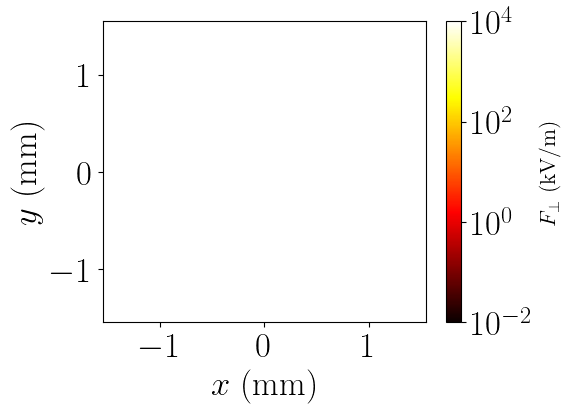

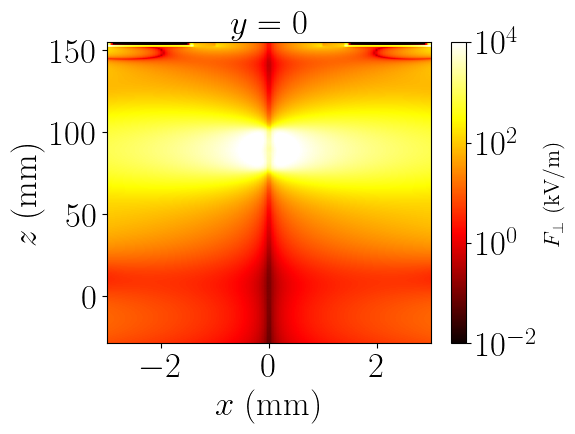

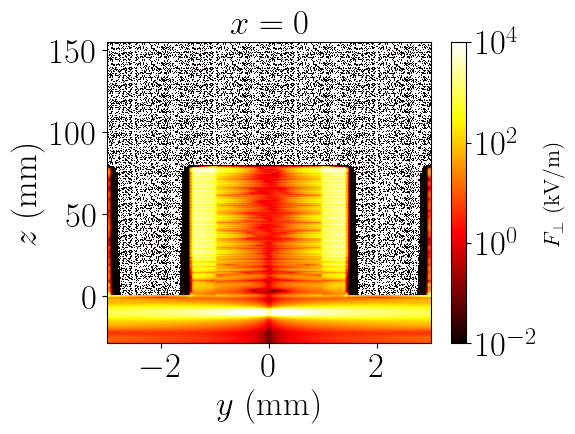

In [33]:
######## F_trans for various slices #################
# transverse slice at a given z
figSliceZ=plt.figure(9995)
gs1 = gridspec.GridSpec(11, 11)
ax1 = figSliceZ.add_subplot(gs1[1:10,1:10])
#print ('xySlice::',np.shape(Bx))
Bxshape = np.shape(Bx)
sliceInd=int(Bxshape[0]/3) # HOW IS THIS THOUGHT OF: NEEDS TO CHANGE TO GET THE MODES
sliceInd = 2750 #2466
sliceInd = 2854


print(Bxshape)
Bxslice=Bx[sliceInd,:,:]
Exslice=Ex[sliceInd,:,:]
Eyslice=Ey[sliceInd,:,:]
Byslice=By[sliceInd,:,:]

# F/e computed for an electron
Fx=-(Exslice-cms*Byslice)
Fy=-(Eyslice+cms*Bxslice)

imField=ax1.imshow(np.sqrt(Fx**2+Fy**2)*kV, cmap='hot', norm=LogNorm(vmin=0.01,vmax=1e4),
           extent=[info_Ex.xmin*mm,info_Ex.xmax*mm, info_Ex.ymin*mm,info_Ex.ymax*mm],
           aspect='auto')
figSliceZ.colorbar(imField).set_label(label=r'$F_{\perp}$ (kV/m)',size=16)
ax1.set_ylabel(r'$y$ (mm)', fontsize=FontSizeLabelAxis)
ax1.set_xlabel(r'$x$ (mm)', fontsize=FontSizeLabelAxis)
print('$z=%f$'%zsc[sliceInd])
ax1.set_xlim([-1.55,1.55])
ax1.set_ylim([-1.55,1.55])
plt.tight_layout()
#ax1.set_title(r'$z=%f$'%zsc[sliceInd], fontsize=FontSizeLabelAxis)
#plt.savefig(save_dir+fig9995)
#plt.savefig('/lstr/sahara/aard/cphillips/ipynbfiles/AAC24/paper/fig2.png')
plt.savefig('/lstr/sahara/aard/cphillips/ipynbfiles/AAC24/paper/fig2mult.png')
plt.show()

# transverse slice at a given y in (x,z)
figSliceX=plt.figure(9994)  # transverse slice at a given y in (x,z)
gs1 = gridspec.GridSpec(11, 11)
ax1 = figSliceX.add_subplot(gs1[1:10,1:10])

num = 650

Bxshape = np.shape(Bx)
sliceInd=int(Bxshape[1]/2) # currently for y=0
Bxslice = Bx[:num,sliceInd,:]
Byslice = By[:num,sliceInd,:]
Exslice = Ex[:num,sliceInd,:]
Eyslice = Ey[:num,sliceInd,:]

# F/e computed for an electron
Fx=-(Exslice-cms*Byslice)
Fy=-(Eyslice+cms*Bxslice)

zshape = np.linspace(info_Ez.zmin*mm,info_Ez.zmax*mm,1024)
zshape = zshape[:num]

imField=ax1.imshow(np.sqrt(Fx**2+Fy**2)*kV, cmap='hot',norm=LogNorm(vmin=0.01,vmax=1e4), extent=[info_Ex.xmin*mm,info_Ex.xmax*mm,info_Ex.zmin*mm,info_Ex.zmax*mm],aspect='auto', origin='lower')
figSliceX.colorbar(imField).set_label(label=r'$F_{\perp}$ (kV/m)',size=16)
ax1.set_ylabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
ax1.set_xlabel(r'$x$ (mm)', fontsize=FontSizeLabelAxis)
ax1.set_title (r'$y=0$', fontsize=FontSizeLabelAxis)
#plt.savefig(save_dir+fig9994)
#plt.savefig(save_dir+fig9994p,dpi=600)
plt.show()

# transverse slice at a given x in (y,z)
figSliceY=plt.figure(9993)  # transverse slice at a given x in (y,z)
gs1 = gridspec.GridSpec(11, 11)
ax1 = figSliceY.add_subplot(gs1[1:10,1:10])

Bxshape = np.shape(Bx)
sliceInd=int(Bxshape[2]/2) # currently for x=0
Bxslice = Bx[:,:,sliceInd]
Byslice = By[:,:,sliceInd]
Exslice = Ex[:,:,sliceInd]
Eyslice = Ey[:,:,sliceInd]

# F/e computed for an electron
Fx=-(Exslice-cms*Byslice)
Fy=-(Eyslice+cms*Bxslice)

imField=ax1.imshow(np.sqrt(Fx**2+Fy**2)*kV, cmap='hot', norm=LogNorm(vmin=0.01,vmax=1e4), extent=[info_Ex.ymin*mm,info_Ex.ymax*mm,info_Ex.zmin*mm,info_Ex.zmax*mm], aspect='auto', origin='lower') #extent=[info_Ex.ymin*mm,info_Ex.ymax*mm,info_Ex.zmin*mm,info_Ex.zmax*mm],
#           aspect='auto', origin='lower')
figSliceY.colorbar(imField).set_label(label=r'$F_{\perp}$ (kV/m)',size=16)
ax1.set_ylabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
ax1.set_xlabel(r'$y$ (mm)', fontsize=FontSizeLabelAxis)
ax1.set_title (r'$x=0$', fontsize=FontSizeLabelAxis)
#plt.savefig(save_dir+fig9993)
#plt.savefig(save_dir+fig9993p,dpi=600)
plt.show()

In [34]:
dist_2 = 1.5*wavelength
print(dist_2)

# Circle
# 5.4268748017485375
# Rectangle
# 6.512249762098246
# Square
# 5.581928367512782


0.005822931782532077


In [35]:
print('circ: ',5.4268748017485375/2.5)
print('rect: ',6.512249762098246/1.5)
print('squa: ',5.581928367512782/1.5)

circ:  2.170749920699415
rect:  4.34149984139883
squa:  3.721285578341855


## Plotting other plots not usually used

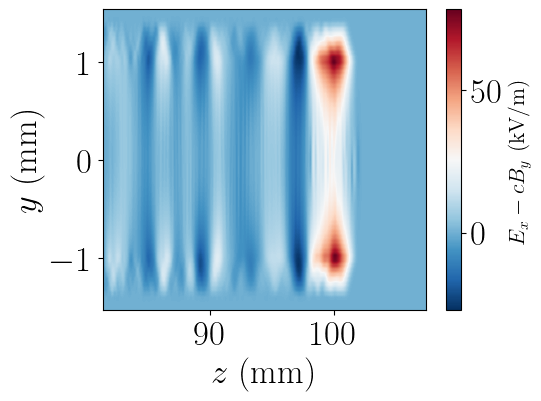

In [16]:
# Plotting Ex-cBy for (y,z)
figX=plt.figure(9996)
gs1 = gridspec.GridSpec(11, 11)
ax1 = figX.add_subplot(gs1[1:10,1:10])
Exslice=(Ex[:,:,int(shapeEz[2]/2)].transpose() \
               -cms*By[:,:,int(shapeEz[2]/2)].transpose())*kV
imField=ax1.imshow(Exslice,extent=[info_Ez.zmin*mm,info_Ez.zmax*mm, info_Ez.ymin*mm,info_Ez.ymax*mm],
                   cmap='RdBu_r', aspect='auto')
cbar1  = figX.colorbar(imField).set_label(label=r'$E_x-cB_y$ (kV/m)',size=16)
ax1.set_ylabel(r'$y$ (mm)', fontsize=FontSizeLabelAxis)
ax1.set_xlabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)

#plt.savefig(save_dir+fig9996)
#plt.savefig(save_dir+fig9996p,dpi=600)
plt.show()

## NOT USING THE INDEX SYSTEM

In [ ]:
#zlow = info_Ez.zmin*mm # 60
#zhigh = info_Ez.zmax*mm
#mult = 1 #8
#lenz = zhigh-zlow
#xticklist = np.arange(zlow,zhigh+lenz/2,lenz/4)
#xticklist = [round(i,1) for i in xticklist]
#indexmin = (np.abs(zsc - zlow)).argmin()
#indexmax = (np.abs(zsc - zhigh)).argmin()
#print('zrange: ', zlow, zhigh)
#print('zindexmin: ',indexmin,' zindexmax: ',indexmax)

# generate a plot of the Ez wake in (z,y) with lineout of Ez
fig=plt.figure(9999)
gs1 = gridspec.GridSpec(11, 13)
ax1 = fig.add_subplot(gs1[0:7,1:10])
ax2 = fig.add_subplot(gs1[7:10,1:10], sharex =ax1)
ax3 = fig.add_subplot(gs1[0:7,11:12])


# record Ez in the (z,x) plane for y=0
Ezslice=Ez[:,int(shapeEz[1]/2),:].transpose()*MV # gets the y=0 slice
print(np.shape(Ezslice))
Ezslice = np.flipud(Ezslice)
shapeEzslice = np.shape(Ezslice)

# plot slice (upper plot with red and blue lines)
imField=ax1.imshow(Ezslice,extent=[info_Ez.zmin*mm,info_Ez.zmax*mm, info_Ez.xmin*mm,info_Ez.xmax*mm],
                   cmap='RdBu_r', vmin=-absmax, vmax=absmax, aspect='auto')
cbaxes = inset_axes(ax1, width="30%", height="3%", loc=2)
cbar1  = fig.colorbar(imField, cax=cbaxes, orientation='horizontal').set_label(label=r'$E_z$ (MV/m)',size=20)
ax1.set_ylabel(r'$x$ (mm)', fontsize=FontSizeLabelAxis)

# record particle and plot a histogram on top of 3d of Ez - NEED TO ADJUST AXES FOR THIS
particles=ax1.hexbin(zf*mm, xf*mm, gridsize=200,extent=[info_Ez.zmin*mm,info_Ez.zmax*mm, info_Ez.xmin*mm,info_Ez.xmax*mm], cmap='copper', alpha=0.5,  mincnt=5)
ax3.axis('off')
cbaxes2 = inset_axes(ax3, width="30%", height="75%", loc=2)
cbar2 = fig.colorbar(particles, cax=cbaxes2).set_label(label=r'$n$ ',size=20)


#pv = ax1.quiver(locz,locx,PV[2],PV[0],color='g',scale=3)


# Line plot of Ez plus histogram of the population on lower plot
zsca=np.linspace(info_Ez.zmin*1e3, info_Ez.zmax*1e3, shapeEz[0])
print(len(zsca),len(Ezslice[int(shapeEzslice[0]/2),:]))
ax2.plot (zsca,Ezslice[int(shapeEzslice[0]/2),:]) # gets the y=0 slice
ax2.set_xlabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
ax2.set_ylabel(r'$E_z$ (MV/m) ', fontsize=FontSizeLabelAxis, color="C0")
lenz = info_Ez.zmax*1e3-info_Ez.zmin*1e3
xticklist = np.arange(info_Ez.zmin*mm,info_Ez.zmax*mm+lenz/2,lenz/3)
ax2.set_xticks(xticklist)
ax22 = ax2.twinx()
ax22.hist(zf*mm,shapeEz[0], alpha=0.3, color='C1')
ax22.set_ylabel(r'population', fontsize=FontSizeLabelAxis, color="C1")

# Set up the plots
plt.setp(ax1.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax2.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
#plt.subplots_adjust(hspace=.0)

# Save the plot to be viewed
#plt.savefig(save_dir+fig9999)
#plt.savefig(save_dir+fig9999p,dpi=600)
#plt.savefig(plotnms[pn]+'x.png')
plt.show()



#-------------------------------------------------------------------------
# record Ez in the (z,y) plane for x=0
fig=plt.figure(9998)
gs1 = gridspec.GridSpec(11, 13)
ax1 = fig.add_subplot(gs1[0:7,1:10])
ax2 = fig.add_subplot(gs1[7:10,1:10], sharex =ax1)
ax3 = fig.add_subplot(gs1[0:7,11:12])

# record Ez in the (z,y) plane for x=0
Ezslice=Ez[:,:,int(shapeEz[2]/2)].transpose()*MV # gets the x=0 sliceplt.gca().invert_yaxis()
Ezslice = np.flipud(Ezslice)
shapeEzslice = np.shape(Ezslice)

# plot slice (upper plot with red and blue lines)
imField=ax1.imshow(Ezslice,extent=[info_Ez.zmin*mm,info_Ez.zmax*mm, info_Ez.ymin*mm,info_Ez.ymax*mm],
                   cmap='RdBu_r', vmin=-absmax, vmax=absmax, aspect='auto')
cbaxes = inset_axes(ax1, width="30%", height="3%", loc=2)
cbar1  = fig.colorbar(imField, cax=cbaxes, orientation='horizontal').set_label(label=r'$E_z$ (MV/m)',size=20)
ax1.set_ylabel(r'$y$ (mm)', fontsize=FontSizeLabelAxis)
plt.gca().invert_yaxis()

# record particle and plot a histogram on top of 3d of Ez
particles=ax1.hexbin(zf*mm, yf*mm, gridsize=200,extent=[info_Ez.zmin*mm,info_Ez.zmax*mm, info_Ez.ymin*mm,info_Ez.ymax*mm], cmap='copper', alpha=0.5,  mincnt=5)
ax3.axis('off')
cbaxes2 = inset_axes(ax3, width="30%", height="75%", loc=2)
cbar2 = fig.colorbar(particles, cax=cbaxes2).set_label(label=r'$n$ ',size=20)


#pv = ax1.quiver(locz,locy,PV[2],PV[1],color='g',scale=3)


# Line plot of Ez plus histogram of the population on lower plot
zscb=np.linspace(info_Ez.zmin*1e3, info_Ez.zmax*1e3, shapeEz[0])
ax2.plot (zscb,Ezslice[int(shapeEzslice[0]/2),:]) # Ez slice has shape (ylen,zlen)
#ax2.plot (zscb,Ey[16,48,:]*1e-6)
#ax2.plot (zscb,Ex[16,48,:]*1e-6)
ax2.set_xlabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
ax2.set_ylabel(r'$E_z$ (MV/m) ', fontsize=FontSizeLabelAxis, color="C0")
lenz = info_Ez.zmax*mm-info_Ez.zmin*mm
xticklist = np.arange(info_Ez.zmin*mm,info_Ez.zmax*mm+lenz/2,lenz/3)
ax2.set_xticks(xticklist)
ax22 = ax2.twinx()
ax22.hist(zf*mm,shapeEz[0], alpha=0.3, color='C1')
ax22.set_ylabel(r'population', fontsize=FontSizeLabelAxis, color="C1")

# Set up the plots
plt.setp(ax1.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax2.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
#plt.subplots_adjust(hspace=.0)

# Save the plot to be viewed
#plt.savefig(save_dir+fig9998)
#plt.savefig(save_dir+fig9998p,dpi=600)
#plt.savefig(plotnms[pn]+'y.png')
plt.show()

